# Sourcing & Analyzing Time Series Data

#### Table of Contents

    1. Importing libraries
    2. Importing data
    3. Preparing data
        3.1 Cleaning
        3.2 Wrangling
        3.3 Smoothing
    4. Time series analysis: decomposition
    5. Testing for stationarity
    6. Stationarizing
        Differencing
        Dickey-Fuller test
        Autocorrelation
    7. Exporting data
    8. Bonus (WIP)
        8.1 ARIMA
            Autocorrelation
            Split the dataset
            Fit the model
        8.2 SARIMA
            Seasonal differencing
            Dickey-Fuller test
            Autocorrelation
            Split the dataset
            Find the best model
            Fit the model

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

# Disable deprecation warnings
warnings.filterwarnings('ignore') 

# Styling option for how plots will appear
plt.style.use('fivethirtyeight') 

# 2. Importing data

#### <mark>Note:</mark>

Since no suitable data could be found on Quandl that was related to the broader research topic of my Achievement project (the WorldRiskIndex), I instead sourced temperature anomaly data from the National Centers for Environmental Information (NCEI). The sourced dataset contains a **global time series of combined land and ocean temperature anomalies (with respect to the 1901-2000 average) with monthly observations from January 2001 to February 2024**. Temperature anomaly records are expressed in degrees Celsius.

The global component of Climate at a Glance (GCAG) provides global-scale temperature information using data from NOAA's Global Surface Temperature Analysis (NOAAGlobalTemp), which uses comprehensive data collections with enhanced global coverage over land (Global Historical Climatology Network-Monthly) and ocean (Extended Reconstructed Sea Surface Temperature) surfaces. The tool provides near real-time analysis of monthly and annual temperatures for the globe and is intended for the study of climate variability and change. Data are provided globally, by hemisphere, and by land and ocean surface components.

**Subsetting:** The source data are available since 1850. However, since climate conditions have changed significantly in the current millennium and my main dataset for this achievement only contains data from 2011 onwards, I decided to source data from January 2001 to February 2024. Not only does this provide sufficient data for a time series analysis, but it may also reveal periodic trends or patterns prior to 2011 that had a later impact on the WorldRiskIndex.

**Source:** NOAA National Centers for Environmental Information, Climate at a Glance: Global Time Series, published March 2024, retrieved on March 21, 2024 from https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series.

In [2]:
# Turn project folder path into a string
path = r'/Users/sarahtischer/Desktop/CareerFoundry/Data Immersion/Achievement 6/03-2024_WorldRiskIndex_Analysis'

In [3]:
# Import "temp_anomalies_prepared.csv"
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_data', 'temp_anomalies_prepared.csv'), index_col = False)

In [4]:
# Confirm the shape of the dataset
df.shape

(278, 2)

# 3. Preparing data

In [5]:
# Check the columns of the DataFrame
df.columns

Index(['Date', 'Anomaly'], dtype='object')

## 3.1 Cleaning

In [6]:
# Check for missing values
df.isnull().sum()

Date       0
Anomaly    0
dtype: int64

#### <mark>Note:</mark>

No missing values found.

In [7]:
# Find full duplicates
df_dups = df[df.duplicated()]

df_dups

,Date,Anomaly


#### <mark>Note:</mark>

No duplicates found.

## 3.2 Wrangling

In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Check metadata of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     278 non-null    datetime64[ns]
 1   Anomaly  278 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [10]:
# Set 'Date' as the DataFrame's index
df.set_index('Date', inplace=True)

In [11]:
# Check a sample
df.head()

,Anomaly
Date,
2001-01-01,0.45
2001-02-01,0.43
2001-03-01,0.55
2001-04-01,0.53
2001-05-01,0.57


## 3.3 Smoothing

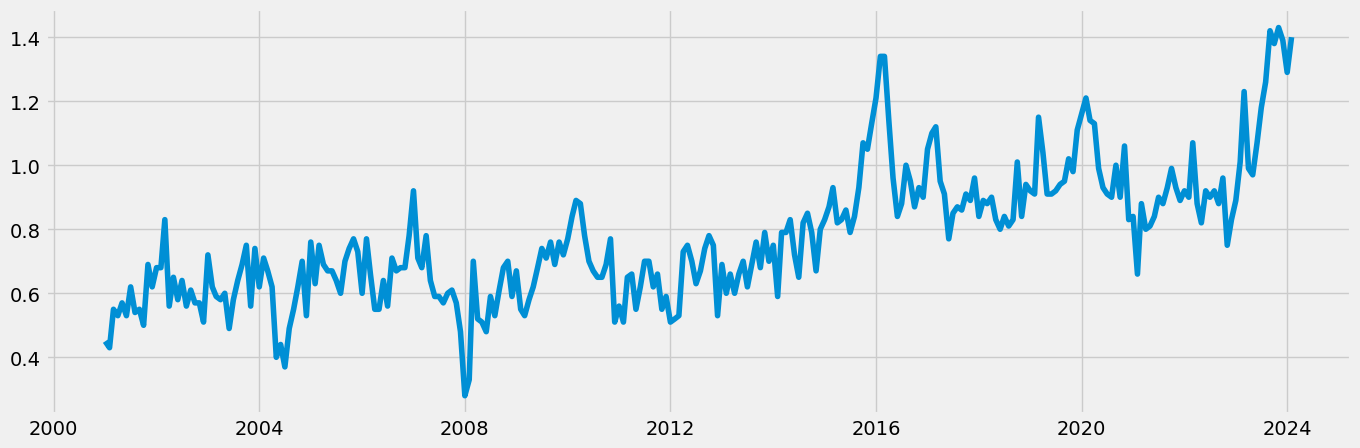

In [12]:
# Set size & quality
plt.figure(figsize=(15,5), dpi=100)

# Plot the DataFrame
plt.plot(df)

In [13]:
# Define the window size for the moving average
window_size = 48

In [14]:
# Calculate the 6-month moving average
moving_average = df['Anomaly'].rolling(window=window_size, min_periods=1).mean()

In [15]:
# Create a new DataFrame for the moving average
df_smoothed = pd.DataFrame({'Anomaly Moving Average': moving_average}, index=df.index)

In [16]:
# Confirm the shape of the dataset
df_smoothed.shape

(278, 1)

In [17]:
# Check a sample
df_smoothed.head()

,Anomaly Moving Average
Date,
2001-01-01,0.450000
2001-02-01,0.440000
2001-03-01,0.476667
2001-04-01,0.490000
2001-05-01,0.506000


In [18]:
# Check for missing values
df_smoothed.isnull().sum()

Anomaly Moving Average    0
dtype: int64

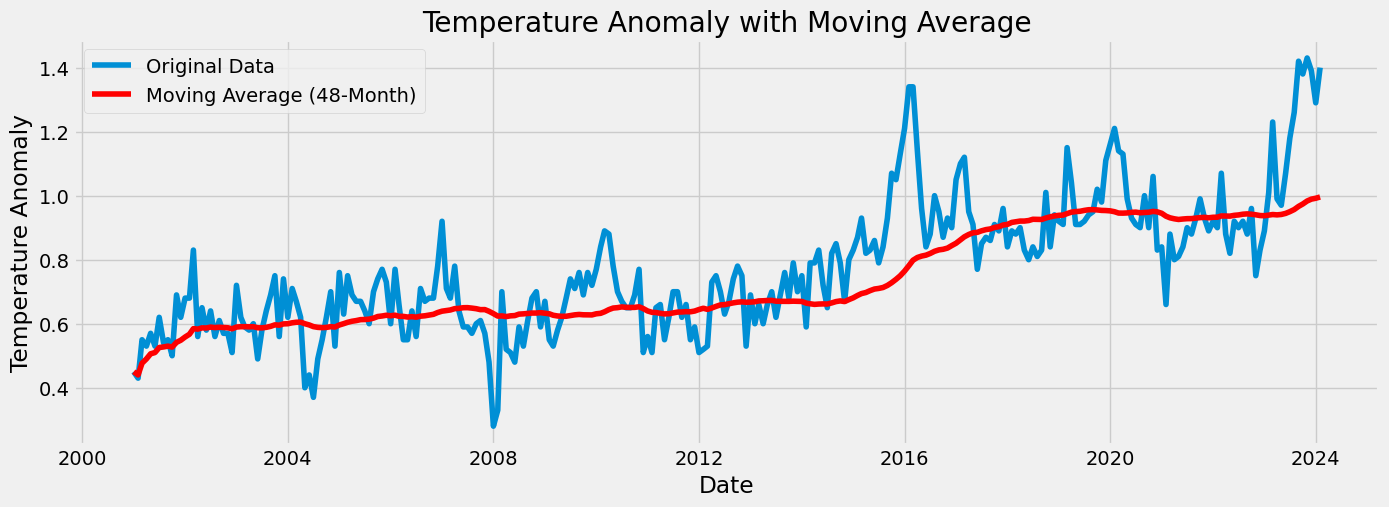

In [19]:
# Plot the original data and the moving average
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df.index, df['Anomaly'], label='Original Data')
plt.plot(df.index, moving_average, color='red', label='Moving Average ({}-Month)'.format(window_size))
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly with Moving Average')
plt.legend()
plt.show()

# 4. Time series analysis: decomposition

In [20]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_smoothed, model='additive')

In [21]:
# Import rcParams function
from pylab import rcParams

# Define a fixed size for all special charts
rcParams['figure.figsize'] = 18, 7 

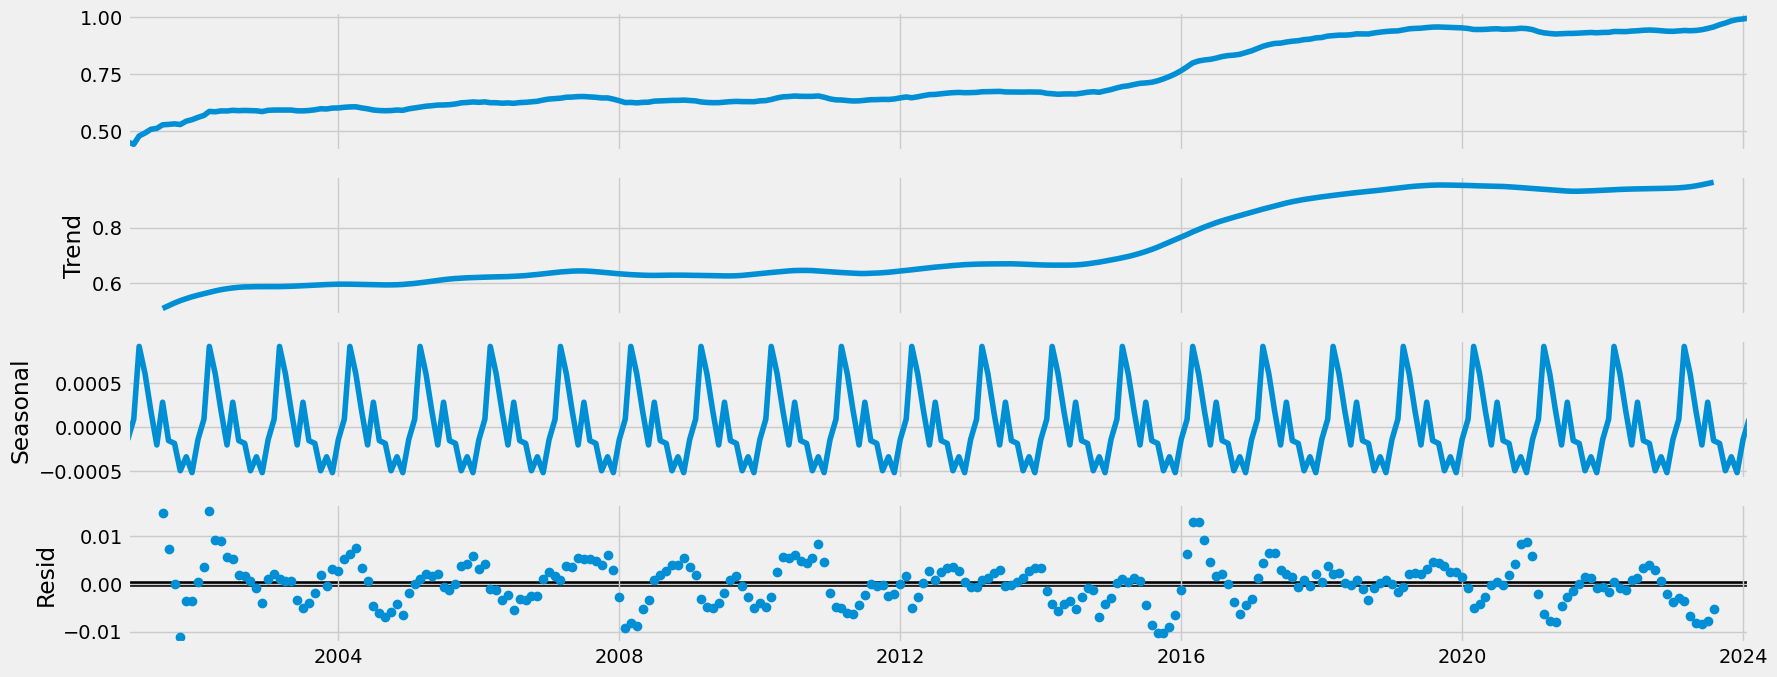

In [22]:
# Plot the separate components
decomposition.plot()
plt.show()

#### <mark>Interpretation:</mark>

* The **trend** component reflects the underlying long-term movement in the data. Due to the prior smoothing of the data, it appears similar to the **level**. The trend shows that temperature anomalies have been increasing steadily since 2001, with a noticeable increase around 2015. Possible explanations for this include:
    * Events such as the prolonged heat waves or record-high temperatures experienced in various regions of the world in the mid-2010s may have contributed to the overall increase in temperature anomalies during this period. 
    * Strong El Niño events, such as those observed in 2015-2016, can lead to higher global temperatures and altered precipitation patterns, potentially contributing to the observed increase in temperature anomalies during this period.
* The **seasonal** graph shows a cyclical pattern of temperature anomalies throughout the year, with distinct peaks and troughs corresponding to seasonal changes in temperature.
    * The most significant peak occurs at the beginning of the year, indicating that there is a consistent pattern of temperature anomalies peaking in the early months, probably January or February. This peak is positive, indicating that temperatures during this period tend to be higher than the seasonal average.
    * Although not as pronounced as the beginning of the year peak, there is a smaller peak in the middle of the year. This secondary peak probably corresponds to the summer temperature peak, indicating a period of consistently warmer weather during this time.
    * Towards the end of the year, there is a negative peak where the anomalies reach their lowest point. This indicates that the late fall or early winter months are cooler than the seasonal average.
* Despite the smoothing of the data, the **residual** graph still shows some noise. However, the noise range of -0.01 to 0.01 suggests that the residuals, or unexplained variability, are relatively small. In addition, temperature anomalies can also exhibit shorter-term fluctuations due to natural variability in the climate system, such as El Niño events or volcanic eruptions, meaning that some noise may be inherent in capturing these variations.

# 5. Testing for stationarity

In [23]:
# Import adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the function on the time series
dickey_fuller(df_smoothed)

Dickey-Fuller Stationarity test:
Test Statistic                   0.210109
p-value                          0.972823
Number of Lags Used              5.000000
Number of Observations Used    272.000000
Critical Value (1%)             -3.454622
Critical Value (5%)             -2.872225
Critical Value (10%)            -2.572464
dtype: float64


#### <mark>Interpretation:</mark>

*Null hypothesis: There is a unit root in the data.*

*Alternative hypothesis: There is no unit root in the data.*

* The test statistic is greater than all critical values, so the **null hypothesis can't be rejected**. 
* Further, the p-value of 0.972823 is higher than the significance level (0.05), indicating weak evidence against the null hypothesis. 
* The test results suggest that the data is likely non-stationary and needs to be stationarized.

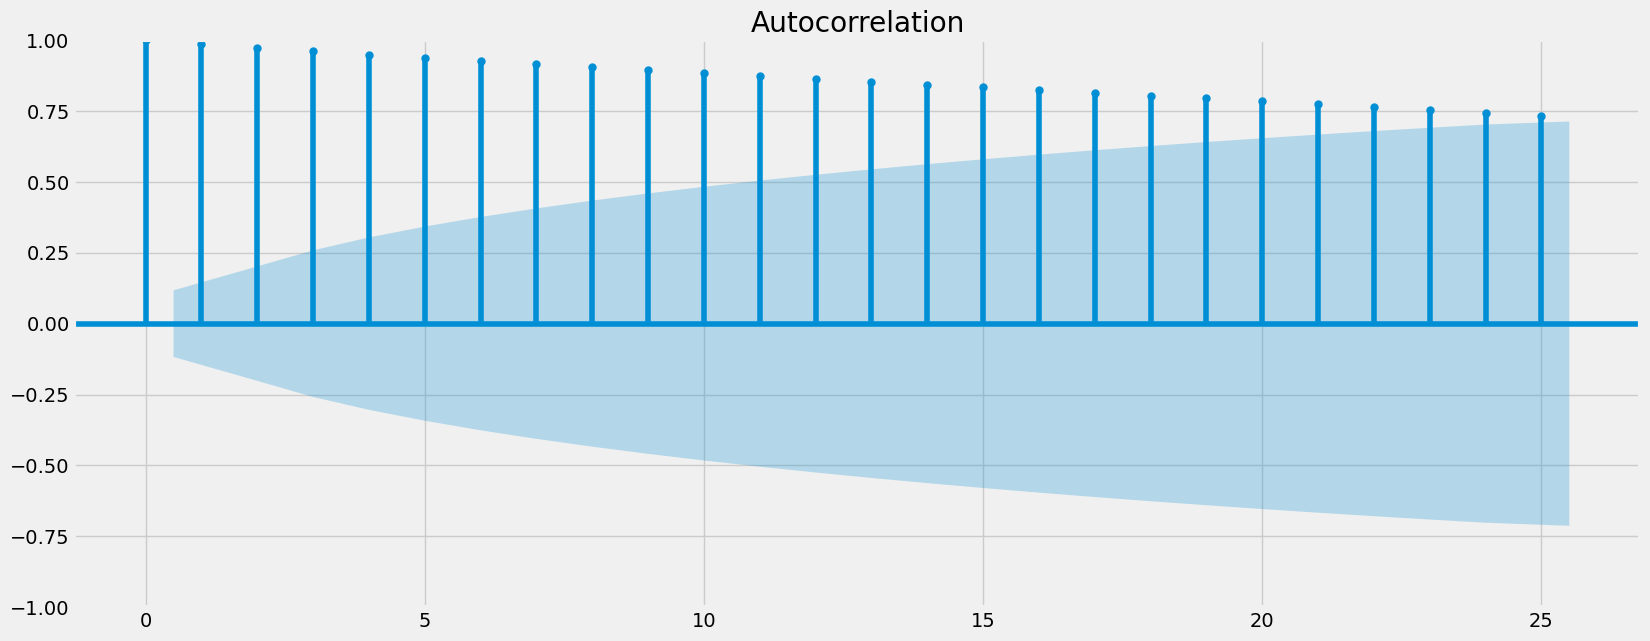

In [24]:
# Check plot of autocorrelations

# Import autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation
plot_acf(df_smoothed)
plt.show()

#### <mark>Interpretation:</mark>

* The plot of autocorrelations shows all lines going above the blue edge of the confidence interval, meaning that the data contains lags that are significantly correlated with each other. 
* This further supports the result of the Dickey-Fuller test, namely that the dataset is likely non-stationary.

# 6. Stationarizing

### Differencing

In [25]:
# Apply differencing formula
df_diff = df_smoothed - df_smoothed.shift(1)

In [26]:
# Remove missing values resulting from differencing
df_diff.dropna(inplace = True)

In [27]:
# Check for missing values
df_diff.isnull().sum()

Anomaly Moving Average    0
dtype: int64

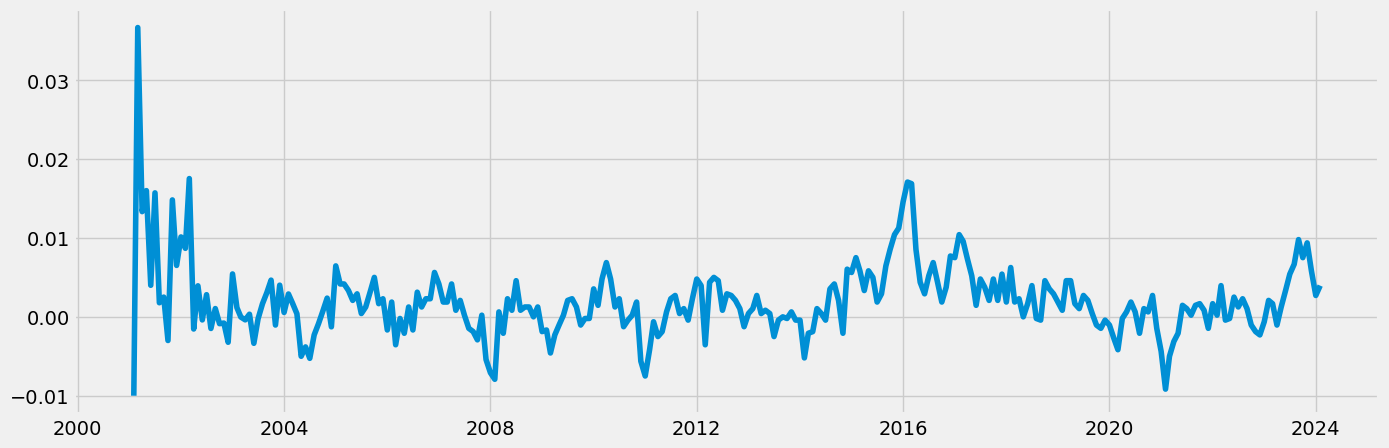

In [28]:
# Check the effect of differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

### Dickey-Fuller test

In [29]:
# Suppress scientific notation by specifying the display format for floating-point numbers
pd.options.display.float_format = '{:,.20f}'.format

# Run Dickey-Fuller test
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.84655573240700920934
p-value                         0.00000036720322335410
Number of Lags Used             4.00000000000000000000
Number of Observations Used   272.00000000000000000000
Critical Value (1%)            -3.45462237825865337015
Critical Value (5%)            -2.87222532123002771698
Critical Value (10%)           -2.57246385002162636368
dtype: float64


#### <mark>Interpretation:</mark>

* After differencing, the test statistic of -5.84656 is now significantly lower than all critical values and the p-value is very close to zero (0.00000036720322335410), well below any common significance level.
* Therefore, the **null hypothesis ("there is a root unit in the data") can be rejected**, indicating that differencing has helped to make the data stationary.

### Autocorrelation

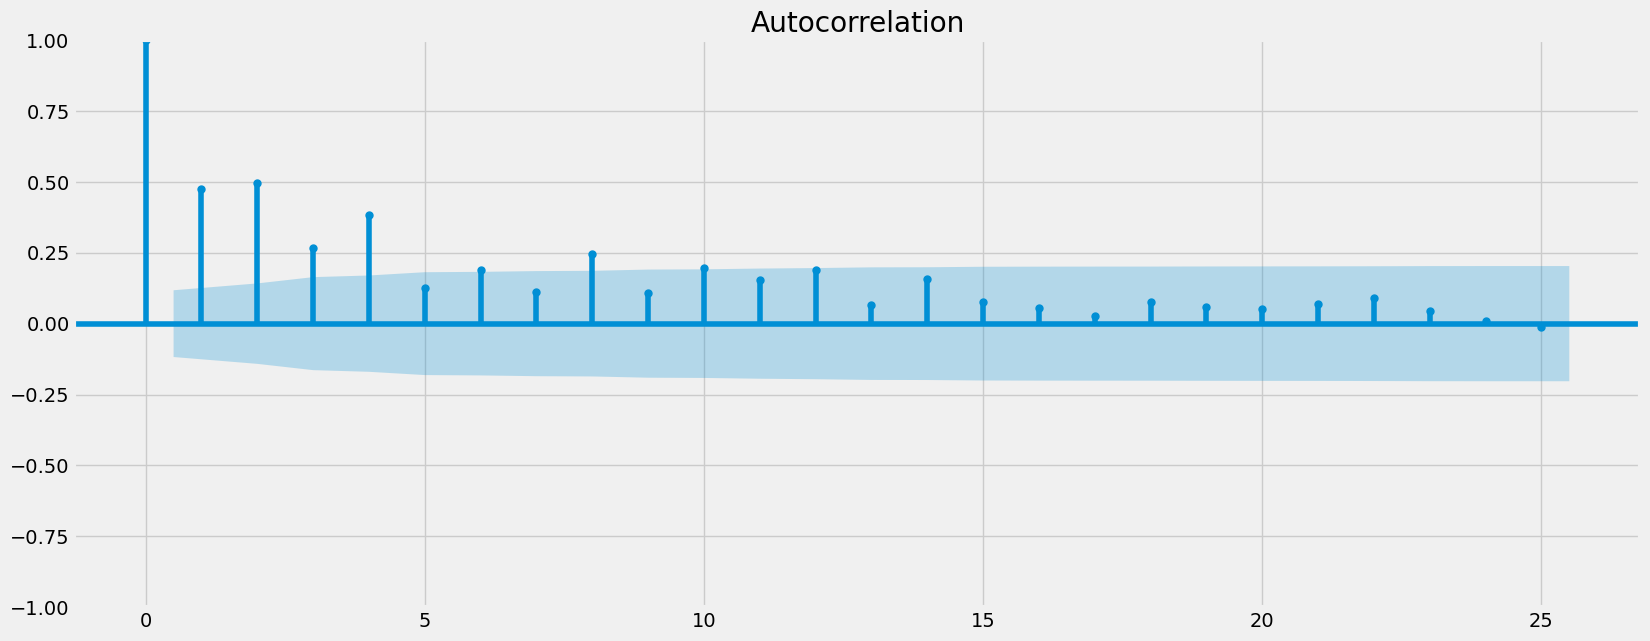

In [30]:
# Plot autocorrelation
plot_acf(df_diff)
plt.show()

#### <mark>Interpretation:</mark>

Although the autocorrelation plot has improved, there are still a few lags that exceed the confidence interval, indicating that the stationarity of the data is weak. However, since less than 10 lags are affected, the data is not further differenced.

# 7. Exporting data

In [31]:
# Confirm the shape of the dataset
df_smoothed.shape

(278, 1)

In [32]:
# Export df_smoothed as "temp_anomalies_smoothed.csv"
df_smoothed.to_csv(os.path.join(path, '02_Data', 'Prepared_data', 'temp_anomalies_smoothed.csv'))

In [33]:
# Confirm the shape of the dataset
df_diff.shape

(277, 1)

In [34]:
# Export df_diff as "temp_anomalies_stationarized.csv"
df_diff.to_csv(os.path.join(path, '02_Data', 'Prepared_data', 'temp_anomalies_stationarized.csv'))

# 8. Bonus (WIP)

## 8.1 ARIMA

### Autocorrelation

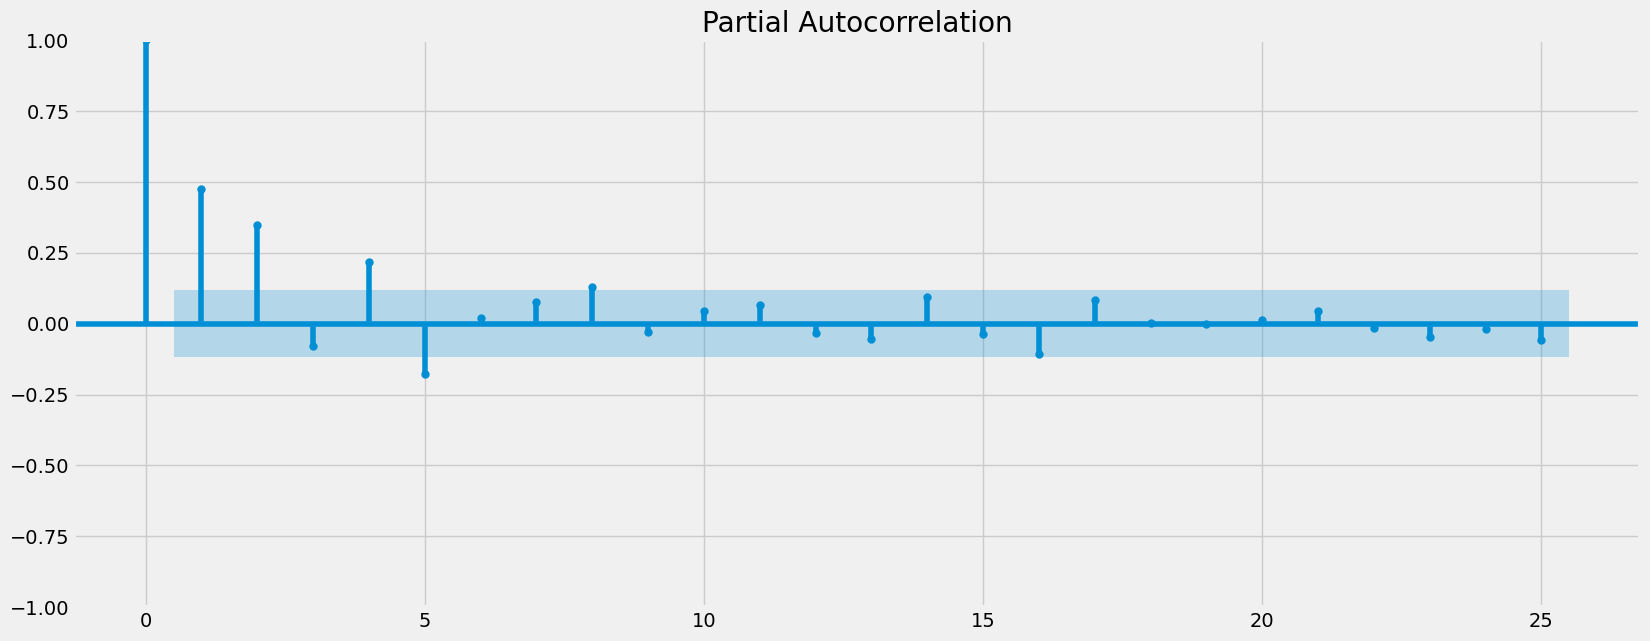

<Figure size 4500x4500 with 0 Axes>

In [109]:
# Plot partial autocorrelations to determine parameter p
plot_pacf(df_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

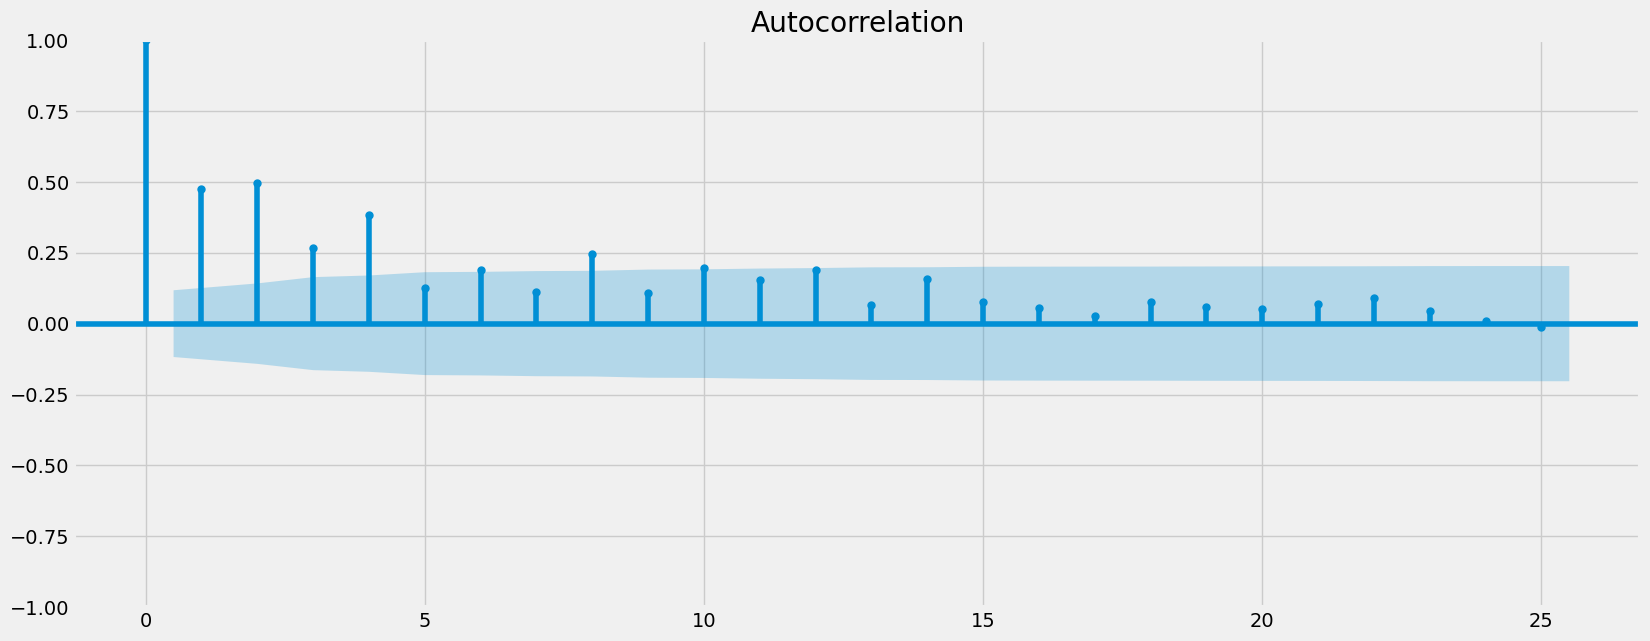

<Figure size 1500x500 with 0 Axes>

In [110]:
# Plot autocorrelations to determine parameter q
plot_acf(df_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

In [113]:
# Cornfirm the shape of the dataset
test_set.shape

(56, 1)

### Split the dataset

In [111]:
# Calculate the number of rows for training and testing
train_rows = int(len(df_diff) * 0.8)
test_rows = len(df_diff) - train_rows

# Split the dataset
train_set = df_diff.iloc[:train_rows]
test_set = df_diff.iloc[train_rows:]

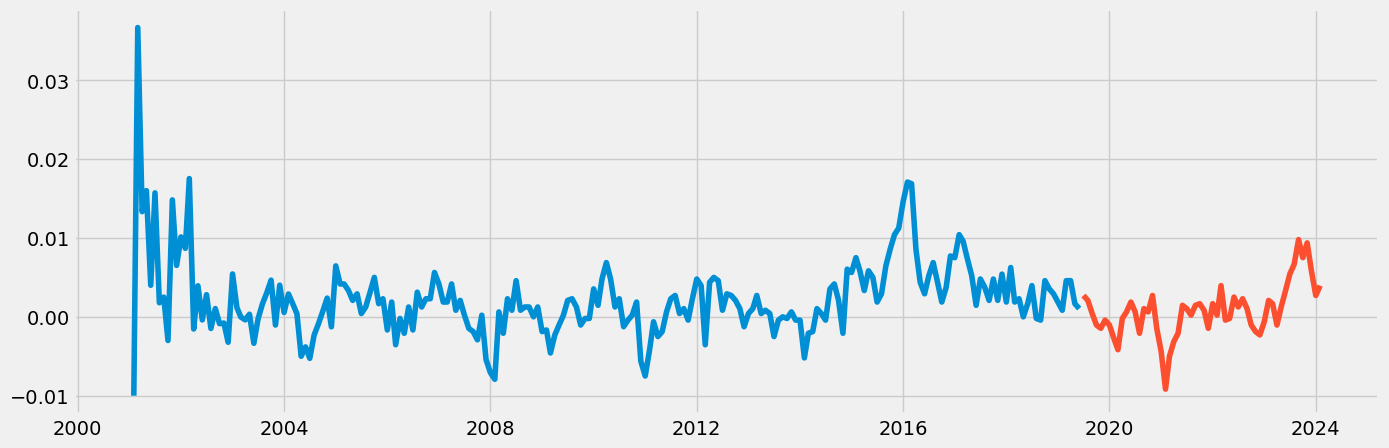

In [112]:
# Plot both sets in order to see the split
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_set)
plt.plot(test_set)

### Fit the model 

                                 SARIMAX Results                                  
Dep. Variable:     Anomaly Moving Average   No. Observations:                  221
Model:                     ARIMA(1, 1, 2)   Log Likelihood                 856.114
Date:                    Tue, 26 Mar 2024   AIC                          -1704.228
Time:                            06:51:07   BIC                          -1690.653
Sample:                        02-01-2001   HQIC                         -1698.746
                             - 06-01-2019                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8984      0.069    -12.979      0.000      -1.034      -0.763
ma.L1          0.6210      0.094      6.576      0.000       0.436       0.806
ma.L2         -0.299

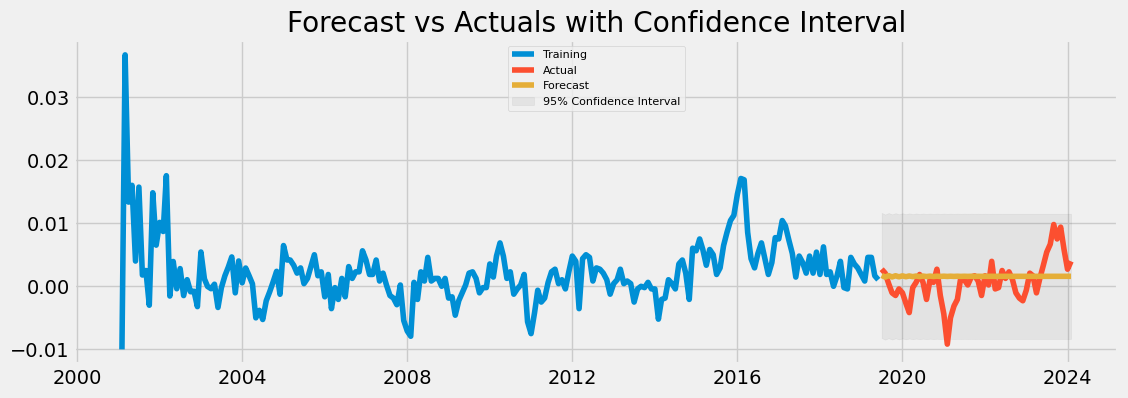

In [114]:
from statsmodels.tsa.api import ARIMA # Import the model you need
from scipy.stats import norm

model = ARIMA(train_set['Anomaly Moving Average'], order=(1, 1, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_values = fitted.forecast(steps=len(test_set))

# Calculate standard deviation of residuals
residuals = fitted.resid
std_dev = np.std(residuals)

# Calculate confidence interval
alpha = 0.05  # 95% confidence interval
z_score = norm.ppf(1 - alpha / 2)  # Z-score for two-tailed test
margin_of_error = z_score * std_dev
lower_bound = forecast_values - margin_of_error
upper_bound = forecast_values + margin_of_error

# Convert forecast values and confidence interval to pandas Series
fc_series = pd.Series(forecast_values, index=test_set.index)
lower_series = pd.Series(lower_bound, index=test_set.index)
upper_series = pd.Series(upper_bound, index=test_set.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train_set['Anomaly Moving Average'], label='Training')
plt.plot(test_set.index, test_set['Anomaly Moving Average'], label='Actual')
plt.plot(test_set.index, fc_series, label='Forecast')
plt.fill_between(test_set.index, lower_series, upper_series, color='k', alpha=0.05, label='95% Confidence Interval')
plt.title('Forecast vs Actuals with Confidence Interval')
plt.legend(loc='upper center', fontsize=8)
plt.show()

## 8.2 SARIMA

### Seasonal differencing

In [55]:
# Perform seasonal differencing
seasonal_diff = df_diff.diff(periods=12)

# Drop the NaN values resulting from differencing
seasonal_diff.dropna(inplace = True)

In [56]:
# Check for missing values
seasonal_diff.isnull().sum()

Anomaly Moving Average    0
dtype: int64

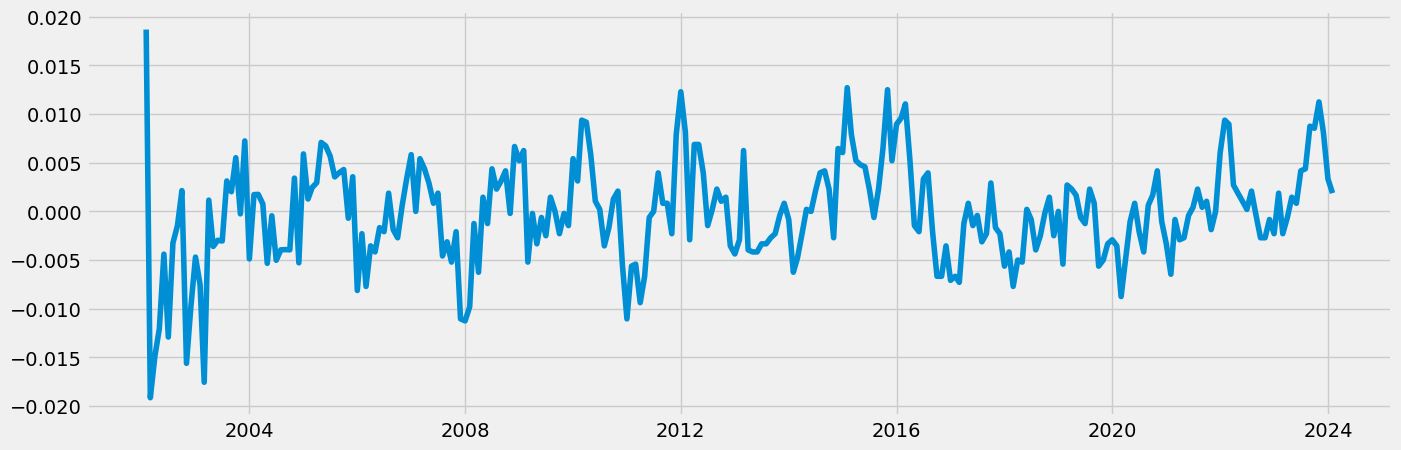

In [57]:
# Check the effect of differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(seasonal_diff)

### Dickey-Fuller test

In [58]:
# Run Dickey-Fuller test
dickey_fuller(seasonal_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.09311520080754220885
p-value                         0.00099421691444791975
Number of Lags Used            14.00000000000000000000
Number of Observations Used   250.00000000000000000000
Critical Value (1%)            -3.45678085971199999804
Critical Value (5%)            -2.87317150656000031006
Critical Value (10%)           -2.57296854400000007956
dtype: float64


### Autocorrelation

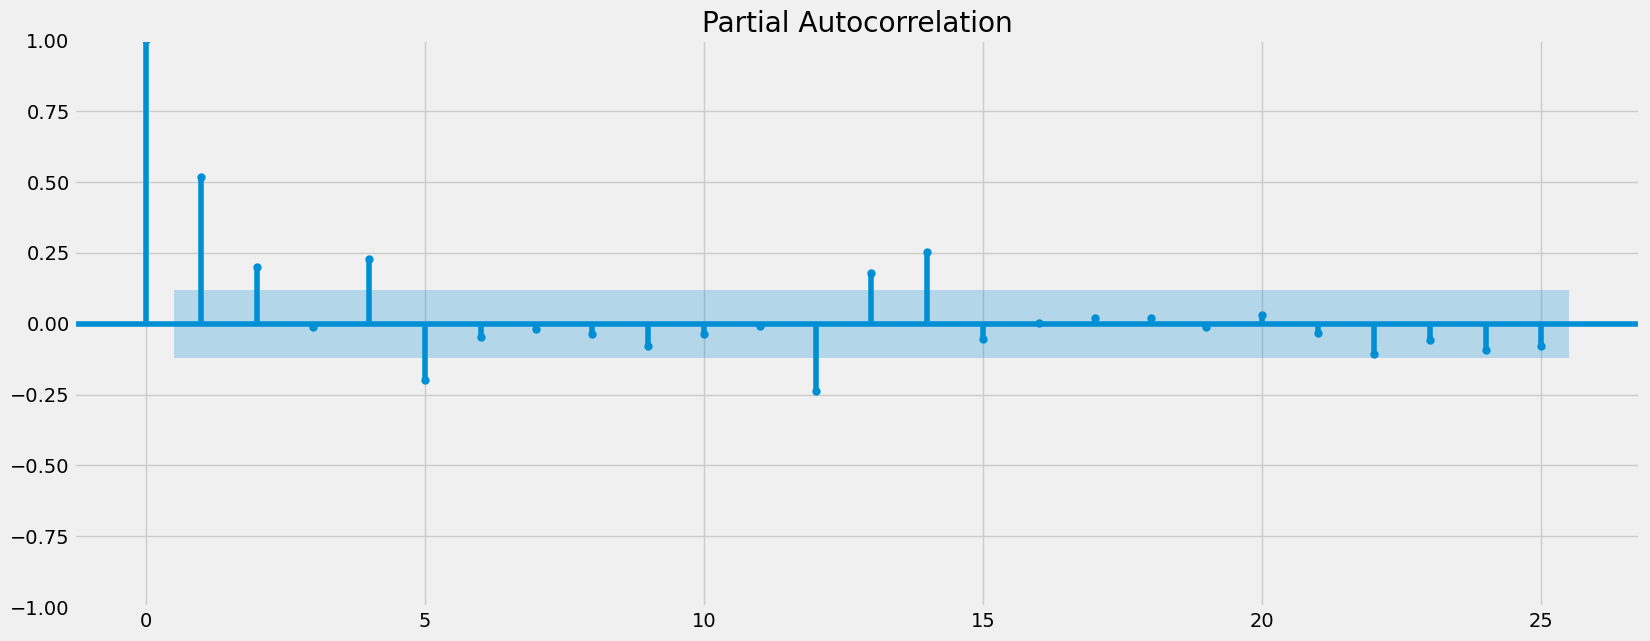

<Figure size 4500x4500 with 0 Axes>

In [63]:
# Plot partial autocorrelations to determine parameter P
plot_pacf(seasonal_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

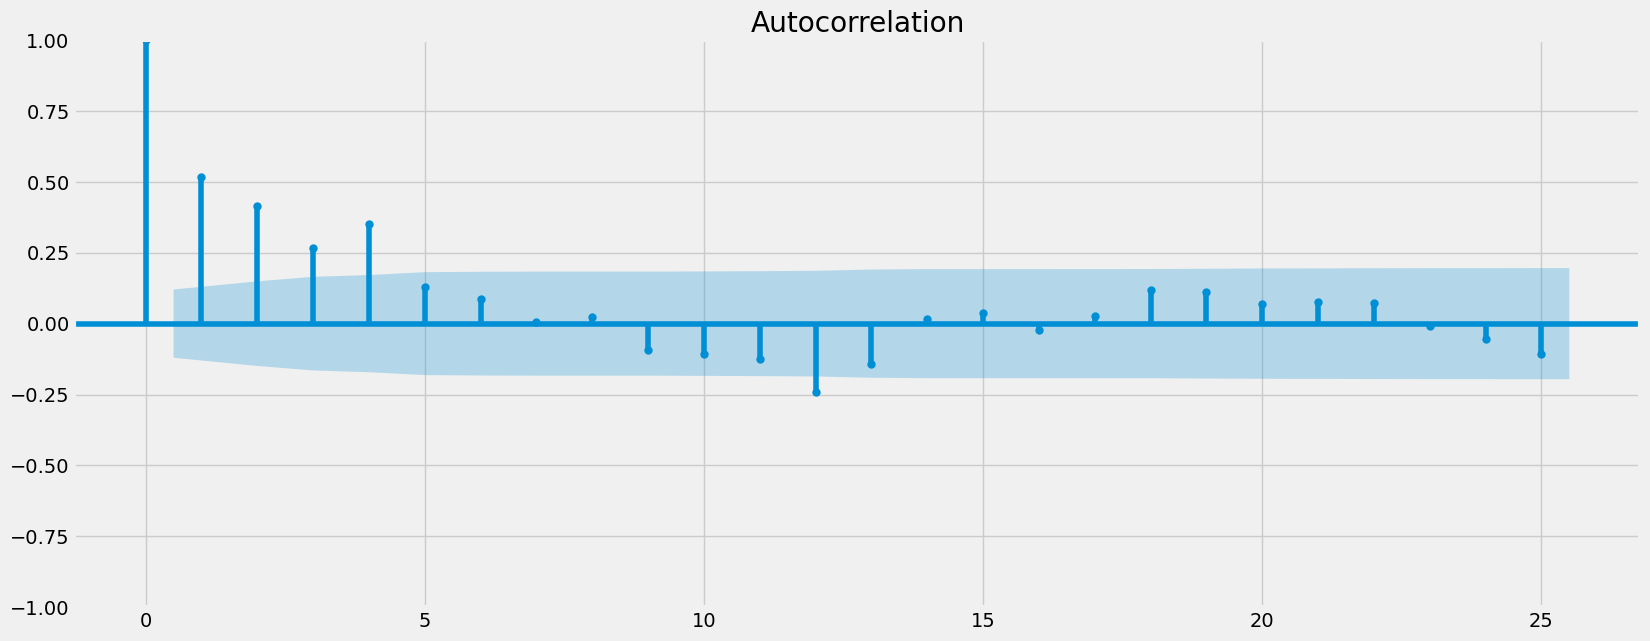

<Figure size 1500x500 with 0 Axes>

In [64]:
# Plot autocorrelations to determine parameter Q
plot_acf(seasonal_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

### Split the dataset

In [86]:
# Calculate the number of rows for training and testing
train_rows = int(len(seasonal_diff) * 0.7)
test_rows = len(seasonal_diff) - train_rows

# Split the dataset
train_set = seasonal_diff.iloc[:train_rows]
test_set = seasonal_diff.iloc[train_rows:]

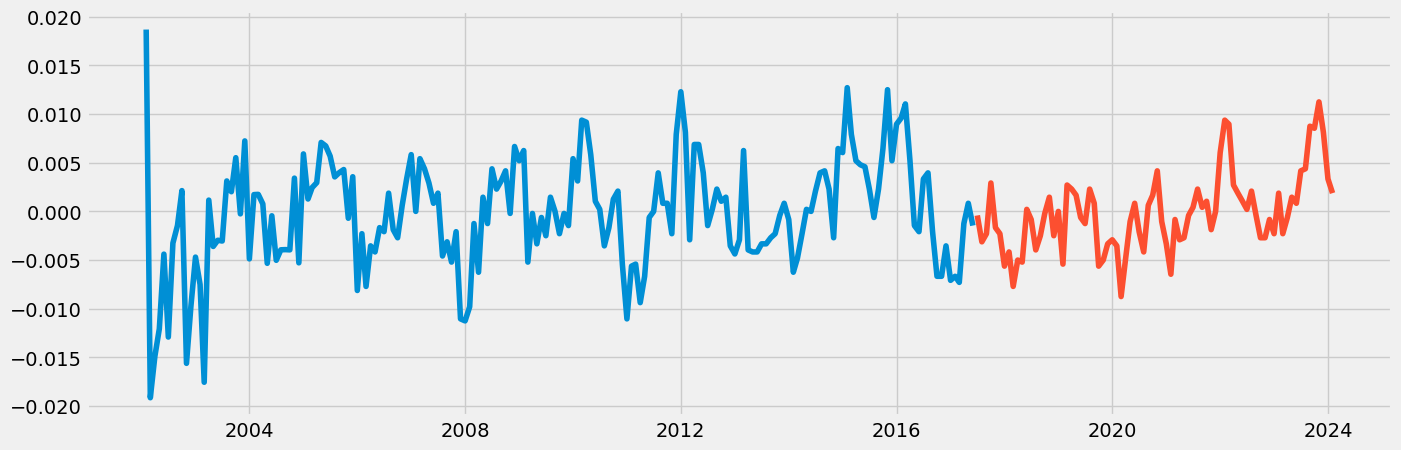

In [87]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_set)
plt.plot(test_set)

### Find the best model

In [89]:
import itertools
from tqdm import tqdm

# Define ranges for parameters
p = range(0, 4)
d = range(1, 3)
q = range(0, 4)
P = range(0, 4)
D = range(1, 3)
Q = range(0, 4)
m = [12]  # Seasonal period

# Generate all combinations of parameters
param_combinations = list(itertools.product(p, d, q, P, D, Q, m))

best_aic = np.inf
best_params = None

# Iterate over all combinations of parameters
for params in tqdm(param_combinations):
    try:
        # Fit SARIMA model
        sarima_model = sm.tsa.statespace.SARIMAX(train_set['Anomaly Moving Average'],
                                                 order=(params[0], params[1], params[2]),
                                                 seasonal_order=(params[3], params[4], params[5], params[6]))
        sarima_fitted = sarima_model.fit()

        # Get AIC
        aic = sarima_fitted.aic

        # Check if current model has lower AIC
        if aic < best_aic:
            best_aic = aic
            best_params = params

    except Exception as e:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

  0%|                                              | 0/1024 [00:00<?, ?it/s] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12430D+00    |proj g|=  8.62483D+00
  ys=-4.906E-09  -gs= 2.387E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4     54      2     1     0   1.834D-01  -3.126D+00
  F =  -3.1255641729445958     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables a


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.38704D+00    |proj g|=  2.32098D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  0%|                                      | 2/1024 [00:00<06:02,  2.82it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23    120      3     0     0   1.454D-01  -3.387D+00
  F =  -3.3870398378826887     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39120D+00    |proj g|=  3.27131D+01

At iterate    5    f= -3.40609D+00    |proj g|=  3.29304D-01
  ys=-1.114E-08  -gs= 3.990E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  0%|                                      | 3/1024 [00:01<12:27,  1.37it/s]

  ys=-2.304E-16  -gs= 4.346E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     76      3     2     0   3.293D-01  -3.406D+00
  F =  -3.4060902378499303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31697D+00    |proj g|=  3.71966D+01


 This problem is unconstrained.



At iterate    5    f= -3.33725D+00    |proj g|=  3.08266D-01

At iterate   10    f= -3.33813D+00    |proj g|=  7.26835D+00

At iterate   15    f= -3.33864D+00    |proj g|=  3.61802D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.999E-10  -gs= 1.698E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  0%|▏                                     | 4/1024 [00:05<31:40,  1.86s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19    109      3     1     0   3.385D-01  -3.339D+00
  F =  -3.3386606835752883     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40865D+00    |proj g|=  9.64025D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  0%|▏                                     | 5/1024 [00:05<21:21,  1.26s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3     49      2     0     0   2.961D-02  -2.413D+00
  F =  -2.4134395588852042     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34658D+00    |proj g|=  4.96917D+01

At iterate    5    f= -2.41366D+00    |proj g|=  5.21420D-01

At iterate   10    f= -2.76817D+00    |proj g|=  2.51486D-01
  ys=-1.651E-03  -gs= 1.425E-02 BFGS update SKIPPED

At iterate   15  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.827E-11  -gs= 1.246E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.79138D+00    |proj g|=  2.64951D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  1%|▏                                     | 6/1024 [00:07<23:36,  1.39s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21    145      4     2     0   2.650D-02  -2.791D+00
  F =  -2.7913843493369508     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37056D+00    |proj g|=  3.65863D+01


 This problem is unconstrained.



At iterate    5    f= -2.41370D+00    |proj g|=  5.96462D-01

At iterate   10    f= -2.44420D+00    |proj g|=  1.57487D+01

At iterate   15    f= -2.89924D+00    |proj g|=  3.22687D+01

At iterate   20    f= -2.96235D+00    |proj g|=  1.29526D+01

At iterate   25    f= -2.97088D+00    |proj g|=  9.51926D+00

At iterate   30    f= -2.97251D+00    |proj g|=  9.02075D-01

At iterate   35    f= -2.97290D+00    |proj g|=  8.74861D+00

At iterate   40    f= -2.97950D+00    |proj g|=  7.07292D+00

At iterate   45    f= -2.98123D+00    |proj g|=  2.03153D-01
  ys=-7.716E-05  -gs= 3.638E-05 BFGS update SKIPPED
  ys=-1.280E-06  -gs= 1.080E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
  1%|▎                                     | 7/1024 [00:11<35:55,  2.12s/it]


At iterate   50    f= -2.98124D+00    |proj g|=  2.06396D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50    135      2     2     0   2.064D-01  -2.981D+00
  F =  -2.9812424166369436     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.33361D+00    |proj g|=  5.63390D+01


 This problem is unconstrained.



At iterate    5    f= -2.41370D+00    |proj g|=  5.61675D-01

At iterate   10    f= -2.46615D+00    |proj g|=  2.74319D+01

At iterate   15    f= -2.75944D+00    |proj g|=  1.40704D+01

At iterate   20    f= -2.76358D+00    |proj g|=  4.93229D-01

At iterate   25    f= -2.76465D+00    |proj g|=  4.27296D+00

At iterate   30    f= -2.77556D+00    |proj g|=  1.56289D+01

At iterate   35    f= -2.91577D+00    |proj g|=  1.34901D+01

At iterate   40    f= -3.02134D+00    |proj g|=  4.25524D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  1%|▎                                   | 8/1024 [00:18<1:02:53,  3.71s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43    134      2     0     0   3.663D-01  -3.021D+00
  F =  -3.0213460431536188     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32828D+00    |proj g|=  1.32299D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  1%|▎                                     | 9/1024 [00:18<44:04,  2.61s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     26      1     0     0   1.439D-01  -3.330D+00
  F =  -3.3301236365886941     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41101D+00    |proj g|=  3.65798D+01

At iterate    5    f= -3.42010D+00    |proj g|=  2.58680D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  1%|▎                                    | 10/1024 [00:18<32:18,  1.91s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     51      1     0     0   2.869D-01  -3.420D+00
  F =  -3.4201008749112050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37960D+00    |proj g|=  3.73792D+01


 This problem is unconstrained.



At iterate    5    f= -3.38871D+00    |proj g|=  1.55829D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  1%|▍                                    | 11/1024 [00:20<30:28,  1.80s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     70      2     0     0   1.903D-01  -3.389D+00
  F =  -3.3887095660708888     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36020D+00    |proj g|=  7.97299D+01


 This problem is unconstrained.



At iterate    5    f= -3.39121D+00    |proj g|=  3.01668D-01
  ys=-9.496E-11  -gs= 5.985E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.951E-16  -gs= 2.516E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  1%|▍                                    | 12/1024 [00:23<38:17,  2.27s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     82      3     2     0   3.017D-01  -3.391D+00
  F =  -3.3912070472295897     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70085D+00    |proj g|=  4.92859D+00


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  1%|▍                                    | 13/1024 [00:23<27:54,  1.66s/it]


At iterate    5    f= -2.70156D+00    |proj g|=  1.83994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     36      1     0     0   3.881D-02  -2.702D+00
  F =  -2.7015621002718540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.91448D+00    |proj g|=  3.85763D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  1%|▌                                    | 14/1024 [00:24<23:17,  1.38s/it] This problem is unconstrained.



At iterate    5    f= -2.96295D+00    |proj g|=  6.71049D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     49      2     0     0   6.710D-03  -2.963D+00
  F =  -2.9629529252644176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67958D+00    |proj g|=  2.93722D+01

At iterate    5    f= -2.69730D+00    |proj g|=  5.17757D-01

At iterate   10    f= -2.70699D+00    |proj g|=  1.40127D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.00882D+00    |proj g|=  2.18063D-01
  ys=-3.155E-07  -gs= 2.726E-07 BFGS update SKIPPED
  ys=-1.810E-07  -gs= 4.804E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.00882D+00    |proj g|=  4.65452D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  1%|▌                                    | 15/1024 [00:30<47:45,  2.84s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42    184      4     2     0   3.113D-01  -3.009D+00
  F =  -3.0088224978683704     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63798D+00    |proj g|=  6.90574D+01

At iterate    5    f= -2.70219D+00    |proj g|=  4.28304D-01

At iterate   10    f= -2.73384D+00    |proj g|=  2.21765D+01

At iterate   15    f= -2.99566D+00    |proj g|=  4.13431D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24    100      2     0     0   1.011D-01  -2.996D+00
  F =  -2.9958607920998928     

ABNORMAL_TERMINATION_IN_LNSRCH                              


  2%|▌                                  | 16/1024 [00:37<1:05:00,  3.87s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44114D+00    |proj g|=  9.63138D+01

At iterate    5    f= -3.48107D+00    |proj g|=  1.75376D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  2%|▌                                    | 17/1024 [00:37<48:39,  2.90s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     74      2     0     0   2.527D-01  -3.481D+00
  F =  -3.4810736773228643     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31963D+00    |proj g|=  2.79766D+02

At iterate    5    f= -3.48855D+00    |proj g|=  9.36155D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.268E-08  -gs= 1.401E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.48864D+00    |proj g|=  2.16523D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  2%|▋                                    | 18/1024 [00:39<41:23,  2.47s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13    119      5     1     0   4.377D-01  -3.489D+00
  F =  -3.4886389862651943     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17288D+00    |proj g|=  4.43378D+02


 This problem is unconstrained.



At iterate    5    f= -3.46696D+00    |proj g|=  4.48725D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.229E-10  -gs= 2.304E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  2%|▋                                    | 19/1024 [00:40<35:40,  2.13s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     77      3     1     0   5.747D-01  -3.467D+00
  F =  -3.4669642847462185     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11783D+00    |proj g|=  4.72715D+02


 This problem is unconstrained.



At iterate    5    f= -3.45000D+00    |proj g|=  1.12612D+00
  ys=-4.834E-08  -gs= 1.946E-08 BFGS update SKIPPED

At iterate   10    f= -3.45001D+00    |proj g|=  6.30336D-01
  ys=-6.133E-10  -gs= 3.587E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  2%|▋                                    | 20/1024 [00:45<47:59,  2.87s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     91      2     2     0   6.303D-01  -3.450D+00
  F =  -3.4500069316227568     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03942D+00    |proj g|=  2.59674D+01


 This problem is unconstrained.



At iterate    5    f= -3.04593D+00    |proj g|=  2.00869D-01
  ys=-1.450E-08  -gs= 8.962E-08 BFGS update SKIPPED
  ys=-2.909E-10  -gs= 1.660E-10 BFGS update SKIPPED

At iterate   10    f= -3.04593D+00    |proj g|=  3.91237D-01
  ys=-2.159E-13  -gs= 2.542E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  2%|▊                                    | 21/1024 [00:46<42:08,  2.52s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11    113      2     3     0   3.912D-01  -3.046D+00
  F =  -3.0459284951825665     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08136D+00    |proj g|=  6.24715D+01


 This problem is unconstrained.


  ys=-4.238E-08  -gs= 1.880E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.10535D+00    |proj g|=  6.44329D-01
  ys=-2.697E-11  -gs= 3.475E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  2%|▊                                    | 22/1024 [00:49<42:20,  2.54s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    102      4     2     0   5.152D-01  -3.105D+00
  F =  -3.1053528948599509     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08161D+00    |proj g|=  7.71501D+01


 This problem is unconstrained.



At iterate    5    f= -3.11278D+00    |proj g|=  5.46858D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     22      1     0     0   5.469D-01  -3.113D+00
  F =  -3.1127823606516491     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


  2%|▊                                    | 23/1024 [00:50<34:38,  2.08s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96223D+00    |proj g|=  1.36276D+02

At iterate    5    f= -3.04786D+00    |proj g|=  1.26099D+00

At iterate   10    f= -3.08062D+00    |proj g|=  1.80718D+01

At iterate   15    f= -3.08475D+00    |proj g|=  2.42364D+00

At iterate   20    f= -3.08507D+00    |proj g|=  2.37290D+00

At iterate   25    f= -3.08646D+00    |proj g|=  2.70175D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     90      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  2%|▊                                    | 24/1024 [00:57<58:23,  3.50s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32121D+00    |proj g|=  2.78977D+02

At iterate    5    f= -3.48825D+00    |proj g|=  7.19985D-01
  ys=-1.329E-09  -gs= 1.614E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  2%|▉                                    | 25/1024 [00:59<51:10,  3.07s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9    101      3     1     0   4.372D-01  -3.488D+00
  F =  -3.4882512397039149     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31756D+00    |proj g|=  2.83247D+02


 This problem is unconstrained.



At iterate    5    f= -3.48918D+00    |proj g|=  9.43393D-01
  ys=-1.410E-11  -gs= 2.308E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.48919D+00    |proj g|=  3.24902D-01
  ys=-8.009E-08  -gs= 6.959E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  3%|▉                                    | 26/1024 [01:02<51:08,  3.07s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13    123      3     2     0   5.012D-01  -3.489D+00
  F =  -3.4891922499745944     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17259D+00    |proj g|=  4.54323D+02


 This problem is unconstrained.



At iterate    5    f= -3.47646D+00    |proj g|=  1.95721D-01
  ys=-1.980E-07  -gs= 3.170E-07 BFGS update SKIPPED

At iterate   10    f= -3.47646D+00    |proj g|=  3.36526D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  3%|▉                                    | 27/1024 [01:04<45:40,  2.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     70      2     1     0   3.365D-01  -3.476D+00
  F =  -3.4764641889302288     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06870D+00    |proj g|=  5.35567D+02


 This problem is unconstrained.



At iterate    5    f= -3.45603D+00    |proj g|=  2.73230D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  3%|█                                    | 28/1024 [01:07<48:03,  2.89s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     52      2     0     0   2.732D-01  -3.456D+00
  F =  -3.4560285336273280     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07324D+00    |proj g|=  1.06081D+02


 This problem is unconstrained.



At iterate    5    f= -3.12396D+00    |proj g|=  2.15284D-01
  ys=-5.316E-08  -gs= 9.217E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.12397D+00    |proj g|=  3.49492D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     84      2     1     0   3.495D-01  -3.124D+00
  F =  -3.1239657165451655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  3%|█                                    | 29/1024 [01:09<44:43,  2.70s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02042D+00    |proj g|=  1.51071D+02

At iterate    5    f= -3.10809D+00    |proj g|=  4.68847D-01
  ys=-3.036E-09  -gs= 5.989E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  3%|█                                    | 30/1024 [01:13<47:48,  2.89s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     71      2     1     0   5.426D-01  -3.108D+00
  F =  -3.1080874714650286     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03007D+00    |proj g|=  1.63090D+02


 This problem is unconstrained.



At iterate    5    f= -3.12317D+00    |proj g|=  5.07765D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  3%|█                                    | 31/1024 [01:14<41:38,  2.52s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     30      1     0     0   4.081D-01  -3.123D+00
  F =  -3.1231704884029448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95974D+00    |proj g|=  2.25858D+02

At iterate    5    f= -3.10196D+00    |proj g|=  2.81561D-01
  ys=-2.586E-10  -gs= 6.880E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  3%|█▏                                   | 32/1024 [01:16<38:30,  2.33s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     37      1     1     0   6.346D-01  -3.102D+00
  F =  -3.1019631871655280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18939D+00    |proj g|=  1.37399D+01
  ys=-1.851E-09  -gs= 2.880E-09 BFGS update SKIPPED


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -3.19208D+00    |proj g|=  1.29167D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     37      1     1     0   1.292D-01  -3.192D+00
  F =  -3.1920793060372303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18939D+00    |proj g|=  1.37399D+01

At iterate    5    f= -3.19228D+00    |proj g|=  2.48857D+00

At iterate   10    f= -3.21830D+00    |proj g|=  4.41723D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.598E-08  -gs= 3.080E-08 BFGS update SKIPPED
  ys=-4.381E-11  -gs= 1.776E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.47139D+00    |proj g|=  3.94484D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  3%|█▏                                   | 34/1024 [01:18<26:41,  1.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26    169      4     2     0   3.945D-01  -3.471D+00
  F =  -3.4713898788936874     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41792D+00    |proj g|=  6.50683D+01


 This problem is unconstrained.


  ys=-6.328E-07  -gs= 2.095E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  3%|█▎                                   | 35/1024 [01:19<25:56,  1.57s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     55      2     1     0   4.795D-01  -3.516D+00
  F =  -3.5161019274181191     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35084D+00    |proj g|=  6.74021D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  4%|█▎                                   | 36/1024 [01:20<23:42,  1.44s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     22      1     0     0   3.537D-01  -3.459D+00
  F =  -3.4589733166025400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48156D+00    |proj g|=  2.23575D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  4%|█▎                                   | 37/1024 [01:21<18:09,  1.10s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     50      2     0     0   3.079D-02  -2.482D+00
  F =  -2.4818223241410271     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48156D+00    |proj g|=  2.23575D+00

At iterate    5    f= -2.49132D+00    |proj g|=  1.13111D+01

At iterate   10    f= -2.81027D+00    |proj g|=  1.13175D+01

At iterate   15    f= -2.84556D+00    |proj g|=  4.54608D+00

At iter

  4%|█▎                                   | 38/1024 [01:22<19:53,  1.21s/it]


At iterate   35    f= -2.84608D+00    |proj g|=  5.41411D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     85      1     1     0   5.450D-02  -2.846D+00
  F =  -2.8460815020931221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48156D+00    |proj g|=  2.23575D+00


 This problem is unconstrained.



At iterate    5    f= -2.49208D+00    |proj g|=  1.29411D+01

At iterate   10    f= -2.96204D+00    |proj g|=  4.32934D-01

At iterate   15    f= -3.03060D+00    |proj g|=  5.74994D-01
  ys=-6.345E-08  -gs= 5.408E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  4%|█▍                                   | 39/1024 [01:25<25:29,  1.55s/it] This problem is unconstrained.



At iterate   20    f= -3.03060D+00    |proj g|=  2.78487D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     65      1     1     0   2.785D-01  -3.031D+00
  F =  -3.0306000254408501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48156D+00    |proj g|=  2.23575D+00

At iterate    5    f= -2.49628D+00    |proj g|=  2.81471D+01

At iterate   10    f= -2.82765D+00    |proj g|=  1.28313D+01

At iter

  4%|█▍                                   | 40/1024 [01:31<50:18,  3.07s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37537D+00    |proj g|=  4.00188D+01

At iterate    5    f= -3.40550D+00    |proj g|=  3.24063D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  4%|█▍                                   | 41/1024 [01:32<37:33,  2.29s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     91      3     0     0   3.241D-01  -3.405D+00
  F =  -3.4054953600733922     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42985D+00    |proj g|=  6.14632D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.51469D+00    |proj g|=  1.85858D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  4%|█▌                                   | 42/1024 [01:33<30:22,  1.86s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     88      3     0     0   1.859D-01  -3.515D+00
  F =  -3.5146875584826156     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39069D+00    |proj g|=  6.63127D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.49421D+00    |proj g|=  6.80053D-01
  ys=-1.058E-08  -gs= 1.076E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  4%|█▌                                   | 43/1024 [01:35<33:47,  2.07s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     94      3     1     0   5.484D-01  -3.494D+00
  F =  -3.4942082449040810     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38767D+00    |proj g|=  6.98168D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.626E-08  -gs= 1.360E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  4%|█▌                                   | 44/1024 [01:40<45:50,  2.81s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     83      3     1     0   9.388D-01  -3.506D+00
  F =  -3.5063681241378140     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68817D+00    |proj g|=  3.15828D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  4%|█▋                                   | 45/1024 [01:40<34:16,  2.10s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     49      2     0     0   3.987D-02  -2.768D+00
  F =  -2.7683144448414967     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72613D+00    |proj g|=  4.94629D+01

At iterate    5    f= -3.03011D+00    |proj g|=  1.31286D-01
  ys=-8.188E-13  -gs= 2.146E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  4%|█▋                                   | 46/1024 [01:42<35:13,  2.16s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    112      3     1     0   1.175D-01  -3.030D+00
  F =  -3.0301110512772231     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68763D+00    |proj g|=  3.09586D+01

At iterate    5    f= -2.76438D+00    |proj g|=  2.78817D+00

At iterate   10    f= -2.84688D+00    |proj g|=  6.29741D+00

At iterate   15    f= -2.96846D+00    |proj g|=  2.18017D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  5%|█▋                                   | 47/1024 [01:47<48:50,  3.00s/it]


At iterate   30    f= -3.11542D+00    |proj g|=  5.36061D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30    112      2     1     0   5.361D-01  -3.115D+00
  F =  -3.1154200333107545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68801D+00    |proj g|=  3.16986D+01

At iterate    5    f= -2.77018D+00    |proj g|=  7.04549D+00

At iterate   10    f= -3.06797D+00    |proj g|=  3.68667D+00

At iterate   15    f= -3.06920D+00    |proj g|=  1.98274D-01
  ys=-9.286E-12  -gs= 7.351E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.799E-12  -gs= 3.464E-11 BFGS update SKIPPED

At iterate   20    f= -3.06920D+00    |proj g|=  2.11254D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21    179      5     2     0   2.113D-01  -3.069D+00
  F =  -3.0692018735954445     

ABNORMAL_TERMINATION_IN_LNSRCH                              


  5%|█▋                                 | 48/1024 [02:02<1:44:43,  6.44s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45725D+00    |proj g|=  6.76937D+01
  ys=-2.062E-09  -gs= 1.116E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  5%|█▋                                 | 49/1024 [02:03<1:17:30,  4.77s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     67      2     1     0   2.979D-01  -3.567D+00
  F =  -3.5667395903166166     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44835D+00    |proj g|=  7.25136D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  5%|█▊                                   | 50/1024 [02:03<57:25,  3.54s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     51      2     0     0   8.251D-02  -3.580D+00
  F =  -3.5802829662658620     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42893D+00    |proj g|=  7.35729D+01

At iterate    5    f= -3.56643D+00    |proj g|=  3.31025D-01
  ys=-3.883E-07  -gs= 5.892E-07 BFGS update SKIPPED

At iterate   10    f= -3.56643D+00    |proj g|=  6.12647D-01
  ys=-2.542E-10  -


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  5%|█▊                                   | 51/1024 [02:05<49:04,  3.03s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     92      2     2     0   6.126D-01  -3.566D+00
  F =  -3.5664294781686712     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43176D+00    |proj g|=  6.94018D+01


 This problem is unconstrained.



At iterate    5    f= -3.54882D+00    |proj g|=  1.36617D-01
  ys=-4.670E-09  -gs= 2.333E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.193E-15  -gs= 8.842E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  5%|█▊                                 | 52/1024 [02:11<1:02:17,  3.84s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     93      3     2     0   4.429D-01  -3.549D+00
  F =  -3.5488179363120080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76855D+00    |proj g|=  5.07241D+01

At iterate    5    f= -3.10308D+00    |proj g|=  5.81539D-01
  ys=-2.587E-07  -gs= 2.787E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  5%|█▉                                   | 53/1024 [02:12<49:12,  3.04s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     60      2     1     0   5.815D-01  -3.103D+00
  F =  -3.1030782668354218     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75442D+00    |proj g|=  5.33601D+01


 This problem is unconstrained.



At iterate    5    f= -3.16582D+00    |proj g|=  4.07976D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  5%|█▉                                   | 54/1024 [02:14<41:41,  2.58s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     61      2     0     0   3.836D-01  -3.166D+00
  F =  -3.1658249031674646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73380D+00    |proj g|=  5.43520D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  5%|█▉                                   | 55/1024 [02:15<34:25,  2.13s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     31      1     0     0   5.726D-01  -3.180D+00
  F =  -3.1799583048236233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75737D+00    |proj g|=  5.14403D+01

At iterate    5    f= -3.11029D+00    |proj g|=  1.92159D-01

At iterate   10    f= -3.13200D+00    |proj g|=  2.78658D+01

At iterate   15    f= -3.16563D+00    |proj g|=  4.12849D+00
  ys=-2.448E-07  -gs= 1.020E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     67      1     1     0   4.128D+00  -3.166D+00
  F =  -3.1656307124944232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


  5%|██                                   | 56/1024 [02:20<51:39,  3.20s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44865D+00    |proj g|=  7.31348D+01

At iterate    5    f= -3.58362D+00    |proj g|=  1.52575D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  6%|██                                   | 57/1024 [02:22<43:37,  2.71s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     73      2     0     0   3.754D-01  -3.584D+00
  F =  -3.5836250704442665     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44932D+00    |proj g|=  7.24241D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.58090D+00    |proj g|=  3.58611D-01

At iterate   10    f= -3.58105D+00    |proj g|=  2.30481D+00

At iterate   15    f= -3.58106D+00    |proj g|=  5.63732D-01
  ys=-2.238E-09  -gs= 2.920E-09 BFGS update SKIPPED
  ys=-4.321E-16  -gs= 8.053E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  6%|██                                   | 58/1024 [02:25<46:28,  2.89s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17    125      3     2     0   5.637D-01  -3.581D+00
  F =  -3.5810636085373382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43660D+00    |proj g|=  7.37958D+01


 This problem is unconstrained.



At iterate    5    f= -3.57533D+00    |proj g|=  3.87805D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  6%|██▏                                  | 59/1024 [02:27<43:11,  2.69s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10     66      2     0     0   4.202D-01  -3.575D+00
  F =  -3.5753312878362880     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44050D+00    |proj g|=  6.72812D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.54804D+00    |proj g|=  4.76003D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6    100      4     0     0   4.760D-01  -3.548D+00
  F =  -3.5480396485124261     

ABNORMAL_TERMINATION_IN_LNSRCH                              


  6%|██                                 | 60/1024 [02:34<1:02:27,  3.89s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75243D+00    |proj g|=  5.39857D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  6%|██▏                                  | 61/1024 [02:36<51:16,  3.19s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     51      2     0     0   3.242D-01  -3.185D+00
  F =  -3.1850727792916791     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75491D+00    |proj g|=  5.33692D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  6%|██▏                                  | 62/1024 [02:38<47:33,  2.97s/it]


At iterate    5    f= -3.16623D+00    |proj g|=  2.48830D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     55      2     0     0   2.488D-01  -3.166D+00
  F =  -3.1662318413048038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74429D+00    |proj g|=  5.41997D+01

At iterate    5    f= -3.18513D+00    |proj g|=  4.58828D-01
  ys=-5.410E-07  -gs= 1.883E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  6%|██▎                                  | 63/1024 [02:40<44:07,  2.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     39      1     1     0   4.588D-01  -3.185D+00
  F =  -3.1851332000559189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71837D+00    |proj g|=  5.47715D+01


 This problem is unconstrained.



At iterate    5    f= -3.18132D+00    |proj g|=  4.20465D-01

At iterate   10    f= -3.18143D+00    |proj g|=  1.93314D+00

At iterate   15    f= -3.18160D+00    |proj g|=  1.66624D+00

At iterate   20    f= -3.18171D+00    |proj g|=  3.12744D-01

At iterate   25    f= -3.18203D+00    |proj g|=  5.73075D-01

At iterate   30    f= -3.18215D+00    |proj g|=  9.28860D-01

At iterate   35    f= -3.18247D+00    |proj g|=  5.90082D+00

At iterate   40    f= -3.18333D+00    |proj g|=  3.86212D+00

At iterate   45    f= -3.18541D+00    |proj g|=  8.60960D+00


  6%|██▏                                | 64/1024 [02:47<1:02:58,  3.94s/it]


At iterate   50    f= -3.18564D+00    |proj g|=  3.17853D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    100      1     0     0   3.179D-01  -3.186D+00
  F =  -3.1856444082006190     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19162D+00    |proj g|=  5.14320D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  6%|██▎                                  | 65/1024 [02:47<44:50,  2.81s/it] This problem is unconstrained.


  ys=-2.720E-09  -gs= 8.537E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     74      2     1     0   1.699D-01  -3.192D+00
  F =  -3.1920429803939232     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19162D+00    |proj g|=  5.14320D+00

At iterate    5    f= -3.19249D+00    |proj g|=  4.00830D+00

At iterate   10    f= -3.40390D+00    |proj g|=  1.65767D+01

At iterate   15  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  6%|██▍                                  | 66/1024 [02:48<35:14,  2.21s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     74      2     0     0   3.510D-01  -3.464D+00
  F =  -3.4635593161598499     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39943D+00    |proj g|=  6.58595D+01


 This problem is unconstrained.


  ys=-3.316E-08  -gs= 6.934E-08 BFGS update SKIPPED
  ys=-3.150E-10  -gs= 2.223E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  7%|██▍                                  | 67/1024 [02:50<33:31,  2.10s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     73      2     2     0   6.591D-01  -3.510D+00
  F =  -3.5098263163358907     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33124D+00    |proj g|=  6.78600D+01

At iterate    5    f= -3.45115D+00    |proj g|=  5.03597D-01
  ys=-9.731E-08  -gs= 2.422E-07 BFGS update SKIPPED
  ys=-3.060E-09  -gs= 1.127E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     75      2     2     0   5.916D-01  -3.451D+00
  F =  -3.4511476492812032     

ABNORMAL_TERMINATION_IN_LNSRCH                              


  7%|██▍                                  | 68/1024 [02:54<43:34,  2.73s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48069D+00    |proj g|=  8.53726D-01

At iterate    5    f= -2.48076D+00    |proj g|=  5.01922D-01

At iterate   10    f= -2.48126D+00    |proj g|=  9.05359D-01

At iterate   15    f= -2.48226D+00    |proj g|=  9.31553D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  7%|██▍                                  | 69/1024 [02:55<32:25,  2.04s/it]


At iterate   20    f= -2.48227D+00    |proj g|=  3.43793D-01
  ys=-7.665E-09  -gs= 3.448E-09 BFGS update SKIPPED
  ys=-1.983E-08  -gs= 5.261E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24    122      3     2     0   6.235D-02  -2.482D+00
  F =  -2.4822770347429013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48069D+00    |proj g|=  8.53726D-01


 This problem is unconstrained.



At iterate    5    f= -2.75709D+00    |proj g|=  3.12657D+01

At iterate   10    f= -2.84735D+00    |proj g|=  1.23702D+01

At iterate   15    f= -2.84928D+00    |proj g|=  1.38137D-01

At iterate   20    f= -2.84930D+00    |proj g|=  6.13391D-02

At iterate   25    f= -2.84933D+00    |proj g|=  8.06800D-01
  ys=-4.534E-10  -gs= 8.271E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  7%|██▌                                  | 70/1024 [02:57<35:30,  2.23s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29    129      2     1     0   7.023D-02  -2.849D+00
  F =  -2.8493432805354022     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48069D+00    |proj g|=  8.53726D-01

At iterate    5    f= -2.59726D+00    |proj g|=  4.53511D+01

At iterate   10    f= -2.99640D+00    |proj g|=  5.16481D+01

At iterate   15    f= -3.01875D+00    |proj g|=  2.05671D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.05787D+00    |proj g|=  3.25173D-01
  ys=-7.124E-08  -gs= 1.374E-07 BFGS update SKIPPED


  7%|██▌                                  | 71/1024 [03:02<47:34,  3.00s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31    118      2     1     0   3.252D-01  -3.058D+00
  F =  -3.0578688635229625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48069D+00    |proj g|=  8.53726D-01

At iterate    5    f= -2.52469D+00    |proj g|=  3.35702D+01

At iterate   10    f= -2.83309D+00    |proj g|=  7.13217D+00

At iterate   15    f= -2.83625D+00    |proj g|=  1.50805D-01

At iterate   20    f= -2.97173D+00    |proj g|=  5.55013D+01

At iterate   25    f= -3.13458D+00    |proj g|=  2.63153D+01
  ys=-3.286E-05  -gs= 3.340E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.14331D+00    |proj g|=  1.24557D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    117      2     1     0   2.654D-01  -3.143D+00
  F =  -3.1433136098356012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


  7%|██▍                                | 72/1024 [03:11<1:16:57,  4.85s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36445D+00    |proj g|=  4.35693D+01

At iterate    5    f= -3.40399D+00    |proj g|=  1.67594D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  7%|██▋                                  | 73/1024 [03:12<55:58,  3.53s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     83      3     0     0   1.017D-01  -3.404D+00
  F =  -3.4039899124543949     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41301D+00    |proj g|=  6.28022D+01

At iterate    5    f= -3.51049D+00    |proj g|=  3.64703D-01
  ys=-1.331E-07  -gs= 5.688E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  7%|██▋                                  | 74/1024 [03:12<42:15,  2.67s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     57      2     1     0   3.647D-01  -3.510D+00
  F =  -3.5104944353874963     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37231D+00    |proj g|=  6.70720D+01


 This problem is unconstrained.


  ys=-9.842E-10  -gs= 1.047E-08 BFGS update SKIPPED

At iterate    5    f= -3.48868D+00    |proj g|=  4.66498D-01
  ys=-7.846E-08  -gs= 6.006E-07 BFGS update SKIPPED
  ys=-7.812E-10  -gs= 2.940E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  7%|██▋                                  | 75/1024 [03:15<41:16,  2.61s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     85      2     3     0   5.110D-01  -3.489D+00
  F =  -3.4886839849475835     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36799D+00    |proj g|=  7.01171D+01

At iterate    5    f= -3.49931D+00    |proj g|=  1.93857D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  7%|██▋                                  | 76/1024 [03:18<45:26,  2.88s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     56      2     0     0   4.174D-01  -3.499D+00
  F =  -3.4993123425393384     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67642D+00    |proj g|=  3.22554D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|██▊                                  | 77/1024 [03:19<34:53,  2.21s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     67      2     0     0   1.436D-01  -2.767D+00
  F =  -2.7668893224341424     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70862D+00    |proj g|=  4.88578D+01

At iterate    5    f= -3.02790D+00    |proj g|=  1.43461D-01
  ys=-4.575E-11  -gs= 7.221E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.02790D+00    |proj g|=  1.43536D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.856E-12  -gs= 6.556E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  8%|██▊                                  | 78/1024 [03:22<40:15,  2.55s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13    142      4     2     0   1.553D-01  -3.028D+00
  F =  -3.0279006565874478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67607D+00    |proj g|=  3.16878D+01


 This problem is unconstrained.



At iterate    5    f= -2.76298D+00    |proj g|=  3.50482D+00

At iterate   10    f= -2.89458D+00    |proj g|=  3.81719D-01

At iterate   15    f= -2.96381D+00    |proj g|=  2.58703D-01

At iterate   20    f= -3.03175D+00    |proj g|=  4.03610D+01

At iterate   25    f= -3.04403D+00    |proj g|=  1.38451D+00

At iterate   30    f= -3.04407D+00    |proj g|=  4.08457D-01

At iterate   35    f= -3.05180D+00    |proj g|=  1.24129D+01

At iterate   40    f= -3.06524D+00    |proj g|=  6.44782D+00

At iterate   45    f= -3.06601D+00    |proj g|=  5.47431D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  8%|██▊                                  | 79/1024 [03:28<54:34,  3.46s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    116      1     0     0   1.892D-01  -3.066D+00
  F =  -3.0660191779433958     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67622D+00    |proj g|=  3.23475D+01


 This problem is unconstrained.



At iterate    5    f= -2.77092D+00    |proj g|=  8.76309D+00

At iterate   10    f= -3.05113D+00    |proj g|=  2.56420D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.06588D+00    |proj g|=  3.11364D-01
  ys=-9.752E-12  -gs= 1.048E-10 BFGS update SKIPPED
  ys=-2.488E-09  -gs= 2.222E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18    152      4     2     0   4.030D-01  -3.066D+00
  F =  -3.0658842748223649     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|██▋                                | 80/1024 [03:41<1:41:43,  6.47s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43951D+00    |proj g|=  6.86412D+01

At iterate    5    f= -3.56328D+00    |proj g|=  1.70415D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.56532D+00    |proj g|=  2.11684D-01

At iterate   15    f= -3.56532D+00    |proj g|=  1.81699D-01
  ys=-2.326E-10  -gs= 7.036E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|██▊                                | 81/1024 [03:44<1:21:04,  5.16s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18    166      3     1     0   3.632D-01  -3.565D+00
  F =  -3.5653211365560389     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42926D+00    |proj g|=  7.29265D+01


 This problem is unconstrained.



At iterate    5    f= -3.57584D+00    |proj g|=  2.34107D-01
  ys=-3.477E-09  -gs= 2.521E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|██▊                                | 82/1024 [03:45<1:01:45,  3.93s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     63      2     1     0   5.139D-01  -3.576D+00
  F =  -3.5758418159802439     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40924D+00    |proj g|=  7.38850D+01

At iterate    5    f= -3.56100D+00    |proj g|=  3.63202D-01
  ys=-3.632E-09  -gs= 6.821E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|██▉                                  | 83/1024 [03:46<51:41,  3.30s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     75      2     1     0   9.736D-01  -3.561D+00
  F =  -3.5610064530421899     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41291D+00    |proj g|=  7.00087D+01


 This problem is unconstrained.



At iterate    5    f= -3.54356D+00    |proj g|=  4.20940D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     91      3     0     0   4.199D-01  -3.544D+00
  F =  -3.5435567679535520     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|██▊                                | 84/1024 [03:53<1:05:27,  4.18s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75051D+00    |proj g|=  4.99966D+01

At iterate    5    f= -3.10010D+00    |proj g|=  1.54379D-01

At iterate   10    f= -3.10017D+00    |proj g|=  6.89858D-01

At iterate   15    f= -3.10042D+00    |proj g|=  1.11552D+00

At iterate   20    f= -3.11054D+00    |proj g|=  5.74313D+00

At iterate   25    f= -3.11089D+00    |proj g|=  1.30031D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.11092D+00    |proj g|=  1.85693D-01
  ys=-1.962E-12  -gs= 1.126E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  8%|██▉                                | 85/1024 [03:56<1:00:15,  3.85s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31    132      2     1     0   1.857D-01  -3.111D+00
  F =  -3.1109204449235461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73558D+00    |proj g|=  5.24696D+01

At iterate    5    f= -3.16260D+00    |proj g|=  2.34583D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.945E-10  -gs= 1.311E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|███                                  | 86/1024 [03:58<51:47,  3.31s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     63      3     1     0   3.287D-01  -3.163D+00
  F =  -3.1625984894573489     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71464D+00    |proj g|=  5.33875D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  8%|███▏                                 | 87/1024 [04:01<49:01,  3.14s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     56      2     0     0   6.151D-01  -3.176D+00
  F =  -3.1764703752447407     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73908D+00    |proj g|=  5.06614D+01

At iterate    5    f= -3.10709D+00    |proj g|=  2.70376D-01

At iterate   10    f= -3.10750D+00    |proj g|=  4.07820D+00

At iterate   15    f= -3.10764D+00    |proj g|=  2.26268D-01

At iterate   20    f= -3.10772D+00    |proj g|=  1.49879D+00

At iterate   25    f= -3.11416D+00    |proj g|=  3.88772D-01

At iterate   30    f= -3.13247D+00    |proj g|=  2.06317D+01

At iterate   35    f= -3.17370D+00    |proj g|=  3.60554D+00

At iterate   40    f= -3.17621D+00    |proj g|=  4.79764D+00

At iterate   45    f= -3.17665D+00    |proj g|=  2.22287D+00

At iterate   50    f= -3.17817D+00    |proj g|=  2.20854D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

  9%|███                                | 88/1024 [04:11<1:22:24,  5.28s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42927D+00    |proj g|=  7.34526D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  9%|███                                | 89/1024 [04:12<1:04:55,  4.17s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     51      2     0     0   2.874D-01  -3.579D+00
  F =  -3.5787605895560519     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43024D+00    |proj g|=  7.29064D+01

At iterate    5    f= -3.57647D+00    |proj g|=  2.54092D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.309E-08  -gs= 6.217E-08 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  9%|███▎                                 | 90/1024 [04:15<55:32,  3.57s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     62      3     1     0   4.220D-01  -3.576D+00
  F =  -3.5764718863428109     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41691D+00    |proj g|=  7.40424D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  9%|███▎                                 | 91/1024 [04:17<48:46,  3.14s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     51      2     0     0   3.669D-01  -3.570D+00
  F =  -3.5700077913359105     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42247D+00    |proj g|=  6.81142D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.54370D+00    |proj g|=  1.26900D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     51      2     0     0   1.269D-01  -3.544D+00
  F =  -3.5437045235238092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


  9%|███▎                                 | 92/1024 [04:21<54:54,  3.54s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73342D+00    |proj g|=  5.30374D+01

At iterate    5    f= -3.18196D+00    |proj g|=  8.33495D-01

At iterate   10    f= -3.18238D+00    |proj g|=  5.26167D+00

At iterate   15    f= -3.18403D+00    |proj g|=  2.03139D-01

At iterate   20    f= -3.18473D+00    |proj g|=  2.02226D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  9%|███▎                                 | 93/1024 [04:24<53:03,  3.42s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     61      1     0     0   2.022D-01  -3.185D+00
  F =  -3.1847311435785288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73608D+00    |proj g|=  5.24662D+01

At iterate    5    f= -3.16310D+00    |proj g|=  2.86501D-01

At iterate   10    f= -3.16318D+00    |proj g|=  2.54419D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
  9%|███▍                                 | 94/1024 [04:27<51:46,  3.34s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     46      1     0     0   9.013D-01  -3.163D+00
  F =  -3.1632166862714142     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72520D+00    |proj g|=  5.32598D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     52      2     0     0   6.078D-01  -3.182D+00
  F =  -3.1819022424099934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


  9%|███▍                                 | 95/1024 [04:31<53:37,  3.46s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69906D+00    |proj g|=  5.37745D+01

At iterate    5    f= -3.17770D+00    |proj g|=  2.43625D-01
  ys=-2.930E-10  -gs= 9.118E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     72      2     1     0   5.299D-01  -3.178D+00
  F =  -3.1777051982763744     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
  9%|███▌                                 | 97/1024 [04:36<43:39,  2.83s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19907D+00    |proj g|=  9.09455D+00

At iterate    5    f= -3.20032D+00    |proj g|=  5.80126D-01

At iterate   10    f= -3.20430D+00    |proj g|=  2.30107D+00

At iterate   15    f= -3.20451D+00    |proj g|=  2.60322D+00

At iterate   20    f= -3.20463D+00    |proj g|=  2.95171D-02

At iterate   25    f= -3.20480D+00    |proj g|=  1.17446D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     58      1     0     0   

 This problem is unconstrained.



At iterate   15    f= -3.46006D+00    |proj g|=  1.45091D+01

At iterate   20    f= -3.47343D+00    |proj g|=  1.12161D+01

At iterate   25    f= -3.47706D+00    |proj g|=  7.89309D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 10%|███▌                                 | 98/1024 [04:38<39:03,  2.53s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30    137      3     0     0   1.352D-01  -3.477D+00
  F =  -3.4770608008753832     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41890D+00    |proj g|=  6.68734D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 10%|███▌                                 | 99/1024 [04:40<36:19,  2.36s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     53      2     0     0   3.139D-01  -3.527D+00
  F =  -3.5266368372948365     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35299D+00    |proj g|=  6.95429D+01


 This problem is unconstrained.



At iterate    5    f= -3.47298D+00    |proj g|=  2.85893D-01
  ys=-3.623E-11  -gs= 1.013E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     46      1     1     0   4.110D-01  -3.473D+00
  F =  -3.4729805856356077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 10%|███▌                                | 100/1024 [04:44<40:55,  2.66s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49037D+00    |proj g|=  1.21851D+00

At iterate    5    f= -2.49062D+00    |proj g|=  2.04569D+00

At iterate   10    f= -2.49367D+00    |proj g|=  2.39288D+00

At iterate   15    f= -2.49410D+00    |proj g|=  5.48487D-02
  ys=-4.735E-08  -gs= 1.047E-07 BFGS update SKIPPED

At iterate   20    f= -2.49412D+00    |proj g|=  1.36422D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 10%|███▌                                | 101/1024 [04:44<31:14,  2.03s/it]


At iterate   25    f= -2.49412D+00    |proj g|=  2.67098D-02

At iterate   30    f= -2.49413D+00    |proj g|=  1.73199D-01

At iterate   35    f= -2.49413D+00    |proj g|=  5.91040D-02

At iterate   40    f= -2.49416D+00    |proj g|=  1.10948D-01

At iterate   45    f= -2.49452D+00    |proj g|=  4.32951D-01

At iterate   50    f= -2.49453D+00    |proj g|=  8.93929D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    111      2     1     0   8.939D-02  -2.495D+00
  F =  -2.4945325707488908     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49037D+00    |proj g|=  1.21851D+00

At iterate    5    f= -2.68933D+00    |proj g|=  5.23506D+00

At iterate   10    f= -2.85156D+00    |proj g|=  5.30566D-01

At iterate   15    f= -2.87021D+00    |proj g|=  3.13240D-01


 10%|███▌                                | 102/1024 [04:45<27:58,  1.82s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     47      1     0     0   3.676D-02  -2.870D+00
  F =  -2.8702106602181416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49037D+00    |proj g|=  1.21851D+00


 This problem is unconstrained.



At iterate    5    f= -2.54535D+00    |proj g|=  3.45888D+01

At iterate   10    f= -2.95865D+00    |proj g|=  3.09455D-01

At iterate   15    f= -2.96794D+00    |proj g|=  6.71006D+00

At iterate   20    f= -2.97075D+00    |proj g|=  7.28037D+00
  ys=-1.147E-05  -gs= 3.959E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.97164D+00    |proj g|=  1.03205D+00

At iterate   30    f= -3.04905D+00    |proj g|=  7.93976D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.05023D+00    |proj g|=  1.10281D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 10%|███▌                                | 103/1024 [04:54<57:05,  3.72s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36    138      3     1     0   1.103D-01  -3.050D+00
  F =  -3.0502293239452167     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49037D+00    |proj g|=  1.21851D+00


 This problem is unconstrained.



At iterate    5    f= -2.54608D+00    |proj g|=  3.24333D+01

At iterate   10    f= -2.84194D+00    |proj g|=  3.83040D+00

At iterate   15    f= -2.84474D+00    |proj g|=  9.10261D-01

At iterate   20    f= -2.87851D+00    |proj g|=  2.58873D+01

At iterate   25    f= -2.93490D+00    |proj g|=  1.00290D+01

At iterate   30    f= -2.94013D+00    |proj g|=  3.95943D+00

At iterate   35    f= -3.04907D+00    |proj g|=  4.82521D+01

At iterate   40    f= -3.13832D+00    |proj g|=  5.88465D+00

At iterate   45    f= -3.13918D+00    |proj g|=  6.72390D-01

At iterate   50    f= -3.13927D+00    |proj g|=  9.21293D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 10%|███▍                              | 104/1024 [05:11<1:59:00,  7.76s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37788D+00    |proj g|=  4.24222D+01

At iterate    5    f= -3.41289D+00    |proj g|=  9.11361D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 10%|███▍                              | 105/1024 [05:11<1:25:26,  5.58s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     72      2     0     0   1.549D-01  -3.413D+00
  F =  -3.4128899944017288     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42984D+00    |proj g|=  6.30439D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 10%|███▌                              | 106/1024 [05:12<1:03:03,  4.12s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     49      2     0     0   6.184D-01  -3.522D+00
  F =  -3.5221460516033516     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39211D+00    |proj g|=  6.82548D+01

At iterate    5    f= -3.50611D+00    |proj g|=  3.59244D-01
  ys=-5.441E-12  -gs= 7.468E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 10%|███▊                                | 107/1024 [05:15<58:37,  3.84s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     82      2     1     0   3.592D-01  -3.506D+00
  F =  -3.5061148361295991     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39024D+00    |proj g|=  7.19864D+01


 This problem is unconstrained.



At iterate    5    f= -3.52230D+00    |proj g|=  3.19352D-01
  ys=-4.717E-10  -gs= 9.644E-10 BFGS update SKIPPED
  ys=-2.674E-08  -gs= 6.171E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     86      2     2     0   5.956D-01  -3.522D+00
  F =  -3.5223040523930562     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▌                              | 108/1024 [05:22<1:12:21,  4.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69318D+00    |proj g|=  3.21486D+01

At iterate    5    f= -2.77639D+00    |proj g|=  3.05431D-01

At iterate   10    f= -2.78349D+00    |proj g|=  2.87104D-01

At iterate   15    f= -2.78407D+00    |proj g|=  3.29959D-01
  ys=-1.726E-04  -gs= 5.200E-04 BFGS update SKIPPED

At iterate   20    f= -2.79410D+00    |proj g|=  1.10168D+00

At iterate   25    f= -2.79435D+00    |proj g|=  1.39651D-01

At iterate   30    f= -2.79439D+00    |proj g|=  5.33554D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.79439D+00    |proj g|=  4.92275D-02
  ys=-9.492E-13  -gs= 1.777E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▌                              | 109/1024 [05:25<1:02:46,  4.12s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37    178      3     2     0   7.477D-02  -2.794D+00
  F =  -2.7943887070041411     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72821D+00    |proj g|=  4.96640D+01

At iterate    5    f= -3.03341D+00    |proj g|=  2.05299D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.03674D+00    |proj g|=  1.28861D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.04095D+00    |proj g|=  2.85260D-01
  ys=-3.579E-08  -gs= 3.714E-07 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▋                              | 110/1024 [05:29<1:02:38,  4.11s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16    126      5     1     0   2.853D-01  -3.041D+00
  F =  -3.0409530795156994     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69256D+00    |proj g|=  3.15202D+01

At iterate    5    f= -2.77231D+00    |proj g|=  2.87620D+00

At iterate   10    f= -2.88249D+00    |proj g|=  3.10640D+00

At iterate   15    f= -2.95474D+00    |proj g|=  7.93938D-01

At iterate   20    f= -2.97961D+00    |proj g|=  2.72666D+01

At iterate   25    f= -3.00950D+00    |proj g|=  1.71454D+00

At iterate   30    f= -3.04491D+00    |proj g|=  4.88979D+01

At iterate   35    f= -3.06268D+00    |proj g|=  2.80076D-01

At iterate   40    f= -3.07144D+00    |proj g|=  1.34336D+00

At iterate   45    f= -3.08173D+00    |proj g|=  2.75373D+01

At iterate   50    f= -3.09734D+00    |proj g|=  2.12955D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

 11%|███▋                              | 111/1024 [05:35<1:11:42,  4.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69304D+00    |proj g|=  3.22498D+01

At iterate    5    f= -2.78008D+00    |proj g|=  8.83358D+00

At iterate   10    f= -3.03808D+00    |proj g|=  3.25362D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.05143D+00    |proj g|=  1.66089D+01
  ys=-1.171E-07  -gs= 2.037E-07 BFGS update SKIPPED

At iterate   20    f= -3.05705D+00    |proj g|=  8.81433D-01

At iterate   25    f= -3.05707D+00    |proj g|=  3.85069D-01

At iterate   30    f= -3.05718D+00    |proj g|=  5.92559D+00

At iterate   35    f= -3.06159D+00    |proj g|=  5.99849D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.683E-10  -gs= 1.921E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39    186      4     2     0   3.736D-01  -3.062D+00
  F =  -3.0615894082711392     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▋                              | 112/1024 [06:00<2:46:05, 10.93s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45389D+00    |proj g|=  6.83612D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▊                              | 113/1024 [06:01<2:00:28,  7.94s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     55      2     0     0   3.393D-01  -3.568D+00
  F =  -3.5683642896517647     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44306D+00    |proj g|=  7.26203D+01


 This problem is unconstrained.



At iterate    5    f= -3.57813D+00    |proj g|=  1.71803D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▊                              | 114/1024 [06:02<1:29:16,  5.89s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     52      2     0     0   1.718D-01  -3.578D+00
  F =  -3.5781298074556358     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42437D+00    |proj g|=  7.38257D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     51      2     0     0   5.290D-01  -3.566D+00
  F =  -3.5662309527989353     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▊                              | 115/1024 [06:05<1:13:31,  4.85s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42894D+00    |proj g|=  7.01660D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     52      2     0     0   5.742D-01  -3.552D+00
  F =  -3.5520083430840419     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▊                              | 116/1024 [06:10<1:13:06,  4.83s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76688D+00    |proj g|=  5.03606D+01

At iterate    5    f= -3.08868D+00    |proj g|=  3.08659D-01
  ys=-1.133E-09  -gs= 1.608E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.08910D+00    |proj g|=  5.93068D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 11%|███▉                              | 117/1024 [06:13<1:04:14,  4.25s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12    106      3     1     0   5.908D-01  -3.089D+00
  F =  -3.0890977854001287     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75327D+00    |proj g|=  5.30982D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.15084D+00    |proj g|=  4.88061D-01
  ys=-9.062E-14  -gs= 1.239E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▏                               | 118/1024 [06:15<57:03,  3.78s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     85      3     1     0   5.021D-01  -3.151D+00
  F =  -3.1508448264044335     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73293D+00    |proj g|=  5.41318D+01


 This problem is unconstrained.



At iterate    5    f= -3.16533D+00    |proj g|=  3.27092D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▏                               | 119/1024 [06:18<54:33,  3.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     54      2     0     0   3.271D-01  -3.165D+00
  F =  -3.1653324101574687     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75557D+00    |proj g|=  5.10436D+01

At iterate    5    f= -3.09453D+00    |proj g|=  2.40566D-01

At iterate   10    f= -3.11624D+00    |proj g|=  8.80831D+00

At iterate   15    f= -3.15276D+00    |proj g|=  3.29796D+00

At iterate   20    f= -3.15292D+00    |proj g|=  7.53808D-01

At iterate   25    f= -3.15302D+00    |proj g|=  7.41068D-01

At iterate   30    f= -3.15304D+00    |proj g|=  3.04687D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 12%|███▉                              | 120/1024 [06:25<1:08:22,  4.54s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44392D+00    |proj g|=  7.33566D+01

At iterate    5    f= -3.58292D+00    |proj g|=  3.07403D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▎                               | 121/1024 [06:27<55:20,  3.68s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     52      2     0     0   3.074D-01  -3.583D+00
  F =  -3.5829173414320050     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44412D+00    |proj g|=  7.25122D+01

At iterate    5    f= -3.57895D+00    |proj g|=  4.20238D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     54      2     0     0   6.149D-01  -3.579D+00
  F =  -3.5789477381341883     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▎                               | 122/1024 [06:29<49:20,  3.28s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43242D+00    |proj g|=  7.41631D+01


 This problem is unconstrained.



At iterate    5    f= -3.57609D+00    |proj g|=  3.45500D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▎                               | 123/1024 [06:32<47:02,  3.13s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     62      2     0     0   4.838D-01  -3.576D+00
  F =  -3.5760868807309794     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43923D+00    |proj g|=  6.84706D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      3     49      2     0     0   4.367D-01  -3.554D+00
  F =  -3.5542143894807974     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▎                               | 124/1024 [06:37<54:46,  3.65s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75182D+00    |proj g|=  5.38000D+01
  ys=-9.106E-10  -gs= 1.799E-09 BFGS update SKIPPED

At iterate    5    f= -3.17251D+00    |proj g|=  5.90444D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▍                               | 125/1024 [06:42<59:40,  3.98s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     74      2     1     0   5.904D-01  -3.173D+00
  F =  -3.1725137852541936     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75402D+00    |proj g|=  5.31383D+01


 This problem is unconstrained.



At iterate    5    f= -3.15280D+00    |proj g|=  2.19953D-01

At iterate   10    f= -3.15305D+00    |proj g|=  2.95514D+00

At iterate   15    f= -3.16772D+00    |proj g|=  2.67242D+01

At iterate   20    f= -3.18958D+00    |proj g|=  1.01986D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▏                             | 126/1024 [06:48<1:10:56,  4.74s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     86      2     0     0   2.962D-01  -3.190D+00
  F =  -3.1903251199164551     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74381D+00    |proj g|=  5.40416D+01

At iterate    5    f= -3.17310D+00    |proj g|=  2.82511D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     64      2     0     0   6.243D-01  -3.173D+00
  F =  -3.1731139389251020     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▏                             | 127/1024 [06:54<1:14:33,  4.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71805D+00    |proj g|=  5.46504D+01

At iterate    5    f= -3.16988D+00    |proj g|=  3.26443D-01

At iterate   10    f= -3.17000D+00    |proj g|=  1.44922D+00

At iterate   15    f= -3.17130D+00    |proj g|=  6.63954D+00

At iterate   20    f= -3.17371D+00    |proj g|=  2.53458D+00

At iterate   25    f= -3.17806D+00    |proj g|=  1.09428D+01

At iterate   30    f= -3.19214D+00    |proj g|=  8.01050D-01

At iterate   35    f= -3.19231D+00    |proj g|=  5.14597D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37    122      2     0     0   5.749D-01  -3.192D+00
  F =  -3.1923081315075965     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 12%|████▎                             | 128/1024 [07:11<2:09:06,  8.65s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 13%|████▎                             | 129/1024 [07:11<1:30:53,  6.09s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67068D+00    |proj g|=  5.69619D+00

At iterate    5    f= -2.67214D+00    |proj g|=  1.64048D-01
  ys=-1.241E-17  -gs= 2.198E-17 BFGS update SKIPPED
  ys=-6.077E-11  -gs= 5.191E-11 BFGS update SKIPPED

At iterate   10    f= -2.67214D+00    |proj g|=  8.78103D-02
  ys=-2.559E-10  -gs= 6.287E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1     12    113      3     3     0   1.294D-01  -2.672D+00
  F =  -


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 13%|████▎                             | 130/1024 [07:12<1:06:01,  4.43s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     75      2     2     0   1.593D-01  -2.961D+00
  F =  -2.9605582852604324     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94405D+00    |proj g|=  2.63048D+01

At iterate    5    f= -2.97214D+00    |proj g|=  2.71310D-01

At iterate   10    f= -2.97218D+00    |proj g|=  4.77510D-01

At iterate   15    f= -2.97285D+00    |proj g|=  4.22122D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.555E-12  -gs= 2.156E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 13%|████▌                               | 131/1024 [07:14<55:15,  3.71s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30    105      3     1     0   1.901D-01  -3.011D+00
  F =  -3.0111664589876761     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61212D+00    |proj g|=  5.20059D+01


 This problem is unconstrained.



At iterate    5    f= -2.67235D+00    |proj g|=  5.99253D-01

At iterate   10    f= -2.70497D+00    |proj g|=  2.71234D+01

At iterate   15    f= -2.92549D+00    |proj g|=  1.46540D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.93474D+00    |proj g|=  3.80492D+00

At iterate   25    f= -2.93512D+00    |proj g|=  1.29506D-01

At iterate   30    f= -2.98365D+00    |proj g|=  2.63485D+01

At iterate   35    f= -3.03017D+00    |proj g|=  2.19421D+00
  ys=-1.429E-05  -gs= 1.962E-05 BFGS update SKIPPED

At iterate   40    f= -3.03023D+00    |proj g|=  2.02970D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 13%|████▍                             | 132/1024 [07:20<1:08:40,  4.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43    167      3     1     0   5.209D-01  -3.030D+00
  F =  -3.0302360360024787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.96542D+00    |proj g|=  6.22510D+00

At iterate    5    f= -1.97060D+00    |proj g|=  4.63748D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -2.35158D+00    |proj g|=  4.17662D+00
  ys=-2.093E-08  -gs= 7.827E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 13%|████▋                               | 134/1024 [07:22<41:10,  2.78s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     79      2     1     0   1.202D-01  -2.354D+00
  F =  -2.3540829281173532     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92753D+00    |proj g|=  2.24141D+01


 This problem is unconstrained.



At iterate    5    f= -1.97464D+00    |proj g|=  4.25348D+00

At iterate   10    f= -2.41834D+00    |proj g|=  2.48084D+00

At iterate   15    f= -2.58905D+00    |proj g|=  2.31166D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 13%|████▋                               | 135/1024 [07:23<36:37,  2.47s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     41      1     0     0   2.312D+00  -2.589D+00
  F =  -2.5890494326072093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.88515D+00    |proj g|=  3.57692D+01


 This problem is unconstrained.



At iterate    5    f= -1.97737D+00    |proj g|=  5.87453D+00

At iterate   10    f= -2.31765D+00    |proj g|=  2.41373D+00

At iterate   15    f= -2.32356D+00    |proj g|=  1.52521D-01

At iterate   20    f= -2.32385D+00    |proj g|=  1.89116D+00

At iterate   25    f= -2.32494D+00    |proj g|=  2.87645D+00

At iterate   30    f= -2.32588D+00    |proj g|=  1.07672D-01

At iterate   35    f= -2.42153D+00    |proj g|=  7.60171D+01

At iterate   40    f= -2.60361D+00    |proj g|=  8.93729D+00

At iterate   45    f= -2.62166D+00    |proj g|=  4.60572D+00

At iterate   50    f= -2.66275D+00    |proj g|=  1.01146D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 13%|████▌                             | 136/1024 [07:32<1:02:12,  4.20s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 13%|████▊                               | 137/1024 [07:32<46:00,  3.11s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.89109D+00    |proj g|=  6.22208D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     50      2     0     0   8.238D-02  -2.891D+00
  F =  -2.8911133321644265     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.9

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 13%|████▊                               | 138/1024 [07:33<34:28,  2.33s/it]

  ys=-1.587E-08  -gs= 1.489E-07 BFGS update SKIPPED
  ys=-5.539E-07  -gs= 1.245E-06 BFGS update SKIPPED

At iterate    5    f= -2.97292D+00    |proj g|=  3.09506D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     37      1     2     0   3.095D-01  -2.973D+00
  F =  -2.9729158192811997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10



 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94614D+00    |proj g|=  3.10582D+01
  ys=-2.132E-18  -gs= 2.673E-16 BFGS update SKIPPED

At iterate    5    f= -2.96105D+00    |proj g|=  4.94292D-01
  ys=-3.532E-12  -gs= 1.434E-11 BFGS update SKIPPED
  ys=-2.441E-16  -gs= 1.304E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 14%|████▉                               | 139/1024 [07:35<34:08,  2.31s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     95      2     3     0   5.632D-01  -2.961D+00
  F =  -2.9610535531241480     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74883D+00    |proj g|=  1.22371D+02

At iterate    5    f= -2.88746D+00    |proj g|=  4.86587D-01

At iterate   10    f= -2.90685D+00    |proj g|=  2.98912D-01

At iterate   15    f= -3.01079D+00    |proj g|=  9.11294D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 14%|████▉                               | 140/1024 [07:39<42:36,  2.89s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     99      2     2     0   1.561D-01  -3.011D+00
  F =  -3.0108150928394530     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26491D+00    |proj g|=  2.29478D+00


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 14%|████▉                               | 141/1024 [07:40<31:08,  2.12s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     22      1     0     0   2.400D-02  -2.265D+00
  F =  -2.2653313038769616     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46774D+00    |proj g|=  2.80946D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -2.55273D+00    |proj g|=  1.19507D-01
  ys=-1.590E-08  -gs= 4.386E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 14%|████▉                               | 142/1024 [07:41<27:54,  1.90s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     65      3     1     0   1.118D-01  -2.553D+00
  F =  -2.5527261573191522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50451D+00    |proj g|=  2.19752D+01


 This problem is unconstrained.



At iterate    5    f= -2.54385D+00    |proj g|=  6.52091D-01

At iterate   10    f= -2.55829D+00    |proj g|=  1.07497D+01

At iterate   15    f= -2.60515D+00    |proj g|=  1.97950D+01

At iterate   20    f= -2.63220D+00    |proj g|=  2.63591D-01

At iterate   25    f= -2.63256D+00    |proj g|=  2.72641D-01

At iterate   30    f= -2.63313D+00    |proj g|=  1.09459D-01

At iterate   35    f= -2.63315D+00    |proj g|=  3.05808D-01

At iterate   40    f= -2.63330D+00    |proj g|=  1.32779D-01

At iterate   45    f= -2.63343D+00    |proj g|=  1.21677D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.149E-14  -gs= 3.254E-12 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 14%|█████                               | 143/1024 [07:48<49:50,  3.39s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    165      3     1     0   1.881D-01  -2.633D+00
  F =  -2.6334339667197026     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17381D+00    |proj g|=  5.52352D+01

At iterate    5    f= -2.26731D+00    |proj g|=  2.09779D+00

At iterate   10    f= -2.47818D+00    |proj g|=  2.46002D+01

At iterate   15    f= -2.60452D+00    |proj g|=  4.97311D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     41      1     0     0   2.016D-01  -2.605D+00
  F =  -2.6052471258378804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 14%|████▊                             | 144/1024 [07:56<1:09:07,  4.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.05233D+00    |proj g|=  4.79252D+01

At iterate    5    f= -3.07780D+00    |proj g|=  1.72550D-01
  ys=-1.836E-16  -gs= 1.704E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 14%|█████                               | 145/1024 [07:56<51:42,  3.53s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     73      2     1     0   6.576D-02  -3.078D+00
  F =  -3.0778006758458631     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.97086D+00    |proj g|=  1.41069D+02

At iterate    5    f= -3.09027D+00    |proj g|=  8.77991D-02
  ys=-1.307E-14  -gs= 7.886E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     97      3     1     0   2.682D-01  -3.090D+00
  F =  -3.0902672461015941     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 14%|█████▏                              | 146/1024 [07:58<45:07,  3.08s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.81593D+00    |proj g|=  2.60874D+02

At iterate    5    f= -3.07223D+00    |proj g|=  2.55365D-01

At iterate   10    f= -3.07229D+00    |proj g|=  2.36690D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     70      2     0     0   5.432D-01  -3.072D+00
  F =  -3.0722896543358940     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 14%|█████▏                              | 147/1024 [08:01<43:50,  3.00s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79142D+00    |proj g|=  2.49051D+02

At iterate    5    f= -3.04024D+00    |proj g|=  3.69812D-01
  ys=-9.178E-16  -gs= 7.354E-15 BFGS update SKIPPED
  ys=-2.626E-07  -gs= 8.054E-07 BFGS update SKIPPED

At iterate   10    f= -3.04025D+00    |proj g|=  6.22665D-01
  ys=-1.290E-14  -gs= 1.427E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     97      2     3     0   6.227D-01  -3.040D+00
  F =  -3.0402460931425779     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 14%|████▉                             | 148/1024 [08:10<1:07:30,  4.62s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65874D+00    |proj g|=  2.23638D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -2.66899D+00    |proj g|=  1.86965D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|█████▏                              | 149/1024 [08:12<56:46,  3.89s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     90      3     0     0   1.870D-02  -2.669D+00
  F =  -2.6689946729332723     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73076D+00    |proj g|=  2.41620D+01

At iterate    5    f= -2.74019D+00    |proj g|=  7.67680D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.425E-18  -gs= 5.343E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -2.74021D+00    |proj g|=  2.13431D-01
  ys=-2.534E-07  -gs= 2.512E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.484E-19  -gs= 9.871E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.174E-08  -gs= 1.690E-08 BFGS update SKIPPED

At iterate   15    f= -2.74021D+00    |proj g|=  1.78417D-01
  ys=-1.355E-12  -gs= 8.619E-12 BFGS update SKIPPED
  ys=-5.493E-18  -gs= 8.336E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19    245      6     6     0   2.074D-01  -2.740D+00
  F =  -2.7402093665499136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 15%|████▉                             | 150/1024 [08:21<1:19:15,  5.44s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72319D+00    |proj g|=  4.18455D+01

At iterate    5    f= -2.74575D+00    |proj g|=  2.68054D-01
  ys=-7.555E-09  -gs= 1.246E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|█████                             | 151/1024 [08:23<1:05:01,  4.47s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     59      2     1     0   1.912D-01  -2.746D+00
  F =  -2.7457514393524911     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.44570D+00    |proj g|=  1.00503D+02

At iterate    5    f= -2.56572D+00    |proj g|=  2.74526D-01

At iterate   10    f= -2.67847D+00    |proj g|=  5.73908D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.68005D+00    |proj g|=  1.08435D+00

At iterate   20    f= -2.71510D+00    |proj g|=  1.59388D+01
  ys=-3.027E-03  -gs= 2.170E-04 BFGS update SKIPPED

At iterate   25    f= -2.72309D+00    |proj g|=  2.40480D-01
  ys=-2.482E-10  -gs= 1.463E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26    132      3     2     0   2.405D-01  -2.723D+00
  F =  -2.7230924971702537     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|█████                             | 152/1024 [08:38<1:49:48,  7.56s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.97945D+00    |proj g|=  1.35183D+02

At iterate    5    f= -3.08996D+00    |proj g|=  2.70962D-01
  ys=-4.703E-08  -gs= 7.581E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|█████                             | 153/1024 [08:39<1:22:16,  5.67s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     62      2     1     0   3.183D-01  -3.090D+00
  F =  -3.0899613809615882     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.97645D+00    |proj g|=  1.36107D+02


 This problem is unconstrained.



At iterate    5    f= -3.09112D+00    |proj g|=  1.62024D-01
  ys=-1.462E-13  -gs= 5.994E-13 BFGS update SKIPPED
  ys=-2.427E-14  -gs= 3.724E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.005E-06  -gs= 1.394E-05 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|█████                             | 154/1024 [08:41<1:07:11,  4.63s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     93      3     3     0   5.045D-01  -3.091D+00
  F =  -3.0911249751189418     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.81224D+00    |proj g|=  2.64815D+02

At iterate    5    f= -3.07451D+00    |proj g|=  5.29355D-01
  ys=-1.235E-18  -gs= 3.339E-17 BFGS update SKIPPED
  ys=-6.165E-16  -gs= 7.527E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.07452D+00    |proj g|=  1.13202D+00
  ys=-7.042E-13  -gs= 4.143E-12 BFGS update SKIPPED
  ys=-1.602E-16  -gs= 6.089E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|█████▏                            | 155/1024 [08:46<1:07:01,  4.63s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15    174      3     4     0   5.908D-01  -3.075D+00
  F =  -3.0745520669728807     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74585D+00    |proj g|=  2.79702D+02
  ys=-1.009E-14  -gs= 9.707E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     67      2     1     0   5.687D-01  -3.037D+00
  F =  -3.0365965315683723     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|█████▏                            | 156/1024 [08:50<1:03:10,  4.37s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71523D+00    |proj g|=  5.50754D+01

At iterate    5    f= -2.75129D+00    |proj g|=  2.18039D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.551E-09  -gs= 3.563E-08 BFGS update SKIPPED

At iterate   10    f= -2.75129D+00    |proj g|=  1.21106D-01

At iterate   15    f= -2.75129D+00    |proj g|=  9.34920D-02
  ys=-1.820E-12  -gs= 5.410E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16    106      4     2     0   9.349D-02  -2.751D+00
  F =  -2.7512924064727282     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 15%|█████▌                              | 157/1024 [08:53<59:35,  4.12s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69230D+00    |proj g|=  7.33585D+01

At iterate    5    f= -2.74760D+00    |proj g|=  2.73554D-01

At iterate   10    f= -2.74795D+00    |proj g|=  7.94677D+00

At iterate   15    f= -2.75711D+00    |proj g|=  3.10706D+00

At iterate   20    f= -2.75740D+00    |proj g|=  1.42407D+00

At iterate   25    f= -2.75747D+00    |proj g|=  9.38912D-02

At iterate   30    f= -2.75801D+00    |proj g|=  3.75875D+00

At iterate   35    f= -2.75834D+00    |proj g|=  1.73007D-01
  ys=-4.250E-08  -gs= 6.644E-07 BFGS update SKIPPED
  ys=-1.668E-12  -gs= 1.613E-11 BFGS update SKIPPED

At iterate   40    f= -2.75834D+00    |proj g|=  3.20362D-01
  ys=-1.028E-13  -gs= 6.852E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -2.75858D+00    |proj g|=  2.11803D-01
  ys=-6.122E-06  -gs= 3.506E-06 BFGS update SKIPPED
  ys=-1.386E-06  -gs= 2.225E-07 BFGS update SKIPPED


 15%|█████▏                            | 158/1024 [09:02<1:19:22,  5.50s/it]


At iterate   50    f= -2.75860D+00    |proj g|=  4.22192D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    169      2     5     0   4.222D-01  -2.759D+00
  F =  -2.7586047280220676     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65786D+00    |proj g|=  1.02724D+02

At iterate    5    f= -2.74744D+00    |proj g|=  2.75395D-01
  ys=-2.274E-13  -gs= 9.837E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -2.74746D+00    |proj g|=  2.14051D-01
  ys=-7.114E-17  -gs= 1.805E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 16%|█████▎                            | 159/1024 [09:10<1:28:46,  6.16s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11    115      3     2     0   2.141D-01  -2.747D+00
  F =  -2.7474615735286210     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67138D+00    |proj g|=  1.01903D+02

At iterate    5    f= -2.75558D+00    |proj g|=  3.84309D-01
  ys=-4.697E-14  -gs= 8.590E-13 BFGS update SKIPPED
  ys=-2.421E-19  -gs= 7.171E-18 BFGS update SKIPPED
  ys=-4.531E-10  -gs= 3.845E-09 BFGS update SKIPPED
  ys=-1.917E-19  -gs= 3.085E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10    110      2     4     0   4.969D-01  -2.756D+00
  F =  -2.7555840317189628     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 16%|█████▎                            | 160/1024 [09:16<1:30:01,  6.25s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 16%|█████▎                            | 161/1024 [09:16<1:03:49,  4.44s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08390D+00    |proj g|=  1.62773D+01

At iterate    5    f= -3.09066D+00    |proj g|=  5.45884D-02
  ys=-2.229E-10  -gs= 5.670E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     80      3     1     0   5.459D-02  -3.091D+00
  F =  -3.0906555166797349     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N = 

 This problem is unconstrained.



At iterate    5    f= -3.34471D+00    |proj g|=  8.48846D-02
  ys=-1.362E-16  -gs= 9.861E-15 BFGS update SKIPPED
  ys=-8.664E-15  -gs= 2.289E-14 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 16%|█████▋                              | 162/1024 [09:17<46:44,  3.25s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     60      1     2     0   1.131D-01  -3.345D+00
  F =  -3.3447087342637700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22134D+00    |proj g|=  6.10134D+01


 This problem is unconstrained.



At iterate    5    f= -3.37313D+00    |proj g|=  2.23942D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.590E-07  -gs= 1.336E-06 BFGS update SKIPPED
  ys=-1.011E-10  -gs= 5.007E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.833E-20  -gs= 4.523E-18 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 16%|█████▋                              | 163/1024 [09:19<43:35,  3.04s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10    106      4     3     0   3.685D-01  -3.373D+00
  F =  -3.3731348908799328     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08390D+00    |proj g|=  1.62773D+01

At iterate    5    f= -3.09258D+00    |proj g|=  8.13195D+00

At iterate   10    f= -3.25860D+00    |proj g|=  3.70726D+01
  ys=-4.133E-04  -gs= 5.529E-04 BFGS update SKIPPED

At iterate   15    f= -3.32074D+00    |proj g|=  3.63057D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     72      2     1     0   3.630D-01  -3.321D+00
  F =  -3.3207399266919069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 16%|█████▊                              | 164/1024 [09:23<45:22,  3.17s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36799D+00    |proj g|=  1.17168D+01
  ys=-6.382E-17  -gs= 4.461E-16 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 16%|█████▊                              | 165/1024 [09:23<33:26,  2.34s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     67      3     1     0   3.008D-02  -2.382D+00
  F =  -2.3817152783562396     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36799D+00    |proj g|=  1.17168D+01
  ys=-3.971E-15  -gs= 6.911E-12 BFGS update SKIPPED

At iterate    5    f= -2.38277D+00    |proj g|=  3.00146D+00

At iterate   10    f= -2.52590D+00    |proj g|=  2.77982D+01

At iterate   15  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 16%|█████▊                              | 166/1024 [09:26<33:04,  2.31s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26    130      3     3     0   5.541D-02  -2.741D+00
  F =  -2.7409186029295478     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36799D+00    |proj g|=  1.17168D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   1.172D+01  -2.368D+00
  F =  -2.3679908724839898     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 16%|█████▊                              | 167/1024 [09:27<27:50,  1.95s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36799D+00    |proj g|=  1.17168D+01
  ys=-2.620E-15  -gs= 5.542E-12 BFGS update SKIPPED

At iterate    5    f= -2.38358D+00    |proj g|=  2.75390D+00

At iterate   10    f= -2.68208D+00    |proj g|=  1.55316D+01

At iterate   15    f= -2.71891D+00    |proj g|=  6.08971D+00

At iterate   20    f= -2.72541D+00    |proj g|=  7.46132D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.72802D+00    |proj g|=  1.62956D-01

At iterate   30    f= -2.73356D+00    |proj g|=  1.51278D+00

At iterate   35    f= -2.97994D+00    |proj g|=  5.95851D+00

At iterate   40    f= -3.02143D+00    |proj g|=  1.76583D-01
  ys=-4.312E-11  -gs= 2.786E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.854E-13  -gs= 2.650E-12 BFGS update SKIPPED

At iterate   45    f= -3.02143D+00    |proj g|=  2.28623D-01
  ys=-2.194E-19  -gs= 3.619E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46    209      5     4     0   2.286D-01  -3.021D+00
  F =  -3.0214279786982079     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 16%|█████▌                            | 168/1024 [09:46<1:40:37,  7.05s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21273D+00    |proj g|=  4.81341D+01

At iterate    5    f= -3.29284D+00    |proj g|=  1.16348D-01
  ys=-2.847E-08  -gs= 1.614E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.29284D+00    |proj g|=  1.62711D-01
  ys=-9.035E-17  -gs= 2.047E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 17%|█████▌                            | 169/1024 [09:47<1:14:28,  5.23s/it]

  ys=-5.497E-10  -gs= 4.184E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13    116      5     3     0   2.177D-01  -3.293D+00
  F =  -3.2928389822348025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23687D+00    |proj g|=  5.75702D+01


 This problem is unconstrained.



At iterate    5    f= -3.36552D+00    |proj g|=  2.53709D-01
  ys=-2.476E-10  -gs= 7.631E-10 BFGS update SKIPPED
  ys=-7.964E-14  -gs= 1.729E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.259E-13  -gs= 2.625E-12 BFGS update SKIPPED
  ys=-3.525E-09  -gs= 6.797E-09 BFGS update SKIPPED

At iterate   10    f= -3.36552D+00    |proj g|=  5.07275D-01
  ys=-5.031E-12  -gs= 4.780E-11 BFGS update SKIPPED
  ys=-1.927E-12  -gs= 7.650E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 17%|█████▉                              | 170/1024 [09:48<57:13,  4.02s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12    117      3     6     0   5.220D-01  -3.366D+00
  F =  -3.3655223932979070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21418D+00    |proj g|=  5.92020D+01


 This problem is unconstrained.



At iterate    5    f= -3.35321D+00    |proj g|=  1.29419D-01
  ys=-6.421E-12  -gs= 1.191E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.243E-06  -gs= 9.841E-07 BFGS update SKIPPED
  ys=-1.466E-11  -gs= 7.444E-11 BFGS update SKIPPED

At iterate   10    f= -3.35321D+00    |proj g|=  3.33582D-01
  ys=-4.645E-12  -gs= 2.039E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 17%|██████                              | 171/1024 [09:50<51:05,  3.59s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     94      5     4     0   3.336D-01  -3.353D+00
  F =  -3.3532104306306065     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.20859D+00    |proj g|=  4.85117D+01

At iterate    5    f= -3.29017D+00    |proj g|=  2.83430D-01

At iterate   10    f= -3.29458D+00    |proj g|=  1.01183D+01

At iterate   15    f= -3.40280D+00    |proj g|=  7.95900D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 17%|██████                              | 172/1024 [09:55<54:02,  3.81s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51235D+00    |proj g|=  3.15503D+01

At iterate    5    f= -2.66571D+00    |proj g|=  1.61995D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     16      1     0     0   1.082D-02  -2.666D+00
  F =  -2.6657143994627956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 17%|██████                              | 173/1024 [09:55<39:31,  2.79s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50336D+00    |proj g|=  4.21196D+01

At iterate    5    f= -2.91994D+00    |proj g|=  1.35365D-01
  ys=-8.180E-20  -gs= 1.868E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.814E-12  -gs= 4.975E-11 BFGS update SKIPPED

At iterate   10    f= -2.91994D+00    |proj g|=  1.54258D-01
  ys=-1.519E-14  -gs= 1.918E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 17%|██████                              | 174/1024 [09:57<37:45,  2.66s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11    109      3     3     0   1.543D-01  -2.920D+00
  F =  -2.9199434179178043     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53511D+00    |proj g|=  4.12472D+01


 This problem is unconstrained.



At iterate    5    f= -2.91596D+00    |proj g|=  1.45474D-01

At iterate   10    f= -2.94950D+00    |proj g|=  2.13802D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.94975D+00    |proj g|=  3.49109D-01

At iterate   20    f= -2.95112D+00    |proj g|=  3.25442D+01

At iterate   25    f= -2.95816D+00    |proj g|=  8.23622D+00

At iterate   30    f= -2.97480D+00    |proj g|=  6.63982D-01
  ys=-1.378E-16  -gs= 1.905E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 17%|██████▏                             | 175/1024 [10:04<53:33,  3.78s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34    139      3     1     0   3.018D-01  -2.975D+00
  F =  -2.9748026159666754     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51112D+00    |proj g|=  3.16679D+01


 This problem is unconstrained.



At iterate    5    f= -2.66636D+00    |proj g|=  4.12791D-01

At iterate   10    f= -2.67866D+00    |proj g|=  2.11764D+01

At iterate   15    f= -2.95572D+00    |proj g|=  1.03456D+01

At iterate   20    f= -2.95845D+00    |proj g|=  5.88429D-01
  ys=-1.136E-10  -gs= 3.020E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     65      1     1     0   5.989D-01  -2.958D+00
  F =  -2.9584521745550960     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 17%|█████▊                            | 176/1024 [10:09<1:00:47,  4.30s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26502D+00    |proj g|=  6.48411D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.44639D+00    |proj g|=  2.22904D-01
  ys=-5.486E-08  -gs= 5.993E-07 BFGS update SKIPPED
  ys=-1.921E-13  -gs= 1.514E-11 BFGS update SKIPPED

At iterate   10    f= -3.44639D+00    |proj g|=  3.10320D-01
  ys=-3.331E-13  -gs= 1.135E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.535E-14  -gs= 9.779E-14 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 17%|██████▏                             | 177/1024 [10:12<52:53,  3.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12    124      4     4     0   3.508D-01  -3.446D+00
  F =  -3.4463931102145495     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26004D+00    |proj g|=  6.58814D+01


 This problem is unconstrained.



At iterate    5    f= -3.45075D+00    |proj g|=  5.81960D-01
  ys=-7.424E-13  -gs= 7.668E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 17%|██████▎                             | 178/1024 [10:14<44:48,  3.18s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     67      2     1     0   6.744D-01  -3.451D+00
  F =  -3.4507498139885135     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23802D+00    |proj g|=  6.67829D+01


 This problem is unconstrained.



At iterate    5    f= -3.43677D+00    |proj g|=  9.71527D-01
  ys=-1.800E-08  -gs= 1.576E-08 BFGS update SKIPPED
  ys=-3.332E-15  -gs= 2.015E-13 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 17%|██████▎                             | 179/1024 [10:16<39:25,  2.80s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     77      1     2     0   7.234D-01  -3.437D+00
  F =  -3.4367757968741395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21637D+00    |proj g|=  6.56098D+01


 This problem is unconstrained.



At iterate    5    f= -3.40457D+00    |proj g|=  5.19949D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     57      2     0     0   4.360D-01  -3.405D+00
  F =  -3.4045749987726865     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 18%|██████▎                             | 180/1024 [10:19<42:56,  3.05s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55396D+00    |proj g|=  4.28791D+01

At iterate    5    f= -3.00557D+00    |proj g|=  2.01117D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.145E-18  -gs= 1.516E-17 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     68      3     1     0   2.217D-01  -3.006D+00
  F =  -3.0055737608817554     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 18%|██████▎                             | 181/1024 [10:22<40:59,  2.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53235D+00    |proj g|=  4.43916D+01

At iterate    5    f= -3.06743D+00    |proj g|=  3.17883D-01
  ys=-6.530E-13  -gs= 1.054E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 18%|██████▍                             | 182/1024 [10:25<42:14,  3.01s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     70      2     1     0   4.620D-01  -3.067D+00
  F =  -3.0674298455140638     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.52205D+00    |proj g|=  4.46455D+01


 This problem is unconstrained.



At iterate    5    f= -3.07333D+00    |proj g|=  5.53191D-01
  ys=-3.064E-12  -gs= 2.808E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.088E-08  -gs= 1.860E-08 BFGS update SKIPPED
  ys=-1.114E-13  -gs= 4.023E-12 BFGS update SKIPPED
  ys=-3.475E-20  -gs= 5.857E-18 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10    110      5     4     0   7.912D-01  -3.073D+00
  F =  -3.0733301691660606     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 18%|██████▍                             | 183/1024 [10:31<55:49,  3.98s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53318D+00    |proj g|=  4.12166D+01

At iterate    5    f= -2.91313D+00    |proj g|=  4.42290D-01

At iterate   10    f= -2.91568D+00    |proj g|=  4.77841D-01

At iterate   15    f= -2.98198D+00    |proj g|=  1.85897D+00

At iterate   20    f= -3.01743D+00    |proj g|=  1.48054D+00
  ys=-4.670E-03  -gs= 6.526E-04 BFGS update SKIPPED
  ys=-1.609E-04  -gs= 1.053E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.01955D+00    |proj g|=  5.08406D-01
  ys=-1.419E-14  -gs= 5.559E-13 BFGS update SKIPPED
  ys=-6.581E-20  -gs= 3.136E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29    153      3     4     0   5.126D-01  -3.020D+00
  F =  -3.0195454659160768     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 18%|██████                            | 184/1024 [10:46<1:39:51,  7.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.25494D+00    |proj g|=  6.64866D+01

At iterate    5    f= -3.45105D+00    |proj g|=  3.89457D-01
  ys=-8.062E-15  -gs= 1.000E-13 BFGS update SKIPPED
  ys=-7.825E-11  -gs= 3.843E-10 BFGS update SKIPPED


 18%|██████▏                           | 185/1024 [10:49<1:23:16,  5.96s/it]


At iterate   10    f= -3.45105D+00    |proj g|=  7.36006D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     56      1     2     0   7.360D-01  -3.451D+00
  F =  -3.4510486007352354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.25775D+00    |proj g|=  6.60674D+01


 This problem is unconstrained.



At iterate    5    f= -3.45013D+00    |proj g|=  3.61294D-01
  ys=-7.016E-10  -gs= 3.581E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     66      2     1     0   1.067D+00  -3.450D+00
  F =  -3.4501322870278237     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 18%|██████▏                           | 186/1024 [10:52<1:12:52,  5.22s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24277D+00    |proj g|=  6.67675D+01

At iterate    5    f= -3.44113D+00    |proj g|=  5.48783D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     36      1     0     0   5.488D-01  -3.441D+00
  F =  -3.4411325432799886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 18%|██████▏                           | 187/1024 [10:55<1:01:19,  4.40s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22129D+00    |proj g|=  6.44853D+01

At iterate    5    f= -3.40001D+00    |proj g|=  9.78233D-01
  ys=-3.226E-11  -gs= 5.616E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     77      2     1     0   9.829D-01  -3.400D+00
  F =  -3.4000094623613002     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 18%|██████▏                           | 188/1024 [11:01<1:07:58,  4.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53668D+00    |proj g|=  4.45090D+01

At iterate    5    f= -3.07897D+00    |proj g|=  2.56484D-01
  ys=-2.467E-19  -gs= 3.144E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.07897D+00    |proj g|=  3.10947D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     79      2     1     0   3.109D-01  -3.079D+00
  F =  -3.0789701737541053     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 18%|██████▎                           | 189/1024 [11:06<1:10:22,  5.06s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53898D+00    |proj g|=  4.44043D+01

At iterate    5    f= -3.07498D+00    |proj g|=  4.85908D-01
  ys=-1.958E-09  -gs= 9.611E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     65      2     1     0   4.859D-01  -3.075D+00
  F =  -3.0749847023342607     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 19%|██████▎                           | 190/1024 [11:13<1:14:43,  5.38s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.54087D+00    |proj g|=  4.44039D+01

At iterate    5    f= -3.07678D+00    |proj g|=  3.00548D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.129E-17  -gs= 1.966E-15 BFGS update SKIPPED

At iterate   10    f= -3.07679D+00    |proj g|=  8.97948D-02
  ys=-1.078E-07  -gs= 1.401E-07 BFGS update SKIPPED

At iterate   15    f= -3.07799D+00    |proj g|=  9.05407D+00
  ys=-9.680E-14  -gs= 4.110E-13 BFGS update SKIPPED

At iterate   20    f= -3.07878D+00    |proj g|=  1.03023D+00

At iterate   25    f= -3.07896D+00    |proj g|=  3.09366D-01

At iterate   30    f= -3.07903D+00    |proj g|=  1.49111D-01
  ys=-9.929E-07  -gs= 1.914E-06 BFGS update SKIPPED
  ys=-3.232E-13  -gs= 2.263E-12 BFGS update SKIPPED
  ys=-5.176E-14  -gs= 2.478E-13 BFGS update SKIPPED
  ys=-2.519E-07  -gs= 1.207E-07 BFGS update SKIPPED
  ys=-4.651E-12  -gs= 1.522E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35    230      3     8     0   5.782D-01  -3.079D+00
  F =  -3.0790339280773829     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 19%|██████▎                           | 191/1024 [11:35<2:26:49, 10.58s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51781D+00    |proj g|=  4.48936D+01

At iterate    5    f= -3.08624D+00    |proj g|=  2.36114D-01
  ys=-4.345E-09  -gs= 2.521E-09 BFGS update SKIPPED

At iterate   10    f= -3.08625D+00    |proj g|=  4.59567D-01
  ys=-1.609E-07  -gs= 1.234E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     56      1     2     0   4.602D-01  -3.086D+00
  F =  -3.0862464438829993     

CONVERGENCE: REL_REDUCTION_


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 19%|██████▍                           | 192/1024 [11:42<2:11:44,  9.50s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 19%|██████▍                           | 193/1024 [11:42<1:32:52,  6.71s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10975D+00    |proj g|=  2.10999D+01

At iterate    5    f= -3.12164D+00    |proj g|=  1.93025D-01
  ys=-2.807E-13  -gs= 5.498E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     66      2     1     0   1.884D-01  -3.122D+00
  F =  -3.1216416937105080     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N = 

 This problem is unconstrained.



At iterate    5    f= -3.38846D+00    |proj g|=  2.72454D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 19%|██████▍                           | 194/1024 [11:43<1:08:13,  4.93s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     52      2     0     0   2.725D-02  -3.388D+00
  F =  -3.3884623080073006     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24256D+00    |proj g|=  6.44958D+01

At iterate    5    f= -3.42214D+00    |proj g|=  5.42610D-01
  ys=-5.591E-08  -gs= 4.702E-08 BFGS update SKIPPED
  ys=-1.744E-12  -gs= 2.764E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 19%|██████▊                             | 195/1024 [11:45<56:08,  4.06s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     67      2     2     0   6.130D-01  -3.422D+00
  F =  -3.4221413435084576     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10975D+00    |proj g|=  2.10999D+01


 This problem is unconstrained.



At iterate    5    f= -3.12328D+00    |proj g|=  6.01601D+00

At iterate   10    f= -3.32086D+00    |proj g|=  1.86690D+01

At iterate   15    f= -3.37369D+00    |proj g|=  6.68317D+00

At iterate   20    f= -3.38037D+00    |proj g|=  9.53663D-02

At iterate   25    f= -3.38192D+00    |proj g|=  1.48672D+01
  ys=-3.836E-03  -gs= 1.453E-03 BFGS update SKIPPED

At iterate   30    f= -3.38616D+00    |proj g|=  1.66234D+00

At iterate   35    f= -3.38708D+00    |proj g|=  2.36789D+00

At iterate   40    f= -3.43578D+00    |proj g|=  8.50901D+00
  ys=-3.269E-05  -gs= 3.112E-06 BFGS update SKIPPED

At iterate   45    f= -3.49264D+00    |proj g|=  4.84565D-01
  ys=-4.500E-10  -gs= 4.553E-09 BFGS update SKIPPED

At iterate   50    f= -3.49288D+00    |proj g|=  3.43367D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of act

 19%|██████▌                           | 196/1024 [11:55<1:19:11,  5.74s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39154D+00    |proj g|=  1.32825D+01

At iterate    5    f= -2.41096D+00    |proj g|=  7.17223D-01


 19%|██████▉                             | 197/1024 [11:55<56:50,  4.12s/it]


At iterate   10    f= -2.41248D+00    |proj g|=  4.23973D-01

At iterate   15    f= -2.41570D+00    |proj g|=  1.05266D+00

At iterate   20    f= -2.41659D+00    |proj g|=  3.40963D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     76      2     0     0   3.410D-01  -2.417D+00
  F =  -2.4165937974750729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39154D+00    |proj g|=  1.32825D+01


 This problem is unconstrained.



At iterate    5    f= -2.43618D+00    |proj g|=  1.28882D+01

At iterate   10    f= -2.76639D+00    |proj g|=  3.33623D+00

At iterate   15    f= -2.77458D+00    |proj g|=  4.36226D-01

At iterate   20    f= -2.77997D+00    |proj g|=  9.93175D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 19%|██████▉                             | 198/1024 [11:57<47:33,  3.46s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     94      2     0     0   9.932D-02  -2.780D+00
  F =  -2.7799693928680433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39154D+00    |proj g|=  1.32825D+01


 This problem is unconstrained.



At iterate    5    f= -2.41815D+00    |proj g|=  7.47912D+00

At iterate   10    f= -2.85489D+00    |proj g|=  2.87154D+01

At iterate   15    f= -2.94960D+00    |proj g|=  7.15294D-01
  ys=-3.036E-07  -gs= 8.315E-08 BFGS update SKIPPED
  ys=-9.526E-14  -gs= 4.019E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.94961D+00    |proj g|=  2.54997D-01
  ys=-1.063E-15  -gs= 5.736E-13 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 19%|██████▉                             | 199/1024 [12:04<59:40,  4.34s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21    136      4     3     0   2.550D-01  -2.950D+00
  F =  -2.9496094398729586     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39154D+00    |proj g|=  1.32825D+01


 This problem is unconstrained.



At iterate    5    f= -2.42950D+00    |proj g|=  1.03692D+01

At iterate   10    f= -2.75663D+00    |proj g|=  2.82080D-01

At iterate   15    f= -2.75716D+00    |proj g|=  2.07152D+00

At iterate   20    f= -2.80887D+00    |proj g|=  3.09706D+01

At iterate   25    f= -3.05314D+00    |proj g|=  4.52809D+00
  ys=-1.972E-05  -gs= 2.211E-05 BFGS update SKIPPED

At iterate   30    f= -3.05345D+00    |proj g|=  1.06877D+00

At iterate   35    f= -3.05348D+00    |proj g|=  4.89051D-01

At iterate   40    f= -3.05354D+00    |proj g|=  6.03202D-01

At iterate   45    f= -3.05393D+00    |proj g|=  1.01185D+00

At iterate   50    f= -3.05414D+00    |proj g|=  8.61730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 20%|██████▋                           | 200/1024 [12:18<1:40:22,  7.31s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23329D+00    |proj g|=  5.14739D+01

At iterate    5    f= -3.32898D+00    |proj g|=  2.30370D-01
  ys=-5.957E-12  -gs= 7.498E-11 BFGS update SKIPPED
  ys=-4.385E-13  -gs= 7.086E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 20%|██████▋                           | 201/1024 [12:18<1:12:10,  5.26s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     75      2     2     0   2.628D-01  -3.329D+00
  F =  -3.3289816613340339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.25869D+00    |proj g|=  6.07565D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.40966D+00    |proj g|=  5.67655D-01
  ys=-2.851E-06  -gs= 2.661E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     60      3     1     0   5.677D-01  -3.410D+00
  F =  -3.4096625715279036     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 20%|███████                             | 202/1024 [12:19<53:56,  3.94s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24050D+00    |proj g|=  6.28386D+01

At iterate    5    f= -3.40644D+00    |proj g|=  2.50737D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.40647D+00    |proj g|=  3.28887D-01

At iterate   15    f= -3.40651D+00    |proj g|=  1.20902D+00
  ys=-1.029E-12  -gs= 1.250E-11 BFGS update SKIPPED
  ys=-6.949E-17  -gs= 2.451E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20    127      3     2     0   5.651D-01  -3.407D+00
  F =  -3.4065138375560893     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 20%|███████▏                            | 203/1024 [12:24<56:33,  4.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22993D+00    |proj g|=  5.19306D+01

At iterate    5    f= -3.32803D+00    |proj g|=  3.57045D-01

At iterate   10    f= -3.39138D+00    |proj g|=  1.26812D+02
  ys=-2.566E-06  -gs= 5.204E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.45032D+00    |proj g|=  7.99296D-01
  ys=-2.007E-08  -gs= 4.766E-08 BFGS update SKIPPED
  ys=-4.752E-15  -gs= 8.350E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.45033D+00    |proj g|=  6.06257D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21    173      4     3     0   6.063D-01  -3.450D+00
  F =  -3.4503300309635914     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 20%|██████▊                           | 204/1024 [12:34<1:22:18,  6.02s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53088D+00    |proj g|=  3.23829D+01

At iterate    5    f= -2.69384D+00    |proj g|=  5.99659D-02

At iterate   10    f= -2.69391D+00    |proj g|=  2.14067D-01

At iterate   15    f= -2.69479D+00    |proj g|=  3.23377D+00

At iterate   20    f= -2.69825D+00    |proj g|=  6.20850D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 20%|██████▊                           | 205/1024 [12:35<1:00:36,  4.44s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     59      1     0     0   5.437D-02  -2.698D+00
  F =  -2.6982532419738319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.52483D+00    |proj g|=  4.26030D+01


 This problem is unconstrained.



At iterate    5    f= -2.95217D+00    |proj g|=  5.12006D-02
  ys=-1.511E-17  -gs= 1.915E-15 BFGS update SKIPPED

At iterate   10    f= -2.95217D+00    |proj g|=  3.00796D-01
  ys=-9.558E-15  -gs= 1.522E-12 BFGS update SKIPPED
  ys=-2.792E-06  -gs= 3.902E-06 BFGS update SKIPPED
  ys=-1.190E-12  -gs= 8.778E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.95218D+00    |proj g|=  1.03178D-01

At iterate   20    f= -2.95218D+00    |proj g|=  1.27750D-01
  ys=-7.837E-17  -gs= 9.307E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.885E-15  -gs= 5.614E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.901E-11  -gs= 1.937E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 20%|██████▊                           | 206/1024 [12:41<1:05:58,  4.84s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24    213      5     7     0   1.561D-01  -2.952D+00
  F =  -2.9521759573715656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55533D+00    |proj g|=  4.17680D+01

At iterate    5    f= -2.94753D+00    |proj g|=  1.77022D-01

At iterate   10    f= -3.01095D+00    |proj g|=  1.65876D+01

At iterate   15    f= -3.02197D+00    |proj g|=  2.83635D-01
  ys=-3.983E-10  -gs= 7.767E-10 BFGS update SKIPPED
  ys=-2.357E-19  -gs= 4.734E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18    124      2     2     0   4.252D-01  -3.022D+00
  F =  -3.0219691301503118     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 20%|██████▊                           | 207/1024 [12:48<1:16:55,  5.65s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.52966D+00    |proj g|=  3.24996D+01

At iterate    5    f= -2.69450D+00    |proj g|=  4.06106D-01

At iterate   10    f= -2.69942D+00    |proj g|=  2.33539D+01

At iterate   15    f= -2.96757D+00    |proj g|=  4.54735D+01

At iterate   20    f= -2.98277D+00    |proj g|=  3.09533D-01
  ys=-8.801E-15  -gs= 2.886E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.270E-11  -gs= 1.001E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     98      3     2     0   3.493D-01  -2.983D+00
  F =  -2.9827683331528285     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 20%|██████▉                           | 208/1024 [13:00<1:42:24,  7.53s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28240D+00    |proj g|=  6.71446D+01

At iterate    5    f= -3.48544D+00    |proj g|=  4.79337D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.706E-17  -gs= 2.420E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.736E-11  -gs= 8.984E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 20%|██████▉                           | 209/1024 [13:02<1:18:43,  5.80s/it]


At iterate   10    f= -3.48544D+00    |proj g|=  4.47304D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10    108      4     2     0   4.473D-01  -3.485D+00
  F =  -3.4854418756000629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.27653D+00    |proj g|=  6.80715D+01


 This problem is unconstrained.



At iterate    5    f= -3.48834D+00    |proj g|=  6.38799D-01
  ys=-5.510E-07  -gs= 1.021E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 21%|██████▉                           | 210/1024 [13:05<1:07:42,  4.99s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     86      2     1     0   6.610D-01  -3.488D+00
  F =  -3.4883453029977156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.25729D+00    |proj g|=  6.93526D+01


 This problem is unconstrained.



At iterate    5    f= -3.48232D+00    |proj g|=  3.68211D-01
  ys=-1.804E-08  -gs= 1.175E-07 BFGS update SKIPPED
  ys=-1.138E-15  -gs= 2.922E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████▍                            | 211/1024 [13:08<58:56,  4.35s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10     80      2     2     0   6.227D-01  -3.482D+00
  F =  -3.4823225010481664     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23953D+00    |proj g|=  6.84365D+01


 This problem is unconstrained.


  ys=-1.464E-12  -gs= 3.387E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.45493D+00    |proj g|=  5.85494D-01
  ys=-2.411E-09  -gs= 3.625E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.078E-15  -gs= 1.020E-13 BFGS update SKIPPED
  ys=-1.964E-08  -gs= 3.243E-07 BFGS update SKIPPED
  ys=-3.477E-07  -gs= 2.297E-06 BFGS update SKIPPED
  ys=-3.939E-14  -gs= 1.195E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     10    136      7     6     0   1.036D+00  -3.455D+00
  F =  -3.4549296465743300     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████                           | 212/1024 [13:20<1:31:19,  6.75s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56935D+00    |proj g|=  4.31505D+01

At iterate    5    f= -3.02217D+00    |proj g|=  3.20632D-01
  ys=-4.041E-09  -gs= 3.676E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████                           | 213/1024 [13:23<1:14:18,  5.50s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     70      2     1     0   3.206D-01  -3.022D+00
  F =  -3.0221700276842758     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.54986D+00    |proj g|=  4.47149D+01

At iterate    5    f= -3.08925D+00    |proj g|=  3.12343D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     62      2     0     0   3.770D-01  -3.089D+00
  F =  -3.0892498819683309     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████                           | 214/1024 [13:26<1:02:56,  4.66s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53996D+00    |proj g|=  4.50021D+01

At iterate    5    f= -3.09771D+00    |proj g|=  2.77886D-01
  ys=-3.350E-15  -gs= 4.073E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.241E-11  -gs= 2.901E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.09771D+00    |proj g|=  4.41526D-01
  ys=-8.922E-11  -gs= 8.149E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████▏                          | 215/1024 [13:31<1:07:28,  5.00s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11    121      4     3     0   4.415D-01  -3.098D+00
  F =  -3.0977089341210902     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55101D+00    |proj g|=  4.14658D+01

At iterate    5    f= -2.93148D+00    |proj g|=  3.55250D-01

At iterate   10    f= -2.95686D+00    |proj g|=  9.64883D-01

At iterate   15    f= -3.03890D+00    |proj g|=  1.41347D+01

At iterate   20    f= -3.04203D+00    |proj g|=  1.19494D+00
  ys=-4.425E-04  -gs= 1.878E-04 BFGS update SKIPPED

At iterate   25    f= -3.04617D+00    |proj g|=  5.38532D+00

At iterate   30    f= -3.05318D+00    |proj g|=  2.07042D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.06844D+00    |proj g|=  2.00835D-01
  ys=-3.262E-07  -gs= 4.695E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38    112      2     2     0   3.356D-01  -3.068D+00
  F =  -3.0684484979825202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 21%|███████▏                          | 216/1024 [13:48<1:52:52,  8.38s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.27215D+00    |proj g|=  6.87990D+01

At iterate    5    f= -3.49125D+00    |proj g|=  5.13384D-01
  ys=-5.148E-12  -gs= 6.126E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.017E-08  -gs= 2.376E-06 BFGS update SKIPPED
  ys=-2.346E-10  -gs= 8.364E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████▏                          | 217/1024 [13:50<1:30:28,  6.73s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     84      4     3     0   5.361D-01  -3.491D+00
  F =  -3.4912513757837118     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.27410D+00    |proj g|=  6.82789D+01


 This problem is unconstrained.



At iterate    5    f= -3.48763D+00    |proj g|=  2.73513D-01
  ys=-6.473E-07  -gs= 1.041E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.48764D+00    |proj g|=  4.82488D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████▏                          | 218/1024 [13:54<1:17:03,  5.74s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     94      3     1     0   4.825D-01  -3.488D+00
  F =  -3.4876439769883216     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26209D+00    |proj g|=  6.93133D+01


 This problem is unconstrained.



At iterate    5    f= -3.48687D+00    |proj g|=  8.54937D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.727E-14  -gs= 8.904E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 21%|███████▎                          | 219/1024 [13:58<1:12:25,  5.40s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9    107      4     1     0   6.442D-01  -3.487D+00
  F =  -3.4868743486787936     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24356D+00    |proj g|=  6.71820D+01

At iterate    5    f= -3.44670D+00    |proj g|=  4.70823D-01
  ys=-9.849E-14  -gs= 2.160E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.290E-13  -gs= 4.740E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     86      3     2     0   4.663D-01  -3.447D+00
  F =  -3.4466950833237733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 21%|███████▎                          | 220/1024 [14:06<1:19:28,  5.93s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55376D+00    |proj g|=  4.48172D+01
  ys=-8.822E-14  -gs= 1.927E-12 BFGS update SKIPPED

At iterate    5    f= -3.09985D+00    |proj g|=  2.08406D-01
  ys=-2.690E-16  -gs= 2.537E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 22%|███████▎                          | 221/1024 [14:10<1:14:46,  5.59s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     84      2     2     0   2.191D-01  -3.100D+00
  F =  -3.0998521064178544     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55585D+00    |proj g|=  4.47134D+01

At iterate    5    f= -3.09502D+00    |proj g|=  3.55785D-01

At iterate   10    f= -3.09506D+00    |proj g|=  2.42411D+00

At iterate   15    f= -3.09692D+00    |proj g|=  2.28227D+00

At iterate   20    f= -3.09696D+00    |proj g|=  5.18805D-01
  ys=-5.645E-18  -gs= 1.865E-16 BFGS update SKIPPED
  ys=-6.742E-08  -gs= 2.683E-07 BFGS update SKIPPED
  ys=-4.503E-15  -gs= 1.467E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23    117      2     3     0   6.935D-01  -3.097D+00
  F =  -3.0969640130284923     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 22%|███████▎                          | 222/1024 [14:17<1:19:16,  5.93s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55795D+00    |proj g|=  4.47214D+01


 This problem is unconstrained.



At iterate    5    f= -3.09778D+00    |proj g|=  3.67947D-01
  ys=-7.998E-17  -gs= 2.308E-15 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     40      1     1     0   3.823D-01  -3.098D+00
  F =  -3.0977791520599229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 22%|███████▍                          | 223/1024 [14:21<1:12:41,  5.45s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53598D+00    |proj g|=  4.52809D+01


 This problem is unconstrained.



At iterate    5    f= -3.11328D+00    |proj g|=  2.62631D-01
  ys=-2.994E-15  -gs= 2.292E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     60      2     1     0   4.034D-01  -3.113D+00
  F =  -3.1132776229438979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 22%|███████▍                          | 224/1024 [14:30<1:23:57,  6.30s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49127D+00    |proj g|=  1.17207D+02

At iterate    5    f= -2.67244D+00    |proj g|=  5.75657D-01

At iterate   10    f= -2.69423D+00    |proj g|=  1.30994D+01

At iterate   15    f= -2.89720D+00    |proj g|=  6.23550D-01

At iterate   20    f= -2.91635D+00    |proj g|=  1.47311D+00

At iterate   25    f= -3.11474D+00    |proj g|=  1.04243D+01

At iterate   30    f= -3.11704D+00    |proj g|=  8.76496D-01
  ys=-6.836E-05  -gs= 2.745E-05 BFGS update SKIPPED

At iterate   35    f= -3.11710D+00    |proj g|=  1.63124D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 22%|███████▍                          | 225/1024 [14:30<1:00:11,  4.52s/it]


At iterate   40    f= -3.11717D+00    |proj g|=  1.86540D-01
  ys=-8.041E-07  -gs= 3.069E-07 BFGS update SKIPPED

At iterate   45    f= -3.11720D+00    |proj g|=  2.57616D+00

At iterate   50    f= -3.11798D+00    |proj g|=  5.45587D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    130      2     2     0   5.456D-01  -3.118D+00
  F =  -3.1179830291522763     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f= -2.96781D+00    |proj g|=  2.16476D+01

At iterate   10    f= -3.13043D+00    |proj g|=  1.44533D+01

At iterate   15    f= -3.18493D+00    |proj g|=  2.13688D+01

At iterate   20    f= -3.22443D+00    |proj g|=  1.59884D+01

At iterate   25    f= -3.31762D+00    |proj g|=  2.74103D+01

At iterate   30    f= -3.38161D+00    |proj g|=  9.43559D+00

At iterate   35    f= -3.38403D+00    |proj g|=  1.56282D+01

At iterate   40    f= -3.38661D+00    |proj g|=  9.29078D-01

At iterate   45    f= -3.38662D+00    |proj g|=  1.93294D-01
  ys=-3.135E-10  -gs= 1.374E-10 BFGS update SKIPPED
  ys=-1.688E-11  -gs= 3.537E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 22%|███████▉                            | 226/1024 [14:33<54:47,  4.12s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49    186      2     2     0   3.566D-01  -3.387D+00
  F =  -3.3866165115674431     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.97204D+00    |proj g|=  2.19439D+00


 This problem is unconstrained.



At iterate    5    f= -3.03464D+00    |proj g|=  1.54561D+02

At iterate   10    f= -3.17574D+00    |proj g|=  1.78921D+01

At iterate   15    f= -3.18345D+00    |proj g|=  5.00226D+00

At iterate   20    f= -3.20083D+00    |proj g|=  2.90538D+01

At iterate   25    f= -3.21305D+00    |proj g|=  1.06045D+01

At iterate   30    f= -3.22288D+00    |proj g|=  6.54602D+00

At iterate   35    f= -3.24902D+00    |proj g|=  2.35380D+01

At iterate   40    f= -3.28693D+00    |proj g|=  4.54455D+00

At iterate   45    f= -3.30554D+00    |proj g|=  3.46973D+00

At iterate   50    f= -3.30997D+00    |proj g|=  1.49231D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 22%|███████▉                            | 227/1024 [14:38<56:22,  4.24s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49127D+00    |proj g|=  1.17207D+02

At iterate    5    f= -2.67270D+00    |proj g|=  5.26672D-01

At iterate   10    f= -2.94978D+00    |proj g|=  8.96501D+01

At iterate   15    f= -3.07409D+00    |proj g|=  5.33224D+00

At iterate   20    f= -3.07461D+00    |proj g|=  3.38476D-01

At iterate   25    f= -3.21424D+00    |proj g|=  1.84509D+01

At iterate   30    f= -3.24734D+00    |proj g|=  1.39404D+00

At iterate   35    f= -3.25409D+00    |proj g|=  1.06239D+01

At iterate   40    f= -3.27892D+00    |proj g|=  4.44412D+01

At iterate   45    f= -3.33097D+00    |proj g|=  6.11677D+00
  ys=-4.998E-04  -gs= 5.498E-04 BFGS update SKIPPED

At iterate   50    f= -3.33349D+00    |proj g|=  2.39145D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 22%|███████▌                          | 228/1024 [14:46<1:13:24,  5.53s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78801D+00    |proj g|=  6.40598D+01

At iterate    5    f= -1.97244D+00    |proj g|=  1.52949D+00

At iterate   10    f= -2.18112D+00    |proj g|=  4.50893D+00

At iterate   15    f= -2.27174D+00    |proj g|=  5.36188D+00

At iterate   20    f= -2.39315D+00    |proj g|=  1.44065D+01

At iterate   25    f= -2.42195D+00    |proj g|=  1.48614D+00
  ys=-2.368E-08  -gs= 3.502E-08 BFGS update SKIPPED

At iterate   30    f= -2.42578D+00    |proj g|=  4.85461D+00

At iterate   35    f= -2.42735D+00    |proj g|=  3.76354D-02

At iterate   40    f= -2.42803D+00    |proj g|=  3.38853D-01


 22%|████████                            | 229/1024 [14:47<54:11,  4.09s/it]


At iterate   45    f= -2.42828D+00    |proj g|=  4.33261D-01

At iterate   50    f= -2.42830D+00    |proj g|=  4.88472D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    121      1     1     0   4.885D-02  -2.428D+00
  F =  -2.4282962708283002     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78801D+00    |proj g|=  6.40598D+01


 This problem is unconstrained.



At iterate    5    f= -1.97293D+00    |proj g|=  2.26302D+00

At iterate   10    f= -2.21385D+00    |proj g|=  3.61664D+01

At iterate   15    f= -2.68387D+00    |proj g|=  3.56817D+00
  ys=-4.282E-11  -gs= 2.543E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 22%|████████                            | 230/1024 [14:49<44:26,  3.36s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     55      1     1     0   3.562D+00  -2.684D+00
  F =  -2.6838664255552174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78801D+00    |proj g|=  6.40598D+01


 This problem is unconstrained.



At iterate    5    f= -1.98394D+00    |proj g|=  3.85813D+00

At iterate   10    f= -2.53851D+00    |proj g|=  3.48083D+00

At iterate   15    f= -2.55162D+00    |proj g|=  5.21562D-01

At iterate   20    f= -2.66376D+00    |proj g|=  1.74894D+01

At iterate   25    f= -2.68528D+00    |proj g|=  5.94902D+00

At iterate   30    f= -2.81229D+00    |proj g|=  7.09093D+01

At iterate   35    f= -2.91293D+00    |proj g|=  6.70877D+00
  ys=-6.992E-04  -gs= 1.585E-04 BFGS update SKIPPED

At iterate   40    f= -2.91507D+00    |proj g|=  4.72980D-01

At iterate   45    f= -2.91533D+00    |proj g|=  1.05986D+00

At iterate   50    f= -2.91560D+00    |proj g|=  2.10766D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 23%|███████▋                          | 231/1024 [14:57<1:03:57,  4.84s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78801D+00    |proj g|=  6.40598D+01

At iterate    5    f= -1.97519D+00    |proj g|=  1.79034D+00

At iterate   10    f= -2.39531D+00    |proj g|=  2.11076D+01

At iterate   15    f= -2.54110D+00    |proj g|=  1.56635D+01

At iterate   20    f= -2.75821D+00    |proj g|=  2.86754D+00

At iterate   25    f= -2.78280D+00    |proj g|=  2.86526D+00
  ys=-9.298E-09  -gs= 1.689E-08 BFGS update SKIPPED

At iterate   30    f= -2.78345D+00    |proj g|=  1.44381D+00

At iterate   35    f= -2.78370D+00    |proj g|=  1.37625D+00

At iterate   40    f= -2.81473D+00    |proj g|=  6.08037D+00

At iterate   45    f= -2.84216D+00    |proj g|=  1.20802D+01

At iterate   50    f= -2.98107D+00    |proj g|=  7.80218D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 23%|███████▋                          | 232/1024 [15:22<2:23:17, 10.86s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.87354D+00    |proj g|=  3.04044D+01

At iterate    5    f= -2.89161D+00    |proj g|=  1.21761D+00

At iterate   10    f= -3.04017D+00    |proj g|=  9.73201D+00

At iterate   15    f= -3.04451D+00    |proj g|=  4.95148D+00
  ys=-6.237E-04  -gs= 1.557E-03 BFGS update SKIPPED
  ys=-2.216E-06  -gs= 3.294E-06 BFGS update SKIPPED

At iterate   20    f= -3.04506D+00    |proj g|=  3.32748D-01

At iterate   25    f= -3.26696D+00    |proj g|=  8.82042D+00

At iterate   30    f= -3.27145D+00    |proj g|=  1.83129D+00

At iterate   35    f= -3.27406D+00    |proj g|=  1.05148D+00

At iterate   40    f= -3.28550D+00    |proj g|=  1.90853D+00

At iterate   45    f= -3.28624D+00    |proj g|=  5.51645D+00


 23%|███████▋                          | 233/1024 [15:23<1:44:26,  7.92s/it] This problem is unconstrained.



At iterate   50    f= -3.28818D+00    |proj g|=  6.08333D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    123      1     2     0   6.083D+00  -3.288D+00
  F =  -3.2881821326373988     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.97233D+00    |proj g|=  5.05087D+00

At iterate    5    f= -2.97388D+00    |proj g|=  2.38350D+00

At iterate   10    f= -3.11110D+00    |proj g|=  2.31927D-01
  ys=-2.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.11186D+00    |proj g|=  4.81581D-01
  ys=-3.006E-14  -gs= 1.754E-13 BFGS update SKIPPED
  ys=-5.135E-14  -gs= 4.094E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17    113      2     4     0   5.210D-01  -3.112D+00
  F =  -3.1118636731172966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 23%|███████▊                          | 234/1024 [15:25<1:19:49,  6.06s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96098D+00    |proj g|=  1.76103D+00

At iterate    5    f= -2.98027D+00    |proj g|=  5.04635D+01

At iterate   10    f= -3.10776D+00    |proj g|=  2.16784D+01

At iterate   15    f= -3.15277D+00    |proj g|=  4.84422D+00

At iterate   20    f= -3.15338D+00    |proj g|=  3.52516D+00

At iterate   25    f= -3.20563D+00    |proj g|=  1.72647D+01

At iterate   30    f= -3.21453D+00    |proj g|=  1.49093D+01

At iterate   35    f= -3.36460D+00    |proj g|=  3.53766D+01
  ys=-2.904E-06  -gs= 3.533E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 23%|███████▊                          | 235/1024 [15:30<1:15:01,  5.71s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38    105      2     1     0   2.051D-01  -3.373D+00
  F =  -3.3730642528876884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.87032D+00    |proj g|=  2.97367D+01


 This problem is unconstrained.



At iterate    5    f= -3.01080D+00    |proj g|=  4.20736D+01

At iterate   10    f= -3.16805D+00    |proj g|=  3.69674D-01

At iterate   15    f= -3.24215D+00    |proj g|=  2.07404D+01

At iterate   20    f= -3.25413D+00    |proj g|=  3.09847D-01

At iterate   25    f= -3.26489D+00    |proj g|=  1.38487D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.26510D+00    |proj g|=  2.47312D-01

At iterate   35    f= -3.26670D+00    |proj g|=  3.83979D+00

At iterate   40    f= -3.30355D+00    |proj g|=  4.25917D+00
  ys=-8.466E-12  -gs= 1.753E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.30388D+00    |proj g|=  1.40449D+00

At iterate   50    f= -3.30858D+00    |proj g|=  6.72305D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    155      3     1     0   6.723D+00  -3.309D+00
  F =  -3.3085818965748945     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 23%|███████▊                          | 236/1024 [15:42<1:43:07,  7.85s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26449D+00    |proj g|=  3.32861D+00

At iterate    5    f= -2.26842D+00    |proj g|=  9.65410D+00

At iterate   10    f= -2.44075D+00    |proj g|=  4.19567D+00

At iterate   15    f= -2.44369D+00    |proj g|=  2.96417D+00

At iterate   20    f= -2.53088D+00    |proj g|=  1.21507D+00

At iterate   25    f= -2.68795D+00    |proj g|=  2.40888D+01

At iterate   30    f= -2.70435D+00    |proj g|=  1.09403D+00

At iterate   35    f= -2.70449D+00    |proj g|=  1.04553D-01

At iterate   40    f= -2.70469D+00    |proj g|=  3.34437D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -2.70698D+00    |proj g|=  1.07454D-01

At iterate   50    f= -2.70920D+00    |proj g|=  3.49244D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    110      2     0     0   3.492D+00  -2.709D+00
  F =  -2.7091975548112974     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 23%|███████▊                          | 237/1024 [15:45<1:20:03,  6.10s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.44064D+00    |proj g|=  2.93717D+01

At iterate    5    f= -2.67253D+00    |proj g|=  2.36250D+01

At iterate   10    f= -2.70342D+00    |proj g|=  9.53252D-01

At iterate   15    f= -2.78087D+00    |proj g|=  2.20804D+00

At iterate   20    f= -2.82632D+00    |proj g|=  2.18201D+00

At iterate   25    f= -2.83178D+00    |proj g|=  2.06590D-01

At iterate   30    f= -2.83662D+00    |proj g|=  2.90934D+00

At iterate   35    f= -2.90522D+00    |proj g|=  2.07501D+01

At iterate   40    f= -2.91082D+00    |proj g|=  1.89657D+00

At iterate   45    f= -2.91103D+00    |proj g|=  8.12351D-01

At iterate   50    f= -2.91133D+00    |proj g|=  1.01788D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 23%|███████▉                          | 238/1024 [15:49<1:13:16,  5.59s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45656D+00    |proj g|=  2.67445D+01

At iterate    5    f= -2.54559D+00    |proj g|=  6.01090D-01

At iterate   10    f= -2.72173D+00    |proj g|=  4.99918D+00

At iterate   15    f= -2.72310D+00    |proj g|=  1.31123D+00

At iterate   20    f= -2.79499D+00    |proj g|=  1.42894D+00

At iterate   25    f= -2.79970D+00    |proj g|=  6.29259D+00

At iterate   30    f= -2.80651D+00    |proj g|=  2.23928D+00

At iterate   35    f= -2.83223D+00    |proj g|=  3.38699D+00

At iterate   40    f= -2.99734D+00    |proj g|=  1.08295D+01
  ys=-1.276E-03  -gs= 4.492E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.00449D+00    |proj g|=  3.99584D-01

At iterate   50    f= -3.00449D+00    |proj g|=  4.48912D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    125      2     1     0   4.489D-01  -3.004D+00
  F =  -3.0044915810440171     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 23%|███████▉                          | 239/1024 [15:59<1:30:30,  6.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26526D+00    |proj g|=  2.95312D+00

At iterate    5    f= -2.29759D+00    |proj g|=  2.64626D+01

At iterate   10    f= -2.69540D+00    |proj g|=  1.29375D+00

At iterate   15    f= -2.69554D+00    |proj g|=  8.70635D-01

At iterate   20    f= -2.71194D+00    |proj g|=  1.21071D+01

At iterate   25    f= -2.85220D+00    |proj g|=  4.22173D+00

At iterate   30    f= -2.89773D+00    |proj g|=  2.73338D+01

At iterate   35    f= -2.95686D+00    |proj g|=  6.97494D+00

At iterate   40    f= -2.96283D+00    |proj g|=  2.47200D-01

At iterate   45    f= -2.96284D+00    |proj g|=  1.94047D-01

At iterate   50    f= -2.96287D+00    |proj g|=  1.84255D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 23%|███████▉                          | 240/1024 [16:19<2:23:20, 10.97s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07003D+00    |proj g|=  1.75541D+01

At iterate    5    f= -3.07941D+00    |proj g|=  1.11323D+01

At iterate   10    f= -3.25328D+00    |proj g|=  1.69608D+01

At iterate   15    f= -3.25859D+00    |proj g|=  6.55350D-01

At iterate   20    f= -3.26356D+00    |proj g|=  8.39791D+00

At iterate   25    f= -3.30405D+00    |proj g|=  8.06611D+01

At iterate   30    f= -3.34461D+00    |proj g|=  2.60422D+00

At iterate   35    f= -3.34621D+00    |proj g|=  4.86260D-01
  ys=-5.056E-13  -gs= 3.217E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.37414D+00    |proj g|=  6.06218D-01

At iterate   45    f= -3.37419D+00    |proj g|=  1.22126D+00


 24%|████████                          | 241/1024 [16:22<1:50:32,  8.47s/it]


At iterate   50    f= -3.42612D+00    |proj g|=  3.95505D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    129      2     1     0   3.955D+01  -3.426D+00
  F =  -3.4261170673197334     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07815D+00    |proj g|=  2.15134D+01


 This problem is unconstrained.



At iterate    5    f= -3.09183D+00    |proj g|=  5.36758D+00

At iterate   10    f= -3.14064D+00    |proj g|=  1.25153D+01
  ys=-3.375E-07  -gs= 2.532E-07 BFGS update SKIPPED

At iterate   15    f= -3.25909D+00    |proj g|=  1.69589D+01

At iterate   20    f= -3.26320D+00    |proj g|=  3.68512D-01

At iterate   25    f= -3.26341D+00    |proj g|=  2.16876D+00

At iterate   30    f= -3.27381D+00    |proj g|=  3.42489D+01

At iterate   35    f= -3.39016D+00    |proj g|=  3.63693D+01

At iterate   40    f= -3.40880D+00    |proj g|=  2.58566D+00


 24%|████████                          | 242/1024 [16:25<1:29:45,  6.89s/it]


At iterate   45    f= -3.40907D+00    |proj g|=  5.81648D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45    110      1     1     0   5.816D-01  -3.409D+00
  F =  -3.4090660363504961     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.05862D+00    |proj g|=  2.26149D+01

At iterate    5    f= -3.07249D+00    |proj g|=  8.58411D-01

At iterate   10    f= -3.08360D+00    |proj g|=  1.73176D+01

At iterate   15    f= -3.21082D+00    |proj g|=  1.06643D+01

At iterate   20    f= -3.21205D+00    |proj g|=  3.70940D-01

At iterate   25    f= -3.35437D+00    |proj g|=  8.80576D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.39335D+00    |proj g|=  5.76040D-01

At iterate   35    f= -3.39336D+00    |proj g|=  8.33761D-01
  ys=-8.949E-15  -gs= 2.266E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 24%|████████                          | 243/1024 [16:32<1:27:43,  6.74s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38    164      3     1     0   8.090D-01  -3.393D+00
  F =  -3.3933611595601794     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03059D+00    |proj g|=  1.93926D+01

At iterate    5    f= -3.04135D+00    |proj g|=  1.03868D+00

At iterate   10    f= -3.09857D+00    |proj g|=  1.63119D+01

At iterate   15    f= -3.16180D+00    |proj g|=  4.43005D-01

At iterate   20    f= -3.16205D+00    |proj g|=  7.07500D-01

At iterate   25    f= -3.16539D+00    |proj g|=  3.53730D-01

At iterate   30    f= -3.19980D+00    |proj g|=  4.71019D+00

At iterate   35    f= -3.20354D+00    |proj g|=  2.14389D+00

At iterate   40    f= -3.24268D+00    |proj g|=  2.93811D+01

At iterate   45    f= -3.25015D+00    |proj g|=  3.72320D-01

At iterate   50    f= -3.26714D+00    |proj g|=  1.18227D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 24%|████████                          | 244/1024 [16:44<1:51:19,  8.56s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51113D+00    |proj g|=  3.31707D+01

At iterate    5    f= -2.66908D+00    |proj g|=  5.33454D-01

At iterate   10    f= -2.89992D+00    |proj g|=  1.23496D+01

At iterate   15    f= -2.91139D+00    |proj g|=  6.64377D-01

At iterate   20    f= -2.91168D+00    |proj g|=  5.40987D-01

At iterate   25    f= -2.91453D+00    |proj g|=  5.69335D+00

At iterate   30    f= -2.94488D+00    |proj g|=  2.65444D+01

At iterate   35    f= -2.96972D+00    |proj g|=  9.89507D-02

At iterate   40    f= -2.97485D+00    |proj g|=  1.26931D+00

At iterate   45    f= -2.97510D+00    |proj g|=  9.99705D-01


 24%|████████▏                         | 245/1024 [16:49<1:36:18,  7.42s/it]


At iterate   50    f= -2.97680D+00    |proj g|=  1.08378D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    113      1     0     0   1.084D+00  -2.977D+00
  F =  -2.9768034856528636     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51259D+00    |proj g|=  3.72955D+01

At iterate    5    f= -2.74057D+00    |proj g|=  4.23553D-01

At iterate   10    f= -2.83848D+00    |proj g|=  3.49255D+01

At iterate   15    f= -2.95037D+00    |proj g|=  4.25359D-01

At iterate   20    f= -2.97151D+00    |proj g|=  2.63539D+01

At iterate   25    f= -3.01722D+00    |proj g|=  2.64255D-01

At iterate   30    f= -3.01811D+00    |proj g|=  1.81987D+00

At iterate   35    f= -3.01825D+00    |proj g|=  1.19072D+00

At iterate   40    f= -3.02352D+00    |proj g|=  1.49794D+00

At iterate   45    f= -3.02476D+00    |proj g|=  2.30480D+00

At iterate   50    f= -3.02481D+00    |proj g|=  2.37089D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 24%|████████▏                         | 246/1024 [16:58<1:40:09,  7.72s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50542D+00    |proj g|=  3.78957D+01
  ys=-1.005E-15  -gs= 1.822E-11 BFGS update SKIPPED
  ys=-3.126E-19  -gs= 3.116E-14 BFGS update SKIPPED
  ys=-3.616E-19  -gs= 4.563E-15 BFGS update SKIPPED

At iterate    5    f= -2.73764D+00    |proj g|=  1.65835D+01

At iterate   10    f= -2.74593D+00    |proj g|=  4.63978D+00

At iterate   15    f= -2.78038D+00    |proj g|=  2.14354D+01

At iterate   20    f= -2.83215D+00    |proj g|=  3.01395D+01

At iterate   25    f= -2.99020D+00    |proj g|=  1.76290D+00
  ys=-3.453E-10  -gs= 2.938E-10 BFGS update SKIPPED
  ys=-6.090E-09  -gs= 1.196E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.99027D+00    |proj g|=  3.33967D-01

At iterate   35    f= -2.99859D+00    |proj g|=  1.71070D+01

At iterate   40    f= -3.01385D+00    |proj g|=  4.88638D-01

At iterate   45    f= -3.06407D+00    |proj g|=  4.38775D+00

At iterate   50    f= -3.06685D+00    |proj g|=  1.55270D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    189      2     5     0   1.553D+00  -3.067D+00
  F =  -3.0668541156407523     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 24%|████████▏                         | 247/1024 [17:11<2:03:54,  9.57s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46591D+00    |proj g|=  2.81501D+01

At iterate    5    f= -2.56681D+00    |proj g|=  5.98633D+00

At iterate   10    f= -2.88219D+00    |proj g|=  2.09715D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.88736D+00    |proj g|=  2.33562D-01

At iterate   20    f= -2.88816D+00    |proj g|=  9.63013D-01

At iterate   25    f= -2.98052D+00    |proj g|=  2.68880D+01

At iterate   30    f= -2.98732D+00    |proj g|=  4.10712D+00

At iterate   35    f= -2.98924D+00    |proj g|=  2.12297D+00
  ys=-6.780E-07  -gs= 8.246E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.98980D+00    |proj g|=  3.36445D-01
  ys=-1.951E-09  -gs= 3.069E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45    192      4     2     0   6.470D-01  -2.990D+00
  F =  -2.9898072377837455     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 24%|████████▏                         | 248/1024 [17:51<3:58:47, 18.46s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07625D+00    |proj g|=  2.27478D+01

At iterate    5    f= -3.09080D+00    |proj g|=  3.35972D+00

At iterate   10    f= -3.18462D+00    |proj g|=  1.08298D+01
  ys=-8.479E-07  -gs= 8.844E-07 BFGS update SKIPPED

At iterate   15    f= -3.19344D+00    |proj g|=  2.86262D+00

At iterate   20    f= -3.19362D+00    |proj g|=  5.66170D-01

At iterate   25    f= -3.19475D+00    |proj g|=  5.26283D+00

At iterate   30    f= -3.20200D+00    |proj g|=  1.80291D+01

At iterate   35    f= -3.26558D+00    |proj g|=  4.80518D-01

At iterate   40    f= -3.26956D+00    |proj g|=  1.07608D+01

At iterate   45    f= -3.27554D+00    |proj g|=  6.00440D+00

At iterate   50    f= -3.27898D+00    |proj g|=  5.24454D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 24%|████████▎                         | 249/1024 [17:55<3:04:31, 14.29s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07813D+00    |proj g|=  2.21461D+01

At iterate    5    f= -3.09120D+00    |proj g|=  5.64862D-01

At iterate   10    f= -3.20139D+00    |proj g|=  9.46479D+00
  ys=-3.828E-04  -gs= 1.648E-04 BFGS update SKIPPED

At iterate   15    f= -3.20244D+00    |proj g|=  2.18544D+00

At iterate   20    f= -3.20718D+00    |proj g|=  3.56649D+00
  ys=-7.676E-04  -gs= 2.870E-01 BFGS update SKIPPED

At iterate   25    f= -3.33245D+00    |proj g|=  2.84165D+00

At iterate   30    f= -3.33970D+00    |proj g|=  5.64091D+00

At iterate   35    f= -3.41347D+00    |proj g|=  2.32726D+01

At iterate   40    f= -3.41967D+00    |proj g|=  1.76606D+00
  ys=-1.308E-12  -gs= 1.508E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.41974D+00    |proj g|=  4.69874D-01
  ys=-6.021E-15  -gs= 1.616E-13 BFGS update SKIPPED
  ys=-1.577E-12  -gs= 2.040E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49    228      3     5     0   7.939D-01  -3.420D+00
  F =  -3.4197420170127724     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 24%|████████▎                         | 250/1024 [18:08<2:59:51, 13.94s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06150D+00    |proj g|=  2.21488D+01

At iterate    5    f= -3.07520D+00    |proj g|=  3.63408D+00

At iterate   10    f= -3.19784D+00    |proj g|=  2.55337D+01

At iterate   15    f= -3.21027D+00    |proj g|=  1.35056D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.21039D+00    |proj g|=  6.01055D-01

At iterate   25    f= -3.30471D+00    |proj g|=  2.13341D+00

At iterate   30    f= -3.30499D+00    |proj g|=  1.12232D+00

At iterate   35    f= -3.30510D+00    |proj g|=  3.86049D-01

At iterate   40    f= -3.30914D+00    |proj g|=  9.41444D-01

At iterate   45    f= -3.30943D+00    |proj g|=  1.58656D+00

At iterate   50    f= -3.31010D+00    |proj g|=  9.83073D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    161      3     0     0   9.831D-01  -3.310D+00
  F =  -3.3101045074408670     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 25%|████████▎                         | 251/1024 [18:18<2:41:46, 12.56s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02934D+00    |proj g|=  1.68449D+01

At iterate    5    f= -3.03671D+00    |proj g|=  4.84738D-01

At iterate   10    f= -3.04640D+00    |proj g|=  2.33071D+01

At iterate   15    f= -3.16277D+00    |proj g|=  8.89598D+00

At iterate   20    f= -3.33735D+00    |proj g|=  1.31227D+01

At iterate   25    f= -3.36218D+00    |proj g|=  2.17506D+00
  ys=-7.131E-07  -gs= 5.011E-07 BFGS update SKIPPED
  ys=-5.737E-09  -gs= 9.960E-09 BFGS update SKIPPED
  ys=-4.754E-15  -gs= 9.626E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.36221D+00    |proj g|=  3.88879D-01
  ys=-2.028E-12  -gs= 8.283E-12 BFGS update SKIPPED
  ys=-5.114E-18  -gs= 5.385E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     33    200      3     5     0   4.936D-01  -3.362D+00
  F =  -3.3622136943159098     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 25%|████████▎                         | 252/1024 [18:38<3:10:56, 14.84s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51792D+00    |proj g|=  3.75574D+01

At iterate    5    f= -2.75168D+00    |proj g|=  1.12654D+00

At iterate   10    f= -2.76231D+00    |proj g|=  2.87132D+01

At iterate   15    f= -2.88436D+00    |proj g|=  1.38234D+01

At iterate   20    f= -2.88776D+00    |proj g|=  4.60943D+00

At iterate   25    f= -2.89407D+00    |proj g|=  6.01071D-01

At iterate   30    f= -2.89744D+00    |proj g|=  1.88917D+00

At iterate   35    f= -2.90375D+00    |proj g|=  1.51976D+00

At iterate   40    f= -2.91407D+00    |proj g|=  5.97678D+00

At iterate   45    f= -2.93779D+00    |proj g|=  2.59539D+00

At iterate   50    f= -2.96715D+00    |proj g|=  2.72562D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 25%|████████▍                         | 253/1024 [18:46<2:43:53, 12.75s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51899D+00    |proj g|=  3.73217D+01

At iterate    5    f= -2.74804D+00    |proj g|=  1.63886D+00

At iterate   10    f= -2.75028D+00    |proj g|=  6.97969D-01

At iterate   15    f= -2.76818D+00    |proj g|=  3.22709D+01

At iterate   20    f= -2.84311D+00    |proj g|=  3.32555D+01

At iterate   25    f= -2.85898D+00    |proj g|=  7.82654D+00

At iterate   30    f= -2.86601D+00    |proj g|=  1.22104D+00

At iterate   35    f= -3.00299D+00    |proj g|=  1.00572D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.355E-15  -gs= 1.200E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40    139      3     1     0   3.536D-01  -3.004D+00
  F =  -3.0037677783703325     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 25%|████████▍                         | 254/1024 [18:56<2:35:46, 12.14s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.52039D+00    |proj g|=  3.72535D+01

At iterate    5    f= -2.74781D+00    |proj g|=  5.27589D-01

At iterate   10    f= -2.84802D+00    |proj g|=  5.84964D+00

At iterate   15    f= -2.93573D+00    |proj g|=  1.60935D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.93580D+00    |proj g|=  7.19446D-01
  ys=-2.240E-17  -gs= 4.024E-16 BFGS update SKIPPED

At iterate   25    f= -2.93589D+00    |proj g|=  1.68602D+00

At iterate   30    f= -2.93627D+00    |proj g|=  5.96241D-01

At iterate   35    f= -2.93723D+00    |proj g|=  1.38611D+00

At iterate   40    f= -3.01082D+00    |proj g|=  1.22576D+01

At iterate   45    f= -3.01248D+00    |proj g|=  8.50883D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.01248D+00    |proj g|=  6.32293D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    173      3     1     0   6.323D-01  -3.012D+00
  F =  -3.0124833226532037     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 25%|████████▍                         | 255/1024 [19:13<2:51:11, 13.36s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50351D+00    |proj g|=  3.84434D+01

At iterate    5    f= -2.75568D+00    |proj g|=  5.18706D-01

At iterate   10    f= -2.75780D+00    |proj g|=  4.37789D+00
  ys=-1.073E-11  -gs= 4.822E-11 BFGS update SKIPPED

At iterate   15    f= -2.77944D+00    |proj g|=  3.55316D+01

At iterate   20    f= -2.79689D+00    |proj g|=  3.18151D+00

At iterate   25    f= -2.80689D+00    |proj g|=  5.75400D-01

At iterate   30    f= -2.80759D+00    |proj g|=  1.16741D+00

At iterate   35    f= -2.83816D+00    |proj g|=  7.59390D-01

At iterate   40    f= -2.84828D+00    |proj g|=  2.36331D+00

At iterate   45    f= -2.86028D+00    |proj g|=  2.60732D+00

At iterate   50    f= -2.86057D+00    |proj g|=  4.82674D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 25%|████████▌                         | 256/1024 [19:39<3:42:24, 17.38s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17348D+00    |proj g|=  7.36721D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     47      2     0     0   6.289D-02  -3.174D+00
  F =  -3.1743492879399748     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 25%|████████▌                         | 258/1024 [19:40<2:01:59,  9.56s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     96      2     0     0   5.387D-01  -3.445D+00
  F =  -3.4449320625895510     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38513D+00    |proj g|=  6.39111D+01
  ys=-1.199E-09  -gs= 6.888E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 25%|████████▌                         | 259/1024 [19:42<1:36:38,  7.58s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     66      2     1     0   2.466D-01  -3.490D+00
  F =  -3.4898124620678055     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31810D+00    |proj g|=  6.61974D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 25%|████████▋                         | 260/1024 [19:45<1:20:19,  6.31s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     53      2     0     0   4.314D-01  -3.433D+00
  F =  -3.4333290203335123     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46976D+00    |proj g|=  1.21264D-01
  ys=-2.207E-08  -gs= 5.880E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 25%|█████████▏                          | 261/1024 [19:45<59:05,  4.65s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     56      2     1     0   5.628D-02  -2.470D+00
  F =  -2.4697598599591384     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46976D+00    |proj g|=  5.44588D-01

At iterate    5    f= -2.60826D+00    |proj g|=  3.53841D+01

At iterate   10    f= -2.81862D+00    |proj g|=  1.81806D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.82611D+00    |proj g|=  1.26448D-01

At iterate   20    f= -2.82626D+00    |proj g|=  1.20402D+00

At iterate   25    f= -2.83594D+00    |proj g|=  1.11489D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     72      2     0     0   1.731D-01  -2.836D+00
  F =  -2.8359430664392540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 26%|█████████▏                          | 262/1024 [19:46<47:29,  3.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46976D+00    |proj g|=  5.44588D-01

At iterate    5    f= -2.62657D+00    |proj g|=  4.58644D+01

At iterate   10    f= -2.97604D+00    |proj g|=  1.22908D+00

At iterate   15    f= -2.97611D+00    |proj g|=  2.51225D-01

At iterate   20    f= -2.97804D+00    |proj g|=  1.09519D+01

At iterate   25    f= -3.00606D+00    |proj g|=  2.55640D+01

At iterate   30    f= -3.02109D+00    |proj g|=  5.71586D+00

At iterate   35    f= -3.02340D+00    |proj g|=  9.03882D-01

At iterate   40    f= -3.02725D+00    |proj g|=  9.94211D+00
  ys=-9.616E-08  -gs= 9.360E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.02771D+00    |proj g|=  5.07473D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 26%|█████████▏                          | 263/1024 [19:53<57:06,  4.50s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48    159      3     1     0   8.239D-02  -3.028D+00
  F =  -3.0277075004491594     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46976D+00    |proj g|=  5.44588D-01


 This problem is unconstrained.



At iterate    5    f= -2.62825D+00    |proj g|=  2.68523D+01

At iterate   10    f= -2.81687D+00    |proj g|=  4.72820D+00

At iterate   15    f= -2.81733D+00    |proj g|=  1.49704D-01

At iterate   20    f= -2.81951D+00    |proj g|=  6.96213D+00

At iterate   25    f= -2.91459D+00    |proj g|=  2.28171D+00

At iterate   30    f= -3.00978D+00    |proj g|=  2.13385D+00

At iterate   35    f= -3.01006D+00    |proj g|=  1.22467D+00

At iterate   40    f= -3.01394D+00    |proj g|=  1.66192D+01

At iterate   45    f= -3.07888D+00    |proj g|=  1.12106D+01

At iterate   50    f= -3.08020D+00    |proj g|=  3.35172D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 26%|████████▊                         | 264/1024 [20:02<1:14:58,  5.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34837D+00    |proj g|=  4.14292D+01

At iterate    5    f= -3.38427D+00    |proj g|=  1.94532D-02
  ys=-6.033E-10  -gs= 4.527E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 26%|█████████▎                          | 265/1024 [20:02<54:17,  4.29s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     69      2     1     0   2.422D-02  -3.384D+00
  F =  -3.3842700890185222     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39808D+00    |proj g|=  6.07703D+01

At iterate    5    f= -3.48975D+00    |proj g|=  2.51372D-01
  ys=-2.393E-08  -gs= 5.985E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 26%|█████████▎                          | 266/1024 [20:03<40:37,  3.22s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     60      2     1     0   2.514D-01  -3.490D+00
  F =  -3.4897543660832770     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35847D+00    |proj g|=  6.52516D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 26%|█████████▍                          | 267/1024 [20:05<34:42,  2.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     49      2     0     0   3.548D-01  -3.469D+00
  F =  -3.4694431356116326     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35565D+00    |proj g|=  6.86695D+01


 This problem is unconstrained.



At iterate    5    f= -3.48296D+00    |proj g|=  3.13821D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.493E-08  -gs= 2.936E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     86      3     1     0   4.452D-01  -3.483D+00
  F =  -3.4829629272219891     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 26%|█████████▍                          | 268/1024 [20:10<45:39,  3.62s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66849D+00    |proj g|=  3.15591D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 26%|█████████▍                          | 269/1024 [20:11<33:11,  2.64s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     27      1     0     0   1.230D-01  -2.755D+00
  F =  -2.7548891203307893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70201D+00    |proj g|=  4.82454D+01


 This problem is unconstrained.



At iterate    5    f= -3.01225D+00    |proj g|=  1.53972D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 26%|█████████▍                          | 270/1024 [20:11<26:28,  2.11s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     33      1     0     0   2.348D-01  -3.012D+00
  F =  -3.0122482323088446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66801D+00    |proj g|=  3.09812D+01


 This problem is unconstrained.



At iterate    5    f= -2.75105D+00    |proj g|=  3.69667D+00

At iterate   10    f= -2.95464D+00    |proj g|=  8.19622D+00

At iterate   15    f= -2.95534D+00    |proj g|=  2.26758D-01

At iterate   20    f= -2.97308D+00    |proj g|=  2.61275D+01

At iterate   25    f= -3.04345D+00    |proj g|=  1.57252D+00
  ys=-3.713E-06  -gs= 3.810E-06 BFGS update SKIPPED

At iterate   30    f= -3.04346D+00    |proj g|=  1.47510D+00
  ys=-1.099E-10  -gs= 2.698E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34    164      3     2     0   2.134D-01  -3.043D+00
  F =  -3.0434695495388961     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 26%|█████████▌                          | 271/1024 [20:19<47:57,  3.82s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66832D+00    |proj g|=  3.16516D+01

At iterate    5    f= -2.75912D+00    |proj g|=  8.10984D+00

At iterate   10    f= -3.02026D+00    |proj g|=  6.23926D+00

At iterate   15    f= -3.02638D+00    |proj g|=  9.30123D-02
  ys=-1.031E-08  -gs= 9.713E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     97      2     1     0   1.149D-01  -3.026D+00
  F =  -3.0263783085016405     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 27%|█████████                         | 272/1024 [20:29<1:10:25,  5.62s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42363D+00    |proj g|=  6.62560D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 27%|█████████▌                          | 273/1024 [20:30<52:06,  4.16s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     64      2     0     0   5.091D-01  -3.539D+00
  F =  -3.5391952904052109     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41313D+00    |proj g|=  7.04370D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.54989D+00    |proj g|=  2.63912D-01

At iterate   10    f= -3.54999D+00    |proj g|=  3.78358D-01
  ys=-2.732E-16  -gs= 3.116E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 27%|█████████▋                          | 274/1024 [20:32<42:52,  3.43s/it] This problem is unconstrained.



At iterate   15    f= -3.54999D+00    |proj g|=  4.20029D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     97      2     1     0   4.200D-01  -3.550D+00
  F =  -3.5499906974236879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39367D+00    |proj g|=  7.14857D+01

At iterate    5    f= -3.53611D+00    |proj g|=  3.83744D-01
  ys=-9.877E-12  -gs= 4.205E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.53611D+00    |proj g|=  4.11950D-01
  ys=-1.013E-14  -gs= 3.134E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 27%|█████████▋                          | 275/1024 [20:34<38:08,  3.06s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11    101      3     2     0   4.119D-01  -3.536D+00
  F =  -3.5361129899354729     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39695D+00    |proj g|=  6.75915D+01


 This problem is unconstrained.


  ys=-3.238E-09  -gs= 1.466E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     64      2     1     0   8.355D-01  -3.519D+00
  F =  -3.5188917353705746     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 27%|█████████▋                          | 276/1024 [20:38<42:45,  3.43s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74221D+00    |proj g|=  4.91526D+01

At iterate    5    f= -3.07532D+00    |proj g|=  1.63495D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 27%|█████████▋                          | 277/1024 [20:40<35:10,  2.83s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     62      2     0     0   1.709D-01  -3.075D+00
  F =  -3.0753256682739081     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72811D+00    |proj g|=  5.17243D+01

At iterate    5    f= -3.13777D+00    |proj g|=  3.66224D-01

At iterate   10    f= -3.13787D+00    |proj g|=  8.30848D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.13787D+00    |proj g|=  2.74895D-01
  ys=-1.305E-12  -gs= 2.429E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 27%|█████████▊                          | 278/1024 [20:43<37:42,  3.03s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16    104      3     1     0   2.749D-01  -3.138D+00
  F =  -3.1378725576569222     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70753D+00    |proj g|=  5.26801D+01


 This problem is unconstrained.



At iterate    5    f= -3.15196D+00    |proj g|=  3.19222D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     29      1     0     0   3.192D-01  -3.152D+00
  F =  -3.1519609947130043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 27%|█████████▊                          | 279/1024 [20:45<32:17,  2.60s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73099D+00    |proj g|=  4.98225D+01

At iterate    5    f= -3.08224D+00    |proj g|=  4.41610D-01

At iterate   10    f= -3.08279D+00    |proj g|=  1.92268D+00

At iterate   15    f= -3.11990D+00    |proj g|=  1.27009D+01
  ys=-1.642E-03  -gs= 4.651E-03 BFGS update SKIPPED

At iterate   20    f= -3.13025D+00    |proj g|=  3.88164D-01

At iterate   25    f= -3.13031D+00    |proj g|=  1.54953D+00

At iterate   30    f= -3.13054D+00    |proj g|=  1.47974D+00

At iterate   35    f= -3.13072D+00    |proj g|=  3.43827D+00

At iterate   40    f= -3.13118D+00    |proj g|=  2.38429D+00

At iterate   45    f= -3.13151D+00    |proj g|=  2.99257D+00

At iterate   50    f= -3.13545D+00    |proj g|=  1.12679D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 27%|█████████▊                          | 280/1024 [20:53<54:29,  4.39s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41353D+00    |proj g|=  7.10584D+01

At iterate    5    f= -3.55356D+00    |proj g|=  2.21824D-01
  ys=-3.162E-12  -gs= 1.087E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 27%|█████████▉                          | 281/1024 [20:55<46:29,  3.75s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     71      2     1     0   2.544D-01  -3.554D+00
  F =  -3.5535637186845834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41414D+00    |proj g|=  7.03929D+01

At iterate    5    f= -3.55059D+00    |proj g|=  2.45722D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.424E-08  -gs= 1.216E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 28%|█████████▉                          | 282/1024 [20:58<40:40,  3.29s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     56      2     1     0   4.265D-01  -3.551D+00
  F =  -3.5505924059798111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40153D+00    |proj g|=  7.17091D+01


 This problem is unconstrained.



At iterate    5    f= -3.54552D+00    |proj g|=  5.36735D-01
  ys=-3.016E-07  -gs= 1.936E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 28%|█████████▉                          | 283/1024 [20:59<32:52,  2.66s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     36      1     1     0   5.367D-01  -3.546D+00
  F =  -3.5455195044637500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40697D+00    |proj g|=  6.59101D+01

At iterate    5    f= -3.52060D+00    |proj g|=  5.64938D-01
  ys=-2.043E-12  -gs= 7.262E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     80      2     1     0   5.649D-01  -3.521D+00
  F =  -3.5205981307055700     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 28%|█████████▉                          | 284/1024 [21:05<46:49,  3.80s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72636D+00    |proj g|=  5.23665D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 28%|██████████                          | 285/1024 [21:07<38:23,  3.12s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     31      1     0     0   2.635D-01  -3.158D+00
  F =  -3.1584075175825812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72870D+00    |proj g|=  5.17332D+01

At iterate    5    f= -3.13885D+00    |proj g|=  7.29800D-01

At iterate   10    f= -3.13892D+00    |proj g|=  5.99898D-01

At iterate   15    f= -3.13894D+00    |proj g|=  3.49139D-01
  ys=-1.366E-10  -gs= 4.032E-10 BFGS update SKIPPED

At iterate   20    f= -3.13895D+00    |proj g|=  3.84025D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.886E-10  -gs= 2.276E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23    136      3     2     0   4.799D-01  -3.139D+00
  F =  -3.1389487711161173     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 28%|█████████▍                        | 286/1024 [21:16<1:01:22,  4.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71817D+00    |proj g|=  5.25727D+01

At iterate    5    f= -3.15819D+00    |proj g|=  1.89930D-01
  ys=-6.752E-13  -gs= 1.115E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     43      1     1     0   3.633D-01  -3.158D+00
  F =  -3.1581864309526932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 28%|██████████                          | 287/1024 [21:20<55:09,  4.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69244D+00    |proj g|=  5.31767D+01
  ys=-5.898E-07  -gs= 1.496E-06 BFGS update SKIPPED

At iterate    5    f= -3.15559D+00    |proj g|=  4.58557D-01
  ys=-4.611E-11  -gs= 6.914E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     64      2     2     0   4.586D-01  -3.156D+00
  F =  -3.1555860645925939     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 28%|██████████▏                         | 288/1024 [21:24<55:48,  4.55s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 28%|██████████▏                         | 289/1024 [21:24<39:43,  3.24s/it]
 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19224D+00    |proj g|=  1.30924D+01
  ys=-3.525E-09  -gs= 1.086E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     68      2     1     0   9.230D-02  -3.195D+00
  F =  -3.1946652032565623     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables a

 This problem is unconstrained.



At iterate    5    f= -3.19489D+00    |proj g|=  3.03371D+00

At iterate   10    f= -3.21293D+00    |proj g|=  3.47879D+01

At iterate   15    f= -3.46055D+00    |proj g|=  2.38814D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.129E-08  -gs= 1.322E-07 BFGS update SKIPPED

At iterate   20    f= -3.46263D+00    |proj g|=  5.49750D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 28%|██████████▏                         | 290/1024 [21:26<34:40,  2.83s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21    121      3     1     0   5.498D-01  -3.463D+00
  F =  -3.4626282228703138     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41872D+00    |proj g|=  6.52185D+01

At iterate    5    f= -3.51761D+00    |proj g|=  2.13492D-01

At iterate   10    f= -3.51762D+00    |proj g|=  3.51347D-01

At iterate   15    f= -3.52016D+00    |proj g|=  8.39570D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 28%|██████████▏                         | 291/1024 [21:30<36:49,  3.01s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27    103      1     2     0   6.487D-01  -3.541D+00
  F =  -3.5409289135187594     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35112D+00    |proj g|=  6.74583D+01
  ys=-3.968E-10  -gs= 5.364E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     63      2     1     0   3.700D-01  -3.459D+00
  F =  -3.4594150271588879     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 29%|██████████▎                         | 292/1024 [21:34<41:59,  3.44s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48048D+00    |proj g|=  2.44290D+00

At iterate    5    f= -2.48080D+00    |proj g|=  6.79214D-03
  ys=-7.783E-07  -gs= 4.172E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 29%|██████████▎                         | 293/1024 [21:34<30:32,  2.51s/it]


At iterate   10    f= -2.48080D+00    |proj g|=  7.34009D-02
  ys=-1.897E-12  -gs= 1.199E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     77      2     2     0   7.340D-02  -2.481D+00
  F =  -2.4808006178232449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48048D+00    |proj g|=  2.44290D+00

At iterate    5    f= -2.48721D+00    |proj g|=  9.10359D+00


 This problem is unconstrained.



At iterate   10    f= -2.83167D+00    |proj g|=  2.30845D+00

At iterate   15    f= -2.84730D+00    |proj g|=  4.47878D-01

At iterate   20    f= -2.84731D+00    |proj g|=  1.25847D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 29%|██████████▎                         | 294/1024 [21:37<30:25,  2.50s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     87      1     0     0   1.261D-01  -2.847D+00
  F =  -2.8473068749355379     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f= -2.48048D+00    |proj g|=  2.44290D+00

At iterate    5    f= -2.48737D+00    |proj g|=  9.76552D+00

At iterate   10    f= -2.89878D+00    |proj g|=  2.32949D+01

At iterate   15    f= -2.99291D+00    |proj g|=  3.02881D-01

At iterate   20    f= -3.00506D+00    |proj g|=  1.03535D+01

At iterate   25    f= -3.04626D+00    |proj g|=  2.08971D+00
  ys=-1.376E-08  -gs= 6.731E-08 BFGS update SKIPPED
  ys=-1.884E-11  -gs= 6.323E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     93      1     2     0   2.087D+00  -3.046D+00
  F =  -3.0462566340029889     

CONVERGE


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 29%|██████████▎                         | 295/1024 [21:42<39:26,  3.25s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48048D+00    |proj g|=  2.44290D+00

At iterate    5    f= -2.50087D+00    |proj g|=  1.84636D+01

At iterate   10    f= -2.82851D+00    |proj g|=  1.80143D+00

At iterate   15    f= -2.83369D+00    |proj g|=  2.62347D+00
  ys=-4.014E-10  -gs= 2.637E-09 BFGS update SKIPPED

At iterate   20    f= -2.83579D+00    |proj g|=  3.99508D+00

At iterate   25    f= -3.14062D+00    |proj g|=  2.24628D+01

At iterate   30    f= -3.14820D+00    |proj g|=  1.71355D-01
  ys=-3.680E-11  -gs= 1.072E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final 

 29%|█████████▊                        | 296/1024 [21:54<1:11:35,  5.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37736D+00    |proj g|=  4.04696D+01
  ys=-2.327E-09  -gs= 3.438E-09 BFGS update SKIPPED

At iterate    5    f= -3.40835D+00    |proj g|=  1.23161D-01
  ys=-1.041E-09  -gs= 1.349E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 29%|██████████▍                         | 297/1024 [21:55<51:54,  4.28s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     75      2     2     0   2.181D-01  -3.408D+00
  F =  -3.4083536710583093     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43107D+00    |proj g|=  6.17545D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 29%|██████████▍                         | 298/1024 [21:55<38:33,  3.19s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     53      2     0     0   2.727D-01  -3.517D+00
  F =  -3.5169451871018302     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39152D+00    |proj g|=  6.65233D+01


 This problem is unconstrained.


  ys=-8.059E-11  -gs= 1.367E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     64      2     1     0   7.540D-01  -3.496D+00
  F =  -3.4957905416512931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 29%|██████████▌                         | 299/1024 [21:58<36:51,  3.05s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38805D+00    |proj g|=  6.98887D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.50704D+00    |proj g|=  1.58178D-01

At iterate   10    f= -3.50708D+00    |proj g|=  2.98647D-01

At iterate   15    f= -3.54041D+00    |proj g|=  1.14115D+00

At iterate   20    f= -3.54375D+00    |proj g|=  1.34724D-01
  ys=-1.050E-07  -gs= 2.238E-07 BFGS update SKIPPED
  ys=-1.015E-07  -gs= 1.809E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23    118      2     2     0   2.858D-01  -3.544D+00
  F =  -3.5437512389372867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 29%|█████████▉                        | 300/1024 [22:10<1:08:36,  5.69s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68768D+00    |proj g|=  3.14711D+01
  ys=-3.683E-10  -gs= 1.595E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 29%|██████████▌                         | 301/1024 [22:11<50:51,  4.22s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     65      2     1     0   1.266D-01  -2.767D+00
  F =  -2.7669924410834237     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72601D+00    |proj g|=  4.94046D+01


 This problem is unconstrained.



At iterate    5    f= -3.02838D+00    |proj g|=  1.05290D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 29%|██████████▌                         | 302/1024 [22:12<41:24,  3.44s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     56      2     0     0   1.053D-01  -3.028D+00
  F =  -3.0283751759569761     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68712D+00    |proj g|=  3.08463D+01


 This problem is unconstrained.



At iterate    5    f= -2.76301D+00    |proj g|=  2.91155D+00

At iterate   10    f= -2.81050D+00    |proj g|=  2.47583D+01

At iterate   15    f= -2.95938D+00    |proj g|=  1.08251D+00

At iterate   20    f= -2.96985D+00    |proj g|=  2.30693D+00

At iterate   25    f= -2.99408D+00    |proj g|=  5.22172D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     86      1     0     0   1.194D+00  -3.022D+00
  F =  -3.0222186492461982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 30%|██████████▋                         | 303/1024 [22:18<49:06,  4.09s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68752D+00    |proj g|=  3.15773D+01

At iterate    5    f= -2.76836D+00    |proj g|=  4.07714D+00

At iterate   10    f= -2.99739D+00    |proj g|=  2.18354D+00

At iterate   15    f= -3.05370D+00    |proj g|=  3.73762D-01
  ys=-1.405E-09  -gs= 2.019E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     96      2     1     0   3.580D-01  -3.054D+00
  F =  -3.0537021498842281     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 30%|██████████                        | 304/1024 [22:29<1:14:08,  6.18s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45886D+00    |proj g|=  6.81230D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.286E-09  -gs= 7.607E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 30%|██████████▋                         | 305/1024 [22:30<55:31,  4.63s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     67      3     1     0   2.737D-01  -3.570D+00
  F =  -3.5700844535161931     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44986D+00    |proj g|=  7.29108D+01

At iterate    5    f= -3.58367D+00    |proj g|=  2.69732D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 30%|██████████▊                         | 306/1024 [22:31<43:52,  3.67s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     67      2     0     0   4.135D-01  -3.584D+00
  F =  -3.5836703973195370     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43019D+00    |proj g|=  7.38383D+01


 This problem is unconstrained.



At iterate    5    f= -3.56927D+00    |proj g|=  3.16453D-01

At iterate   10    f= -3.56927D+00    |proj g|=  8.02662D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.56928D+00    |proj g|=  4.84410D-01
  ys=-1.847E-10  -gs= 3.192E-10 BFGS update SKIPPED

At iterate   20    f= -3.56928D+00    |proj g|=  3.51302D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.619E-10  -gs= 1.202E-09 BFGS update SKIPPED
  ys=-1.821E-16  -gs= 3.031E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 30%|██████████▊                         | 307/1024 [22:37<50:01,  4.19s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25    206      5     3     0   5.367D-01  -3.569D+00
  F =  -3.5692824424107017     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43317D+00    |proj g|=  6.97068D+01


 This problem is unconstrained.



At iterate    5    f= -3.55181D+00    |proj g|=  2.10019D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.55182D+00    |proj g|=  4.37458D-01
  ys=-1.328E-10  -gs= 2.595E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13    132      3     1     0   4.465D-01  -3.552D+00
  F =  -3.5518252284122878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 30%|██████████▏                       | 308/1024 [22:47<1:10:11,  5.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76824D+00    |proj g|=  5.06267D+01

At iterate    5    f= -3.10025D+00    |proj g|=  1.90272D-01
  ys=-1.773E-11  -gs= 5.979E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 30%|██████████▊                         | 309/1024 [22:49<58:40,  4.92s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     94      2     1     0   1.949D-01  -3.100D+00
  F =  -3.1002519522888110     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75426D+00    |proj g|=  5.33098D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 30%|██████████▉                         | 310/1024 [22:51<49:10,  4.13s/it]


At iterate    5    f= -3.16308D+00    |proj g|=  3.03861D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     75      3     0     0   3.039D-01  -3.163D+00
  F =  -3.1630760656361092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73371D+00    |proj g|=  5.43034D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     55      2     0     0   6.166D-01  -3.177D+00
  F =  -3.1773871725232525     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 30%|██████████▉                         | 311/1024 [22:55<46:30,  3.91s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75711D+00    |proj g|=  5.13407D+01

At iterate    5    f= -3.10756D+00    |proj g|=  3.20941D-01

At iterate   10    f= -3.10940D+00    |proj g|=  4.40067D+00

At iterate   15    f= -3.11977D+00    |proj g|=  4.06476D-01

At iterate   20    f= -3.13880D+00    |proj g|=  5.51753D-01

At iterate   25    f= -3.14791D+00    |proj g|=  3.48150D+00
  ys=-3.323E-03  -gs= 1.679E-03 BFGS update SKIPPED

At iterate   30    f= -3.15010D+00    |proj g|=  5.92687D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     80      1     1     0   5.927D-01  -3.150D+00
  F =  -3.1500998735295318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 30%|██████████▎                       | 312/1024 [23:03<1:03:03,  5.31s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45002D+00    |proj g|=  7.34645D+01

At iterate    5    f= -3.58671D+00    |proj g|=  4.28624D-01

At iterate   10    f= -3.58677D+00    |proj g|=  3.87366D-01

At iterate   15    f= -3.58679D+00    |proj g|=  7.98847D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     87      2     0     0   7.988D-01  -3.587D+00
  F =  -3.5867926581638132     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 31%|███████████                         | 313/1024 [23:06<54:40,  4.61s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45083D+00    |proj g|=  7.27944D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 31%|███████████                         | 314/1024 [23:08<45:17,  3.83s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     50      2     0     0   3.791D-01  -3.584D+00
  F =  -3.5842750361748315     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f= -3.43785D+00    |proj g|=  7.41456D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 31%|███████████                         | 315/1024 [23:11<42:06,  3.56s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     51      2     0     0   2.628D-01  -3.578D+00
  F =  -3.5781543685518087     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44199D+00    |proj g|=  6.76342D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.422E-14  -gs= 3.003E-11 BFGS update SKIPPED
  ys=-3.591E-09  -gs= 1.103E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     77      4     2     0   5.173D-01  -3.551D+00
  F =  -3.5510822302252532     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 31%|███████████                         | 316/1024 [23:19<57:47,  4.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75232D+00    |proj g|=  5.39193D+01

At iterate    5    f= -3.18247D+00    |proj g|=  5.01043D-01
  ys=-3.315E-07  -gs= 2.720E-07 BFGS update SKIPPED
  ys=-1.184E-10  -gs= 6.060E-10 BFGS update SKIPPED

At iterate   10    f= -3.18248D+00    |proj g|=  5.44387D-01
  ys=-1.190E-10  -gs= 1.778E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.903E-11  -gs= 1.672E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     90      3     4     0   6.471D-01  -3.182D+00
  F =  -3.1824766131785367     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 31%|███████████▏                        | 317/1024 [23:24<57:46,  4.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75474D+00    |proj g|=  5.32975D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     26      1     0     0   2.835D-01  -3.163D+00
  F =  -3.1634850457777168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 31%|███████████▏                        | 318/1024 [23:26<47:13,  4.01s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74419D+00    |proj g|=  5.41591D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -3.18252D+00    |proj g|=  4.06931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     34      1     0     0   4.069D-01  -3.183D+00
  F =  -3.1825174647411529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 31%|███████████▏                        | 319/1024 [23:29<43:37,  3.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71837D+00    |proj g|=  5.47687D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     30      1     0     0   4.501D-01  -3.179D+00
  F =  -3.1792397389402165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 31%|███████████▎                        | 320/1024 [23:32<40:02,  3.41s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 31%|███████████▎                        | 321/1024 [23:32<28:32,  2.44s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18907D+00    |proj g|=  1.05334D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     50      2     0     0   8.723D-02  -3.191D+00
  F =  -3.1907173117678309     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.46326D+00    |proj g|=  5.51657D-01
  ys=-2.998E-12  -gs= 2.266E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 31%|███████████▎                        | 322/1024 [23:35<28:44,  2.46s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28    144      3     3     0   1.793D-01  -3.463D+00
  F =  -3.4632556345787227     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40790D+00    |proj g|=  6.46460D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 32%|███████████▎                        | 323/1024 [23:37<27:26,  2.35s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     53      2     0     0   3.148D-01  -3.508D+00
  F =  -3.5080746129836249     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33995D+00    |proj g|=  6.68641D+01


 This problem is unconstrained.



At iterate    5    f= -3.45101D+00    |proj g|=  1.12959D+00

At iterate   10    f= -3.48956D+00    |proj g|=  2.18801D+00
  ys=-4.965E-07  -gs= 6.079E-07 BFGS update SKIPPED

At iterate   15    f= -3.48961D+00    |proj g|=  6.07089D-01
  ys=-4.079E-10  -gs= 4.622E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18    122      2     2     0   5.705D-01  -3.490D+00
  F =  -3.4896088700651120     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 32%|███████████▍                        | 324/1024 [23:47<54:11,  4.64s/it] This problem is unconstrained.

 Bad direction in the line search;


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48210D+00    |proj g|=  1.08821D+00
  ys=-8.127E-09  -gs= 4.820E-08 BFGS update SKIPPED


   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 32%|███████████▍                        | 325/1024 [23:47<38:56,  3.34s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     51      2     1     0   3.681D-02  -2.482D+00
  F =  -2.4821727729070093     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48210D+00    |proj g|=  1.08821D+00

At iterate    5    f= -2.54826D+00    |proj g|=  4.16518D+01

At iterate   10    f= -2.83136D+00    |proj g|=  4.37251D+00

At iterate   15    f= -2.83236D+00    |proj g|=  1.45826D+00
  ys=-2.

 32%|███████████▍                        | 326/1024 [23:49<33:20,  2.87s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48210D+00    |proj g|=  1.08821D+00

At iterate    5    f= -2.60983D+00    |proj g|=  4.86117D+01

At iterate   10    f= -2.97307D+00    |proj g|=  3.84872D+00

At iterate   15    f= -3.00612D+00    |proj g|=  1.92049D+00

At iterate   20    f= -3.00719D+00    |proj g|=  5.18861D-01

At iterate   25    f= -3.00827D+00    |proj g|=  2.22822D+00
  ys=-8.002E-04  -gs= 9.589E-03 BFGS update SKIPPED

At iterate   30    f= -3.02803D+00    |proj g|=  3.00286D+00

At iterate   35    f= -3.02860D+00    |proj g|=  2.38215D+00

At iterate   40    f= -3.03327D+00    |proj g|=  1.51523D+01

At iterate   45    f= -3.03661D+00    |proj g|=  1.04425D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.03663D+00    |proj g|=  1.67927D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    131      2     1     0   1.679D-01  -3.037D+00
  F =  -3.0366340881424843     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 32%|███████████▍                        | 327/1024 [23:58<55:46,  4.80s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48210D+00    |proj g|=  1.08821D+00

At iterate    5    f= -2.54199D+00    |proj g|=  3.64661D+01

At iterate   10    f= -2.83112D+00    |proj g|=  2.97114D+00

At iterate   15    f= -2.88917D+00    |proj g|=  2.42928D-01

At iterate   20    f= -2.92976D+00    |proj g|=  6.53334D+00

At iterate   25    f= -3.11381D+00    |proj g|=  4.20168D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     58      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 32%|██████████▉                       | 328/1024 [24:07<1:11:01,  6.12s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36947D+00    |proj g|=  4.11161D+01
  ys=-5.529E-09  -gs= 3.441E-07 BFGS update SKIPPED

At iterate    5    f= -3.40245D+00    |proj g|=  1.10178D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 32%|███████████▌                        | 329/1024 [24:08<51:05,  4.41s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     57      2     1     0   1.102D-01  -3.402D+00
  F =  -3.4024482344153979     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42107D+00    |proj g|=  6.14995D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 32%|███████████▌                        | 330/1024 [24:08<37:21,  3.23s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     33      1     0     0   2.425D-01  -3.509D+00
  F =  -3.5088938568672163     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38098D+00    |proj g|=  6.60020D+01


 This problem is unconstrained.



At iterate    5    f= -3.48691D+00    |proj g|=  1.91718D-01

At iterate   10    f= -3.51693D+00    |proj g|=  2.21864D+00

At iterate   15    f= -3.51808D+00    |proj g|=  5.58861D-01
  ys=-4.315E-11  -gs= 5.539E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 32%|███████████▋                        | 331/1024 [24:12<38:57,  3.37s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     87      2     1     0   3.854D-01  -3.518D+00
  F =  -3.5180836543134730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37713D+00    |proj g|=  6.92159D+01

At iterate    5    f= -3.49748D+00    |proj g|=  2.59938D-01
  ys=-7.753E-09  -gs= 1.681E-08 BFGS update SKIPPED
  ys=-1.148E-09  -gs= 8.810E-09 BFGS update SKIPPED
  ys=-2.034E-07  -gs= 1.173E-06 BFGS update SKIPPED
  ys=-1.065E-10  -gs= 6.881E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     10    106      2     4     0   6.657D-01  -3.497D+00
  F =  -3.4974842685714078     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 32%|███████████▋                        | 332/1024 [24:20<56:50,  4.93s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68482D+00    |proj g|=  3.18752D+01

At iterate    5    f= -2.76866D+00    |proj g|=  2.30305D-01

At iterate   10    f= -2.76998D+00    |proj g|=  2.55739D+00
  ys=-3.112E-08  -gs= 6.693E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 33%|███████████▋                        | 333/1024 [24:22<43:29,  3.78s/it]


At iterate   15    f= -2.77015D+00    |proj g|=  3.51594D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     83      2     1     0   3.516D-02  -2.770D+00
  F =  -2.7701471041892871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72050D+00    |proj g|=  4.92660D+01


 This problem is unconstrained.



At iterate    5    f= -3.02945D+00    |proj g|=  1.86058D-01
  ys=-1.159E-08  -gs= 6.483E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.02945D+00    |proj g|=  1.16572D-01
  ys=-1.764E-11  -gs= 3.927E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.836E-10  -gs= 5.047E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 33%|███████████▋                        | 334/1024 [24:26<44:07,  3.84s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12    118      4     3     0   1.360D-01  -3.029D+00
  F =  -3.0294519646574112     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68433D+00    |proj g|=  3.12930D+01

At iterate    5    f= -2.76508D+00    |proj g|=  3.83091D+00

At iterate   10    f= -2.96437D+00    |proj g|=  8.61107D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     31      1     0     0   8.611D-01  -2.964D+00
  F =  -2.9643731553879005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 33%|███████████▊                        | 335/1024 [24:27<37:25,  3.26s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68465D+00    |proj g|=  3.19677D+01

At iterate    5    f= -2.77118D+00    |proj g|=  6.37964D+00

At iterate   10    f= -2.92491D+00    |proj g|=  4.08067D+01

At iterate   15    f= -3.04524D+00    |proj g|=  9.57299D-01

At iterate   20    f= -3.04624D+00    |proj g|=  3.74210D+00
  ys=-3.630E-04  -gs= 5.784E-04 BFGS update SKIPPED

At iterate   25    f= -3.05725D+00    |proj g|=  2.68235D-01
  ys=-2.481E-12  -gs= 2.764E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30    113      2     2     0   2.334D-01  -3.057D+00
  F =  -3.0572554143730915     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 33%|███████████▏                      | 336/1024 [24:41<1:12:07,  6.29s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44865D+00    |proj g|=  6.77570D+01
  ys=-7.387E-10  -gs= 1.646E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 33%|███████████▊                        | 337/1024 [24:42<54:54,  4.80s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     66      2     1     0   2.664D-01  -3.562D+00
  F =  -3.5619935001217673     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43914D+00    |proj g|=  7.22728D+01

At iterate    5    f= -3.57471D+00    |proj g|=  1.34339D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.564E-10  -gs= 2.639E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.57471D+00    |proj g|=  3.71443D-01
  ys=-3.697E-07  -gs= 7.406E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.57485D+00    |proj g|=  1.52626D-01

At iterate   20    f= -3.57490D+00    |proj g|=  2.77664D+00

At iterate   25    f= -3.57492D+00    |proj g|=  4.35863D-01
  ys=-5.253E-09  -gs= 1.706E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 33%|███████████▉                        | 338/1024 [24:47<55:58,  4.90s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27    226      5     3     0   5.190D-01  -3.575D+00
  F =  -3.5749239800120214     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41924D+00    |proj g|=  7.31892D+01


 This problem is unconstrained.



At iterate    5    f= -3.55982D+00    |proj g|=  3.57465D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.201E-10  -gs= 4.157E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 33%|███████████▉                        | 339/1024 [24:52<56:18,  4.93s/it]


At iterate   10    f= -3.55982D+00    |proj g|=  5.78218D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     10    136      5     1     0   5.782D-01  -3.560D+00
  F =  -3.5598200890324843     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42222D+00    |proj g|=  6.91440D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.995E-13  -gs= 4.456E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     67      3     1     0   5.196D-01  -3.542D+00
  F =  -3.5421658208450064     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 33%|███████████▎                      | 340/1024 [24:58<1:00:04,  5.27s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76237D+00    |proj g|=  5.04787D+01

At iterate    5    f= -3.10036D+00    |proj g|=  2.68325D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.10041D+00    |proj g|=  1.29542D-01

At iterate   15    f= -3.10500D+00    |proj g|=  7.91049D+00

At iterate   20    f= -3.10824D+00    |proj g|=  8.56949D-01

At iterate   25    f= -3.10826D+00    |proj g|=  3.55365D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.230E-12  -gs= 5.785E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 33%|███████████▉                        | 341/1024 [25:02<55:32,  4.88s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    138      4     1     0   3.891D-01  -3.108D+00
  F =  -3.1082602053337403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74802D+00    |proj g|=  5.30280D+01


 This problem is unconstrained.



At iterate    5    f= -3.16288D+00    |proj g|=  3.20388D-01

At iterate   10    f= -3.16291D+00    |proj g|=  2.77779D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.16292D+00    |proj g|=  3.95107D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 33%|████████████                        | 342/1024 [25:06<52:06,  4.58s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16    103      3     0     0   3.951D-01  -3.163D+00
  F =  -3.1629219084179714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72732D+00    |proj g|=  5.39913D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.17691D+00    |proj g|=  2.64437D-01
  ys=-1.341E-09  -gs= 1.339E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.454E-08  -gs= 6.262E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.17691D+00    |proj g|=  6.45650D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.17692D+00    |proj g|=  4.41586D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15    176      6     2     0   4.416D-01  -3.177D+00
  F =  -3.1769192391627308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 33%|███████████▍                      | 343/1024 [25:17<1:12:47,  6.41s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75111D+00    |proj g|=  5.11042D+01

At iterate    5    f= -3.10748D+00    |proj g|=  3.67794D-01
  ys=-6.712E-10  -gs= 4.384E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.090E-11  -gs= 1.269E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     78      3     2     0   3.902D-01  -3.107D+00
  F =  -3.1074764270880926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 34%|███████████▍                      | 344/1024 [25:24<1:14:59,  6.62s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43921D+00    |proj g|=  7.27804D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 34%|████████████▏                       | 345/1024 [25:25<56:00,  4.95s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     24      1     0     0   1.572D-01  -3.578D+00
  F =  -3.5775746467858216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44011D+00    |proj g|=  7.22532D+01

At iterate    5    f= -3.57533D+00    |proj g|=  2.56130D-01
  ys=-1.243E-10  -gs= 1.881E-09 BFGS update SKIPPED
  ys=-2.543E-07  -gs= 4.521E-07 BFGS update SKIPPED
  ys=-5.126E-15  -gs= 2.921E


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 34%|████████████▏                       | 346/1024 [25:30<55:04,  4.87s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     96      2     3     0   7.272D-01  -3.575D+00
  F =  -3.5753340973936414     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42693D+00    |proj g|=  7.34679D+01


 This problem is unconstrained.



At iterate    5    f= -3.56880D+00    |proj g|=  2.93838D-01

At iterate   10    f= -3.56898D+00    |proj g|=  7.78776D-01

At iterate   15    f= -3.56978D+00    |proj g|=  9.94010D+00

At iterate   20    f= -3.57224D+00    |proj g|=  7.98652D+00

At iterate   25    f= -3.58633D+00    |proj g|=  1.13512D+01
  ys=-3.025E-06  -gs= 8.895E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27    123      3     1     0   5.388D-01  -3.587D+00
  F =  -3.5871422529306787     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 34%|███████████▌                      | 347/1024 [25:37<1:03:01,  5.59s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43145D+00    |proj g|=  6.71712D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -3.54225D+00    |proj g|=  1.77430D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     28      1     0     0   1.774D-01  -3.542D+00
  F =  -3.5422477711207057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 34%|████████████▏                       | 348/1024 [25:40<55:02,  4.89s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74602D+00    |proj g|=  5.36133D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     53      2     0     0   3.349D-01  -3.182D+00
  F =  -3.1823358038089271     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 34%|████████████▎                       | 349/1024 [25:44<49:37,  4.41s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74853D+00    |proj g|=  5.30316D+01

At iterate    5    f= -3.16342D+00    |proj g|=  6.92836D-01

At iterate   10    f= -3.16345D+00    |proj g|=  3.63294D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.794E-07  -gs= 3.133E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     76      3     1     0   4.792D-01  -3.163D+00
  F =  -3.1634520394727552     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 34%|████████████▎                       | 350/1024 [25:50<57:36,  5.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73785D+00    |proj g|=  5.38517D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.18231D+00    |proj g|=  1.04964D+00

At iterate   10    f= -3.18244D+00    |proj g|=  5.70221D-01

At iterate   15    f= -3.18279D+00    |proj g|=  3.91135D-01
  ys=-1.506E-06  -gs= 1.150E-06 BFGS update SKIPPED

At iterate   20    f= -3.18281D+00    |proj g|=  1.29607D+00

At iterate   25    f= -3.18298D+00    |proj g|=  4.70462D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.978E-10  -gs= 4.773E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     28    150      4     2     0   5.425D-01  -3.183D+00
  F =  -3.1829780940625150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 34%|███████████▋                      | 351/1024 [26:05<1:31:14,  8.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71189D+00    |proj g|=  5.43850D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      3     26      1     0     0   3.889D-01  -3.179D+00
  F =  -3.1785045605674336     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 34%|███████████▋                      | 352/1024 [26:08<1:12:31,  6.48s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21503D+00    |proj g|=  1.16328D+01

At iterate    5    f= -3.21697D+00    |proj g|=  1.79532D+00

At iterate   10    f= -3.22084D+00    |proj g|=  1.93938D-01

At iterate   15    f= -3.22090D+00    |proj g|=  1.65820D+00

At iterate   20    f= -3.22225D+00    |proj g|=  1.07908D+00

At iterate   25    f= -3.22229D+00    |proj g|=  1.18332D-01




 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 34%|████████████▍                       | 353/1024 [26:08<52:06,  4.66s/it]

At iterate   30    f= -3.22239D+00    |proj g|=  1.25152D+00
  ys=-1.226E-07  -gs= 1.273E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32    133      3     1     0   4.224D-02  -3.222D+00
  F =  -3.2224242467782940     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21503D+00    |proj g|=  1.16328D+01


 This problem is unconstrained.



At iterate    5    f= -3.21730D+00    |proj g|=  3.70919D+00

At iterate   10    f= -3.29827D+00    |proj g|=  4.80204D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.48413D+00    |proj g|=  3.94127D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.49274D+00    |proj g|=  9.52419D+00

At iterate   25    f= -3.49559D+00    |proj g|=  1.31129D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 35%|████████████▍                       | 354/1024 [26:11<45:05,  4.04s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    138      4     0     0   1.350D-01  -3.496D+00
  F =  -3.4955877336467855     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44542D+00    |proj g|=  6.91641D+01

At iterate    5    f= -3.55532D+00    |proj g|=  3.57687D-01
  ys=-4.939E-13  -gs= 4.113E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of fu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 35%|████████████▍                       | 355/1024 [26:13<39:35,  3.55s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38127D+00    |proj g|=  7.23594D+01
  ys=-5.308E-07  -gs= 2.082E-06 BFGS update SKIPPED

At iterate    5    f= -3.50585D+00    |proj g|=  3.89496D-01

At iterate   10    f= -3.50594D+00    |proj g|=  2.07190D+00
  ys=-1.173E-04  -gs= 6.317E-05 BFGS update SKIPPED
  ys=-2.530E-07  -gs= 3.997E-06 BFGS update SKIPPED
  ys=-4.225E-06  -gs= 1.056E-05 BFGS update SKIPPED
  ys=-1.722E-09  -gs= 3.868E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.50598D+00    |proj g|=  2.57075D-01
  ys=-3.814E-11  -gs= 4.839E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19    155      3     6     0   4.546D-01  -3.506D+00
  F =  -3.5059859398383235     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 35%|███████████▊                      | 356/1024 [26:27<1:14:24,  6.68s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50428D+00    |proj g|=  2.28314D+00

At iterate    5    f= -2.50616D+00    |proj g|=  1.39257D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 35%|████████████▌                       | 357/1024 [26:28<53:06,  4.78s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     42      2     0     0   3.350D-02  -2.506D+00
  F =  -2.5062648410504442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50428D+00    |proj g|=  2.28314D+00

At iterate    5    f= -2.51223D+00    |proj g|=  1.17733D+01

At iterate   10    f= -2.78809D+00    |proj g|=  1.29877D+01

At iterate   15    f= -2.87121D+00    |proj g|=  1.87619D+00
  ys=-3.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 35%|████████████▌                       | 358/1024 [26:32<50:37,  4.56s/it]


At iterate   50    f= -2.87919D+00    |proj g|=  7.87828D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    122      2     1     0   7.878D-02  -2.879D+00
  F =  -2.8791865498857900     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50428D+00    |proj g|=  2.28314D+00


 This problem is unconstrained.



At iterate    5    f= -2.51594D+00    |proj g|=  1.62313D+01

At iterate   10    f= -2.90161D+00    |proj g|=  9.46485D+00

At iterate   15    f= -3.06557D+00    |proj g|=  5.34650D-01

At iterate   20    f= -3.06603D+00    |proj g|=  3.17492D+00

At iterate   25    f= -3.07418D+00    |proj g|=  2.14435D+00

At iterate   30    f= -3.08193D+00    |proj g|=  9.41423D-01

At iterate   35    f= -3.08200D+00    |proj g|=  5.12078D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     81      1     0     0   5.121D-01  -3.082D+00
  F =  -3.0819962589702694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 35%|████████████▌                       | 359/1024 [26:38<56:29,  5.10s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50428D+00    |proj g|=  2.28314D+00

At iterate    5    f= -2.52420D+00    |proj g|=  6.56795D-01

At iterate   10    f= -2.86307D+00    |proj g|=  1.92544D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.86759D+00    |proj g|=  8.53384D-01

At iterate   20    f= -2.87431D+00    |proj g|=  1.53849D+01

At iterate   25    f= -3.12172D+00    |proj g|=  9.84684D-01

At iterate   30    f= -3.12174D+00    |proj g|=  3.32512D-01
  ys=-2.823E-10  -gs= 3.389E-10 BFGS update SKIPPED

At iterate   35    f= -3.12175D+00    |proj g|=  4.80633D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.12204D+00    |proj g|=  2.01868D+00

At iterate   45    f= -3.12425D+00    |proj g|=  1.81992D+00

At iterate   50    f= -3.12438D+00    |proj g|=  1.87984D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    175      3     1     0   1.880D+00  -3.124D+00
  F =  -3.1243754925953207     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 35%|███████████▉                      | 360/1024 [27:11<2:26:55, 13.28s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40236D+00    |proj g|=  4.34686D+01

At iterate    5    f= -3.43734D+00    |proj g|=  7.17017D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 35%|███████████▉                      | 361/1024 [27:11<1:43:40,  9.38s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     26      1     0     0   6.350D-02  -3.437D+00
  F =  -3.4373397322768002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45541D+00    |proj g|=  6.49407D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 35%|████████████                      | 362/1024 [27:12<1:15:23,  6.83s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     49      2     0     0   8.392D-01  -3.549D+00
  F =  -3.5486904060425699     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41850D+00    |proj g|=  7.05331D+01

At iterate    5    f= -3.53461D+00    |proj g|=  3.57285D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     76      2     0     0   3.573D-01  -3.535D+00
  F =  -3.5346131202508140     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 35%|████████████                      | 363/1024 [27:16<1:06:01,  5.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41617D+00    |proj g|=  7.42594D+01

At iterate    5    f= -3.54993D+00    |proj g|=  7.89657D-01

At iterate   10    f= -3.55006D+00    |proj g|=  6.19097D-01

At iterate   15    f= -3.56568D+00    |proj g|=  2.60416D+00
  ys=-9.752E-12  -gs= 7.834E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     20     96      2     1     0   4.504D-01  -3.566D+00
  F =  -3.5657311309858284     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 36%|████████████                      | 364/1024 [27:26<1:19:25,  7.22s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71652D+00    |proj g|=  3.33014D+01

At iterate    5    f= -2.80233D+00    |proj g|=  3.00275D-01

At iterate   10    f= -2.80600D+00    |proj g|=  6.89353D+00

At iterate   15    f= -2.81435D+00    |proj g|=  3.31591D-01

At iterate   20    f= -2.81862D+00    |proj g|=  3.56821D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.81926D+00    |proj g|=  4.74621D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 36%|████████████                      | 365/1024 [27:28<1:02:41,  5.71s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    113      3     0     0   3.498D-02  -2.819D+00
  F =  -2.8192646769124092     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75024D+00    |proj g|=  5.10181D+01

At iterate    5    f= -3.05916D+00    |proj g|=  1.85356D-01
  ys=-1.425E-09  -gs= 4.576E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 36%|████████████▊                       | 366/1024 [27:30<49:01,  4.47s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     39      1     1     0   2.015D-01  -3.059D+00
  F =  -3.0591605693450257     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71545D+00    |proj g|=  3.26049D+01


 This problem is unconstrained.



At iterate    5    f= -2.79749D+00    |proj g|=  3.18562D+00

At iterate   10    f= -2.94671D+00    |proj g|=  2.12452D+01
  ys=-4.455E-04  -gs= 1.360E-03 BFGS update SKIPPED

At iterate   15    f= -2.99365D+00    |proj g|=  4.50637D+00

At iterate   20    f= -2.99790D+00    |proj g|=  1.03370D+01

At iterate   25    f= -3.08264D+00    |proj g|=  9.60353D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.12647D+00    |proj g|=  5.37786D+00
  ys=-2.634E-12  -gs= 7.685E-10 BFGS update SKIPPED
  ys=-2.424E-09  -gs= 3.080E-09 BFGS update SKIPPED

At iterate   35    f= -3.12673D+00    |proj g|=  2.31452D-01
  ys=-1.352E-07  -gs= 1.953E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37    169      4     4     0   3.635D-01  -3.127D+00
  F =  -3.1267281098637900     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 36%|████████████▏                     | 367/1024 [27:43<1:19:02,  7.22s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71648D+00    |proj g|=  3.34367D+01

At iterate    5    f= -2.80418D+00    |proj g|=  5.64636D+00

At iterate   10    f= -3.04459D+00    |proj g|=  4.69876D+01

At iterate   15    f= -3.08413D+00    |proj g|=  7.95383D-01

At iterate   20    f= -3.08508D+00    |proj g|=  2.50284D+00

At iterate   25    f= -3.08600D+00    |proj g|=  8.58941D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.09120D+00    |proj g|=  3.13641D-01
  ys=-5.759E-11  -gs= 2.682E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34    154      3     1     0   3.285D-01  -3.091D+00
  F =  -3.0911962568096576     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 36%|████████████▏                     | 368/1024 [28:11<2:25:30, 13.31s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47710D+00    |proj g|=  6.97784D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 36%|████████████▎                     | 369/1024 [28:12<1:45:07,  9.63s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     51      2     0     0   2.233D-01  -3.590D+00
  F =  -3.5898839033555121     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46596D+00    |proj g|=  7.40477D+01

At iterate    5    f= -3.59864D+00    |proj g|=  1.69169D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 36%|████████████▎                     | 370/1024 [28:13<1:18:42,  7.22s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     67      2     0     0   5.138D-01  -3.599D+00
  F =  -3.5986395745017536     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44740D+00    |proj g|=  7.54366D+01


 This problem is unconstrained.



At iterate    5    f= -3.58691D+00    |proj g|=  6.72316D-01
  ys=-1.772E-11  -gs= 4.297E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 36%|████████████▎                     | 371/1024 [28:15<1:01:31,  5.65s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     51      1     1     0   5.684D-01  -3.587D+00
  F =  -3.5869084604084254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45343D+00    |proj g|=  7.19905D+01


 This problem is unconstrained.



At iterate    5    f= -3.57630D+00    |proj g|=  3.14010D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     55      2     0     0   3.023D-01  -3.576D+00
  F =  -3.5762999979584746     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 36%|████████████▎                     | 372/1024 [28:22<1:03:54,  5.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78719D+00    |proj g|=  5.14729D+01

At iterate    5    f= -3.10693D+00    |proj g|=  9.53892D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.10695D+00    |proj g|=  2.53504D-01

At iterate   15    f= -3.10695D+00    |proj g|=  2.55249D-01
  ys=-1.219E-06  -gs= 1.560E-06 BFGS update SKIPPED

At iterate   20    f= -3.10696D+00    |proj g|=  3.50985D-01
  ys=-1.918E-12  -gs= 1.471E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.10971D+00    |proj g|=  1.50965D+01

At iterate   30    f= -3.12240D+00    |proj g|=  1.02014D+00

At iterate   35    f= -3.12331D+00    |proj g|=  5.47639D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 36%|████████████▍                     | 373/1024 [28:29<1:08:58,  6.36s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38    207      5     2     0   2.120D-01  -3.123D+00
  F =  -3.1233148579212227     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77364D+00    |proj g|=  5.42903D+01

At iterate    5    f= -3.16848D+00    |proj g|=  4.20676D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 37%|█████████████▏                      | 374/1024 [28:31<53:49,  4.97s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     37      1     0     0   4.207D-01  -3.168D+00
  F =  -3.1684780206863374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75350D+00    |proj g|=  5.53712D+01


 This problem is unconstrained.



At iterate    5    f= -3.18372D+00    |proj g|=  4.55940D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.600E-06  -gs= 1.123E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     65      3     1     0   4.886D-01  -3.184D+00
  F =  -3.1837219724099817     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 37%|█████████████▏                      | 375/1024 [28:36<52:58,  4.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77658D+00    |proj g|=  5.22984D+01

At iterate    5    f= -3.11600D+00    |proj g|=  2.23358D+00

At iterate   10    f= -3.11808D+00    |proj g|=  1.79082D+01

At iterate   15    f= -3.14190D+00    |proj g|=  1.68066D+01

At iterate   20    f= -3.16219D+00    |proj g|=  1.95085D+01

At iterate   25    f= -3.16643D+00    |proj g|=  2.41963D-01

At iterate   30    f= -3.16671D+00    |proj g|=  1.06437D+00

At iterate   35    f= -3.17271D+00    |proj g|=  1.27195D+01

At iterate   40    f= -3.17489D+00    |proj g|=  8.06931D+00

At iterate   45    f= -3.18228D+00    |proj g|=  7.68692D+00

At iterate   50    f= -3.18281D+00    |proj g|=  1.61614D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 37%|████████████▍                     | 376/1024 [28:51<1:26:30,  8.01s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46703D+00    |proj g|=  7.48631D+01

At iterate    5    f= -3.60385D+00    |proj g|=  2.31562D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.60433D+00    |proj g|=  4.79030D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 37%|████████████▌                     | 377/1024 [28:55<1:12:11,  6.70s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13    103      3     0     0   3.102D-01  -3.604D+00
  F =  -3.6043349526595918     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46703D+00    |proj g|=  7.39793D+01


 This problem is unconstrained.



At iterate    5    f= -3.59951D+00    |proj g|=  3.25172D-01
  ys=-1.237E-09  -gs= 3.512E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 37%|█████████████▎                      | 378/1024 [28:57<57:19,  5.32s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     41      1     1     0   3.252D-01  -3.600D+00
  F =  -3.5995087605583440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45531D+00    |proj g|=  7.56889D+01


 This problem is unconstrained.



At iterate    5    f= -3.59641D+00    |proj g|=  4.27510D-01
  ys=-4.126E-08  -gs= 1.423E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 37%|█████████████▎                      | 379/1024 [28:59<46:06,  4.29s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     35      1     1     0   6.741D-01  -3.596D+00
  F =  -3.5964159462772840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46315D+00    |proj g|=  7.01158D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.576E-08  -gs= 5.534E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     93      4     1     0   6.821D-01  -3.577D+00
  F =  -3.5772807960931492     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 37%|████████████▌                     | 380/1024 [29:09<1:06:13,  6.17s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77212D+00    |proj g|=  5.49984D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.18942D+00    |proj g|=  4.90355D-01
  ys=-8.815E-07  -gs= 2.320E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     61      3     1     0   4.904D-01  -3.189D+00
  F =  -3.1894180886717072     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 37%|█████████████▍                      | 381/1024 [29:13<58:14,  5.44s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77430D+00    |proj g|=  5.43115D+01

At iterate    5    f= -3.16992D+00    |proj g|=  3.91438D-01

At iterate   10    f= -3.19237D+00    |proj g|=  7.18007D+00

At iterate   15    f= -3.19297D+00    |proj g|=  2.22622D-01

At iterate   20    f= -3.19371D+00    |proj g|=  1.04226D+00
  ys=-4.615E-03  -gs= 6.324E-04 BFGS update SKIPPED

At iterate   25    f= -3.19372D+00    |proj g|=  7.59076D-01

At iterate   30    f= -3.19373D+00    |proj g|=  8.22004D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 37%|████████████▋                     | 382/1024 [29:22<1:10:23,  6.58s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76399D+00    |proj g|=  5.52253D+01

At iterate    5    f= -3.18912D+00    |proj g|=  3.42737D-01
  ys=-2.779E-10  -gs= 5.997E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     39      1     1     0   3.427D-01  -3.189D+00
  F =  -3.1891175066495991     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 37%|████████████▋                     | 383/1024 [29:27<1:05:22,  6.12s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73882D+00    |proj g|=  5.59348D+01

At iterate    5    f= -3.18916D+00    |proj g|=  2.43102D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.18917D+00    |proj g|=  5.41404D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     70      2     0     0   5.414D-01  -3.189D+00
  F =  -3.1891681765859317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 38%|████████████▊                     | 384/1024 [29:35<1:10:45,  6.63s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████▌                      | 385/1024 [29:35<49:51,  4.68s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.90291D+00    |proj g|=  8.90384D-02
  ys=-1.196E-09  -gs= 2.172E-09 BFGS update SKIPPED
  ys=-1.151E-19  -gs= 6.047E-18 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     73      2     2     0   6.813D-02  -2.903D+00
  F =  -2.9029144610183253     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████▌                      | 386/1024 [29:36<36:40,  3.45s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     70      2     1     0   2.732D-01  -3.189D+00
  F =  -3.1893460258083284     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10019D+00    |proj g|=  5.03742D+01

At iterate    5    f= -3.22620D+00    |proj g|=  2.82003D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████▌                      | 387/1024 [29:37<30:37,  2.89s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     64      2     0     0   2.492D-01  -3.226D+00
  F =  -3.2262040639773657     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.90291D+00    |proj g|=  5.17263D-01

At iterate    5    f= -3.14725D+00    |proj g|=  7.95105D+00

At iterate   10    f= -3.15321D+00    |proj g|=  1.61245D-01

At iterate   15    f= -3.15361D+00    |proj g|=  1.69716D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████▋                      | 388/1024 [29:43<40:13,  3.79s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48    150      2     1     0   6.728D-01  -3.220D+00
  F =  -3.2196687656504763     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.21378D+00    |proj g|=  1.86926D-01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████▋                      | 389/1024 [29:43<28:50,  2.72s/it] This problem is unconstrained.


  ys=-8.620E-21  -gs= 1.945E-18 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     70      3     1     0   4.174D-02  -2.214D+00
  F =  -2.2137811848304856     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.21378D+00    |proj g|=  5.82809D-01

At iterate    5    f= -2.48788D+00    |proj g|=  3.57769D+00

At iterate   10    f= -2.57844D+00    |proj g|=  2.10668D+00

At iterate   15  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 38%|█████████████▋                      | 390/1024 [29:45<25:09,  2.38s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     95      1     1     0   1.754D-01  -2.580D+00
  F =  -2.5797389994702966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.21378D+00    |proj g|=  5.82809D-01

At iterate    5    f= -2.54586D+00    |proj g|=  2.77618D+01

At iterate   10    f= -2.73512D+00    |proj g|=  1.65667D+01

At iterate   15    f= -2.75251D+00    |proj g|=  2.81707D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 38%|█████████████▋                      | 391/1024 [29:51<34:55,  3.31s/it]


At iterate   40    f= -2.77362D+00    |proj g|=  3.93784D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40    119      1     2     0   3.938D+00  -2.774D+00
  F =  -2.7736249508434279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.21378D+00    |proj g|=  5.82809D-01

At iterate    5    f= -2.51136D+00    |proj g|=  1.58925D+01

At iterate   10    f= -2.57508D+00    |proj g|=  2.68754D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.57898D+00    |proj g|=  5.80596D+00

At iterate   20    f= -2.86263D+00    |proj g|=  1.82495D+01

At iterate   25    f= -2.86817D+00    |proj g|=  1.18295D-01
  ys=-2.514E-07  -gs= 2.764E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.86818D+00    |proj g|=  8.44865D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.741E-12  -gs= 1.220E-10 BFGS update SKIPPED

At iterate   35    f= -2.86818D+00    |proj g|=  3.65374D-01
  ys=-5.399E-08  -gs= 4.338E-07 BFGS update SKIPPED
  ys=-5.942E-17  -gs= 1.915E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39    221      6     4     0   2.842D-01  -2.868D+00
  F =  -2.8681847623039629     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████                     | 392/1024 [30:13<1:34:01,  8.93s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07108D+00    |proj g|=  3.52190D+01

At iterate    5    f= -3.12165D+00    |proj g|=  6.58163D-02
  ys=-2.167E-14  -gs= 6.431E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████                     | 393/1024 [30:13<1:07:41,  6.44s/it]


At iterate   10    f= -3.12165D+00    |proj g|=  1.35424D-01
  ys=-2.548E-15  -gs= 8.066E-15 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11    131      5     2     0   1.354D-01  -3.122D+00
  F =  -3.1216521317389381     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11125D+00    |proj g|=  4.61527D+01


 This problem is unconstrained.



At iterate    5    f= -3.21087D+00    |proj g|=  8.36355D-02
  ys=-3.132E-18  -gs= 2.150E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.129E-09  -gs= 6.739E-10 BFGS update SKIPPED

At iterate   10    f= -3.21088D+00    |proj g|=  3.16287D-01
  ys=-1.347E-09  -gs= 3.773E-09 BFGS update SKIPPED
  ys=-5.733E-18  -gs= 1.796E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.21092D+00    |proj g|=  1.41057D-01

At iterate   20    f= -3.21092D+00    |proj g|=  4.24551D-01
  ys=-1.868E-14  -gs= 2.304E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 38%|█████████████▊                      | 394/1024 [30:15<52:57,  5.04s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24    205      5     5     0   2.856D-01  -3.211D+00
  F =  -3.2109269497507507     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10086D+00    |proj g|=  4.92526D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 39%|█████████████▉                      | 395/1024 [30:16<40:00,  3.82s/it] This problem is unconstrained.



At iterate    5    f= -3.21973D+00    |proj g|=  2.04502D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     31      1     0     0   2.045D-01  -3.220D+00
  F =  -3.2197293306810084     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06943D+00    |proj g|=  3.59557D+01

At iterate    5    f= -3.12267D+00    |proj g|=  1.16683D+00

At iterate   10    f= -3.15699D+00    |proj g|=  3.00569D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.312E-15  -gs= 1.852E-14 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 39%|█████████████▉                      | 396/1024 [30:21<44:29,  4.25s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20    105      3     1     0   3.722D-01  -3.240D+00
  F =  -3.2396393657790670     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.41335D+00    |proj g|=  2.42524D+01


 This problem is unconstrained.



At iterate    5    f= -2.50503D+00    |proj g|=  5.31702D-02
  ys=-2.640E-12  -gs= 7.178E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 39%|█████████████▉                      | 397/1024 [30:22<32:50,  3.14s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     59      2     1     0   5.317D-02  -2.505D+00
  F =  -2.5050269615174723     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43707D+00    |proj g|=  3.68099D+01


 This problem is unconstrained.



At iterate    5    f= -2.76586D+00    |proj g|=  8.65551D-02
  ys=-1.784E-15  -gs= 1.049E-14 BFGS update SKIPPED
  ys=-7.581E-18  -gs= 1.177E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -2.76586D+00    |proj g|=  1.65374D-01
  ys=-1.404E-07  -gs= 1.953E-07 BFGS update SKIPPED
  ys=-1.817E-15  -gs= 2.908E-14 BFGS update SKIPPED
  ys=-2.240E-15  -gs= 3.155E-14 BFGS update SKIPPED
  ys=-3.735E-16  -gs= 1.839E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 39%|█████████████▉                      | 398/1024 [30:25<34:19,  3.29s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14    169      3     6     0   1.859D-01  -2.766D+00
  F =  -2.7658651549542408     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46506D+00    |proj g|=  3.57735D+01

At iterate    5    f= -2.76048D+00    |proj g|=  2.38629D-01

At iterate   10    f= -2.78062D+00    |proj g|=  2.80309D+01

At iterate   15    f= -2.81905D+00    |proj g|=  4.50110D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 39%|██████████████                      | 399/1024 [30:30<37:17,  3.58s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     86      2     0     0   3.034D-01  -2.820D+00
  F =  -2.8200551298573227     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.41271D+00    |proj g|=  2.44211D+01

At iterate    5    f= -2.50667D+00    |proj g|=  1.98908D+00

At iterate   10    f= -2.58403D+00    |proj g|=  3.45810D+01

At iterate   15    f= -2.78877D+00    |proj g|=  1.71236D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.79501D+00    |proj g|=  1.67334D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     57      2     0     0   1.974D-01  -2.795D+00
  F =  -2.7950083168653119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 39%|██████████████                      | 400/1024 [30:34<40:53,  3.93s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.13836D+00    |proj g|=  5.23610D+01

At iterate    5    f= -3.27927D+00    |proj g|=  6.36570D-01
  ys=-2.516E-10  -gs= 3.691E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 39%|██████████████                      | 401/1024 [30:35<30:45,  2.96s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     63      2     1     0   6.367D-01  -3.279D+00
  F =  -3.2792685425779591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.13168D+00    |proj g|=  5.30002D+01


 This problem is unconstrained.



At iterate    5    f= -3.27768D+00    |proj g|=  1.88022D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 39%|██████████████▏                     | 402/1024 [30:36<24:20,  2.35s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     68      2     0     0   1.875D-01  -3.278D+00
  F =  -3.2776756118055790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11827D+00    |proj g|=  5.52361D+01


 This problem is unconstrained.



At iterate    5    f= -3.28228D+00    |proj g|=  4.80532D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 39%|██████████████▏                     | 403/1024 [30:37<20:17,  1.96s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     54      2     0     0   4.805D-01  -3.282D+00
  F =  -3.2822848329706091     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10290D+00    |proj g|=  5.48110D+01


 This problem is unconstrained.


  ys=-1.531E-18  -gs= 3.390E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.25966D+00    |proj g|=  1.53029D+01
  ys=-1.706E-07  -gs= 1.269E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10    109      3     2     0   7.220D-01  -3.263D+00
  F =  -3.2629917664889225     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 39%|██████████████▏                     | 404/1024 [30:45<38:09,  3.69s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47585D+00    |proj g|=  3.67269D+01

At iterate    5    f= -2.80170D+00    |proj g|=  1.99143D-01

At iterate   10    f= -2.80176D+00    |proj g|=  6.53001D-01

At iterate   15    f= -2.80183D+00    |proj g|=  1.01241D+00

At iterate   20    f= -2.81329D+00    |proj g|=  5.00959D-01

At iterate   25    f= -2.81332D+00    |proj g|=  3.38939D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.371E-12  -gs= 5.973E-11 BFGS update SKIPPED
  ys=-1.641E-11  -gs= 8.142E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|██████████████▏                     | 405/1024 [30:48<37:48,  3.66s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29    128      3     2     0   2.111D-01  -2.813D+00
  F =  -2.8133256375416393     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46378D+00    |proj g|=  3.89295D+01


 This problem is unconstrained.



At iterate    5    f= -2.87724D+00    |proj g|=  1.54136D-01
  ys=-5.867E-04  -gs= 1.089E-04 BFGS update SKIPPED

At iterate   10    f= -2.87951D+00    |proj g|=  1.35730D+01

At iterate   15    f= -2.88459D+00    |proj g|=  6.67617D-01

At iterate   20    f= -2.88460D+00    |proj g|=  6.52160D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|██████████████▎                     | 406/1024 [30:53<39:10,  3.80s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     95      2     1     0   6.522D-01  -2.885D+00
  F =  -2.8846008619229893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45525D+00    |proj g|=  3.93305D+01

At iterate    5    f= -2.88773D+00    |proj g|=  1.88686D-01
  ys=-5.056E-14  -gs= 3.923E-13 BFGS update SKIPPED

At iterate   10    f= -2.88773D+00    |proj g|=  3.89582D-01
  ys=-5.234E-12  -


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|██████████████▎                     | 407/1024 [30:56<39:08,  3.81s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     90      2     2     0   4.871D-01  -2.888D+00
  F =  -2.8877303806623087     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.44931D+00    |proj g|=  3.42818D+01


 This problem is unconstrained.



At iterate    5    f= -2.70380D+00    |proj g|=  5.15527D-01

At iterate   10    f= -2.80544D+00    |proj g|=  3.39530D+01

At iterate   15    f= -2.82290D+00    |proj g|=  8.26014D-01
  ys=-1.592E-03  -gs= 3.949E-03 BFGS update SKIPPED

At iterate   20    f= -2.84815D+00    |proj g|=  1.67773D+01
  ys=-5.746E-08  -gs= 8.378E-08 BFGS update SKIPPED

At iterate   25    f= -2.85461D+00    |proj g|=  1.89065D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.458E-16  -gs= 2.471E-15 BFGS update SKIPPED
  ys=-1.355E-14  -gs= 3.701E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.85463D+00    |proj g|=  2.57784D-01
  ys=-4.801E-14  -gs= 3.456E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.749E-11  -gs= 1.766E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35    219      5     6     0   4.564D-01  -2.855D+00
  F =  -2.8546340860925690     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|█████████████▌                    | 408/1024 [31:20<1:38:57,  9.64s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12929D+00    |proj g|=  5.40422D+01

At iterate    5    f= -3.28288D+00    |proj g|=  6.59434D+00

At iterate   10    f= -3.28332D+00    |proj g|=  4.91926D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.627E-14  -gs= 5.721E-14 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 40%|█████████████▌                    | 409/1024 [31:22<1:16:07,  7.43s/it]


At iterate   15    f= -3.28333D+00    |proj g|=  3.88817D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     85      2     1     0   3.888D-01  -3.283D+00
  F =  -3.2833281424144780     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12906D+00    |proj g|=  5.31531D+01


 This problem is unconstrained.



At iterate    5    f= -3.27598D+00    |proj g|=  3.94776D-01
  ys=-2.483E-09  -gs= 9.152E-09 BFGS update SKIPPED
  ys=-2.567E-13  -gs= 6.843E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|█████████████▌                    | 410/1024 [31:24<1:00:41,  5.93s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     73      2     2     0   6.169D-01  -3.276D+00
  F =  -3.2759801803870920     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12352D+00    |proj g|=  5.53050D+01

At iterate    5    f= -3.28808D+00    |proj g|=  3.25732D-01
  ys=-1.931E-16  -gs= 1.533E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.234E-10  -gs= 8.668E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|██████████████▍                     | 411/1024 [31:28<54:56,  5.38s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10    113      3     2     0   6.267D-01  -3.288D+00
  F =  -3.2880828238679563     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10481D+00    |proj g|=  5.32924D+01


 This problem is unconstrained.



At iterate    5    f= -3.25256D+00    |proj g|=  1.00974D+00
  ys=-3.853E-07  -gs= 2.965E-06 BFGS update SKIPPED

At iterate   10    f= -3.25257D+00    |proj g|=  4.70899D-01
  ys=-7.366E-18  -gs= 1.600E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.325E-08  -gs= 3.981E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13    104      3     3     0   5.548D-01  -3.253D+00
  F =  -3.2525694257881486     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|█████████████▋                    | 412/1024 [31:36<1:02:07,  6.09s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46880D+00    |proj g|=  3.91487D+01

At iterate    5    f= -2.89248D+00    |proj g|=  3.45326D-01

At iterate   10    f= -2.89249D+00    |proj g|=  3.34161D-01
  ys=-1.646E-05  -gs= 1.814E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.649E-15  -gs= 7.331E-13 BFGS update SKIPPED

At iterate   15    f= -2.89253D+00    |proj g|=  2.60823D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|██████████████▌                     | 413/1024 [31:41<59:23,  5.83s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19    121      3     2     0   2.412D-01  -2.893D+00
  F =  -2.8925292100758613     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47038D+00    |proj g|=  3.89931D+01

At iterate    5    f= -2.88687D+00    |proj g|=  3.82582D-01
  ys=-2.394E-09  -gs= 4.775E-08 BFGS update SKIPPED
  ys=-1.167E-08  -gs= 4.069E-08 BFGS update SKIPPED
  ys=-1.998E-14  -gs= 4.134E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.298E-17  -gs= 4.147E-16 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 40%|█████████████▋                    | 414/1024 [31:48<1:01:54,  6.09s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10    112      3     4     0   4.848D-01  -2.887D+00
  F =  -2.8868685232838351     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47282D+00    |proj g|=  3.90460D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -2.89150D+00    |proj g|=  2.18410D-01
  ys=-2.240E-07  -gs= 3.087E-07 BFGS update SKIPPED

At iterate   10    f= -2.89165D+00    |proj g|=  3.68572D-01

At iterate   15    f= -2.89274D+00    |proj g|=  2.81760D+00

At iterate   20    f= -2.90708D+00    |proj g|=  5.39520D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.90715D+00    |proj g|=  2.10900D-01
  ys=-2.640E-15  -gs= 1.290E-13 BFGS update SKIPPED

At iterate   30    f= -2.90715D+00    |proj g|=  3.14506D-01
  ys=-1.430E-12  -gs= 5.413E-12 BFGS update SKIPPED
  ys=-3.522E-20  -gs= 2.288E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33    189      4     4     0   3.054D-01  -2.907D+00
  F =  -2.9071498509345073     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 41%|█████████████▊                    | 415/1024 [32:01<1:22:40,  8.14s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45351D+00    |proj g|=  3.98349D+01

At iterate    5    f= -2.91142D+00    |proj g|=  6.81067D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -2.91148D+00    |proj g|=  5.01916D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     98      3     0     0   4.792D-01  -2.911D+00
  F =  -2.9114807217971159     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 41%|█████████████▊                    | 416/1024 [32:07<1:17:16,  7.63s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 41%|██████████████▋                     | 417/1024 [32:08<54:22,  5.38s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06295D+00    |proj g|=  3.75549D+00

At iterate    5    f= -3.06326D+00    |proj g|=  7.49528D-01

At iterate   10    f= -3.07599D+00    |proj g|=  1.01194D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     51      1     0     0   8.100D-02  -3.076D+00
  F =  -3.0760106466619863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 41%|██████████████▋                     | 418/1024 [32:08<39:13,  3.88s/it]


At iterate    5    f= -3.33048D+00    |proj g|=  4.17675D-01
  ys=-2.292E-08  -gs= 9.460E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     33      1     1     0   4.247D-01  -3.330D+00
  F =  -3.3304760109601830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24083D+00    |proj g|=  5.83419D+01


 This problem is unconstrained.



At iterate    5    f= -3.36310D+00    |proj g|=  5.16347D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.398E-13  -gs= 1.439E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 41%|██████████████▋                     | 419/1024 [32:10<33:03,  3.28s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     67      3     1     0   3.206D-01  -3.363D+00
  F =  -3.3631010966599293     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06295D+00    |proj g|=  3.75549D+00


 This problem is unconstrained.



At iterate    5    f= -3.06420D+00    |proj g|=  5.95057D+00

At iterate   10    f= -3.18324D+00    |proj g|=  8.85975D+01

At iterate   15    f= -3.31727D+00    |proj g|=  1.70878D+00

At iterate   20    f= -3.31743D+00    |proj g|=  3.70232D-01

At iterate   25    f= -3.31836D+00    |proj g|=  2.96446D+00

At iterate   30    f= -3.31860D+00    |proj g|=  1.97670D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    123      2     0     0   7.150D-01  -3.348D+00
  F =  -3.3476919604881741     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 41%|██████████████▊                     | 420/1024 [32:16<42:31,  4.22s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.35237D+00    |proj g|=  4.12681D+00

At iterate    5    f= -2.37691D+00    |proj g|=  3.76914D+00

At iterate   10    f= -2.38351D+00    |proj g|=  2.32914D+00

At iterate   15    f= -2.42245D+00    |proj g|=  1.40262D+00

At iterate   20    f= -2.43051D+00    |proj g|=  1.99435D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 41%|██████████████▊                     | 421/1024 [32:17<31:29,  3.13s/it]


At iterate   25    f= -2.43075D+00    |proj g|=  2.19701D-02

At iterate   30    f= -2.43078D+00    |proj g|=  1.75748D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33    119      2     0     0   5.630D-02  -2.431D+00
  F =  -2.4307782235671516     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.35237D+00    |proj g|=  4.12681D+00


 This problem is unconstrained.



At iterate    5    f= -2.36078D+00    |proj g|=  8.22330D+00

At iterate   10    f= -2.71459D+00    |proj g|=  3.82648D+00

At iterate   15    f= -2.73259D+00    |proj g|=  3.66997D-01
  ys=-2.296E-14  -gs= 2.385E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 41%|██████████████▊                     | 422/1024 [32:19<27:59,  2.79s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20    100      2     1     0   2.539D+00  -2.733D+00
  F =  -2.7326543437642736     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.35237D+00    |proj g|=  4.12681D+00


 This problem is unconstrained.



At iterate    5    f= -2.36259D+00    |proj g|=  1.45900D+01

At iterate   10    f= -2.81850D+00    |proj g|=  3.80416D+01

At iterate   15    f= -2.87186D+00    |proj g|=  5.61243D+00
  ys=-9.015E-09  -gs= 2.807E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.87250D+00    |proj g|=  2.60200D-01

At iterate   25    f= -2.87748D+00    |proj g|=  3.93408D+00

At iterate   30    f= -2.94110D+00    |proj g|=  7.19079D-01

At iterate   35    f= -2.95342D+00    |proj g|=  2.79542D+00

At iterate   40    f= -2.95846D+00    |proj g|=  9.88054D-01
  ys=-2.918E-06  -gs= 2.839E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.540E-07  -gs= 5.908E-07 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 41%|██████████████▊                     | 423/1024 [32:28<46:07,  4.61s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44    195      5     3     0   3.086D-01  -2.958D+00
  F =  -2.9584821712702651     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.35237D+00    |proj g|=  4.12681D+00

At iterate    5    f= -2.35638D+00    |proj g|=  4.91967D+00

At iterate   10    f= -2.53482D+00    |proj g|=  2.54500D+01

At iterate   15    f= -2.71131D+00    |proj g|=  1.76726D-01

At iterate   20    f= -2.90848D+00    |proj g|=  4.09867D+01

At iterate   25    f= -2.96794D+00    |proj g|=  4.77604D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.01266D+00    |proj g|=  5.47019D+01

At iterate   35    f= -3.03322D+00    |proj g|=  1.42598D-01
  ys=-1.852E-10  -gs= 6.483E-10 BFGS update SKIPPED

At iterate   40    f= -3.03323D+00    |proj g|=  5.56780D-01
  ys=-1.292E-12  -gs= 2.131E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.597E-15  -gs= 5.835E-13 BFGS update SKIPPED
  ys=-9.011E-11  -gs= 3.464E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    199      5     4     0   6.011D-01  -3.033D+00
  F =  -3.0332349372502878     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 41%|██████████████                    | 424/1024 [32:47<1:30:59,  9.10s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21746D+00    |proj g|=  4.18656D+01

At iterate    5    f= -3.26991D+00    |proj g|=  2.22191D-01

At iterate   10    f= -3.27016D+00    |proj g|=  1.77284D+00

At iterate   15    f= -3.27172D+00    |proj g|=  8.84189D+00

At iterate   20    f= -3.28965D+00    |proj g|=  1.21122D+01

At iterate   25    f= -3.29136D+00    |proj g|=  4.14376D-02

At iterate   30    f= -3.29136D+00    |proj g|=  1.27707D-01
  ys=-9.474E-13  -gs= 3.528E-12 BFGS update SKIPPED
  ys=-1.228E-16  -gs= 4.193E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 42%|██████████████                    | 425/1024 [32:48<1:07:13,  6.73s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32    122      2     2     0   1.360D-01  -3.291D+00
  F =  -3.2913587887288775     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.25286D+00    |proj g|=  5.35676D+01

At iterate    5    f= -3.35041D+00    |proj g|=  2.51493D-01
  ys=-7.385E-12  -gs= 1.339E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 42%|██████████████▉                     | 426/1024 [32:49<49:13,  4.94s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     61      2     1     0   2.294D-01  -3.350D+00
  F =  -3.3504236873573849     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23747D+00    |proj g|=  5.61576D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.921E-16  -gs= 2.081E-14 BFGS update SKIPPED

At iterate    5    f= -3.34796D+00    |proj g|=  3.49098D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7    102      4     1     0   3.344D-01  -3.348D+00
  F =  -3.3479605196737929     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 42%|███████████████                     | 427/1024 [32:53<44:56,  4.52s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21453D+00    |proj g|=  4.24665D+01

At iterate    5    f= -3.26874D+00    |proj g|=  1.96498D+00

At iterate   10    f= -3.27306D+00    |proj g|=  1.57006D+01

At iterate   15    f= -3.40038D+00    |proj g|=  3.85366D+00

At iterate   20    f= -3.40444D+00    |proj g|=  3.57136D+00

At iterate   25    f= -3.40454D+00    |proj g|=  2.40293D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     59      1     0     0   

 42%|███████████████                     | 428/1024 [32:57<43:50,  4.41s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53244D+00    |proj g|=  2.90015D+01

At iterate    5    f= -2.63810D+00    |proj g|=  2.02154D-01

At iterate   10    f= -2.64252D+00    |proj g|=  9.53510D+00

At iterate   15    f= -2.65843D+00    |proj g|=  9.48937D-01

At iterate   20    f= -2.65866D+00    |proj g|=  6.78577D-01

At iterate   25    f= -2.67675D+00    |proj g|=  1.67948D+01

At iterate   30    f= -2.68636D+00    |proj g|=  3.70824D+00

At iterate   35    f= -2.68872D+00    |proj g|=  1.88715D+00

At iterate   40    f= -2.68998D+00    |proj g|=  1.91698D+00

At iterate   45    f= -2.69875D+00    |proj g|=  1.60862D+00


 42%|███████████████                     | 429/1024 [32:59<36:36,  3.69s/it]


At iterate   50    f= -2.69886D+00    |proj g|=  2.94330D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    114      1     0     0   2.943D-01  -2.699D+00
  F =  -2.6988599126762964     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.54863D+00    |proj g|=  4.23356D+01


 This problem is unconstrained.



At iterate    5    f= -2.89573D+00    |proj g|=  1.96805D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 42%|███████████████                     | 430/1024 [33:00<28:36,  2.89s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     33      1     0     0   1.766D-01  -2.896D+00
  F =  -2.8957368500067977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.57717D+00    |proj g|=  4.12289D+01

At iterate    5    f= -2.89238D+00    |proj g|=  1.20065D+01

At iterate   10    f= -2.97531D+00    |proj g|=  4.64672D+01

At iterate   15    f= -2.99280D+00    |proj g|=  6.91063D-01
  ys=-1.409E-08  -gs= 2.817E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.99281D+00    |proj g|=  5.53287D-01
  ys=-7.269E-17  -gs= 2.083E-15 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 42%|███████████████▏                    | 431/1024 [33:06<37:52,  3.83s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21    114      3     2     0   5.533D-01  -2.993D+00
  F =  -2.9928065764838685     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53149D+00    |proj g|=  2.92092D+01

At iterate    5    f= -2.64787D+00    |proj g|=  9.81652D+00

At iterate   10    f= -2.94210D+00    |proj g|=  6.24117D+00

At iterate   15    f= -2.94405D+00    |proj g|=  1.72839D+00
  ys=-4.097E-12  -gs= 1.090E-11 BFGS update SKIPPED

At iterate   20    f= -2.94410D+00    |proj g|=  2.43534D-01
  ys=-1.147E-13  -gs= 2.285E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23    115      2     2     0   2.264D-01  -2.944D+00
  F =  -2.9440984863799073     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 42%|██████████████▎                   | 432/1024 [33:19<1:04:27,  6.53s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28326D+00    |proj g|=  6.16217D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.42617D+00    |proj g|=  4.91638D-01
  ys=-6.180E-11  -gs= 1.576E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 42%|███████████████▏                    | 433/1024 [33:20<49:51,  5.06s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     89      3     1     0   8.398D-01  -3.426D+00
  F =  -3.4261757109471818     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.27805D+00    |proj g|=  6.27942D+01


 This problem is unconstrained.



At iterate    5    f= -3.42833D+00    |proj g|=  9.87386D-01
  ys=-3.322E-13  -gs= 7.446E-12 BFGS update SKIPPED
  ys=-1.288E-08  -gs= 4.274E-08 BFGS update SKIPPED
  ys=-2.730E-18  -gs= 6.131E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 42%|███████████████▎                    | 434/1024 [33:22<39:45,  4.04s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     87      2     3     0   1.192D+00  -3.428D+00
  F =  -3.4283326238034135     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26077D+00    |proj g|=  6.43883D+01

At iterate    5    f= -3.42314D+00    |proj g|=  3.25368D-01

At iterate   10    f= -3.42314D+00    |proj g|=  4.13102D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.154E-14  -gs= 1.203E-13 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 42%|███████████████▎                    | 435/1024 [33:24<34:18,  3.50s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     89      3     1     0   4.072D-01  -3.423D+00
  F =  -3.4231440337042769     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24254D+00    |proj g|=  6.31914D+01


 This problem is unconstrained.



At iterate    5    f= -3.39647D+00    |proj g|=  4.94198D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     56      2     0     0   9.391D-01  -3.396D+00
  F =  -3.3964765393757186     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 43%|███████████████▎                    | 436/1024 [33:28<35:12,  3.59s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59271D+00    |proj g|=  4.28950D+01

At iterate    5    f= -2.95835D+00    |proj g|=  2.30005D-01

At iterate   10    f= -2.96075D+00    |proj g|=  5.03679D+00
  ys=-2.624E-06  -gs= 5.628E-07 BFGS update SKIPPED

At iterate   15    f= -2.97372D+00    |proj g|=  1.82655D+00

At iterate   20    f= -2.97376D+00    |proj g|=  2.65381D-01
  ys=-1.071E-12  -gs= 1.187E-12 BFGS update SKIPPED

At iterate   25    f= -2.97376D+00    |proj g|=  3.19504D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 43%|███████████████▎                    | 437/1024 [33:33<37:57,  3.88s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27    175      3     2     0   3.295D-01  -2.974D+00
  F =  -2.9737609092089068     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.57733D+00    |proj g|=  4.49987D+01


 This problem is unconstrained.



At iterate    5    f= -3.02676D+00    |proj g|=  4.46613D-01
  ys=-4.371E-13  -gs= 5.553E-12 BFGS update SKIPPED
  ys=-1.841E-12  -gs= 4.503E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.02676D+00    |proj g|=  2.84729D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 43%|███████████████▍                    | 438/1024 [33:38<41:01,  4.20s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11    133      4     2     0   2.847D-01  -3.027D+00
  F =  -3.0267614284389683     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56815D+00    |proj g|=  4.53655D+01


 This problem is unconstrained.



At iterate    5    f= -3.03521D+00    |proj g|=  3.96175D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.03522D+00    |proj g|=  5.95791D-01
  ys=-1.896E-13  -gs= 1.049E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.073E-14  -gs= 2.797E-12 BFGS update SKIPPED
  ys=-8.249E-12  -gs= 2.020E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 43%|███████████████▍                    | 439/1024 [33:43<45:21,  4.65s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14    128      6     3     0   5.857D-01  -3.035D+00
  F =  -3.0352161744117661     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.57026D+00    |proj g|=  4.06230D+01

At iterate    5    f= -2.86740D+00    |proj g|=  1.72307D+00

At iterate   10    f= -2.90315D+00    |proj g|=  1.45497D+01

At iterate   15    f= -3.00052D+00    |proj g|=  9.54469D+00
  ys=-4.525E-06  -gs= 6.112E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.00174D+00    |proj g|=  2.08177D-01

At iterate   25    f= -3.00209D+00    |proj g|=  4.26749D+00

At iterate   30    f= -3.00305D+00    |proj g|=  2.80623D+00

At iterate   35    f= -3.00503D+00    |proj g|=  8.89610D+00

At iterate   40    f= -3.04627D+00    |proj g|=  5.65091D-01
  ys=-1.214E-20  -gs= 6.787E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43    171      3     2     0   7.686D-01  -3.046D+00
  F =  -3.0462897853736766     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 43%|██████████████▌                   | 440/1024 [34:04<1:31:28,  9.40s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.27448D+00    |proj g|=  6.36379D+01

At iterate    5    f= -3.43073D+00    |proj g|=  8.05420D+00

At iterate   10    f= -3.43115D+00    |proj g|=  2.08600D-01
  ys=-9.665E-09  -gs= 2.100E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 43%|██████████████▋                   | 441/1024 [34:06<1:10:04,  7.21s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     71      2     1     0   1.819D-01  -3.431D+00
  F =  -3.4311467351062968     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.27568D+00    |proj g|=  6.30040D+01


 This problem is unconstrained.



At iterate    5    f= -3.42732D+00    |proj g|=  2.63727D-01
  ys=-7.814E-07  -gs= 3.200E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 43%|███████████████▌                    | 442/1024 [34:08<53:36,  5.53s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     43      1     1     0   6.059D-01  -3.427D+00
  F =  -3.4273189337480496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26566D+00    |proj g|=  6.43531D+01


 This problem is unconstrained.



At iterate    5    f= -3.42796D+00    |proj g|=  4.23139D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 43%|███████████████▌                    | 443/1024 [34:10<43:54,  4.53s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     51      2     0     0   4.018D-01  -3.428D+00
  F =  -3.4279550066595923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24547D+00    |proj g|=  6.17168D+01

At iterate    5    f= -3.38896D+00    |proj g|=  8.62536D-01
  ys=-3.414E-17  -gs= 5.988E-15 BFGS update SKIPPED
  ys=-8.769E-09  -gs= 1.909E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     84      2     2     0   9.751D-01  -3.389D+00
  F =  -3.3889641551397967     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 43%|███████████████▌                    | 444/1024 [34:16<48:34,  5.03s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.58169D+00    |proj g|=  4.51572D+01

At iterate    5    f= -3.03883D+00    |proj g|=  4.46023D-01
  ys=-5.141E-13  -gs= 5.150E-12 BFGS update SKIPPED
  ys=-2.439E-18  -gs= 5.034E-16 BFGS update SKIPPED

At iterate   10    f= -3.03883D+00    |proj g|=  4.00037D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.624E-16  -gs= 5.159E-15 BFGS update SKIPPED
  ys=-6.198E-12  -gs= 6.172E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15    145      3     4     0   3.407D-01  -3.039D+00
  F =  -3.0388356754857471     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 43%|███████████████▋                    | 445/1024 [34:23<55:25,  5.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.58350D+00    |proj g|=  4.50125D+01

At iterate    5    f= -3.03394D+00    |proj g|=  4.69575D-01

At iterate   10    f= -3.03511D+00    |proj g|=  3.18600D+00

At iterate   15    f= -3.04945D+00    |proj g|=  1.35148D+01

At iterate   20    f= -3.05291D+00    |proj g|=  2.02520D+01

At iterate   25    f= -3.05645D+00    |proj g|=  5.54492D-01
  ys=-8.263E-06  -gs= 7.963E-06 BFGS update SKIPPED
  ys=-9.769E-10  -gs= 4.704E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.05645D+00    |proj g|=  9.17624D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30    139      2     2     0   9.176D-01  -3.056D+00
  F =  -3.0564510891918983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 44%|██████████████▊                   | 446/1024 [34:33<1:05:28,  6.80s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.58568D+00    |proj g|=  4.50317D+01

At iterate    5    f= -3.03699D+00    |proj g|=  2.69918D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.03700D+00    |proj g|=  4.89750D-01
  ys=-1.196E-17  -gs= 1.638E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11    105      3     1     0   4.898D-01  -3.037D+00
  F =  -3.0370025022850284     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 44%|██████████████▊                   | 447/1024 [34:40<1:05:54,  6.85s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56511D+00    |proj g|=  4.57724D+01
  ys=-4.404E-13  -gs= 3.270E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     66      2     1     0   3.688D-01  -3.052D+00
  F =  -3.0523504499973377     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 44%|███████████████▊                    | 448/1024 [34:44<59:45,  6.23s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83856D+00    |proj g|=  6.66565D+01

At iterate    5    f= -2.89868D+00    |proj g|=  4.59019D-01

At iterate   10    f= -3.00513D+00    |proj g|=  7.85023D+00

At iterate   15    f= -3.00734D+00    |proj g|=  1.11260D+00

At iterate   20    f= -3.05630D+00    |proj g|=  1.89624D+00

At iterate   25    f= -3.06063D+00    |proj g|=  6.82976D+00

At iterate   30    f= -3.10036D+00    |proj g|=  1.42348D+01

At iterate   35    f= -3.11703D+00    |proj g|=  1.94013D+00
  ys=-1.207E-04  -gs= 2.322E-04 BFGS update SKIPPED

At iterate   40    f= -3.11949D+00    |proj g|=  1.34370D+00


 44%|███████████████▊                    | 449/1024 [34:45<42:54,  4.48s/it]


At iterate   45    f= -3.11952D+00    |proj g|=  1.37266D-01
  ys=-3.380E-09  -gs= 1.439E-08 BFGS update SKIPPED

At iterate   50    f= -3.11952D+00    |proj g|=  2.14508D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    131      1     2     0   2.145D-01  -3.120D+00
  F =  -3.1195215130418594     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.16574D+00    |proj g|=  3.17245D+01


 This problem is unconstrained.



At iterate    5    f= -3.18917D+00    |proj g|=  1.89827D+00

At iterate   10    f= -3.24488D+00    |proj g|=  3.68181D+00
  ys=-3.690E-11  -gs= 2.389E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 44%|███████████████▊                    | 450/1024 [34:46<33:43,  3.52s/it] Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     91      2     1     0   5.954D-01  -3.245D+00
  F =  -3.2450288141703698     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19896D+00    |proj g|=  3.58835D+01


 This problem is unconstrained.



At iterate    5    f= -3.22975D+00    |proj g|=  1.18841D+00

At iterate   10    f= -3.27157D+00    |proj g|=  1.86785D+01

At iterate   15    f= -3.32877D+00    |proj g|=  8.26112D+00

At iterate   20    f= -3.32891D+00    |proj g|=  3.47357D-01
  ys=-5.915E-08  -gs= 7.298E-07 BFGS update SKIPPED

At iterate   25    f= -3.33000D+00    |proj g|=  7.38213D+00

At iterate   30    f= -3.33607D+00    |proj g|=  1.88437D+01

At iterate   35    f= -3.35260D+00    |proj g|=  5.35375D+00

At iterate   40    f= -3.35577D+00    |proj g|=  3.75385D+00

At iterate   45    f= -3.37755D+00    |proj g|=  4.13975D+01


 44%|███████████████▊                    | 451/1024 [34:50<35:39,  3.73s/it]


At iterate   50    f= -3.40930D+00    |proj g|=  1.09686D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    109      1     1     0   1.097D+00  -3.409D+00
  F =  -3.4093012719600413     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83856D+00    |proj g|=  6.66565D+01


 This problem is unconstrained.



At iterate    5    f= -2.89879D+00    |proj g|=  5.03435D-01

At iterate   10    f= -2.96989D+00    |proj g|=  6.52659D+00

At iterate   15    f= -3.24721D+00    |proj g|=  6.48606D-01

At iterate   20    f= -3.30028D+00    |proj g|=  5.75302D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.34135D+00    |proj g|=  4.28504D-01
  ys=-5.397E-15  -gs= 3.689E-13 BFGS update SKIPPED
  ys=-1.935E-09  -gs= 3.622E-09 BFGS update SKIPPED

At iterate   30    f= -3.34135D+00    |proj g|=  6.94445D-01
  ys=-4.853E-16  -gs= 8.889E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31    176      3     3     0   6.944D-01  -3.341D+00
  F =  -3.3413534333048234     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 44%|███████████████▉                    | 452/1024 [35:01<56:58,  5.98s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17026D+00    |proj g|=  2.83202D+01

At iterate    5    f= -2.21382D+00    |proj g|=  1.62796D+00

At iterate   10    f= -2.31444D+00    |proj g|=  4.91946D+00

At iterate   15    f= -2.32266D+00    |proj g|=  8.01743D-01

At iterate   20    f= -2.39057D+00    |proj g|=  2.56020D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.41014D+00    |proj g|=  7.07861D-02
  ys=-1.991E-11  -gs= 5.083E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 44%|███████████████▉                    | 453/1024 [35:02<42:06,  4.43s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    115      3     1     0   3.635D-02  -2.410D+00
  F =  -2.4101431269256315     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17026D+00    |proj g|=  2.83202D+01

At iterate    5    f= -2.21223D+00    |proj g|=  1.47983D+00

At iterate   10    f= -2.56564D+00    |proj g|=  1.24643D+01

At iterate   15    f= -2.67257D+00    |proj g|=  1.15281D+01

At iter

 44%|███████████████▉                    | 454/1024 [35:06<38:58,  4.10s/it]


At iterate   50    f= -2.76156D+00    |proj g|=  1.52906D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     92      1     0     0   1.529D+00  -2.762D+00
  F =  -2.7615637251056544     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17026D+00    |proj g|=  2.83202D+01

At iterate    5    f= -2.21378D+00    |proj g|=  3.82364D+00

At iterate   10    f= -2.59333D+00    |proj g|=  4.62682D+01

At iterate   15    f= -2.84413D+00    |proj g|=  2.41040D+01

At iterate   20    f= -2.97268D+00    |proj g|=  4.17977D+01

At iterate   25    f= -2.98583D+00    |proj g|=  3.39131D+00

At iterate   30    f= -2.98595D+00    |proj g|=  2.92590D-01
  ys=-1.200E-15  -gs= 7.397E-14 BFGS update SKIPPED
  ys=-5.212E-20  -gs= 1.288E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    158      2     2     0   2.927D-01  -2.986D+00
  F =  -2.9859512347476440     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 44%|███████████████▉                    | 455/1024 [35:15<53:49,  5.68s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17026D+00    |proj g|=  2.83202D+01

At iterate    5    f= -2.21401D+00    |proj g|=  6.61412D+00

At iterate   10    f= -2.69465D+00    |proj g|=  3.19543D-01

At iterate   15    f= -2.70769D+00    |proj g|=  2.61221D+00

At iterate   20    f= -2.71854D+00    |proj g|=  8.67141D+00

At iterate   25    f= -2.78611D+00    |proj g|=  1.62610D+01

At iterate   30    f= -2.82492D+00    |proj g|=  2.83554D+01

At iterate   35    f= -2.99615D+00    |proj g|=  2.03044D+01
  ys=-2.173E-08  -gs= 1.765E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.00225D+00    |proj g|=  1.77510D+00
  ys=-2.683E-12  -gs= 8.329E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.908E-09  -gs= 1.309E-08 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45    176      4     3     0   7.780D-01  -3.002D+00
  F =  -3.0022605220405363     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 45%|███████████████▏                  | 456/1024 [35:37<1:40:01, 10.57s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11886D+00    |proj g|=  4.67376D+00

At iterate    5    f= -3.11990D+00    |proj g|=  6.15195D+00

At iterate   10    f= -3.22561D+00    |proj g|=  1.20564D+01

At iterate   15    f= -3.22981D+00    |proj g|=  8.08929D+00

At iterate   20    f= -3.23366D+00    |proj g|=  3.86707D+00

At iterate   25    f= -3.24775D+00    |proj g|=  5.84383D+00

At iterate   30    f= -3.26862D+00    |proj g|=  1.82506D+00

At iterate   35    f= -3.30080D+00    |proj g|=  1.87988D+01

At iterate   40    f= -3.32211D+00    |proj g|=  9.86569D+00
  ys=-6.019E-12  -gs= 1.056E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.32314D+00    |proj g|=  1.15223D-01
  ys=-4.833E-14  -gs= 1.305E-12 BFGS update SKIPPED

At iterate   50    f= -3.32353D+00    |proj g|=  8.77658D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    152      2     2     0   8.777D+00  -3.324D+00
  F =  -3.3235298367072108     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 45%|███████████████▏                  | 457/1024 [35:38<1:13:29,  7.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19547D+00    |proj g|=  2.71016D+01

At iterate    5    f= -3.21243D+00    |proj g|=  1.77775D+00

At iterate   10    f= -3.31413D+00    |proj g|=  6.39189D+00
  ys=-1.042E-06  -gs= 1.139E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.297E-11  -gs= 1.565E-10 BFGS update SKIPPED

At iterate   15    f= -3.31459D+00    |proj g|=  4.12145D-01

At iterate   20    f= -3.32437D+00    |proj g|=  4.52632D+00

At iterate   25    f= -3.37343D+00    |proj g|=  5.69992D+00

At iterate   30    f= -3.37384D+00    |proj g|=  4.23478D-01
  ys=-2.248E-17  -gs= 7.475E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 45%|████████████████                    | 458/1024 [35:41<58:56,  6.25s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    175      4     3     0   3.005D-01  -3.374D+00
  F =  -3.3738366345610045     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19787D+00    |proj g|=  3.43451D+01


 This problem is unconstrained.



At iterate    5    f= -3.22529D+00    |proj g|=  3.17863D-01

At iterate   10    f= -3.22568D+00    |proj g|=  7.80815D+00

At iterate   15    f= -3.31205D+00    |proj g|=  3.49295D+01

At iterate   20    f= -3.32873D+00    |proj g|=  1.64797D+00
  ys=-4.400E-11  -gs= 1.785E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 45%|████████████████▏                   | 459/1024 [35:44<51:09,  5.43s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     78      1     1     0   7.009D-01  -3.329D+00
  F =  -3.3287503531247373     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12026D+00    |proj g|=  6.19326D+00

At iterate    5    f= -3.12170D+00    |proj g|=  3.84235D+00

At iterate   10    f= -3.33659D+00    |proj g|=  8.32912D+00

At iterate   15    f= -3.33718D+00    |proj g|=  3.88171D-01
  ys=-3.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20    119      2     3     0   5.543D-01  -3.337D+00
  F =  -3.3371869047473335     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 45%|███████████████▎                  | 460/1024 [35:54<1:01:21,  6.53s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48146D+00    |proj g|=  1.57723D+01

At iterate    5    f= -2.50205D+00    |proj g|=  1.82020D+00

At iterate   10    f= -2.59237D+00    |proj g|=  1.27674D+01
  ys=-5.032E-05  -gs= 3.751E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.60085D+00    |proj g|=  1.78651D-01

At iterate   20    f= -2.66180D+00    |proj g|=  1.48688D+01

At iterate   25    f= -2.67582D+00    |proj g|=  1.76376D+01
  ys=-1.668E-09  -gs= 4.078E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.69263D+00    |proj g|=  1.87151D-01
  ys=-8.443E-09  -gs= 2.236E-08 BFGS update SKIPPED
  ys=-3.150E-17  -gs= 2.240E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 45%|████████████████▏                   | 461/1024 [35:56<50:02,  5.33s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34    172      4     4     0   7.481D-02  -2.693D+00
  F =  -2.6926267231100405     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56338D+00    |proj g|=  3.88693D+01


 This problem is unconstrained.



At iterate    5    f= -2.76206D+00    |proj g|=  3.75272D-01

At iterate   10    f= -2.78622D+00    |proj g|=  1.42749D+01

At iterate   15    f= -2.88005D+00    |proj g|=  6.88620D-01

At iterate   20    f= -2.88026D+00    |proj g|=  4.91803D+00

At iterate   25    f= -2.93661D+00    |proj g|=  1.37619D+01
  ys=-3.101E-10  -gs= 1.470E-09 BFGS update SKIPPED
  ys=-1.172E-11  -gs= 1.569E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 45%|████████████████▏                   | 462/1024 [36:00<44:45,  4.78s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     99      1     2     0   2.390D+01  -2.947D+00
  F =  -2.9473475557708544     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.58657D+00    |proj g|=  3.69645D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 45%|████████████████▎                   | 463/1024 [36:01<36:06,  3.86s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   3.696D+01  -2.587D+00
  F =  -2.5865701159912047     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48164D+00    |proj g|=  1.61098D+01


 This problem is unconstrained.



At iterate    5    f= -2.50316D+00    |proj g|=  5.25143D-01

At iterate   10    f= -2.83387D+00    |proj g|=  1.27274D+00

At iterate   15    f= -2.86862D+00    |proj g|=  1.21828D+00

At iterate   20    f= -2.98316D+00    |proj g|=  2.35928D+01

At iterate   25    f= -2.99046D+00    |proj g|=  3.21887D-01

At iterate   30    f= -2.99104D+00    |proj g|=  4.25753D+00

At iterate   35    f= -2.99146D+00    |proj g|=  3.84701D+00

At iterate   40    f= -2.99330D+00    |proj g|=  2.56484D+00

At iterate   45    f= -2.99337D+00    |proj g|=  6.60924D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -2.99364D+00    |proj g|=  1.25479D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    134      2     0     0   1.255D-01  -2.994D+00
  F =  -2.9936383724725553     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 45%|███████████████▍                  | 464/1024 [36:19<1:15:46,  8.12s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23963D+00    |proj g|=  3.91979D+01

At iterate    5    f= -3.27715D+00    |proj g|=  7.06763D-01

At iterate   10    f= -3.27887D+00    |proj g|=  5.00472D+00

At iterate   15    f= -3.34757D+00    |proj g|=  5.15926D+01

At iterate   20    f= -3.37151D+00    |proj g|=  4.44035D-01

At iterate   25    f= -3.37504D+00    |proj g|=  7.26342D-01

At iterate   30    f= -3.38578D+00    |proj g|=  1.83061D+01

At iterate   35    f= -3.39008D+00    |proj g|=  7.19145D+00

At iterate   40    f= -3.39249D+00    |proj g|=  4.63138D+00

At iterate   45    f= -3.39811D+00    |proj g|=  9.46217D-01

At iterate   50    f= -3.39815D+00    |proj g|=  9.12647D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 45%|████████████████▎                   | 465/1024 [36:21<58:51,  6.32s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23431D+00    |proj g|=  4.03850D+01

At iterate    5    f= -3.27448D+00    |proj g|=  4.59233D-01

At iterate   10    f= -3.27964D+00    |proj g|=  4.44873D+00

At iterate   15    f= -3.36742D+00    |proj g|=  2.23226D+01
  ys=-2.222E-07  -gs= 9.518E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     49      1     1     0   2.232D+01  -3.367D+00
  F =  -3.3674239058423203     

CONVERGENCE: REL_

 46%|████████████████▍                   | 466/1024 [36:23<44:53,  4.83s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23030D+00    |proj g|=  4.53364D+01

At iterate    5    f= -3.28343D+00    |proj g|=  4.30865D-01
  ys=-5.933E-06  -gs= 1.142E-05 BFGS update SKIPPED

At iterate   10    f= -3.28353D+00    |proj g|=  1.01008D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.28363D+00    |proj g|=  5.47560D-01

At iterate   20    f= -3.29296D+00    |proj g|=  5.54218D-01

At iterate   25    f= -3.29313D+00    |proj g|=  1.61678D+00

At iterate   30    f= -3.29387D+00    |proj g|=  5.63091D+00

At iterate   35    f= -3.35839D+00    |proj g|=  4.45510D+00

At iterate   40    f= -3.35861D+00    |proj g|=  8.89660D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.35868D+00    |proj g|=  4.43066D-01
  ys=-2.295E-09  -gs= 1.210E-06 BFGS update SKIPPED


 46%|████████████████▍                   | 467/1024 [36:28<46:02,  4.96s/it]


At iterate   50    f= -3.35869D+00    |proj g|=  7.45105D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    189      3     2     0   7.451D-01  -3.359D+00
  F =  -3.3586876464401083     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21493D+00    |proj g|=  4.46288D+01

At iterate    5    f= -3.26644D+00    |proj g|=  3.73948D-01

At iterate   10    f= -3.26687D+00    |proj g|=  4.34609D+00

At iterate   15    f= -3.26795D+00    |proj g|=  7.43699D+00
  ys=-1.199E-04  -gs= 4.402E-04 BFGS update SKIPPED

At iterate   20    f= -3.29958D+00    |proj g|=  2.63922D+01

At iterate   25    f= -3.30788D+00    |proj g|=  1.39029D+01

At iterate   30    f= -3.37446D+00    |proj g|=  4.00068D+00

At iterate   35    f= -3.37474D+00    |proj g|=  6.93119D-01

At iterate   40    f= -3.37497D+00    |proj g|=  5.43031D-01
  ys=-5.193E-17  -gs= 9.441E-16 BFGS update SKIPPED

At iterate   45    f= -3.37510D+00    |proj g|=  3.75889D+00

At iterate   50    f= -3.37620D+00    |proj g|=  5.16973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 46%|███████████████▌                  | 468/1024 [36:42<1:12:14,  7.80s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59985D+00    |proj g|=  3.84671D+01

At iterate    5    f= -2.79212D+00    |proj g|=  3.91193D-01

At iterate   10    f= -2.90596D+00    |proj g|=  2.87407D+01

At iterate   15    f= -2.94475D+00    |proj g|=  7.31625D+00

At iterate   20    f= -2.95455D+00    |proj g|=  9.60807D+00

At iterate   25    f= -2.95514D+00    |proj g|=  4.83704D-01

At iterate   30    f= -2.95535D+00    |proj g|=  3.92214D-01

At iterate   35    f= -2.95537D+00    |proj g|=  2.12637D-01

At iterate   40    f= -2.95537D+00    |proj g|=  3.69730D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 46%|███████████████▌                  | 469/1024 [36:47<1:04:16,  6.95s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    126      2     0     0   3.824D-01  -2.955D+00
  F =  -2.9553713340808168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59894D+00    |proj g|=  4.26509D+01

At iterate    5    f= -2.86899D+00    |proj g|=  2.21095D+00

At iterate   10    f= -2.86930D+00    |proj g|=  3.12743D-01

At iterate   15    f= -2.86976D+00    |proj g|=  6.89501D+00

At iterate   20    f= -2.87123D+00    |proj g|=  1.18036D+01

At iterate   25    f= -2.88592D+00    |proj g|=  3.71710D+00
  ys=-4.068E-03  -gs= 3.135E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.90237D+00    |proj g|=  1.65736D+00

At iterate   35    f= -2.90244D+00    |proj g|=  4.84001D-01

At iterate   40    f= -2.96127D+00    |proj g|=  2.94448D+01

At iterate   45    f= -2.98006D+00    |proj g|=  8.84775D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48    149      2     1     0   1.072D+00  -2.980D+00
  F =  -2.9800932990315099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 46%|███████████████▌                  | 470/1024 [36:56<1:09:08,  7.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59250D+00    |proj g|=  4.34114D+01

At iterate    5    f= -2.87985D+00    |proj g|=  5.13426D-01

At iterate   10    f= -2.87996D+00    |proj g|=  1.92011D+00

At iterate   15    f= -2.88071D+00    |proj g|=  2.72837D+00

At iterate   20    f= -2.88098D+00    |proj g|=  4.38300D+00

At iterate   25    f= -2.88839D+00    |proj g|=  1.23585D+01

At iterate   30    f= -2.93183D+00    |proj g|=  1.30993D+01

At iterate   35    f= -3.00053D+00    |proj g|=  2.70863D-01
  ys=-1.125E-02  -gs= 1.731E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.00299D+00    |proj g|=  3.37088D-01

At iterate   45    f= -3.00300D+00    |proj g|=  3.38529D-01
  ys=-2.711E-10  -gs= 3.094E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49    149      3     2     0   6.042D-01  -3.003D+00
  F =  -3.0030035713174708     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 46%|███████████████▋                  | 471/1024 [37:07<1:17:11,  8.37s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56124D+00    |proj g|=  3.38830D+01

At iterate    5    f= -2.69542D+00    |proj g|=  8.34879D+00

At iterate   10    f= -2.92859D+00    |proj g|=  5.39774D+00

At iterate   15    f= -2.94241D+00    |proj g|=  4.77410D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.01872D+00    |proj g|=  3.43188D-01
  ys=-2.247E-09  -gs= 1.367E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     24    122      3     1     0   8.199D-01  -3.019D+00
  F =  -3.0187191938891282     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 46%|███████████████▋                  | 472/1024 [37:27<1:51:28, 12.12s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23588D+00    |proj g|=  4.25300D+01

At iterate    5    f= -3.28149D+00    |proj g|=  5.67475D-01

At iterate   10    f= -3.40201D+00    |proj g|=  3.69838D+01
  ys=-4.946E-05  -gs= 7.205E-05 BFGS update SKIPPED

At iterate   15    f= -3.41199D+00    |proj g|=  1.88989D+00
  ys=-1.325E-06  -gs= 7.318E-07 BFGS update SKIPPED
  ys=-1.586E-09  -gs= 3.887E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.41200D+00    |proj g|=  3.77676D-01
  ys=-2.561E-15  -gs= 1.742E-14 BFGS update SKIPPED
  ys=-3.772E-08  -gs= 6.495E-07 BFGS update SKIPPED
  ys=-1.262E-14  -gs= 1.302E-12 BFGS update SKIPPED
  ys=-1.550E-18  -gs= 5.201E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.122E-02  -gs= 6.627E-02 BFGS update SKIPPED

At iterate   25    f= -3.41730D+00    |proj g|=  8.80432D-01
  ys=-4.618E-11  -gs= 5.971E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 46%|███████████████▋                  | 473/1024 [37:35<1:38:51, 10.76s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28    207      4     9     0   8.559D-01  -3.417D+00
  F =  -3.4173035621747534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23198D+00    |proj g|=  4.04370D+01

At iterate    5    f= -3.27268D+00    |proj g|=  7.40958D-01

At iterate   10    f= -3.29091D+00    |proj g|=  5.46127D+01

At iterate   15    f= -3.32497D+00    |proj g|=  3.64472D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 46%|███████████████▋                  | 474/1024 [37:40<1:22:31,  9.00s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26    121      2     2     0   9.650D-01  -3.349D+00
  F =  -3.3493176157779190     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23589D+00    |proj g|=  4.53762D+01

At iterate    5    f= -3.28945D+00    |proj g|=  3.88155D-01

At iterate   10    f= -3.28992D+00    |proj g|=  6.00341D+00

At iterate   15    f= -3.29114D+00    |proj g|=  2.57994D+00

At iterate   20    f= -3.29898D+00    |proj g|=  5.97798D-01

At iterate   25    f= -3.30014D+00    |proj g|=  5.20812D-01

At iterate   30    f= -3.34437D+00    |proj g|=  9.72578D-01

At iterate   35    f= -3.34849D+00    |proj g|=  2.99417D+00

At iterate   40    f= -3.34927D+00    |proj g|=  8.01827D+00

At iterate   45    f= -3.34972D+00    |proj g|=  4.69999D-01

At iterate   50    f= -3.34974D+00    |proj g|=  8.52488D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 46%|███████████████▊                  | 475/1024 [37:46<1:13:03,  7.98s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21120D+00    |proj g|=  4.15015D+01

At iterate    5    f= -3.25425D+00    |proj g|=  1.23660D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   10    f= -3.34019D+00    |proj g|=  4.60544D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     10     46      1     0     0   4.605D-01  -3.340D+00
  F =  -3.3401905214550327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 46%|███████████████▊                  | 476/1024 [37:51<1:05:08,  7.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60508D+00    |proj g|=  4.30557D+01

At iterate    5    f= -2.88420D+00    |proj g|=  5.73667D-01

At iterate   10    f= -2.93995D+00    |proj g|=  1.32087D+01

At iterate   15    f= -3.00331D+00    |proj g|=  1.34742D+01

At iterate   20    f= -3.00584D+00    |proj g|=  7.95615D-01

At iterate   25    f= -3.00585D+00    |proj g|=  7.15385D-01

At iterate   30    f= -3.00603D+00    |proj g|=  5.80938D+00

At iterate   35    f= -3.01807D+00    |proj g|=  3.06135D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.01860D+00    |proj g|=  5.86620D-01
  ys=-5.013E-08  -gs= 1.283E-05 BFGS update SKIPPED
  ys=-1.331E-06  -gs= 4.252E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.01866D+00    |proj g|=  1.27844D+00


 47%|███████████████▊                  | 477/1024 [38:01<1:13:54,  8.11s/it]


At iterate   50    f= -3.01868D+00    |proj g|=  5.32436D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    156      3     2     0   5.324D-01  -3.019D+00
  F =  -3.0186819466335182     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60587D+00    |proj g|=  4.27566D+01

At iterate    5    f= -2.87838D+00    |proj g|=  7.60773D-01

At iterate   10    f= -2.87900D+00    |proj g|=  4.10371D-01

At iterate   15    f= -2.89546D+00    |proj g|=  4.55300D-01

At iterate   20    f= -2.89735D+00    |proj g|=  2.16544D+00

At iterate   25    f= -2.94941D+00    |proj g|=  3.37110D+01

At iterate   30    f= -2.99517D+00    |proj g|=  3.05000D-01
  ys=-1.297E-06  -gs= 6.206E-07 BFGS update SKIPPED

At iterate   35    f= -2.99518D+00    |proj g|=  8.52609D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37    163      2     1     0   8.487D-01  -2.995D+00
  F =  -2.9951788766357921     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 47%|███████████████▊                  | 478/1024 [38:18<1:37:43, 10.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60862D+00    |proj g|=  4.28539D+01

At iterate    5    f= -2.88331D+00    |proj g|=  9.18013D-01

At iterate   10    f= -2.88420D+00    |proj g|=  8.32406D+00

At iterate   15    f= -2.92795D+00    |proj g|=  3.13949D+01
  ys=-7.838E-04  -gs= 2.033E-03 BFGS update SKIPPED

At iterate   20    f= -2.98990D+00    |proj g|=  4.20014D-01
  ys=-3.242E-12  -gs= 1.429E-11 BFGS update SKIPPED

At iterate   25    f= -2.98991D+00    |proj g|=  7.23582D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.818E-11  -gs= 2.160E-10 BFGS update SKIPPED

At iterate   30    f= -2.98995D+00    |proj g|=  2.62584D-01

At iterate   35    f= -3.00524D+00    |proj g|=  2.46506D+01

At iterate   40    f= -3.02108D+00    |proj g|=  6.23907D-01

At iterate   45    f= -3.02115D+00    |proj g|=  4.89717D+00

At iterate   50    f= -3.02188D+00    |proj g|=  2.39578D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    161      3     3     0   2.396D+00  -3.022D+00
  F =  -3.0218753982940818     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 47%|███████████████▉                  | 479/1024 [38:37<2:00:35, 13.28s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59348D+00    |proj g|=  4.44028D+01


 This problem is unconstrained.



At iterate    5    f= -2.90503D+00    |proj g|=  4.60492D-01

At iterate   10    f= -2.90560D+00    |proj g|=  2.72978D+00

At iterate   15    f= -2.90990D+00    |proj g|=  2.64869D+00

At iterate   20    f= -2.91017D+00    |proj g|=  1.14695D+00

At iterate   25    f= -2.93342D+00    |proj g|=  1.49154D+01

At iterate   30    f= -2.94324D+00    |proj g|=  6.42739D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     31     80      1     0     0   6.382D-01  -2.943D+00
  F =  -2.9432419919390420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 47%|███████████████▉                  | 480/1024 [38:48<1:53:32, 12.52s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 47%|███████████████▉                  | 481/1024 [38:48<1:19:51,  8.82s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83261D+00    |proj g|=  6.99840D+01

At iterate    5    f= -2.89724D+00    |proj g|=  4.35653D-01

At iterate   10    f= -3.00253D+00    |proj g|=  2.13798D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     42      1     0     0   5.838D-01  -3.021D+00
  F =  -3.0213480934455488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f= -3.18832D+00    |proj g|=  2.16701D-01

At iterate   10    f= -3.20739D+00    |proj g|=  2.80470D+00

At iterate   15    f= -3.34128D+00    |proj g|=  1.86818D+01

At iterate   20    f= -3.34828D+00    |proj g|=  6.31496D-01

At iterate   25    f= -3.35339D+00    |proj g|=  3.76304D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.35341D+00    |proj g|=  3.37317D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 47%|████████████████                  | 482/1024 [38:51<1:02:24,  6.91s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    136      3     0     0   3.374D-01  -3.353D+00
  F =  -3.3534063151689373     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.20073D+00    |proj g|=  3.51249D+01


 This problem is unconstrained.



At iterate    5    f= -3.22958D+00    |proj g|=  2.92025D-01

At iterate   10    f= -3.22964D+00    |proj g|=  5.04701D-01

At iterate   15    f= -3.22994D+00    |proj g|=  1.27329D+00

At iterate   20    f= -3.22997D+00    |proj g|=  3.02789D-01

At iterate   25    f= -3.23037D+00    |proj g|=  8.44219D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.39989D+00    |proj g|=  3.43429D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 47%|████████████████▉                   | 483/1024 [38:55<54:59,  6.10s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     90      2     0     0   3.433D-01  -3.400D+00
  F =  -3.3998882712315619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83261D+00    |proj g|=  6.99840D+01


 This problem is unconstrained.



At iterate    5    f= -2.89734D+00    |proj g|=  5.14273D-01

At iterate   10    f= -2.90691D+00    |proj g|=  1.55634D+01

At iterate   15    f= -3.26895D+00    |proj g|=  1.38920D+01
  ys=-2.698E-11  -gs= 1.033E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.27927D+00    |proj g|=  2.22596D-01

At iterate   25    f= -3.27965D+00    |proj g|=  3.58718D+00

At iterate   30    f= -3.29304D+00    |proj g|=  1.98418D+01
  ys=-4.207E-01  -gs= 1.286E-01 BFGS update SKIPPED

At iterate   35    f= -3.36560D+00    |proj g|=  8.36956D+01

At iterate   40    f= -3.40130D+00    |proj g|=  5.28971D-01

At iterate   45    f= -3.40277D+00    |proj g|=  6.02179D+00

At iterate   50    f= -3.48034D+00    |proj g|=  3.31383D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    117      2     2     0   3.314D+00  -3.480D+00
  F =  -3.4803392959012398     

 47%|████████████████                  | 484/1024 [39:04<1:04:01,  7.11s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16275D+00    |proj g|=  3.16284D+01

At iterate    5    f= -2.21199D+00    |proj g|=  2.18205D+00

At iterate   10    f= -2.32196D+00    |proj g|=  4.08181D+00

At iterate   15    f= -2.32396D+00    |proj g|=  2.00557D+00

At iterate   20    f= -2.32632D+00    |proj g|=  5.03618D+00

At iterate   25    f= -2.35665D+00    |proj g|=  3.04992D+00

At iterate   30    f= -2.36131D+00    |proj g|=  7.65259D-01

At iterate   35    f= -2.36244D+00    |proj g|=  1.35444D-01

At iterate   40    f= -2.36495D+00    |proj g|=  7.30921D-01


 47%|█████████████████                   | 485/1024 [39:05<46:40,  5.20s/it]


At iterate   45    f= -2.37358D+00    |proj g|=  1.53174D+00

At iterate   50    f= -2.37677D+00    |proj g|=  3.55161D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    100      1     0     0   3.552D-01  -2.377D+00
  F =  -2.3767672962638655     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16275D+00    |proj g|=  3.16284D+01


 This problem is unconstrained.



At iterate    5    f= -2.22440D+00    |proj g|=  7.87650D+00

At iterate   10    f= -2.62873D+00    |proj g|=  7.96015D+00

At iterate   15    f= -2.63596D+00    |proj g|=  2.31699D-01

At iterate   20    f= -2.64328D+00    |proj g|=  1.21448D+01

At iterate   25    f= -2.73065D+00    |proj g|=  4.42229D+00

At iterate   30    f= -2.74020D+00    |proj g|=  8.94094D-01

At iterate   35    f= -2.74059D+00    |proj g|=  4.55317D+00

At iterate   40    f= -2.74145D+00    |proj g|=  4.10755D+00

At iterate   45    f= -2.74694D+00    |proj g|=  3.27668D-01


 47%|█████████████████                   | 486/1024 [39:08<41:01,  4.57s/it]


At iterate   50    f= -2.76810D+00    |proj g|=  1.05229D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      1     0     0   1.052D+01  -2.768D+00
  F =  -2.7680957524649070     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16275D+00    |proj g|=  3.16284D+01


 This problem is unconstrained.



At iterate    5    f= -2.24881D+00    |proj g|=  2.47897D+01

At iterate   10    f= -2.72100D+00    |proj g|=  5.91523D+00

At iterate   15    f= -2.86294D+00    |proj g|=  1.89593D+01

At iterate   20    f= -2.94154D+00    |proj g|=  1.00142D+00

At iterate   25    f= -2.95011D+00    |proj g|=  2.42903D-01
  ys=-7.020E-05  -gs= 7.473E-05 BFGS update SKIPPED

At iterate   30    f= -2.95058D+00    |proj g|=  3.69144D+00

At iterate   35    f= -2.95307D+00    |proj g|=  4.20443D-01

At iterate   40    f= -2.95400D+00    |proj g|=  1.36937D+00

At iterate   45    f= -2.95722D+00    |proj g|=  8.54112D+00

At iterate   50    f= -2.95836D+00    |proj g|=  1.86183D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 48%|█████████████████                   | 487/1024 [39:17<52:07,  5.82s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16275D+00    |proj g|=  3.16284D+01

At iterate    5    f= -2.30134D+00    |proj g|=  2.60878D+01

At iterate   10    f= -2.67883D+00    |proj g|=  4.14172D+00

At iterate   15    f= -2.68242D+00    |proj g|=  1.26803D+00

At iterate   20    f= -2.73495D+00    |proj g|=  1.60377D+01

At iterate   25    f= -2.95833D+00    |proj g|=  1.16536D+01

At iterate   30    f= -3.04388D+00    |proj g|=  2.13090D+01

At iterate   35    f= -3.05296D+00    |proj g|=  2.19850D-01
  ys=-1.466E-17  -gs= 1.610E-15 BFGS update SKIPPED

At iterate   40    f= -3.05296D+00    |proj g|=  5.28159D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 48%|████████████████▏                 | 488/1024 [39:36<1:28:38,  9.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11799D+00    |proj g|=  3.10167D+00

At iterate    5    f= -3.11955D+00    |proj g|=  2.25296D+01

At iterate   10    f= -3.15886D+00    |proj g|=  5.20105D+01

At iterate   15    f= -3.22789D+00    |proj g|=  5.21179D-01

At iterate   20    f= -3.22806D+00    |proj g|=  1.25841D+00

At iterate   25    f= -3.25737D+00    |proj g|=  2.41883D+01

At iterate   30    f= -3.27028D+00    |proj g|=  2.16223D-01

At iterate   35    f= -3.27091D+00    |proj g|=  4.39815D+00

At iterate   40    f= -3.30351D+00    |proj g|=  7.65475D+00

At iterate   45    f= -3.30426D+00    |proj g|=  2.23462D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 48%|████████████████▏                 | 489/1024 [39:38<1:05:40,  7.37s/it] This problem is unconstrained.



At iterate   50    f= -3.30432D+00    |proj g|=  1.74971D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    118      2     0     0   1.750D-01  -3.304D+00
  F =  -3.3043195296416963     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19646D+00    |proj g|=  2.61638D+01

At iterate    5    f= -3.21131D+00    |proj g|=  4.01586D-01

At iterate   10    f= -3.22253D+00    |proj g|=  9.86736D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.32803D+00    |proj g|=  1.11674D+00

At iterate   25    f= -3.32864D+00    |proj g|=  6.54105D-01

At iterate   30    f= -3.37263D+00    |proj g|=  1.84323D+01

At iterate   35    f= -3.37710D+00    |proj g|=  1.07236D+00
  ys=-1.472E-04  -gs= 3.776E-05 BFGS update SKIPPED

At iterate   40    f= -3.37711D+00    |proj g|=  1.87393D-01
  ys=-3.919E-07  -gs= 4.694E-07 BFGS update SKIPPED

At iterate   45    f= -3.37714D+00    |proj g|=  3.34669D-01


 48%|█████████████████▏                  | 490/1024 [39:40<52:11,  5.86s/it]


At iterate   50    f= -3.37721D+00    |proj g|=  8.37140D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    126      2     2     0   8.371D-01  -3.377D+00
  F =  -3.3772088803417515     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19977D+00    |proj g|=  3.34898D+01


 This problem is unconstrained.



At iterate    5    f= -3.22547D+00    |proj g|=  4.30181D-01

At iterate   10    f= -3.22615D+00    |proj g|=  7.80560D+00

At iterate   15    f= -3.31572D+00    |proj g|=  7.73812D+00

At iterate   20    f= -3.34533D+00    |proj g|=  2.79558D-01

At iterate   25    f= -3.35204D+00    |proj g|=  1.29565D+01

At iterate   30    f= -3.35515D+00    |proj g|=  4.42364D+00

At iterate   35    f= -3.35537D+00    |proj g|=  2.13013D+00
  ys=-3.078E-05  -gs= 3.799E-05 BFGS update SKIPPED

At iterate   40    f= -3.35549D+00    |proj g|=  1.57048D+00

At iterate   45    f= -3.35551D+00    |proj g|=  5.50753D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 48%|█████████████████▎                  | 491/1024 [39:48<57:31,  6.48s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47    155      2     1     0   7.637D-01  -3.356D+00
  F =  -3.3555130383309115     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11961D+00    |proj g|=  4.80107D+00

At iterate    5    f= -3.32938D+00    |proj g|=  1.11797D+00

At iterate   10    f= -3.33018D+00    |proj g|=  2.98288D-01

At iterate   15    f= -3.33101D+00    |proj g|=  2.27485D+00

At iterate   20    f= -3.36441D+00    |proj g|=  4.63836D+00
  ys=-8.085E-04  -gs= 4.919E-04 BFGS update SKIPPED

At iterate   25    f= -3.37994D+00    |proj g|=  7.95922D-01

At iterate   30    f= -3.37996D+00    |proj g|=  7.22490D-01

At iterate   35    f= -3.38015D+00    |proj g|=  2.09115D+00

At iterate   40    f= -3.38029D+00    |proj g|=  3.73000D-01

At iterate   45    f= -3.38257D+00    |proj g|=  1.25564D+01

At iterate   50    f= -3.38922D+00    |proj g|=  1.94937D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 48%|████████████████▎                 | 492/1024 [39:59<1:08:57,  7.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48451D+00    |proj g|=  1.47221D+01

At iterate    5    f= -2.50200D+00    |proj g|=  1.79270D+00

At iterate   10    f= -2.59375D+00    |proj g|=  1.66258D+01

At iterate   15    f= -2.60945D+00    |proj g|=  1.72209D+00

At iterate   20    f= -2.61004D+00    |proj g|=  2.14329D+00

At iterate   25    f= -2.65537D+00    |proj g|=  2.48225D+00

At iterate   30    f= -2.65652D+00    |proj g|=  9.39063D-01

At iterate   35    f= -2.67400D+00    |proj g|=  1.28882D+01

At iterate   40    f= -2.67956D+00    |proj g|=  8.80305D-01
  ys=-3.746E-05  -gs= 6.171E-05 BFGS update SKIPPED

At iterate   45    f= -2.67974D+00    |proj g|=  2.20479D+00


 48%|█████████████████▎                  | 493/1024 [40:01<54:12,  6.13s/it]


At iterate   50    f= -2.67990D+00    |proj g|=  8.24700D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     97      1     1     0   8.247D-01  -2.680D+00
  F =  -2.6798963396625264     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.57194D+00    |proj g|=  3.88652D+01

At iterate    5    f= -2.76149D+00    |proj g|=  2.99102D-01

At iterate   10    f= -2.77056D+00    |proj g|=  4.04280D+01

At iterate   15    f= -2.85835D+00    |proj g|=  3.60808D-01

At iterate   20    f= -2.86372D+00    |proj g|=  2.21858D+00

At iterate   25    f= -2.89697D+00    |proj g|=  4.08537D+01

At iterate   30    f= -2.93511D+00    |proj g|=  3.19881D+00
  ys=-5.731E-05  -gs= 1.124E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.93736D+00    |proj g|=  2.24240D-01
  ys=-2.404E-12  -gs= 8.879E-12 BFGS update SKIPPED
  ys=-1.936E-17  -gs= 3.544E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 48%|█████████████████▎                  | 494/1024 [40:08<55:27,  6.28s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39    189      4     3     0   1.740D-01  -2.937D+00
  F =  -2.9373614919078097     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59468D+00    |proj g|=  3.68894D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   3.689D+01  -2.595D+00
  F =  -2.5946756477137951     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 48%|█████████████████▍                  | 495/1024 [40:10<43:56,  4.98s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48476D+00    |proj g|=  1.50551D+01

At iterate    5    f= -2.50302D+00    |proj g|=  1.96882D+00

At iterate   10    f= -2.58597D+00    |proj g|=  2.75629D+01

At iterate   15    f= -2.84451D+00    |proj g|=  6.33087D+00

At iterate   20    f= -2.84776D+00    |proj g|=  1.31249D+00

At iterate   25    f= -2.86962D+00    |proj g|=  5.44705D+00

At iterate   30    f= -2.97956D+00    |proj g|=  5.96476D-01

At iterate   35    f= -2.97957D+00    |proj g|=  1.33689D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.97959D+00    |proj g|=  1.31913D+00

At iterate   45    f= -2.98742D+00    |proj g|=  7.06087D+00
  ys=-2.784E-03  -gs= 1.313E-03 BFGS update SKIPPED

At iterate   50    f= -2.99621D+00    |proj g|=  1.77268D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    124      2     1     0   1.773D+00  -2.996D+00
  F =  -2.9962108116823014     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 48%|████████████████▍                 | 496/1024 [40:30<1:22:59,  9.43s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24105D+00    |proj g|=  3.82152D+01

At iterate    5    f= -3.27619D+00    |proj g|=  4.29401D-01

At iterate   10    f= -3.36602D+00    |proj g|=  2.82170D-01

At iterate   15    f= -3.38165D+00    |proj g|=  1.03449D+01
  ys=-2.090E-05  -gs= 1.306E-05 BFGS update SKIPPED

At iterate   20    f= -3.38313D+00    |proj g|=  2.99307D+00

At iterate   25    f= -3.38334D+00    |proj g|=  7.30485D+00

At iterate   30    f= -3.38382D+00    |proj g|=  4.69427D-01
  ys=-4.222E-07  -gs= 2.208E-07 BFGS update SKIPPED

At iterate   35    f= -3.38405D+00    |proj g|=  1.86314D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.38438D+00    |proj g|=  3.38000D+00

At iterate   45    f= -3.42143D+00    |proj g|=  9.27105D+00


 49%|████████████████▌                 | 497/1024 [40:33<1:06:21,  7.56s/it]


At iterate   50    f= -3.43315D+00    |proj g|=  2.17295D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    145      2     2     0   2.173D+01  -3.433D+00
  F =  -3.4331496524777987     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23572D+00    |proj g|=  3.94052D+01


 This problem is unconstrained.



At iterate    5    f= -3.27340D+00    |proj g|=  5.68617D-01

At iterate   10    f= -3.31307D+00    |proj g|=  1.64646D+01
  ys=-4.033E-13  -gs= 1.027E-11 BFGS update SKIPPED

At iterate   15    f= -3.33536D+00    |proj g|=  6.62278D-01
  ys=-6.453E-16  -gs= 1.277E-13 BFGS update SKIPPED

At iterate   20    f= -3.33538D+00    |proj g|=  5.03678D-01

At iterate   25    f= -3.33550D+00    |proj g|=  1.13602D+00

At iterate   30    f= -3.33562D+00    |proj g|=  2.24183D+00

At iterate   35    f= -3.33765D+00    |proj g|=  1.72592D+00

At iterate   40    f= -3.35254D+00    |proj g|=  2.23297D+01

At iterate   45    f= -3.38086D+00    |proj g|=  6.40754D+00


 49%|█████████████████▌                  | 498/1024 [40:36<54:59,  6.27s/it]


At iterate   50    f= -3.38115D+00    |proj g|=  6.77583D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    124      1     2     0   6.776D-01  -3.381D+00
  F =  -3.3811544149639898     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23243D+00    |proj g|=  4.46806D+01


 This problem is unconstrained.



At iterate    5    f= -3.28302D+00    |proj g|=  3.92264D-01

At iterate   10    f= -3.28317D+00    |proj g|=  1.16492D+00

At iterate   15    f= -3.28493D+00    |proj g|=  1.01069D+01

At iterate   20    f= -3.28654D+00    |proj g|=  1.17985D+01

At iterate   25    f= -3.31409D+00    |proj g|=  6.67124D-01

At iterate   30    f= -3.31409D+00    |proj g|=  8.02713D-01
  ys=-8.568E-10  -gs= 1.835E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 49%|█████████████████▌                  | 499/1024 [40:40<48:12,  5.51s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31    118      2     1     0   8.027D-01  -3.314D+00
  F =  -3.3140933309620899     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21724D+00    |proj g|=  4.39927D+01


 This problem is unconstrained.



At iterate    5    f= -3.26638D+00    |proj g|=  3.81159D-01

At iterate   10    f= -3.26649D+00    |proj g|=  4.22211D-01

At iterate   15    f= -3.35889D+00    |proj g|=  2.67173D+01

At iterate   20    f= -3.36657D+00    |proj g|=  4.20072D+00
  ys=-1.901E-06  -gs= 4.174E-06 BFGS update SKIPPED

At iterate   25    f= -3.36672D+00    |proj g|=  8.49326D-01

At iterate   30    f= -3.36719D+00    |proj g|=  7.90300D-01

At iterate   35    f= -3.37756D+00    |proj g|=  5.11166D+00
  ys=-3.869E-06  -gs= 1.431E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.37777D+00    |proj g|=  5.11095D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44    179      3     2     0   1.133D+00  -3.378D+00
  F =  -3.3777825576621985     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 49%|████████████████▌                 | 500/1024 [40:57<1:19:35,  9.11s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60816D+00    |proj g|=  3.84231D+01

At iterate    5    f= -2.79434D+00    |proj g|=  4.62870D+00

At iterate   10    f= -2.92369D+00    |proj g|=  4.28244D-01

At iterate   15    f= -2.92376D+00    |proj g|=  3.60711D-01

At iterate   20    f= -2.92641D+00    |proj g|=  9.88813D+00

At iterate   25    f= -2.96113D+00    |proj g|=  3.99201D+00

At iterate   30    f= -2.96156D+00    |proj g|=  1.29911D+00

At iterate   35    f= -2.96160D+00    |proj g|=  1.94125D-01

At iterate   40    f= -2.96215D+00    |proj g|=  1.37317D+00
  ys=-4.986E-07  -gs= 9.944E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 49%|████████████████▋                 | 501/1024 [41:03<1:10:08,  8.05s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43    151      2     1     0   4.609D-01  -2.962D+00
  F =  -2.9621851113154811     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60832D+00    |proj g|=  4.28025D+01


 This problem is unconstrained.



At iterate    5    f= -2.86797D+00    |proj g|=  4.60900D-01

At iterate   10    f= -2.99053D+00    |proj g|=  1.81817D+01
  ys=-7.711E-04  -gs= 5.521E-05 BFGS update SKIPPED

At iterate   15    f= -3.00586D+00    |proj g|=  1.08796D+00
  ys=-3.711E-15  -gs= 3.295E-13 BFGS update SKIPPED

At iterate   20    f= -3.00598D+00    |proj g|=  3.52611D-01
  ys=-1.247E-05  -gs= 4.997E-05 BFGS update SKIPPED

At iterate   25    f= -3.00607D+00    |proj g|=  4.00241D-01

At iterate   30    f= -3.00656D+00    |proj g|=  4.77260D-01

At iterate   35    f= -3.02738D+00    |proj g|=  3.74126D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.027E-19  -gs= 2.226E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.091E-14  -gs= 6.282E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.02756D+00    |proj g|=  3.97052D-01
  ys=-1.480E-20  -gs= 4.554E-18 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 49%|████████████████▋                 | 502/1024 [41:17<1:26:44,  9.97s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41    257      5     6     0   3.971D-01  -3.028D+00
  F =  -3.0275624365535099     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60209D+00    |proj g|=  4.36075D+01

At iterate    5    f= -2.87906D+00    |proj g|=  3.63793D-01

At iterate   10    f= -2.88836D+00    |proj g|=  1.94497D+01

At iterate   15    f= -2.98412D+00    |proj g|=  1.64415D+01

At iterate   20    f= -2.98560D+00    |proj g|=  1.24039D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     24     72      1     0     0   6.134D-01  -2.986D+00
  F =  -2.9856194060738499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 49%|████████████████▋                 | 503/1024 [41:22<1:13:52,  8.51s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56840D+00    |proj g|=  3.36102D+01

At iterate    5    f= -2.69253D+00    |proj g|=  1.72289D+00

At iterate   10    f= -2.71401D+00    |proj g|=  1.42764D+01

At iterate   15    f= -2.75932D+00    |proj g|=  3.80358D-01

At iterate   20    f= -2.97669D+00    |proj g|=  7.16680D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.97772D+00    |proj g|=  3.01415D-01

At iterate   30    f= -2.97784D+00    |proj g|=  3.47602D-01

At iterate   35    f= -2.98382D+00    |proj g|=  9.11892D+00

At iterate   40    f= -3.04185D+00    |proj g|=  2.67038D+00

At iterate   45    f= -3.04192D+00    |proj g|=  3.99203D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47    155      3     0     0   4.097D-01  -3.042D+00
  F =  -3.0419207916322692     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 49%|████████████████▋                 | 504/1024 [41:50<2:02:41, 14.16s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23756D+00    |proj g|=  4.17540D+01

At iterate    5    f= -3.28060D+00    |proj g|=  5.32353D-01

At iterate   10    f= -3.28076D+00    |proj g|=  2.57277D+00

At iterate   15    f= -3.28162D+00    |proj g|=  5.89177D+00

At iterate   20    f= -3.34642D+00    |proj g|=  2.29677D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.34971D+00    |proj g|=  4.25947D-01

At iterate   30    f= -3.34977D+00    |proj g|=  6.50445D-01

At iterate   35    f= -3.35686D+00    |proj g|=  1.30331D+01

At iterate   40    f= -3.37357D+00    |proj g|=  4.06115D+01
  ys=-2.504E-05  -gs= 2.848E-06 BFGS update SKIPPED

At iterate   45    f= -3.38455D+00    |proj g|=  1.57981D+00


 49%|████████████████▊                 | 505/1024 [41:55<1:38:45, 11.42s/it]


At iterate   50    f= -3.38457D+00    |proj g|=  9.97170D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    115      2     1     0   9.972D-01  -3.385D+00
  F =  -3.3845689337567784     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23339D+00    |proj g|=  3.96997D+01


 This problem is unconstrained.



At iterate    5    f= -3.27155D+00    |proj g|=  4.17949D-01

At iterate   10    f= -3.27400D+00    |proj g|=  6.72481D+00

At iterate   15    f= -3.30026D+00    |proj g|=  8.20842D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.33809D+00    |proj g|=  2.98659D-01
  ys=-6.707E-09  -gs= 3.486E-08 BFGS update SKIPPED

At iterate   25    f= -3.33811D+00    |proj g|=  5.70010D-01

At iterate   30    f= -3.33811D+00    |proj g|=  5.37947D-01
  ys=-1.313E-06  -gs= 6.513E-07 BFGS update SKIPPED
  ys=-6.322E-19  -gs= 1.726E-16 BFGS update SKIPPED
  ys=-1.078E-12  -gs= 6.997E-12 BFGS update SKIPPED
  ys=-1.547E-16  -gs= 4.580E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.33813D+00    |proj g|=  9.20866D-01

At iterate   40    f= -3.33818D+00    |proj g|=  8.58298D-01

At iterate   45    f= -3.33837D+00    |proj g|=  6.43976D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.34014D+00    |proj g|=  4.21632D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    212      4     5     0   4.216D-01  -3.340D+00
  F =  -3.3401428878823838     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 49%|████████████████▊                 | 506/1024 [42:05<1:36:20, 11.16s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23804D+00    |proj g|=  4.47249D+01

At iterate    5    f= -3.28907D+00    |proj g|=  4.83007D-01

At iterate   10    f= -3.29750D+00    |proj g|=  1.01952D+01

At iterate   15    f= -3.34549D+00    |proj g|=  7.83877D+00
  ys=-5.628E-09  -gs= 3.380E-08 BFGS update SKIPPED

At iterate   20    f= -3.34621D+00    |proj g|=  2.15203D+00

At iterate   25    f= -3.34628D+00    |proj g|=  1.27111D+00

At iterate   30    f= -3.34633D+00    |proj g|=  4.82477D-01

At iterate   35    f= -3.34751D+00    |proj g|=  4.92228D+00

At iterate   40    f= -3.34766D+00    |proj g|=  1.67881D+00

At iterate   45    f= -3.35726D+00    |proj g|=  6.38744D+00


 50%|████████████████▊                 | 507/1024 [42:13<1:28:04, 10.22s/it]


At iterate   50    f= -3.37499D+00    |proj g|=  1.95065D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50    121      1     1     0   1.951D+01  -3.375D+00
  F =  -3.3749906727916326     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21316D+00    |proj g|=  4.07201D+01

At iterate    5    f= -3.25387D+00    |proj g|=  4.50952D-01

At iterate   10    f= -3.30742D+00    |proj g|=  3.72332D+01

At iterate   15    f= -3.32841D+00    |proj g|=  4.03143D+00

At iterate   20    f= -3.32917D+00    |proj g|=  7.05807D-01
  ys=-7.116E-13  -gs= 3.949E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.35075D+00    |proj g|=  6.20286D-01

At iterate   30    f= -3.35168D+00    |proj g|=  8.28201D-01

At iterate   35    f= -3.35171D+00    |proj g|=  6.93808D-01
  ys=-3.456E-05  -gs= 6.076E-05 BFGS update SKIPPED

At iterate   40    f= -3.35558D+00    |proj g|=  8.09810D+00

At iterate   45    f= -3.36005D+00    |proj g|=  8.00204D-01
  ys=-3.253E-18  -gs= 5.407E-17 BFGS update SKIPPED
  ys=-5.878E-13  -gs= 4.531E-12 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     49    193      2     4     0   8.407D-01  -3.360D+00
  F =  -3.3600533194090776     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 50%|████████████████▊                 | 508/1024 [42:36<1:59:31, 13.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61457D+00    |proj g|=  4.32448D+01

At iterate    5    f= -2.88334D+00    |proj g|=  4.31992D-01

At iterate   10    f= -2.90526D+00    |proj g|=  2.99241D+01

At iterate   15    f= -2.98133D+00    |proj g|=  1.28579D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     83      2     0     0   4.874D-01  -2.981D+00
  F =  -2.9813686226982985     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 50%|████████████████▉                 | 509/1024 [42:42<1:38:49, 11.51s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61528D+00    |proj g|=  4.29356D+01

At iterate    5    f= -2.87749D+00    |proj g|=  1.22142D+00

At iterate   10    f= -2.88034D+00    |proj g|=  9.90973D+00

At iterate   15    f= -2.99819D+00    |proj g|=  2.12327D+00
  ys=-7.602E-03  -gs= 1.010E-03 BFGS update SKIPPED

At iterate   20    f= -2.99823D+00    |proj g|=  3.77633D-01

At iterate   25    f= -2.99826D+00    |proj g|=  4.35574D-01

At iterate   30    f= -2.99830D+00    |proj g|=  5.28926D-01
  ys=-3.133E-14  -gs= 1.369E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.99836D+00    |proj g|=  1.24139D+00

At iterate   40    f= -2.99838D+00    |proj g|=  5.23088D-01

At iterate   45    f= -2.99838D+00    |proj g|=  4.77541D-01

At iterate   50    f= -2.99852D+00    |proj g|=  6.24382D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    171      2     2     0   6.244D-01  -2.999D+00
  F =  -2.9985169349747509     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 50%|████████████████▉                 | 510/1024 [43:04<2:06:35, 14.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61807D+00    |proj g|=  4.30399D+01

At iterate    5    f= -2.88246D+00    |proj g|=  5.61216D-01

At iterate   10    f= -2.95937D+00    |proj g|=  5.98406D+01

At iterate   15    f= -3.00263D+00    |proj g|=  6.10845D-01

At iterate   20    f= -3.00265D+00    |proj g|=  3.78279D-01

At iterate   25    f= -3.00323D+00    |proj g|=  2.21591D+00
  ys=-2.535E-10  -gs= 1.077E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     30    109      2     1     0   5.786D-01  -3.003D+00
  F =  -3.0033133723473022     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 50%|████████████████▉                 | 511/1024 [43:15<1:55:51, 13.55s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60333D+00    |proj g|=  4.46289D+01

At iterate    5    f= -2.90432D+00    |proj g|=  6.04341D-01

At iterate   10    f= -2.91071D+00    |proj g|=  1.02352D+01

At iterate   15    f= -2.91653D+00    |proj g|=  9.27105D-01

At iterate   20    f= -2.99505D+00    |proj g|=  4.43557D+01

At iterate   25    f= -3.01009D+00    |proj g|=  4.41595D-01

At iterate   30    f= -3.01070D+00    |proj g|=  8.47109D+00

At iterate   35    f= -3.01573D+00    |proj g|=  6.41405D+00

At iterate   40    f= -3.04320D+00    |proj g|=  1.11680D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.04470D+00    |proj g|=  5.77477D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     46    165      3     0     0   5.775D-01  -3.045D+00
  F =  -3.0447010223739812     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 50%|█████████████████                 | 512/1024 [43:45<2:39:01, 18.64s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 50%|█████████████████                 | 513/1024 [43:45<1:51:36, 13.10s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17709D+00    |proj g|=  1.45521D+01
  ys=-3.833E-09  -gs= 1.343E-08 BFGS update SKIPPED

At iterate    5    f= -3.18013D+00    |proj g|=  1.06594D-01
  ys=-1.253E-11  -gs= 2.165E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     84      2     2     0   1.066D-01  -3.180D+00
  F =  -3.1801312440490470     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 50%|█████████████████                 | 514/1024 [43:46<1:20:16,  9.44s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     83      3     0     0   2.323D-01  -3.450D+00
  F =  -3.4497927667767012     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40587D+00    |proj g|=  6.35521D+01
  ys=-3.271E-14  -gs= 3.358E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 50%|█████████████████                 | 515/1024 [43:48<1:00:54,  7.18s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     67      2     1     0   5.611D-01  -3.501D+00
  F =  -3.5006905689112795     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33883D+00    |proj g|=  6.59319D+01

At iterate    5    f= -3.44337D+00    |proj g|=  1.94329D-01
  ys=-2.399E-11  -gs= 2.024E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     77      2     1     0   2.413D-01  -3.443D+00
  F =  -3.4433726613588482     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 50%|██████████████████▏                 | 516/1024 [43:53<54:41,  6.46s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 50%|██████████████████▏                 | 517/1024 [43:53<38:42,  4.58s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47172D+00    |proj g|=  3.33017D+00
  ys=-1.344E-11  -gs= 2.065E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     41      1     1     0   4.720D-02  -2.472D+00
  F =  -2.4723035911134583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47172D+00    |proj g|=  3.33017D+00

At iterate    5    f= -2.47296D+00    |proj g|=  2.52588D+00

At iterate   10    f= -2.52598D+00    |proj g|=  1.98892D+01

At iterate   15    f= -2.83297D+00    |proj g|=  6.30449D+00

At iterate   20    f= -2.84551D+00    |proj g|=  6.11875D-01
  ys=-2.136E-04  -gs= 9.965E-05 BFGS update SKIPPED

At iterate   25    f= -2.84568D+00    |proj g|=  2.84627D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.84627D+00    |proj g|=  6.74659D-02
  ys=-3.127E-10  -gs= 1.288E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 51%|██████████████████▏                 | 518/1024 [43:57<36:55,  4.38s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33    186      4     2     0   5.161D-02  -2.846D+00
  F =  -2.8462743712611451     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47172D+00    |proj g|=  3.33017D+00

At iterate    5    f= -2.47595D+00    |proj g|=  5.67078D+00

At iterate   10    f= -2.88098D+00    |proj g|=  2.81700D+01

At iterate   15    f= -2.99737D+00    |proj g|=  6.75467D+00

At iter

 51%|██████████████████▏                 | 519/1024 [44:02<38:37,  4.59s/it]


At iterate   50    f= -3.02062D+00    |proj g|=  1.33961D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    109      1     0     0   1.340D+00  -3.021D+00
  F =  -3.0206236076566304     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47172D+00    |proj g|=  3.33017D+00

At iterate    5    f= -2.49282D+00    |proj g|=  2.37784D+00

At iterate   10    f= -2.81675D+00    |proj g|=  3.21475D+00

At iterate   15    f= -2.82320D+00    |proj g|=  3.62054D-01
  ys=-7.054E-03  -gs= 5.740E-03 BFGS update SKIPPED

At iterate   20    f= -2.83755D+00    |proj g|=  7.17600D-01

At iterate   25    f= -2.83955D+00    |proj g|=  1.73447D+00
  ys=-1.774E-05  -gs= 9.259E-05 BFGS update SKIPPED

At iterate   30    f= -2.83975D+00    |proj g|=  9.97245D-01

At iterate   35    f= -2.84108D+00    |proj g|=  1.13531D+00

At iterate   40    f= -3.05214D+00    |proj g|=  1.43208D+01

At iterate   45    f= -3.06509D+00    |proj g|=  1.15439D+00
  ys=-9.017E-07  -gs= 1.853E-06 BFGS update SKIPPED

At iterate   50    f= -3.06703D+00    |proj g|=  1.05463

 51%|██████████████████▎                 | 520/1024 [44:13<54:09,  6.45s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36322D+00    |proj g|=  3.87579D+01

At iterate    5    f= -3.39183D+00    |proj g|=  1.55173D-01
  ys=-2.834E-08  -gs= 2.790E-08 BFGS update SKIPPED
  ys=-6.177E-12  -gs= 5.507E-10 BFGS update SKIPPED


 51%|██████████████████▎                 | 521/1024 [44:13<38:36,  4.61s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     43      1     2     0   1.560D-01  -3.392D+00
  F =  -3.3918332077884243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41800D+00    |proj g|=  6.00294D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 51%|██████████████████▎                 | 522/1024 [44:14<27:48,  3.32s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     28      1     0     0   4.316D-01  -3.500D+00
  F =  -3.5000188044211660     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37883D+00    |proj g|=  6.49132D+01


 This problem is unconstrained.



At iterate    5    f= -3.47904D+00    |proj g|=  3.16927D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 51%|██████████████████▍                 | 523/1024 [44:16<24:20,  2.91s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     56      2     0     0   3.169D-01  -3.479D+00
  F =  -3.4790350448770502     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37627D+00    |proj g|=  6.84540D+01


 This problem is unconstrained.



At iterate    5    f= -3.49186D+00    |proj g|=  6.26655D-01
  ys=-2.043E-12  -gs= 1.496E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     85      2     1     0   6.267D-01  -3.492D+00
  F =  -3.4918554986996351     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 51%|██████████████████▍                 | 524/1024 [44:21<31:14,  3.75s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68138D+00    |proj g|=  3.08257D+01

At iterate    5    f= -2.75723D+00    |proj g|=  7.80778D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     56      1     0     0   5.858D-02  -2.757D+00
  F =  -2.7572336763376368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 51%|██████████████████▍                 | 525/1024 [44:22<24:03,  2.89s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72137D+00    |proj g|=  4.89535D+01

At iterate    5    f= -3.01709D+00    |proj g|=  1.44810D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 51%|██████████████████▍                 | 526/1024 [44:24<21:32,  2.59s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     57      2     0     0   1.567D-01  -3.017D+00
  F =  -3.0170918867181848     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68077D+00    |proj g|=  3.02140D+01


 This problem is unconstrained.



At iterate    5    f= -2.75402D+00    |proj g|=  9.66292D+00

At iterate   10    f= -2.84826D+00    |proj g|=  3.11385D+01

At iterate   15    f= -2.96290D+00    |proj g|=  2.37219D+00

At iterate   20    f= -3.07212D+00    |proj g|=  1.67676D+01

At iterate   25    f= -3.07486D+00    |proj g|=  3.52004D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    100      2     0     0   3.886D-01  -3.075D+00
  F =  -3.0748623850733012     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 51%|██████████████████▌                 | 527/1024 [44:30<29:06,  3.51s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68123D+00    |proj g|=  3.09142D+01

At iterate    5    f= -2.75889D+00    |proj g|=  5.47559D+00

At iterate   10    f= -2.90854D+00    |proj g|=  4.15851D+01

At iterate   15    f= -3.05502D+00    |proj g|=  5.58094D+00
  ys=-1.007E-06  -gs= 4.524E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.777E-12  -gs= 1.118E-10 BFGS update SKIPPED
  ys=-9.527E-11  -gs= 6.378E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19    122      3     3     0   5.574D-01  -3.055D+00
  F =  -3.0553547803138250     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 52%|██████████████████▌                 | 528/1024 [44:42<50:42,  6.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44585D+00    |proj g|=  6.63977D+01

At iterate    5    f= -3.55242D+00    |proj g|=  4.73198D-01
  ys=-1.988E-12  -gs= 2.382E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 52%|██████████████████▌                 | 529/1024 [44:43<38:38,  4.68s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     77      2     1     0   4.732D-01  -3.552D+00
  F =  -3.5524173307196141     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43715D+00    |proj g|=  7.11824D+01


 This problem is unconstrained.



At iterate    5    f= -3.56591D+00    |proj g|=  2.38918D-01

At iterate   10    f= -3.56592D+00    |proj g|=  2.01573D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.400E-07  -gs= 1.176E-06 BFGS update SKIPPED
  ys=-7.899E-10  -gs= 8.645E-09 BFGS update SKIPPED

At iterate   15    f= -3.56592D+00    |proj g|=  4.27778D-01
  ys=-4.698E-12  -gs= 5.251E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 52%|██████████████████▋                 | 530/1024 [44:47<34:52,  4.24s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16    134      3     3     0   4.278D-01  -3.566D+00
  F =  -3.5659239969764380     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41775D+00    |proj g|=  7.22523D+01


 This problem is unconstrained.



At iterate    5    f= -3.55200D+00    |proj g|=  2.04730D-01

At iterate   10    f= -3.55201D+00    |proj g|=  2.70679D-01
  ys=-2.916E-12  -gs= 2.533E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 52%|██████████████████▋                 | 531/1024 [44:48<28:00,  3.41s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     42      1     1     0   2.707D-01  -3.552D+00
  F =  -3.5520062252511528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41996D+00    |proj g|=  6.79779D+01

At iterate    5    f= -3.53345D+00    |proj g|=  2.62013D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.622E-13  -gs= 2.959E-10 BFGS update SKIPPED
  ys=-6.749E-11  -gs= 1.597E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     96      4     2     0   3.213D-01  -3.533D+00
  F =  -3.5334469257513614     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 52%|██████████████████▋                 | 532/1024 [44:56<39:46,  4.85s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76325D+00    |proj g|=  5.01348D+01

At iterate    5    f= -3.08657D+00    |proj g|=  2.05038D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 52%|██████████████████▋                 | 533/1024 [44:58<32:51,  4.01s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     64      2     0     0   2.050D-01  -3.087D+00
  F =  -3.0865712556493961     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74974D+00    |proj g|=  5.28612D+01

At iterate    5    f= -3.14942D+00    |proj g|=  2.17735D-01

At iterate   10    f= -3.17115D+00    |proj g|=  7.49288D+00

At iterate   15    f= -3.17418D+00    |proj g|=  1.52730D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 52%|██████████████████▊                 | 534/1024 [45:02<31:55,  3.91s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     71      1     1     0   4.668D-01  -3.174D+00
  F =  -3.1742064127012792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72937D+00    |proj g|=  5.38641D+01


 This problem is unconstrained.


  ys=-5.703E-10  -gs= 1.027E-09 BFGS update SKIPPED
  ys=-8.536E-10  -gs= 1.681E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     65      2     2     0   7.478D-01  -3.164D+00
  F =  -3.1637521648824656     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 52%|██████████████████▊                 | 535/1024 [45:06<31:58,  3.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75222D+00    |proj g|=  5.08282D+01

At iterate    5    f= -3.09376D+00    |proj g|=  3.24792D-01
  ys=-6.859E-08  -gs= 5.001E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.09377D+00    |proj g|=  3.66220D-01

At iterate   15    f= -3.10008D+00    |proj g|=  5.15375D+00

At iterate   20    f= -3.16969D+00    |proj g|=  2.78207D+00

At iterate   25    f= -3.16977D+00    |proj g|=  3.08568D-01
  ys=-3.132E-12  -gs= 1.513E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   30    f= -3.16978D+00    |proj g|=  9.04519D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30    133      2     2     0   9.045D-01  -3.170D+00
  F =  -3.1697778730758186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 52%|██████████████████▊                 | 536/1024 [45:18<52:39,  6.48s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43744D+00    |proj g|=  7.17733D+01

At iterate    5    f= -3.56919D+00    |proj g|=  2.03642D-01
  ys=-6.473E-07  -gs= 1.332E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.56920D+00    |proj g|=  7.30168D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 52%|██████████████████▉                 | 537/1024 [45:22<46:34,  5.74s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12    114      3     1     0   2.572D-01  -3.569D+00
  F =  -3.5691995403121313     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43811D+00    |proj g|=  7.10954D+01


 This problem is unconstrained.



At iterate    5    f= -3.56653D+00    |proj g|=  4.96118D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|██████████████████▉                 | 538/1024 [45:25<38:49,  4.79s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     57      2     0     0   4.961D-01  -3.567D+00
  F =  -3.5665305570345849     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42544D+00    |proj g|=  7.24823D+01

At iterate    5    f= -3.56091D+00    |proj g|=  5.32686D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.56092D+00    |proj g|=  2.85787D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|██████████████████▉                 | 539/1024 [45:29<37:47,  4.67s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     95      3     0     0   3.567D-01  -3.561D+00
  F =  -3.5609225117410581     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42870D+00    |proj g|=  6.58226D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.53290D+00    |proj g|=  8.26977D-01
  ys=-3.036E-16  -gs= 1.006E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     86      3     1     0   8.270D-01  -3.533D+00
  F =  -3.5328980501795098     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 53%|██████████████████▉                 | 540/1024 [45:37<44:58,  5.57s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74798D+00    |proj g|=  5.35263D+01

At iterate    5    f= -3.16928D+00    |proj g|=  3.88573D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|███████████████████                 | 541/1024 [45:41<40:23,  5.02s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     72      2     0     0   4.741D-01  -3.169D+00
  F =  -3.1692790048306505     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75025D+00    |proj g|=  5.28605D+01


 This problem is unconstrained.


  ys=-1.025E-09  -gs= 3.670E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 53%|███████████████████                 | 542/1024 [45:43<34:02,  4.24s/it]


At iterate    5    f= -3.14999D+00    |proj g|=  6.04326D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     34      1     1     0   6.043D-01  -3.150D+00
  F =  -3.1499877085850390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73987D+00    |proj g|=  5.37360D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     78      3     0     0   2.633D-01  -3.169D+00
  F =  -3.1691870055079021     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|███████████████████                 | 543/1024 [45:50<39:16,  4.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71421D+00    |proj g|=  5.43511D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3     51      2     0     0   4.969D-01  -3.166D+00
  F =  -3.1663362390886363     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|███████████████████▏                | 544/1024 [45:55<40:01,  5.00s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.09954D+00    |proj g|=  4.79019D+01

At iterate    5    f= -3.12559D+00    |proj g|=  2.85374D-01

At iterate   10    f= -3.13182D+00    |proj g|=  2.17815D+01

At iterate   15    f= -3.18133D+00    |proj g|=  5.64647D-01
  ys=-5.255E-07  -gs= 8.281E-07 BFGS update SKIPPED

At iterate   20    f= -3.18137D+00    |proj g|=  2.48618D-01

At iterate   25    f= -3.18571D+00    |proj g|=  1.20796D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|███████████████████▏                | 545/1024 [45:55<28:42,  3.60s/it]


At iterate   30    f= -3.18839D+00    |proj g|=  5.21902D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32    118      3     1     0   6.263D-02  -3.188D+00
  F =  -3.1883953768207585     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.09954D+00    |proj g|=  4.79019D+01

At iterate    5    f= -3.12566D+00    |proj g|=  5.21239D-01


 This problem is unconstrained.



At iterate   10    f= -3.13010D+00    |proj g|=  1.56908D+01

At iterate   15    f= -3.35272D+00    |proj g|=  1.65341D+01
  ys=-1.512E-08  -gs= 1.496E-07 BFGS update SKIPPED

At iterate   20    f= -3.38449D+00    |proj g|=  5.37530D-01

At iterate   25    f= -3.43071D+00    |proj g|=  3.21495D+00
  ys=-3.212E-03  -gs= 5.658E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.822E-14  -gs= 8.365E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|███████████████████▏                | 546/1024 [45:58<26:25,  3.32s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29    174      4     3     0   3.257D-01  -3.431D+00
  F =  -3.4307878121698701     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36967D+00    |proj g|=  4.50517D+01


 This problem is unconstrained.



At iterate    5    f= -3.40613D+00    |proj g|=  6.43782D-01

At iterate   10    f= -3.50329D+00    |proj g|=  3.74628D+01
  ys=-1.390E-06  -gs= 3.971E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.52425D+00    |proj g|=  1.75913D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 53%|███████████████████▏                | 547/1024 [46:01<26:37,  3.35s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     97      3     1     0   3.196D-01  -3.524D+00
  F =  -3.5242499084394936     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.29831D+00    |proj g|=  4.62167D+01

At iterate    5    f= -3.33733D+00    |proj g|=  2.26964D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.47882D+00    |proj g|=  4.45576D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     89      3     0     0   2.394D-01  -3.479D+00
  F =  -3.4788211176889852     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 54%|███████████████████▎                | 548/1024 [46:08<34:27,  4.34s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39636D+00    |proj g|=  2.04184D+01

At iterate    5    f= -2.41375D+00    |proj g|=  1.19662D+00

At iterate   10    f= -2.47342D+00    |proj g|=  8.73835D-01

At iterate   15    f= -2.47558D+00    |proj g|=  2.71181D+00

At iterate   20    f= -2.47678D+00    |proj g|=  7.77243D-01


 54%|███████████████████▎                | 549/1024 [46:08<25:15,  3.19s/it]


At iterate   25    f= -2.47683D+00    |proj g|=  6.03908D-01

At iterate   30    f= -2.47701D+00    |proj g|=  1.02107D+00

At iterate   35    f= -2.47722D+00    |proj g|=  2.11497D-01

At iterate   40    f= -2.47732D+00    |proj g|=  8.76299D-01

At iterate   45    f= -2.47746D+00    |proj g|=  5.06220D-02

At iterate   50    f= -2.47761D+00    |proj g|=  4.82096D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    105      1     0     0   4.821D-01  -2.478D+00
  F =  -2.4776069853930291     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39636D+00    |proj g|=  2.04184D+01

At iterate    5    f= -2.41423D+00    |proj g|=  2.13848D+00

At iterate   10    f= -2.53095D+00    |proj g|=  5.71414D+01

At iterate   15    f= -2.71894D+00    |proj g|=  8.66257D-01

At iterate   20    f= -2.80626D+00    |proj g|=  2.24614D+00
  ys=-3.854E-04  -gs= 9.126E-04 BFGS update SKIPPED

At iterate   25    f= -2.80851D+00    |proj g|=  1.24890D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 54%|███████████████████▎                | 550/1024 [46:11<23:09,  2.93s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     72      1     1     0   1.310D+00  -2.809D+00
  F =  -2.8086146504731535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39636D+00    |proj g|=  2.04184D+01


 This problem is unconstrained.



At iterate    5    f= -2.41467D+00    |proj g|=  3.64571D+00

At iterate   10    f= -2.68545D+00    |proj g|=  7.72003D+00

At iterate   15    f= -2.88250D+00    |proj g|=  3.20887D+01

At iterate   20    f= -2.95064D+00    |proj g|=  1.53282D+00
  ys=-9.603E-10  -gs= 7.021E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.95433D+00    |proj g|=  1.31514D-01
  ys=-8.080E-09  -gs= 1.485E-08 BFGS update SKIPPED
  ys=-1.957E-10  -gs= 5.584E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.95433D+00    |proj g|=  1.99441D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    128      3     3     0   1.994D-01  -2.954D+00
  F =  -2.9543314377596448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 54%|███████████████████▎                | 551/1024 [46:18<34:15,  4.34s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39636D+00    |proj g|=  2.04184D+01

At iterate    5    f= -2.41461D+00    |proj g|=  4.16552D+00

At iterate   10    f= -2.72572D+00    |proj g|=  3.89237D+00

At iterate   15    f= -2.74583D+00    |proj g|=  6.87369D-01

At iterate   20    f= -2.81825D+00    |proj g|=  6.24081D+00

At iterate   25    f= -2.97666D+00    |proj g|=  3.67849D+00

At iterate   30    f= -2.99061D+00    |proj g|=  7.44715D+00

At iterate   35    f= -3.08885D+00    |proj g|=  3.54702D+01

At iterate   40    f= -3.14848D+00    |proj g|=  2.39875D+01
  ys=-2.901E-10  -gs= 1.180E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.15154D+00    |proj g|=  2.02131D-01
  ys=-6.929E-09  -gs= 3.781E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49    168      3     2     0   3.548D-01  -3.152D+00
  F =  -3.1515391279493099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 54%|██████████████████▎               | 552/1024 [46:40<1:14:35,  9.48s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32498D+00    |proj g|=  1.84976D+01

At iterate    5    f= -3.33082D+00    |proj g|=  5.07700D+00

At iterate   10    f= -3.36698D+00    |proj g|=  3.29251D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.39464D+00    |proj g|=  1.50586D-01
  ys=-3.044E-11  -gs= 9.486E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 54%|███████████████████▍                | 553/1024 [46:41<54:20,  6.92s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     76      2     1     0   1.506D-01  -3.395D+00
  F =  -3.3946432462356309     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38742D+00    |proj g|=  4.29630D+01


 This problem is unconstrained.



At iterate    5    f= -3.42012D+00    |proj g|=  3.18336D-01

At iterate   10    f= -3.43813D+00    |proj g|=  2.23589D+01

At iterate   15    f= -3.51006D+00    |proj g|=  1.82118D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.51301D+00    |proj g|=  2.11445D-01
  ys=-7.283E-13  -gs= 3.842E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 54%|███████████████████▍                | 554/1024 [46:43<43:39,  5.57s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24    125      3     1     0   2.852D-01  -3.513D+00
  F =  -3.5130137205605982     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34705D+00    |proj g|=  4.75420D+01


 This problem is unconstrained.



At iterate    5    f= -3.38877D+00    |proj g|=  3.42650D-01

At iterate   10    f= -3.39583D+00    |proj g|=  2.88795D+01

At iterate   15    f= -3.48990D+00    |proj g|=  4.35936D+00
  ys=-2.680E-04  -gs= 2.732E-04 BFGS update SKIPPED

At iterate   20    f= -3.49037D+00    |proj g|=  3.06106D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     70      1     1     0   3.061D-01  -3.490D+00
  F =  -3.4903734080321311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 54%|███████████████████▌                | 555/1024 [46:47<39:15,  5.02s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34261D+00    |proj g|=  5.08497D+01

At iterate    5    f= -3.39134D+00    |proj g|=  2.27174D+00

At iterate   10    f= -3.51739D+00    |proj g|=  3.43067D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.52358D+00    |proj g|=  4.44970D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     68      2     0     0   4.450D-01  -3.524D+00
  F =  -3.5235751318704351     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 54%|███████████████████▌                | 556/1024 [46:54<43:35,  5.59s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66406D+00    |proj g|=  2.40442D+01

At iterate    5    f= -2.70167D+00    |proj g|=  4.43669D-01

At iterate   10    f= -2.73839D+00    |proj g|=  2.52526D+01

At iterate   15    f= -2.75849D+00    |proj g|=  4.60587D-02

At iterate   20    f= -2.76096D+00    |proj g|=  4.49194D+00

At iterate   25    f= -2.76295D+00    |proj g|=  3.25788D+00

At iterate   30    f= -2.76412D+00    |proj g|=  5.74047D-01

At iterate   35    f= -2.76422D+00    |proj g|=  1.65073D-02
  ys=-8.587E-06  -gs= 2.494E-06 BFGS update SKIPPED


 54%|███████████████████▌                | 557/1024 [46:56<35:05,  4.51s/it]


At iterate   40    f= -2.76423D+00    |proj g|=  6.89213D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     90      1     1     0   6.444D-02  -2.764D+00
  F =  -2.7642302987381693     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73308D+00    |proj g|=  4.73725D+01


 This problem is unconstrained.



At iterate    5    f= -2.96400D+00    |proj g|=  4.44733D+00

At iterate   10    f= -3.00090D+00    |proj g|=  4.13529D+00

At iterate   15    f= -3.02170D+00    |proj g|=  1.07232D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.02172D+00    |proj g|=  1.11460D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22    109      3     0     0   2.025D-01  -3.022D+00
  F =  -3.0217163310745860     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 54%|███████████████████▌                | 558/1024 [47:00<34:30,  4.44s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66252D+00    |proj g|=  2.32587D+01

At iterate    5    f= -2.69742D+00    |proj g|=  1.25362D+00

At iterate   10    f= -2.74363D+00    |proj g|=  3.88388D+01

At iterate   15    f= -2.90429D+00    |proj g|=  4.39625D+00
  ys=-1.655E-03  -gs= 1.294E-03 BFGS update SKIPPED
  ys=-5.282E-09  -gs= 1.193E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.90527D+00    |proj g|=  2.39031D-01

At iterate   25    f= -3.02847D+00    |proj g|=  3.53749D+00
  ys=-9.546E-04  -gs= 6.158E-04 BFGS update SKIPPED

At iterate   30    f= -3.03690D+00    |proj g|=  3.53720D-01

At iterate   35    f= -3.05172D+00    |proj g|=  4.20311D+00
  ys=-4.785E-06  -gs= 1.429E-06 BFGS update SKIPPED

At iterate   40    f= -3.05197D+00    |proj g|=  2.63682D+00

At iterate   45    f= -3.05266D+00    |proj g|=  4.07590D-01

At iterate   50    f= -3.05393D+00    |proj g|=  1.69680D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    157      2     4     0   1

 55%|███████████████████▋                | 559/1024 [47:10<47:27,  6.12s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66407D+00    |proj g|=  2.41788D+01

At iterate    5    f= -2.70224D+00    |proj g|=  5.35586D-01

At iterate   10    f= -2.74146D+00    |proj g|=  4.37569D+01

At iterate   15    f= -2.98681D+00    |proj g|=  9.62433D-01

At iterate   20    f= -2.98888D+00    |proj g|=  1.05451D+01

At iterate   25    f= -2.99055D+00    |proj g|=  7.76725D-01

At iterate   30    f= -2.99169D+00    |proj g|=  2.83450D+00

At iterate   35    f= -2.99323D+00    |proj g|=  6.57358D-01

At iterate   40    f= -3.05382D+00    |proj g|=  1.12936D+00

At iterate   45    f= -3.06165D+00    |proj g|=  6.55828D+00

At iterate   50    f= -3.06931D+00    |proj g|=  1.03681D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 55%|██████████████████▌               | 560/1024 [47:25<1:06:22,  8.58s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42742D+00    |proj g|=  5.28851D+01

At iterate    5    f= -3.48112D+00    |proj g|=  1.06776D+00

At iterate   10    f= -3.52704D+00    |proj g|=  8.10693D+01

At iterate   15    f= -3.56442D+00    |proj g|=  1.79164D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 55%|███████████████████▋                | 561/1024 [47:26<49:20,  6.39s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     77      2     0     0   3.320D-01  -3.564D+00
  F =  -3.5644370763629278     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42030D+00    |proj g|=  5.83939D+01

At iterate    5    f= -3.48860D+00    |proj g|=  5.61081D-01

At iterate   10    f= -3.50031D+00    |proj g|=  3.80129D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.56062D+00    |proj g|=  4.96607D+00

At iterate   20    f= -3.56081D+00    |proj g|=  2.69511D-01
  ys=-2.725E-08  -gs= 5.489E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 55%|███████████████████▊                | 562/1024 [47:29<41:59,  5.45s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23    133      4     1     0   3.854D-01  -3.561D+00
  F =  -3.5608134723126526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39788D+00    |proj g|=  5.85466D+01


 This problem is unconstrained.



At iterate    5    f= -3.46703D+00    |proj g|=  1.15575D+00

At iterate   10    f= -3.47577D+00    |proj g|=  1.97469D+01

At iterate   15    f= -3.54117D+00    |proj g|=  2.48489D+00

At iterate   20    f= -3.54651D+00    |proj g|=  8.65679D-01

At iterate   25    f= -3.58019D+00    |proj g|=  1.30640D+00

At iterate   30    f= -3.58771D+00    |proj g|=  7.93792D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.58829D+00    |proj g|=  3.04623D-01
  ys=-3.643E-11  -gs= 1.207E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 55%|███████████████████▊                | 563/1024 [47:33<39:17,  5.11s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37    154      3     1     0   2.911D-01  -3.588D+00
  F =  -3.5882940372140384     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39606D+00    |proj g|=  5.29742D+01

At iterate    5    f= -3.45006D+00    |proj g|=  4.71667D-01

At iterate   10    f= -3.45179D+00    |proj g|=  4.29927D+00

At iterate   15    f= -3.53155D+00    |proj g|=  3.24205D+00

At iterate   20    f= -3.53223D+00    |proj g|=  3.70274D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.53240D+00    |proj g|=  4.66009D-01

At iterate   30    f= -3.53251D+00    |proj g|=  9.31002D-01

At iterate   35    f= -3.53328D+00    |proj g|=  9.67177D+00

At iterate   40    f= -3.54859D+00    |proj g|=  1.51819D+01

At iterate   45    f= -3.56420D+00    |proj g|=  2.69953D-01
  ys=-1.430E-07  -gs= 1.944E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    161      3     1     0   3.371D-01  -3.564D+00
  F =  -3.5642048365009167     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 55%|███████████████████▊                | 564/1024 [47:47<59:08,  7.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78033D+00    |proj g|=  4.93960D+01

At iterate    5    f= -3.07889D+00    |proj g|=  2.12810D+01

At iterate   10    f= -3.09640D+00    |proj g|=  1.92174D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.09683D+00    |proj g|=  2.71301D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 55%|███████████████████▊                | 565/1024 [47:51<49:02,  6.41s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16    105      3     0     0   2.713D-01  -3.097D+00
  F =  -3.0968319949776930     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76962D+00    |proj g|=  5.27074D+01

At iterate    5    f= -3.11077D+00    |proj g|=  6.93093D+00

At iterate   10    f= -3.16376D+00    |proj g|=  8.45742D-01
  ys=-1.400E-04  -gs= 2.039E-04 BFGS update SKIPPED

At iterate   15    f= -3.16546D+00    |proj g|=  2.42030D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 55%|███████████████████▉                | 566/1024 [47:56<46:48,  6.13s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19    123      3     1     0   3.986D-01  -3.165D+00
  F =  -3.1654925549602613     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74931D+00    |proj g|=  5.37744D+01

At iterate    5    f= -3.11280D+00    |proj g|=  4.07934D-01

At iterate   10    f= -3.11314D+00    |proj g|=  2.57459D+00

At iterate   15    f= -3.14627D+00    |proj g|=  2.26058D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 55%|███████████████████▉                | 567/1024 [48:03<48:03,  6.31s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23    118      2     2     0   8.281D-01  -3.174D+00
  F =  -3.1741819638570541     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76893D+00    |proj g|=  5.01694D+01

At iterate    5    f= -3.04785D+00    |proj g|=  3.74409D-01

At iterate   10    f= -3.08355D+00    |proj g|=  1.39032D+01

At iterate   15    f= -3.13020D+00    |proj g|=  2.23358D+00

At iterate   20    f= -3.13233D+00    |proj g|=  2.30449D+00

At iterate   25    f= -3.13535D+00    |proj g|=  7.77369D+00

At iterate   30    f= -3.14485D+00    |proj g|=  4.31001D-01

At iterate   35    f= -3.14557D+00    |proj g|=  1.07434D+01

At iterate   40    f= -3.15200D+00    |proj g|=  7.78649D+00
  ys=-1.594E-06  -gs= 1.212E-06 BFGS update SKIPPED

At iterate   45    f= -3.15281D+00    |proj g|=  5.54933D+00
  ys=-8.015E-11  -gs= 6.104E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.15309D+00    |proj g|=  1.89403D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    145      2     2     0   1.894D-01  -3.153D+00
  F =  -3.1530851589303031     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 55%|██████████████████▊               | 568/1024 [48:20<1:12:15,  9.51s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41928D+00    |proj g|=  5.85076D+01

At iterate    5    f= -3.48829D+00    |proj g|=  1.25424D+00

At iterate   10    f= -3.58030D+00    |proj g|=  3.72244D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 56%|████████████████████                | 569/1024 [48:22<56:11,  7.41s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     69      1     0     0   1.965D+00  -3.582D+00
  F =  -3.5816975819284624     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42120D+00    |proj g|=  5.82414D+01


 This problem is unconstrained.



At iterate    5    f= -3.48922D+00    |proj g|=  2.83962D-01

At iterate   10    f= -3.49372D+00    |proj g|=  1.94823D+01

At iterate   15    f= -3.56585D+00    |proj g|=  4.69055D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 56%|████████████████████                | 570/1024 [48:26<47:16,  6.25s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     16     73      2     0     0   4.691D+00  -3.566D+00
  F =  -3.5658517967788734     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40617D+00    |proj g|=  5.90769D+01


 This problem is unconstrained.



At iterate    5    f= -3.47647D+00    |proj g|=  3.03849D-01
  ys=-2.478E-12  -gs= 4.186E-10 BFGS update SKIPPED


 56%|████████████████████                | 571/1024 [48:29<39:16,  5.20s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     55      1     1     0   3.886D-01  -3.476D+00
  F =  -3.4764793354512467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40638D+00    |proj g|=  5.12338D+01

At iterate    5    f= -3.47125D+00    |proj g|=  2.22845D+01

At iterate   10    f= -3.54388D+00    |proj g|=  9.36928D+00

At iterate   15    f= -3.54818D+00    |proj g|=  1.25369D+01

At iterate   20    f= -3.55063D+00    |proj g|=  3.91318D+00

At iterate   25    f= -3.55086D+00    |proj g|=  3.11651D+00

At iterate   30    f= -3.55103D+00    |proj g|=  1.07463D+00

At iterate   35    f= -3.55558D+00    |proj g|=  3.60168D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.57077D+00    |proj g|=  5.63162D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43    147      3     0     0   5.104D-01  -3.571D+00
  F =  -3.5707722493411107     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 56%|████████████████████                | 572/1024 [48:41<54:52,  7.28s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76850D+00    |proj g|=  5.34732D+01

At iterate    5    f= -3.12461D+00    |proj g|=  7.91782D-01

At iterate   10    f= -3.18075D+00    |proj g|=  5.22821D+00

At iterate   15    f= -3.18704D+00    |proj g|=  1.75223D+00
  ys=-1.753E-06  -gs= 8.978E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 56%|████████████████████▏               | 573/1024 [48:45<48:19,  6.43s/it]


At iterate   20    f= -3.18704D+00    |proj g|=  5.16920D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     80      1     1     0   5.169D-01  -3.187D+00
  F =  -3.1870441951337005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77058D+00    |proj g|=  5.27754D+01

At iterate    5    f= -3.10813D+00    |proj g|=  1.17442D+00

At iterate   10    f= -3.18470D+00    |proj g|=  1.73966D+01

At iterate   15    f= -3.19081D+00    |proj g|=  2.23968D+00

At iterate   20    f= -3.19187D+00    |proj g|=  1.60655D+00

At iterate   25    f= -3.19188D+00    |proj g|=  3.91449D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 56%|████████████████████▏               | 574/1024 [48:53<50:46,  6.77s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     98      2     0     0   3.914D-01  -3.192D+00
  F =  -3.1918794102293724     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76056D+00    |proj g|=  5.37393D+01


 This problem is unconstrained.



At iterate    5    f= -3.12318D+00    |proj g|=  3.80589D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     29      1     0     0   3.806D-01  -3.123D+00
  F =  -3.1231813281264960     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 56%|████████████████████▏               | 575/1024 [48:56<41:52,  5.60s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73237D+00    |proj g|=  5.39897D+01

At iterate    5    f= -3.12097D+00    |proj g|=  2.36087D+01

At iterate   10    f= -3.18486D+00    |proj g|=  1.75580D+00

At iterate   15    f= -3.18493D+00    |proj g|=  4.79885D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     16     82      2     0     0   4.799D-01  -3.185D+00
  F =  -3.1849330430720033     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 56%|████████████████████▎               | 576/1024 [49:04<47:55,  6.42s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 56%|████████████████████▎               | 577/1024 [49:04<33:41,  4.52s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19725D+00    |proj g|=  8.89759D+00
  ys=-2.517E-12  -gs= 3.679E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     30      1     1     0   2.282D-01  -3.198D+00
  F =  -3.1984268671563196     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables a


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 56%|████████████████████▎               | 578/1024 [49:05<26:54,  3.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    106      1     1     0   2.345D-01  -3.490D+00
  F =  -3.4903745948224683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41553D+00    |proj g|=  6.63387D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 57%|████████████████████▎               | 579/1024 [49:07<22:44,  3.07s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     51      2     0     0   6.379D-01  -3.522D+00
  F =  -3.5222053203410439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34842D+00    |proj g|=  6.86498D+01


 This problem is unconstrained.



At iterate    5    f= -3.46568D+00    |proj g|=  4.36060D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.46574D+00    |proj g|=  3.50891D-01

At iterate   15    f= -3.46780D+00    |proj g|=  5.45046D-01

At iterate   20    f= -3.51218D+00    |proj g|=  3.92011D+00

At iterate   25    f= -3.51230D+00    |proj g|=  2.85531D-01

At iterate   30    f= -3.51237D+00    |proj g|=  3.01379D-01
  ys=-1.341E-05  -gs= 1.313E-05 BFGS update SKIPPED

At iterate   35    f= -3.51242D+00    |proj g|=  9.17169D-01

At iterate   40    f= -3.51256D+00    |proj g|=  1.47345D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.51257D+00    |proj g|=  5.84273D-01
  ys=-5.376E-08  -gs= 1.228E-07 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46    169      4     2     0   5.843D-01  -3.513D+00
  F =  -3.5125736382299273     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 57%|████████████████████▍               | 580/1024 [49:21<46:27,  6.28s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49212D+00    |proj g|=  1.57519D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 57%|████████████████████▍               | 581/1024 [49:21<33:11,  4.50s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     43      2     0     0   6.225D-02  -2.492D+00
  F =  -2.4921200756917052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49212D+00    |proj g|=  5.60135D-01

At iterate    5    f= -2.51146D+00    |proj g|=  4.13958D+01


 This problem is unconstrained.



At iterate   10    f= -2.84164D+00    |proj g|=  1.09571D+01

At iterate   15    f= -2.85039D+00    |proj g|=  8.32674D-02

At iterate   20    f= -2.85558D+00    |proj g|=  1.14637D+01

At iterate   25    f= -2.85798D+00    |proj g|=  1.52803D+00
  ys=-1.828E-06  -gs= 4.091E-06 BFGS update SKIPPED

At iterate   30    f= -2.85800D+00    |proj g|=  9.98197D-02

At iterate   35    f= -2.85806D+00    |proj g|=  2.19189D+00

At iterate   40    f= -2.85824D+00    |proj g|=  8.26098D-02


 57%|████████████████████▍               | 582/1024 [49:24<29:53,  4.06s/it]


At iterate   45    f= -2.85824D+00    |proj g|=  1.31736D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    100      1     1     0   1.317D-01  -2.858D+00
  F =  -2.8582381731480040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49212D+00    |proj g|=  5.60135D-01


 This problem is unconstrained.



At iterate    5    f= -2.52242D+00    |proj g|=  1.85315D+01

At iterate   10    f= -2.98201D+00    |proj g|=  1.93817D+01
  ys=-1.430E-01  -gs= 3.576E-02 BFGS update SKIPPED

At iterate   15    f= -3.03781D+00    |proj g|=  1.13059D+00

At iterate   20    f= -3.05846D+00    |proj g|=  1.88575D+01

At iterate   25    f= -3.06771D+00    |proj g|=  1.85253D+00

At iterate   30    f= -3.06791D+00    |proj g|=  1.79739D+00

At iterate   35    f= -3.06951D+00    |proj g|=  1.96633D-01
  ys=-8.002E-07  -gs= 3.270E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37    114      2     2     0   2.936D-01  -3.070D+00
  F =  -3.0695117686895421     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 57%|████████████████████▍               | 583/1024 [49:32<37:34,  5.11s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49212D+00    |proj g|=  5.60135D-01

At iterate    5    f= -2.52470D+00    |proj g|=  2.50861D+01

At iterate   10    f= -2.84543D+00    |proj g|=  6.65937D-01
  ys=-1.714E-03  -gs= 1.073E-03 BFGS update SKIPPED

At iterate   15    f= -2.84729D+00    |proj g|=  9.88377D-01

At iterate   20    f= -2.96322D+00    |proj g|=  7.50988D-01

At iterate   25    f= -2.96677D+00    |proj g|=  3.98389D+00

At iterate   30    f= -3.12691D+00    |proj g|=  3.27939D+01

At iterate   35    f= -3.14456D+00    |proj g|=  7.89406D-01

At iterate   40    f= -3.14610D+00    |proj g|=  1.19523D+01

At iterate   45    f= -3.15035D+00    |proj g|=  1.00044D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.15183D+00    |proj g|=  2.10157D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    131      2     1     0   2.102D-01  -3.152D+00
  F =  -3.1518317581752013     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 57%|████████████████████▌               | 584/1024 [49:47<58:28,  7.97s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37666D+00    |proj g|=  4.25965D+01

At iterate    5    f= -3.41238D+00    |proj g|=  9.69535D-02

At iterate   10    f= -3.41245D+00    |proj g|=  2.40741D+00

At iterate   15    f= -3.41661D+00    |proj g|=  1.18842D+00

At iterate   20    f= -3.41727D+00    |proj g|=  1.81418D+00
  ys=-1.155E-03  -gs= 3.910E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.41851D+00    |proj g|=  1.42111D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 57%|████████████████████▌               | 585/1024 [49:48<43:29,  5.94s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    136      3     1     0   8.704D-02  -3.419D+00
  F =  -3.4185143823014807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42789D+00    |proj g|=  6.29877D+01

At iterate    5    f= -3.52076D+00    |proj g|=  1.97259D-01

At iterate   10    f= -3.53013D+00    |proj g|=  1.01174D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 57%|████████████████████▌               | 586/1024 [49:49<32:50,  4.50s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     74      2     0     0   2.694D-01  -3.530D+00
  F =  -3.5301323410520813     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38839D+00    |proj g|=  6.76904D+01
  ys=-9.950E-10  -gs= 3.878E-09 BFGS update SKIPPED
  ys=-4.837E-10  -gs= 3.341E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 57%|████████████████████▋               | 587/1024 [49:52<29:14,  4.01s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     77      2     2     0   5.526D-01  -3.501D+00
  F =  -3.5008582534409607     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38489D+00    |proj g|=  7.09543D+01

At iterate    5    f= -3.51298D+00    |proj g|=  5.11705D-01

At iterate   10    f= -3.51301D+00    |proj g|=  1.17355D+00

At iterate   15    f= -3.52066D+00    |proj g|=  1.69811D+01
  ys=-1.615E-03  -gs= 3.658E-04 BFGS update SKIPPED

At iterate   20    f= -3.53402D+00    |proj g|=  1.59144D+01

At iterate   25    f= -3.53552D+00    |proj g|=  6.11884D-01

At iterate   30    f= -3.53836D+00    |proj g|=  1.04069D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.54471D+00    |proj g|=  4.17414D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.840E-10  -gs= 3.009E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40    210      5     2     0   6.437D-01  -3.545D+00
  F =  -3.5447161506267215     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 57%|████████████████████▋               | 588/1024 [50:09<58:52,  8.10s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69327D+00    |proj g|=  3.26923D+01

At iterate    5    f= -2.78195D+00    |proj g|=  6.49245D-02
  ys=-1.783E-13  -gs= 1.953E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 58%|████████████████████▋               | 589/1024 [50:11<44:02,  6.07s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     73      2     1     0   6.722D-02  -2.782D+00
  F =  -2.7819541713072229     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72630D+00    |proj g|=  4.97938D+01


 This problem is unconstrained.



At iterate    5    f= -3.04235D+00    |proj g|=  5.72864D-02
  ys=-4.771E-12  -gs= 8.558E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 58%|████████████████████▋               | 590/1024 [50:13<36:01,  4.98s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     69      2     1     0   5.729D-02  -3.042D+00
  F =  -3.0423521442981420     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69267D+00    |proj g|=  3.20650D+01

At iterate    5    f= -2.77819D+00    |proj g|=  4.35018D+00

At iterate   10    f= -2.96647D+00    |proj g|=  1.20426D+01

At iterate   15    f= -2.97783D+00    |proj g|=  2.72205D+00
  ys=-8.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.97815D+00    |proj g|=  2.22983D-01

At iterate   25    f= -3.06882D+00    |proj g|=  2.46285D+01

At iterate   30    f= -3.07387D+00    |proj g|=  3.06582D-01

At iterate   35    f= -3.07845D+00    |proj g|=  2.38264D+01

At iterate   40    f= -3.08594D+00    |proj g|=  2.26325D+00

At iterate   45    f= -3.10070D+00    |proj g|=  6.08374D-01
  ys=-4.405E-04  -gs= 1.721E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.10073D+00    |proj g|=  7.71133D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    150      3     2     0   7.711D-01  -3.101D+00
  F =  -3.1007312118384824     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 58%|████████████████████▊               | 591/1024 [50:24<47:58,  6.65s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69313D+00    |proj g|=  3.28255D+01

At iterate    5    f= -2.78402D+00    |proj g|=  7.56655D+00

At iterate   10    f= -3.04516D+00    |proj g|=  7.70223D+00

At iterate   15    f= -3.05261D+00    |proj g|=  1.98717D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     17     48      1     0     0   1.872D-01  -3.053D+00
  F =  -3.0526071846977820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 58%|████████████████████▊               | 592/1024 [50:29<44:49,  6.23s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45375D+00    |proj g|=  6.87680D+01

At iterate    5    f= -3.57112D+00    |proj g|=  2.11027D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 58%|████████████████████▊               | 593/1024 [50:30<33:52,  4.72s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     56      2     0     0   2.110D-01  -3.571D+00
  F =  -3.5711237074553144     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44373D+00    |proj g|=  7.31600D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 58%|████████████████████▉               | 594/1024 [50:31<25:19,  3.53s/it]


At iterate    5    f= -3.58326D+00    |proj g|=  1.99699D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     28      1     0     0   1.997D-01  -3.583D+00
  F =  -3.5832634533855390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42420D+00    |proj g|=  7.42600D+01


 This problem is unconstrained.



At iterate    5    f= -3.56941D+00    |proj g|=  2.74017D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 58%|████████████████████▉               | 595/1024 [50:33<21:50,  3.06s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     61      2     0     0   3.616D-01  -3.569D+00
  F =  -3.5694068383807500     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42798D+00    |proj g|=  7.03747D+01


 This problem is unconstrained.


  ys=-2.491E-09  -gs= 4.717E-09 BFGS update SKIPPED

At iterate    5    f= -3.55301D+00    |proj g|=  4.20659D-01
  ys=-1.781E-12  -gs= 3.461E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     72      2     2     0   4.207D-01  -3.553D+00
  F =  -3.5530117950236875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 58%|████████████████████▉               | 596/1024 [50:40<29:40,  4.16s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76632D+00    |proj g|=  5.06830D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.10513D+00    |proj g|=  7.57736D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.10513D+00    |proj g|=  3.88530D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 58%|████████████████████▉               | 597/1024 [50:44<29:45,  4.18s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12    116      4     0     0   4.052D-01  -3.105D+00
  F =  -3.1051332500469258     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75200D+00    |proj g|=  5.32911D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 58%|█████████████████████               | 598/1024 [50:45<23:50,  3.36s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     29      1     0     0   4.057D-01  -3.168D+00
  F =  -3.1679810040101555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73146D+00    |proj g|=  5.42850D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     54      2     0     0   6.926D-01  -3.183D+00
  F =  -3.1831065768396782     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 58%|█████████████████████               | 599/1024 [50:49<24:04,  3.40s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75524D+00    |proj g|=  5.14183D+01

At iterate    5    f= -3.11314D+00    |proj g|=  1.89022D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.11320D+00    |proj g|=  5.57971D-01

At iterate   15    f= -3.11329D+00    |proj g|=  1.88359D+00

At iterate   20    f= -3.16996D+00    |proj g|=  6.82660D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     21    106      3     0     0   6.827D+00  -3.170D+00
  F =  -3.1699571624258711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|█████████████████████               | 600/1024 [50:59<37:33,  5.31s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44404D+00    |proj g|=  7.37659D+01

At iterate    5    f= -3.58679D+00    |proj g|=  2.58312D-01
  ys=-4.843E-15  -gs= 2.242E-10 BFGS update SKIPPED

At iterate   10    f= -3.58679D+00    |proj g|=  2.89958D-01
  ys=-6.774E-10  -gs= 7.307E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|█████████████████████▏              | 601/1024 [51:03<35:49,  5.08s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12    117      2     2     0   2.891D-01  -3.587D+00
  F =  -3.5867885106973136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44473D+00    |proj g|=  7.31258D+01

At iterate    5    f= -3.58394D+00    |proj g|=  2.14983D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|█████████████████████▏              | 602/1024 [51:05<28:36,  4.07s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     34      1     0     0   3.131D-01  -3.584D+00
  F =  -3.5839411592880217     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43193D+00    |proj g|=  7.44512D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|█████████████████████▏              | 603/1024 [51:06<23:05,  3.29s/it]


At iterate    5    f= -3.57850D+00    |proj g|=  5.85571D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     29      1     0     0   5.856D-01  -3.579D+00
  F =  -3.5785038993588190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43736D+00    |proj g|=  6.84077D+01
  ys=-3.519E-08  -gs= 4.746E-08 BFGS update SKIPPED

At iterate    5    f= -3.55311D+00    |proj g|=  5.17194D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     31      1     1     0   5.172D-01  -3.553D+00
  F =  -3.5531087101554548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 59%|█████████████████████▏              | 604/1024 [51:10<24:00,  3.43s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75010D+00    |proj g|=  5.39135D+01

At iterate    5    f= -3.18812D+00    |proj g|=  3.32458D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     68      2     0     0   3.169D-01  -3.188D+00
  F =  -3.1881197618545243     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 59%|█████████████████████▎              | 605/1024 [51:15<26:20,  3.77s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75254D+00    |proj g|=  5.32982D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     34      1     0     0   4.727D-01  -3.169D+00
  F =  -3.1686903406832330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|█████████████████████▎              | 606/1024 [51:18<24:28,  3.51s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74195D+00    |proj g|=  5.41320D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     56      2     0     0   3.095D-01  -3.188D+00
  F =  -3.1882427537825562     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 59%|█████████████████████▎              | 607/1024 [51:23<29:12,  4.20s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71630D+00    |proj g|=  5.47587D+01

At iterate    5    f= -3.18664D+00    |proj g|=  6.57708D-01
  ys=-6.229E-10  -gs= 4.670E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.18672D+00    |proj g|=  9.18700D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.18686D+00    |proj g|=  3.55502D-01
  ys=-5.502E-07  -gs= 4.076E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     18    166      5     2     0   3.702D-01  -3.187D+00
  F =  -3.1868618690628692     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 59%|█████████████████████▍              | 608/1024 [51:37<49:41,  7.17s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21832D+00    |proj g|=  1.20030D+01
  ys=-1.184E-09  -gs= 5.863E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 59%|█████████████████████▍              | 609/1024 [51:38<35:14,  5.09s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     57      2     1     0   1.307D-01  -3.220D+00
  F =  -3.2202969875798995     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21832D+00    |proj g|=  1.20030D+01

At iterate    5    f= -3.22059D+00    |proj g|=  3.47593D+00


 This problem is unconstrained.



At iterate   10    f= -3.40585D+00    |proj g|=  1.22290D+02

At iterate   15    f= -3.49522D+00    |proj g|=  5.95674D+00

At iterate   20    f= -3.49812D+00    |proj g|=  4.21142D+00
  ys=-6.527E-08  -gs= 3.905E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.49826D+00    |proj g|=  1.91443D-01

At iterate   30    f= -3.49844D+00    |proj g|=  2.42880D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.750E-08  -gs= 2.601E-07 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 60%|█████████████████████▍              | 610/1024 [51:41<30:24,  4.41s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32    154      4     2     0   3.023D-01  -3.498D+00
  F =  -3.4984380398334438     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44620D+00    |proj g|=  6.84233D+01


 This problem is unconstrained.


  ys=-8.651E-11  -gs= 2.890E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     30      1     1     0   6.876D-01  -3.552D+00
  F =  -3.5519317799357517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 60%|█████████████████████▍              | 611/1024 [51:42<24:28,  3.56s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38188D+00    |proj g|=  7.16046D+01

At iterate    5    f= -3.50156D+00    |proj g|=  4.18733D-01

At iterate   10    f= -3.50166D+00    |proj g|=  7.37117D-01
  ys=-5.797E-07  -gs= 1.294E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     13     75      2     1     0   4.691D-01  -3.502D+00
  F =  -3.5016607913660134     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 60%|█████████████████████▌              | 612/1024 [51:50<32:28,  4.73s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50795D+00    |proj g|=  2.22477D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 60%|█████████████████████▌              | 613/1024 [51:50<23:16,  3.40s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     25      1     0     0   9.723D-02  -2.508D+00
  F =  -2.5081937761438549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50795D+00    |proj g|=  2.22477D+00


 This problem is unconstrained.



At iterate    5    f= -2.51676D+00    |proj g|=  1.52616D+01

At iterate   10    f= -2.84747D+00    |proj g|=  5.61518D+00
  ys=-6.251E-07  -gs= 1.324E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.84826D+00    |proj g|=  4.66416D-01

At iterate   20    f= -2.86819D+00    |proj g|=  1.14833D-01
  ys=-9.294E-04  -gs= 1.099E-04 BFGS update SKIPPED

At iterate   25    f= -2.86833D+00    |proj g|=  1.08262D-01

At iterate   30    f= -2.87991D+00    |proj g|=  1.25141D+00

At iterate   35    f= -2.88267D+00    |proj g|=  1.68976D+00
  ys=-8.607E-05  -gs= 2.272E-05 BFGS update SKIPPED

At iterate   40    f= -2.88280D+00    |proj g|=  1.31280D-01
  ys=-3.660E-07  -gs= 8.883E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 60%|█████████████████████▌              | 614/1024 [51:57<31:05,  4.55s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41    185      3     4     0   1.313D-01  -2.883D+00
  F =  -2.8828036885847932     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50795D+00    |proj g|=  2.22477D+00

At iterate    5    f= -2.57305D+00    |proj g|=  1.69821D+01

At iterate   10    f= -2.95410D+00    |proj g|=  4.97341D+00

At iterate   15    f= -2.95668D+00    |proj g|=  1.90071D+01

At iterate   20    f= -2.98501D+00    |proj g|=  3.35886D+01

At iterate   25    f= -3.06029D+00    |proj g|=  1.13182D+01

At iterate   30    f= -3.06424D+00    |proj g|=  1.42354D-01

At iterate   35    f= -3.06806D+00    |proj g|=  1.47493D+00

At iterate   40    f= -3.07789D+00    |proj g|=  3.93514D-01

At iterate   45    f= -3.08546D+00    |proj g|=  4.61818D-01

At iterate   50    f= -3.08657D+00    |proj g|=  2.28662D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 60%|█████████████████████▌              | 615/1024 [52:05<38:47,  5.69s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50795D+00    |proj g|=  2.22477D+00

At iterate    5    f= -2.52348D+00    |proj g|=  1.67343D+01

At iterate   10    f= -2.90187D+00    |proj g|=  4.15364D-01

At iterate   15    f= -3.14788D+00    |proj g|=  2.10544D+00

At iterate   20    f= -3.15784D+00    |proj g|=  7.11770D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25    106      2     0     0   3.694D-01  -3.159D+00
  F =  -3.1587632326973583     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 60%|████████████████████▍             | 616/1024 [52:27<1:10:45, 10.41s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40666D+00    |proj g|=  4.37477D+01

At iterate    5    f= -3.44163D+00    |proj g|=  2.85372D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 60%|█████████████████████▋              | 617/1024 [52:28<50:56,  7.51s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     58      1     0     0   2.872D-01  -3.442D+00
  F =  -3.4416315017175787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45777D+00    |proj g|=  6.47632D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 60%|█████████████████████▋              | 618/1024 [52:29<37:52,  5.60s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     50      2     0     0   3.678D-01  -3.549D+00
  F =  -3.5489957468825155     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42032D+00    |proj g|=  7.01209D+01


 This problem is unconstrained.



At iterate    5    f= -3.53330D+00    |proj g|=  2.82508D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.723E-09  -gs= 2.672E-09 BFGS update SKIPPED
  ys=-4.153E-14  -gs= 1.520E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9    117      3     2     0   4.862D-01  -3.533D+00
  F =  -3.5333036695092903     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 60%|█████████████████████▊              | 619/1024 [52:36<40:23,  5.98s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41621D+00    |proj g|=  7.33595D+01

At iterate    5    f= -3.54402D+00    |proj g|=  2.38288D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.54403D+00    |proj g|=  5.42698D-01

At iterate   15    f= -3.54418D+00    |proj g|=  6.63634D-01

At iterate   20    f= -3.56190D+00    |proj g|=  3.39349D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.56202D+00    |proj g|=  4.15885D-01
  ys=-2.487E-10  -gs= 3.074E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.666E-07  -gs= 1.118E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     30    230      7     2     0   4.760D-01  -3.562D+00
  F =  -3.5620249289392620     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 61%|████████████████████▌             | 620/1024 [53:01<1:19:24, 11.79s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72157D+00    |proj g|=  3.37070D+01

At iterate    5    f= -2.80928D+00    |proj g|=  6.75877D-02

At iterate   10    f= -2.81715D+00    |proj g|=  6.42624D+00

At iterate   15    f= -2.82062D+00    |proj g|=  4.40923D-01

At iterate   20    f= -2.82209D+00    |proj g|=  5.30368D+00

At iterate   25    f= -2.82569D+00    |proj g|=  2.05660D+00

At iterate   30    f= -2.82820D+00    |proj g|=  4.73792D+00

At iterate   35    f= -2.84285D+00    |proj g|=  6.68174D-01

At iterate   40    f= -2.84801D+00    |proj g|=  4.85320D+00

At iterate   45    f= -2.85177D+00    |proj g|=  3.00547D+00


 61%|████████████████████▌             | 621/1024 [53:04<1:02:25,  9.29s/it]


At iterate   50    f= -2.85217D+00    |proj g|=  2.92149D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     94      1     0     0   2.921D-01  -2.852D+00
  F =  -2.8521670433569999     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75370D+00    |proj g|=  5.12348D+01


 This problem is unconstrained.



At iterate    5    f= -3.06322D+00    |proj g|=  1.30151D-01
  ys=-1.536E-11  -gs= 2.854E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     76      2     1     0   2.257D-01  -3.063D+00
  F =  -3.0632188086538181     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 61%|█████████████████████▊              | 622/1024 [53:09<52:57,  7.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72033D+00    |proj g|=  3.29755D+01

At iterate    5    f= -2.80362D+00    |proj g|=  7.79125D+00

At iterate   10    f= -2.93131D+00    |proj g|=  4.71666D+01

At iterate   15    f= -3.01727D+00    |proj g|=  1.59318D+00

At iterate   20    f= -3.01733D+00    |proj g|=  9.77680D-01

At iterate   25    f= -3.01839D+00    |proj g|=  4.67407D+00

At iterate   30    f= -3.05845D+00    |proj g|=  1.01350D+00

At iterate   35    f= -3.08934D+00    |proj g|=  1.21608D+01

At iterate   40    f= -3.13782D+00    |proj g|=  2.69829D+00

At iterate   45    f= -3.13790D+00    |proj g|=  1.01695D+00
  ys=-6.755E-09  -gs= 3.256E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.13791D+00    |proj g|=  2.57879D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    172      2     1     0   2.579D-01  -3.138D+00
  F =  -3.1379071541378059     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 61%|████████████████████▋             | 623/1024 [53:27<1:12:51, 10.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72156D+00    |proj g|=  3.38471D+01

At iterate    5    f= -2.81111D+00    |proj g|=  3.49998D+00

At iterate   10    f= -3.03874D+00    |proj g|=  1.95638D+01

At iterate   15    f= -3.04551D+00    |proj g|=  7.18218D-01

At iterate   20    f= -3.04577D+00    |proj g|=  2.46120D+00
  ys=-2.066E-08  -gs= 1.528E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.04589D+00    |proj g|=  6.40449D-01

At iterate   30    f= -3.04719D+00    |proj g|=  1.89012D+01

At iterate   35    f= -3.06174D+00    |proj g|=  1.32536D+01

At iterate   40    f= -3.07119D+00    |proj g|=  9.55389D-02

At iterate   45    f= -3.07120D+00    |proj g|=  4.91296D-01

At iterate   50    f= -3.07121D+00    |proj g|=  5.80840D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50    134      2     1     0   5.808D-01  -3.071D+00
  F =  -3.0712055086484007     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 61%|████████████████████▋             | 624/1024 [54:00<1:56:10, 17.43s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47850D+00    |proj g|=  6.92959D+01

At iterate    5    f= -3.58780D+00    |proj g|=  2.24961D-01

At iterate   10    f= -3.59170D+00    |proj g|=  1.24343D+01

At iterate   15    f= -3.59410D+00    |proj g|=  5.14092D-01
  ys=-1.350E-04  -gs= 4.077E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 61%|████████████████████▊             | 625/1024 [54:03<1:27:57, 13.23s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20    107      3     1     0   3.881D-01  -3.595D+00
  F =  -3.5952179515241229     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46644D+00    |proj g|=  7.33170D+01

At iterate    5    f= -3.59387D+00    |proj g|=  5.92047D-01
  ys=-1.416E-09  -gs= 5.750E-09 BFGS update SKIPPED
  ys=-1.170E-10  -gs= 1.125E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 61%|████████████████████▊             | 626/1024 [54:06<1:08:14, 10.29s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     99      2     2     0   4.662D-01  -3.594D+00
  F =  -3.5938744486483265     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44715D+00    |proj g|=  7.44584D+01

At iterate    5    f= -3.58014D+00    |proj g|=  1.14051D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 61%|██████████████████████              | 627/1024 [54:09<53:31,  8.09s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     60      2     0     0   5.207D-01  -3.580D+00
  F =  -3.5801464868078439     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45418D+00    |proj g|=  7.13062D+01

At iterate    5    f= -3.57246D+00    |proj g|=  8.03177D-01
  ys=-6.666E-09  -gs= 1.644E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     73      2     1     0   8.032D-01  -3.572D+00
  F =  -3.5724562897395584     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 61%|██████████████████████              | 628/1024 [54:19<56:55,  8.62s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78980D+00    |proj g|=  5.15940D+01

At iterate    5    f= -3.10730D+00    |proj g|=  1.74165D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 61%|██████████████████████              | 629/1024 [54:21<43:08,  6.55s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     31      1     0     0   1.864D-01  -3.107D+00
  F =  -3.1072972763700402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77598D+00    |proj g|=  5.43561D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.203E-07  -gs= 1.450E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     81      3     1     0   8.953D-01  -3.166D+00
  F =  -3.1664431525260919     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 62%|██████████████████████▏             | 630/1024 [54:26<39:52,  6.07s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75569D+00    |proj g|=  5.54105D+01
  ys=-1.647E-08  -gs= 2.192E-08 BFGS update SKIPPED
  ys=-2.396E-09  -gs= 2.286E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     63      2     2     0   6.113D-01  -3.180D+00
  F =  -3.1800288225022761     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 62%|██████████████████████▏             | 631/1024 [54:32<39:50,  6.08s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77935D+00    |proj g|=  5.24304D+01

At iterate    5    f= -3.11691D+00    |proj g|=  7.56875D-01

At iterate   10    f= -3.12956D+00    |proj g|=  2.55878D+00

At iterate   15    f= -3.12963D+00    |proj g|=  1.39234D+00

At iterate   20    f= -3.13010D+00    |proj g|=  2.18319D+00

At iterate   25    f= -3.13142D+00    |proj g|=  1.08355D+01

At iterate   30    f= -3.18386D+00    |proj g|=  2.94859D+00

At iterate   35    f= -3.18390D+00    |proj g|=  3.44839D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     37     94      1     0     0   3.534D-01  -3.184D+00
  F =  -3.1839047582949447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 62%|████████████████████▉             | 632/1024 [54:49<1:01:21,  9.39s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46739D+00    |proj g|=  7.41065D+01

At iterate    5    f= -3.59865D+00    |proj g|=  2.22413D-01
  ys=-6.288E-09  -gs= 7.736E-09 BFGS update SKIPPED

At iterate   10    f= -3.59866D+00    |proj g|=  1.15419D+00

At iterate   15    f= -3.59948D+00    |proj g|=  1.99990D-01

At iterate   20    f= -3.59966D+00    |proj g|=  7.85213D-01
  ys=-4.380E-07  -gs= 3.178E-07 BFGS update SKIPPED
  ys=-2.239E-10  -gs= 3.908E-09 BFGS update SKIPPED


 62%|██████████████████████▎             | 633/1024 [54:54<51:58,  7.97s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     84      1     3     0   7.857D-01  -3.600D+00
  F =  -3.5996593794043035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46753D+00    |proj g|=  7.33137D+01

At iterate    5    f= -3.59479D+00    |proj g|=  2.14136D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     43      1     0     0   2.141D-01  -3.595D+00
  F =  -3.5947884288853960     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 62%|██████████████████████▎             | 634/1024 [54:57<41:43,  6.42s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45512D+00    |proj g|=  7.47417D+01

At iterate    5    f= -3.58973D+00    |proj g|=  2.84422D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.58974D+00    |proj g|=  4.22289D-01
  ys=-1.599E-10  -gs= 8.256E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     69      2     1     0   4.223D-01  -3.590D+00
  F =  -3.5897374272329996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 62%|██████████████████████▎             | 635/1024 [55:02<38:37,  5.96s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46421D+00    |proj g|=  6.94537D+01

At iterate    5    f= -3.57438D+00    |proj g|=  4.14387D-01
  ys=-6.452E-09  -gs= 1.112E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      7     87      2     1     0   4.144D-01  -3.574D+00
  F =  -3.5743793560559265     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 62%|██████████████████████▎             | 636/1024 [55:14<51:45,  8.00s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77446D+00    |proj g|=  5.50545D+01
  ys=-2.170E-08  -gs= 6.544E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     57      2     1     0   8.536D-01  -3.187D+00
  F =  -3.1870054812741273     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 62%|██████████████████████▍             | 637/1024 [55:19<45:34,  7.07s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77671D+00    |proj g|=  5.43851D+01

At iterate    5    f= -3.16835D+00    |proj g|=  1.18955D+00

At iterate   10    f= -3.16944D+00    |proj g|=  3.45820D-01

At iterate   15    f= -3.17274D+00    |proj g|=  2.27876D+00

At iterate   20    f= -3.17919D+00    |proj g|=  2.79985D+00

At iterate   25    f= -3.18136D+00    |proj g|=  7.56505D+00

At iterate   30    f= -3.18191D+00    |proj g|=  3.33885D-01
  ys=-2.579E-09  -gs= 1.154E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34    140      2     1     0   3.822D-01  -3.182D+00
  F =  -3.1819096286896111     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 62%|█████████████████████▏            | 638/1024 [55:34<1:01:04,  9.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76615D+00    |proj g|=  5.52512D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      3     28      1     0     0   3.621D-01  -3.185D+00
  F =  -3.1854519028104531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 62%|██████████████████████▍             | 639/1024 [55:38<49:33,  7.72s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74121D+00    |proj g|=  5.59965D+01

At iterate    5    f= -3.18640D+00    |proj g|=  2.50327D-01
  ys=-2.103E-07  -gs= 1.837E-07 BFGS update SKIPPED

At iterate   10    f= -3.18642D+00    |proj g|=  3.88321D-01
  ys=-9.615E-07  -gs= 1.119E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     12     53      1     2     0   6.304D-01  -3.186D+00
  F =  -3.1864200710409860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 62%|██████████████████████▌             | 640/1024 [55:48<54:30,  8.52s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 63%|██████████████████████▌             | 641/1024 [55:48<38:16,  6.00s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.93958D+00    |proj g|=  4.28251D+00
  ys=-4.841E-10  -gs= 9.201E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     52      2     1     0   7.982D-02  -2.940D+00
  F =  -2.9400697192374707     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables a


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.740E-10  -gs= 3.608E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 63%|██████████████████████▌             | 642/1024 [55:49<28:30,  4.48s/it]


At iterate   10    f= -3.21555D+00    |proj g|=  2.34729D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     78      2     2     0   2.347D-01  -3.216D+00
  F =  -3.2155536854516962     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.14672D+00    |proj g|=  5.12479D+01


 This problem is unconstrained.



At iterate    5    f= -3.25803D+00    |proj g|=  1.32356D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.345E-10  -gs= 6.471E-10 BFGS update SKIPPED
  ys=-1.087E-18  -gs= 6.141E-17 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     84      4     2     0   1.892D-01  -3.258D+00
  F =  -3.2580316400529874     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 63%|██████████████████████▌             | 643/1024 [55:52<24:54,  3.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.93958D+00    |proj g|=  4.28251D+00

At iterate    5    f= -2.94054D+00    |proj g|=  2.93675D+00

At iterate   10    f= -3.02621D+00    |proj g|=  3.36009D+01

At iterate   15    f= -3.18294D+00    |proj g|=  1.05258D+01

At iterate   20    f= -3.18439D+00    |proj g|=  3.04278D-01
  ys=-1.191E-05  -gs= 8.855E-06 BFGS update SKIPPED

At iterate   25    f= -3.18441D+00    |proj g|=  3.08022D-01

At iterate   30    f= -3.18441D+00    |proj g|=  1.13869D-01
  ys=-9.477E-07  -gs= 8.365E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.18443D+00    |proj g|=  5.18522D-01

At iterate   40    f= -3.18446D+00    |proj g|=  8.59348D-02
  ys=-5.649E-08  -gs= 9.189E-08 BFGS update SKIPPED

At iterate   45    f= -3.18450D+00    |proj g|=  7.85520D-01

At iterate   50    f= -3.18455D+00    |proj g|=  1.35774D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    145      2     3     0   1.358D+00  -3.185D+00
  F =  -3.1845501311549360     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 63%|██████████████████████▋             | 644/1024 [56:01<35:14,  5.56s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 63%|██████████████████████▋             | 645/1024 [56:02<24:51,  3.94s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.24903D+00    |proj g|=  3.35126D-01
  ys=-1.486E-08  -gs= 2.642E-08 BFGS update SKIPPED

At iterate    5    f= -2.24904D+00    |proj g|=  2.99046D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     24      1     1     0   2.990D-02  -2.249D+00
  F =  -2.2490432179677966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N = 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 63%|██████████████████████▋             | 646/1024 [56:04<22:46,  3.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41    118      2     0     0   1.059D-01  -2.616D+00
  F =  -2.6161202991619463     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.24903D+00    |proj g|=  5.39262D-01

At iterate    5    f= -2.25724D+00    |proj g|=  7.01097D+00

At iterate   10    f= -2.62854D+00    |proj g|=  3.48369D+01

At iterate   15    f= -2.75741D+00    |proj g|=  3.65448D+00

At iterate   20    f= -2.76007D+00    |proj g|=  1.59645D+00

At iterate   25    f= -2.81972D+00    |proj g|=  1.03284D+00

At iterate   30    f= -2.81978D+00    |proj g|=  1.13448D-01
  ys=-7.165E-08  -gs= 7.929E-08 BFGS update SKIPPED
  ys=-6.676E-18  -gs= 2.938E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 63%|██████████████████████▋             | 647/1024 [56:10<27:18,  4.35s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33    122      2     2     0   2.692D-01  -2.820D+00
  F =  -2.8197774288863418     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.24903D+00    |proj g|=  5.39262D-01


 This problem is unconstrained.



At iterate    5    f= -2.25910D+00    |proj g|=  7.49827D+00

At iterate   10    f= -2.59126D+00    |proj g|=  2.89477D+00

At iterate   15    f= -2.66610D+00    |proj g|=  2.01184D+01

At iterate   20    f= -2.80259D+00    |proj g|=  9.84921D+00

At iterate   25    f= -2.83014D+00    |proj g|=  6.93498D-01

At iterate   30    f= -2.83227D+00    |proj g|=  2.31060D+00

At iterate   35    f= -2.83373D+00    |proj g|=  6.72152D-01

At iterate   40    f= -2.83441D+00    |proj g|=  5.63069D-01

At iterate   45    f= -2.87287D+00    |proj g|=  2.22271D+01

At iterate   50    f= -2.89516D+00    |proj g|=  2.81485D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 63%|██████████████████████▊             | 648/1024 [56:25<46:02,  7.35s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11014D+00    |proj g|=  3.36283D+01

At iterate    5    f= -3.14908D+00    |proj g|=  8.48114D-02
  ys=-2.370E-15  -gs= 2.719E-14 BFGS update SKIPPED


 63%|██████████████████████▊             | 649/1024 [56:25<32:41,  5.23s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     36      1     1     0   6.440D-02  -3.149D+00
  F =  -3.1490752812951674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.15325D+00    |proj g|=  4.58564D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.23636D+00    |proj g|=  1.85071D-01

At iterate   10    f= -3.23642D+00    |proj g|=  3.29647D-01
  ys=-1.449E-13  -gs= 1.041E-13 BFGS update SKIPPED

At iterate   15    f= -3.23643D+00    |proj g|=  1.15999D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 63%|██████████████████████▊             | 650/1024 [56:27<25:47,  4.14s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18    137      4     1     0   3.021D-01  -3.236D+00
  F =  -3.2364317378051277     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.14065D+00    |proj g|=  4.87077D+01


 This problem is unconstrained.



At iterate    5    f= -3.23809D+00    |proj g|=  2.70568D-01
  ys=-4.527E-18  -gs= 4.326E-17 BFGS update SKIPPED
  ys=-7.653E-13  -gs= 2.628E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 64%|██████████████████████▉             | 651/1024 [56:29<22:52,  3.68s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     81      2     2     0   3.246D-01  -3.238D+00
  F =  -3.2380916548795646     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10772D+00    |proj g|=  3.42772D+01


 This problem is unconstrained.



At iterate    5    f= -3.14841D+00    |proj g|=  5.09293D-01

At iterate   10    f= -3.26433D+00    |proj g|=  1.62728D+01
  ys=-2.694E-06  -gs= 6.195E-06 BFGS update SKIPPED

At iterate   15    f= -3.26801D+00    |proj g|=  1.32064D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.26802D+00    |proj g|=  1.72125D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.26802D+00    |proj g|=  1.44972D-01
  ys=-3.804E-14  -gs= 2.598E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.26802D+00    |proj g|=  2.50890D-01
  ys=-8.648E-14  -gs= 2.950E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31    198      5     3     0   2.509D-01  -3.268D+00
  F =  -3.2680231582594632     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 64%|██████████████████████▉             | 652/1024 [56:43<40:42,  6.57s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.44561D+00    |proj g|=  2.45733D+01

At iterate    5    f= -2.52959D+00    |proj g|=  4.28866D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 64%|██████████████████████▉             | 653/1024 [56:44<30:11,  4.88s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     76      2     0     0   4.740D-02  -2.530D+00
  F =  -2.5295928548155411     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47398D+00    |proj g|=  3.82494D+01


 This problem is unconstrained.



At iterate    5    f= -2.79296D+00    |proj g|=  7.87997D-02

At iterate   10    f= -2.79297D+00    |proj g|=  5.29091D-01
  ys=-1.671E-18  -gs= 9.062E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.79297D+00    |proj g|=  1.50788D-01
  ys=-3.853E-09  -gs= 1.288E-08 BFGS update SKIPPED
  ys=-5.067E-15  -gs= 9.967E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 64%|██████████████████████▉             | 654/1024 [56:47<27:51,  4.52s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17    142      3     3     0   1.562D-01  -2.793D+00
  F =  -2.7929704557463797     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50151D+00    |proj g|=  3.71133D+01

At iterate    5    f= -2.78683D+00    |proj g|=  2.35224D-01

At iterate   10    f= -2.79305D+00    |proj g|=  9.79927D+00

At iterate   15    f= -2.85851D+00    |proj g|=  1.36910D+00
  ys=-7.419E-06  -gs= 2.539E-05 BFGS update SKIPPED

At iterate   20    f= -2.85853D+00    |proj g|=  2.41103D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23    113      2     1     0   3.559D-01  -2.859D+00
  F =  -2.8585329943877542     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 64%|███████████████████████             | 655/1024 [56:54<32:26,  5.27s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.44469D+00    |proj g|=  2.47153D+01

At iterate    5    f= -2.53059D+00    |proj g|=  2.60935D+00

At iterate   10    f= -2.67620D+00    |proj g|=  4.90296D+01

At iterate   15    f= -2.81451D+00    |proj g|=  5.67700D-01
  ys=-1.160E-02  -gs= 3.191E-03 BFGS update SKIPPED

At iterate   20    f= -2.82226D+00    |proj g|=  1.18091D+00
  ys=-1.450E-07  -gs= 4.365E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23    117      3     2     0   2.140D-01  -2.822D+00
  F =  -2.8222797792638028     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 64%|███████████████████████             | 656/1024 [57:11<53:20,  8.70s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18837D+00    |proj g|=  5.41097D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 64%|███████████████████████             | 657/1024 [57:12<38:20,  6.27s/it]


At iterate    5    f= -3.31774D+00    |proj g|=  1.96152D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     33      1     0     0   1.895D-01  -3.318D+00
  F =  -3.3177444674413392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18405D+00    |proj g|=  5.53282D+01


 This problem is unconstrained.



At iterate    5    f= -3.32145D+00    |proj g|=  6.21618D-01
  ys=-2.408E-14  -gs= 1.125E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 64%|███████████████████████▏            | 658/1024 [57:13<29:37,  4.86s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     69      2     1     0   6.216D-01  -3.321D+00
  F =  -3.3214533184155206     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.16938D+00    |proj g|=  5.73619D+01


 This problem is unconstrained.



At iterate    5    f= -3.32190D+00    |proj g|=  4.37946D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 64%|███████████████████████▏            | 659/1024 [57:14<23:12,  3.81s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     51      2     0     0   4.379D-01  -3.322D+00
  F =  -3.3218978604539178     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.15104D+00    |proj g|=  5.62749D+01

At iterate    5    f= -3.29544D+00    |proj g|=  6.56007D-01
  ys=-2.583E-08  -gs= 2.584E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     57      2     1     0   6.560D-01  -3.295D+00
  F =  -3.2954375377179419     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 64%|███████████████████████▏            | 660/1024 [57:19<24:57,  4.11s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51910D+00    |proj g|=  3.89038D+01

At iterate    5    f= -2.85880D+00    |proj g|=  3.50883D-01

At iterate   10    f= -2.85910D+00    |proj g|=  1.68623D+00

At iterate   15    f= -2.87112D+00    |proj g|=  1.70171D-01
  ys=-2.932E-05  -gs= 1.256E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 65%|███████████████████████▏            | 661/1024 [57:22<23:11,  3.83s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     98      2     1     0   1.789D-01  -2.871D+00
  F =  -2.8711224949416549     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50581D+00    |proj g|=  4.10610D+01


 This problem is unconstrained.



At iterate    5    f= -2.93167D+00    |proj g|=  2.28305D+00

At iterate   10    f= -2.93175D+00    |proj g|=  7.06385D-01

At iterate   15    f= -2.93213D+00    |proj g|=  2.14115D+00

At iterate   20    f= -2.93620D+00    |proj g|=  4.41418D+00

At iterate   25    f= -2.93644D+00    |proj g|=  4.12535D-01

At iterate   30    f= -2.93716D+00    |proj g|=  2.10377D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    100      1     0     0   5.148D-01  -2.937D+00
  F =  -2.9371642051988034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 65%|███████████████████████▎            | 662/1024 [57:28<25:27,  4.22s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49706D+00    |proj g|=  4.14625D+01
  ys=-2.378E-10  -gs= 8.824E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -2.94173D+00    |proj g|=  3.00836D-01
  ys=-1.759E-16  -gs= 3.491E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.991E-08  -gs= 4.346E-07 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 65%|███████████████████████▎            | 663/1024 [57:33<27:50,  4.63s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10    116      4     3     0   4.560D-01  -2.942D+00
  F =  -2.9417364016683432     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49483D+00    |proj g|=  3.65904D+01

At iterate    5    f= -2.76603D+00    |proj g|=  3.63614D-01

At iterate   10    f= -2.86847D+00    |proj g|=  5.79023D+00

At iterate   15    f= -2.91643D+00    |proj g|=  2.37837D-01

At iterate   20    f= -2.92112D+00    |proj g|=  4.50459D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25    119      2     0     0   7.031D-01  -2.921D+00
  F =  -2.9211444585861210     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 65%|██████████████████████            | 664/1024 [58:22<1:47:43, 17.96s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18142D+00    |proj g|=  5.62711D+01

At iterate    5    f= -3.32611D+00    |proj g|=  3.28092D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.32614D+00    |proj g|=  4.45560D-01
  ys=-2.031E-12  -gs= 3.276E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 65%|██████████████████████            | 665/1024 [58:25<1:19:45, 13.33s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     96      3     1     0   4.242D-01  -3.326D+00
  F =  -3.3261375089325904     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18185D+00    |proj g|=  5.55384D+01

At iterate    5    f= -3.32075D+00    |proj g|=  3.37393D-01

At iterate   10    f= -3.32089D+00    |proj g|=  3.41860D-01
  ys=-1.557E-08  -gs= 4.021E-08 BFGS update SKIPPED
  ys=-3.242E-14  -


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.32089D+00    |proj g|=  6.60887D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 65%|██████████████████████            | 666/1024 [58:29<1:02:56, 10.55s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16    133      3     3     0   6.609D-01  -3.321D+00
  F =  -3.3208888298685979     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17410D+00    |proj g|=  5.73485D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 65%|███████████████████████▍            | 667/1024 [58:31<47:44,  8.02s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     54      2     0     0   7.204D-01  -3.326D+00
  F =  -3.3263143837772211     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.15276D+00    |proj g|=  5.46501D+01

At iterate    5    f= -3.28562D+00    |proj g|=  4.48285D-01
  ys=-4.735E-18  -gs= 4.705E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 65%|███████████████████████▍            | 668/1024 [58:36<41:45,  7.04s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     68      2     1     0   6.441D-01  -3.286D+00
  F =  -3.2856267456575288     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51026D+00    |proj g|=  4.12237D+01

At iterate    5    f= -2.94363D+00    |proj g|=  2.70748D+00

At iterate   10    f= -2.94377D+00    |proj g|=  2.11108D+00

At iterate   15    f= -2.94445D+00    |proj g|=  1.37706D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 65%|███████████████████████▌            | 669/1024 [58:40<36:56,  6.24s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20    107      2     0     0   5.407D-01  -2.944D+00
  F =  -2.9444885141850801     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51192D+00    |proj g|=  4.10821D+01


 This problem is unconstrained.



At iterate    5    f= -2.93850D+00    |proj g|=  1.82804D-01

At iterate   10    f= -2.94469D+00    |proj g|=  1.31114D+00

At iterate   15    f= -2.96744D+00    |proj g|=  3.69852D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 65%|███████████████████████▌            | 670/1024 [58:43<31:44,  5.38s/it]


At iterate   20    f= -2.96744D+00    |proj g|=  1.72364D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     65      1     0     0   1.724D-01  -2.967D+00
  F =  -2.9674441458375762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51409D+00    |proj g|=  4.10966D+01

At iterate    5    f= -2.94143D+00    |proj g|=  8.78857D-01

At iterate   10    f= -2.94159D+00    |proj g|=  2.20818D+00

At iterate   15    f= -2.94235D+00    |proj g|=  7.70496D+00

At iterate   20    f= -2.95919D+00    |proj g|=  1.79636D+01

At iterate   25    f= -2.96892D+00    |proj g|=  2.13577D+00

At iterate   30    f= -2.96899D+00    |proj g|=  2.62119D-01
  ys=-1.223E-05  -gs= 8.472E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.744E-11  -gs= 2.479E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35    128      3     2     0   7.137D-01  -2.969D+00
  F =  -2.9690002353106286     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 66%|███████████████████████▌            | 671/1024 [58:53<38:26,  6.53s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49432D+00    |proj g|=  4.18406D+01

At iterate    5    f= -2.95946D+00    |proj g|=  3.32309D-01
  ys=-7.640E-15  -gs= 9.050E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     66      2     1     0   3.323D-01  -2.959D+00
  F =  -2.9594632051784444     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 66%|███████████████████▋          | 673/1024 [1:14:25<19:23:37, 198.91s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36116D+00    |proj g|=  1.83291D+02

At iterate    5    f= -2.67264D+00    |proj g|=  5.94705D-01

At iterate   10    f= -2.70029D+00    |proj g|=  3.11498D+01

At iterate   15    f= -2.94575D+00    |proj g|=  3.61958D+00

At iterate   20    f= -3.05011D+00    |proj g|=  1.01682D+00

At iterate   25    f= -3.05087D+00    |proj g|=  2.16265D+00

At iterate   30    f= -3.05155D+00    |proj g|=  4.62865D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.403E-08  -gs= 1.297E-06 BFGS update SKIPPED

At iterate   30    f= -3.31814D+00    |proj g|=  1.05273D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.155E-10  -gs= 1.150E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 66%|███████████████████▋          | 674/1024 [1:14:27<13:35:39, 139.83s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32    124      4     2     0   3.769D-01  -3.318D+00
  F =  -3.3181402976856686     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96401D+00    |proj g|=  2.20852D+01

At iterate    5    f= -2.97341D+00    |proj g|=  1.03295D+01

At iterate   10    f= -3.19874D+00    |proj g|=  1.11242D+02

At iterate   15    f= -3.26184D+00    |proj g|=  3.40592D-01

At iter

 66%|█████████████████████           | 675/1024 [1:14:31<9:37:22, 99.26s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36116D+00    |proj g|=  1.83291D+02

At iterate    5    f= -2.67291D+00    |proj g|=  6.44279D-01

At iterate   10    f= -2.92067D+00    |proj g|=  3.35093D+01

At iterate   15    f= -3.18053D+00    |proj g|=  3.14898D+00

At iterate   20    f= -3.24996D+00    |proj g|=  1.31459D+00

At iterate   25    f= -3.24999D+00    |proj g|=  3.60123D-01

At iterate   30    f= -3.25270D+00    |proj g|=  1.38252D+00

At iterate   35    f= -3.26582D+00    |proj g|=  3.44838D+00

At iterate   40    f= -3.27940D+00    |proj g|=  2.46888D+01

At iterate   45    f= -3.29346D+00    |proj g|=  3.06518D-01


 66%|█████████████████████▏          | 676/1024 [1:14:37<6:53:56, 71.37s/it]


At iterate   50    f= -3.30978D+00    |proj g|=  2.92059D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    104      1     0     0   2.921D+01  -3.310D+00
  F =  -3.3097806092728153     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69736D+00    |proj g|=  9.03463D+01


 This problem is unconstrained.



At iterate    5    f= -1.98703D+00    |proj g|=  1.23637D+01

At iterate   10    f= -2.27223D+00    |proj g|=  3.19647D+00

At iterate   15    f= -2.29089D+00    |proj g|=  2.90489D+00

At iterate   20    f= -2.31911D+00    |proj g|=  5.92346D+00

At iterate   25    f= -2.34867D+00    |proj g|=  8.11327D-01



 66%|█████████████████████▏          | 677/1024 [1:14:38<4:49:38, 50.08s/it]

At iterate   30    f= -2.35047D+00    |proj g|=  5.53536D-01

At iterate   35    f= -2.35444D+00    |proj g|=  5.95754D-01

At iterate   40    f= -2.35550D+00    |proj g|=  1.31235D+00

At iterate   45    f= -2.40885D+00    |proj g|=  2.03513D+00

At iterate   50    f= -2.41817D+00    |proj g|=  6.15732D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     82      1     0     0   6.157D-01  -2.418D+00
  F =  -2.4181731289083723     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


 This problem is unconstrained.



At iterate    5    f= -1.98878D+00    |proj g|=  6.43915D+00

At iterate   10    f= -2.49673D+00    |proj g|=  6.66689D+00

At iterate   15    f= -2.58286D+00    |proj g|=  1.79974D+00

At iterate   20    f= -2.59167D+00    |proj g|=  8.71277D+00

At iterate   25    f= -2.59997D+00    |proj g|=  6.71524D+00

At iterate   30    f= -2.62237D+00    |proj g|=  1.34286D+00

At iterate   35    f= -2.66370D+00    |proj g|=  1.06996D+01

At iterate   40    f= -2.67339D+00    |proj g|=  5.33979D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -2.67901D+00    |proj g|=  1.68867D-01


 66%|█████████████████████▏          | 678/1024 [1:14:41<3:27:08, 35.92s/it]


At iterate   50    f= -2.68804D+00    |proj g|=  8.82909D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    100      2     0     0   8.829D+00  -2.688D+00
  F =  -2.6880404397477253     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69736D+00    |proj g|=  9.03463D+01


 This problem is unconstrained.



At iterate    5    f= -1.98682D+00    |proj g|=  9.54893D+00

At iterate   10    f= -2.57684D+00    |proj g|=  1.85506D+01

At iterate   15    f= -2.70841D+00    |proj g|=  4.51857D+00

At iterate   20    f= -2.73134D+00    |proj g|=  3.25347D+01

At iterate   25    f= -2.78282D+00    |proj g|=  7.10342D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 66%|█████████████████████▏          | 679/1024 [1:14:45<2:32:21, 26.50s/it]


At iterate   30    f= -2.78287D+00    |proj g|=  1.18156D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     95      1     0     0   1.182D-01  -2.783D+00
  F =  -2.7828687877221543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69736D+00    |proj g|=  9.03463D+01

At iterate    5    f= -1.99176D+00    |proj g|=  8.70219D+00

At iterate   10    f= -2.51758D+00    |proj g|=  5.45426D-01

At iterate   15    f= -2.73144D+00    |proj g|=  3.45115D+01

At iterate   20    f= -2.87335D+00    |proj g|=  3.69230D+00

At iterate   25    f= -2.87544D+00    |proj g|=  7.34844D+00

At iterate   30    f= -2.95602D+00    |proj g|=  2.09634D+00

At iterate   35    f= -2.96054D+00    |proj g|=  2.94179D+00

At iterate   40    f= -2.96085D+00    |proj g|=  1.11943D+00

At iterate   45    f= -2.97261D+00    |proj g|=  1.24640D+00


 66%|█████████████████████▎          | 680/1024 [1:14:56<2:05:06, 21.82s/it]


At iterate   50    f= -3.02278D+00    |proj g|=  3.06138D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    113      1     0     0   3.061D+00  -3.023D+00
  F =  -3.0227789456673095     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83234D+00    |proj g|=  6.62852D+01

At iterate    5    f= -2.89136D+00    |proj g|=  6.70967D-01

At iterate   10    f= -2.93400D+00    |proj g|=  2.42710D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.17418D+00    |proj g|=  1.94179D-01

At iterate   20    f= -3.17682D+00    |proj g|=  1.65507D+00

At iterate   25    f= -3.24760D+00    |proj g|=  1.59372D+01
  ys=-9.194E-16  -gs= 1.784E-14 BFGS update SKIPPED
  ys=-2.723E-09  -gs= 3.383E-09 BFGS update SKIPPED

At iterate   30    f= -3.26862D+00    |proj g|=  2.19904D-01
  ys=-4.759E-17  -gs= 8.370E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 67%|█████████████████████▎          | 681/1024 [1:14:57<1:29:13, 15.61s/it] Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31    159      4     3     0   2.199D-01  -3.269D+00
  F =  -3.2686243886702169     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95698D+00    |proj g|=  3.19170D+01

At iterate    5    f= -2.97347D+00    |proj g|=  9.23603D-01


 This problem is unconstrained.



At iterate   10    f= -3.23538D+00    |proj g|=  1.93804D+01

At iterate   15    f= -3.24687D+00    |proj g|=  3.86333D-01

At iterate   20    f= -3.27860D+00    |proj g|=  6.01923D+00

At iterate   25    f= -3.35893D+00    |proj g|=  1.09461D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.343E-15  -gs= 8.396E-14 BFGS update SKIPPED

At iterate   30    f= -3.35893D+00    |proj g|=  2.39769D-01
  ys=-4.442E-16  -gs= 7.476E-15 BFGS update SKIPPED
  ys=-1.627E-11  -gs= 8.736E-11 BFGS update SKIPPED
  ys=-5.125E-15  -gs= 2.302E-14 BFGS update SKIPPED

At iterate   35    f= -3.35894D+00    |proj g|=  2.84689D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    149      2     4     0   2.847D-01  -3.359D+00
  F =  -3.3589354625629864     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 67%|█████████████████████▎          | 682/1024 [1:14:59<1:05:23, 11.47s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94909D+00    |proj g|=  2.74859D+01

At iterate    5    f= -2.96332D+00    |proj g|=  6.12378D+00

At iterate   10    f= -3.24659D+00    |proj g|=  8.45594D+00

At iterate   15    f= -3.24850D+00    |proj g|=  4.64475D-01

At iterate   20    f= -3.25205D+00    |proj g|=  5.66900D+00

At iterate   25    f= -3.25317D+00    |proj g|=  4.61999D+00

At iterate   30    f= -3.33922D+00    |proj g|=  3.16899D+01

At iterate   35    f= -3.35602D+00    |proj g|=  2.17805D+00

At iterate   40    f= -3.35786D+00    |proj g|=  1.00179D+00

At iterate   45    f= -3.36151D+00    |proj g|=  2.31421D+00

At iterate   50    f= -3.36160D+00    |proj g|=  1.01827D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 67%|██████████████████████▋           | 683/1024 [1:15:03<53:12,  9.36s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.82961D+00    |proj g|=  6.53774D+01

At iterate    5    f= -2.88786D+00    |proj g|=  1.47910D+00

At iterate   10    f= -3.26047D+00    |proj g|=  3.67237D+01

At iterate   15    f= -3.27823D+00    |proj g|=  3.56526D-01

At iterate   20    f= -3.27851D+00    |proj g|=  4.42636D-01

At iterate   25    f= -3.28329D+00    |proj g|=  6.84223D+00

At iterate   30    f= -3.29199D+00    |proj g|=  1.87983D+00

At iterate   35    f= -3.33190D+00    |proj g|=  2.93842D+00

At iterate   40    f= -3.33257D+00    |proj g|=  2.51622D+00

At iterate   45    f= -3.34272D+00    |proj g|=  9.90735D+00

At iterate   50    f= -3.34406D+00    |proj g|=  4.73925D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 67%|██████████████████████▋           | 684/1024 [1:15:10<47:28,  8.38s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.25489D+00    |proj g|=  1.33667D+01

At iterate    5    f= -2.27328D+00    |proj g|=  9.19670D+00

At iterate   10    f= -2.51796D+00    |proj g|=  3.50365D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.53616D+00    |proj g|=  1.23262D+00

At iterate   20    f= -2.65171D+00    |proj g|=  5.97285D-01

At iterate   25    f= -2.65206D+00    |proj g|=  1.83442D+00

At iterate   30    f= -2.65729D+00    |proj g|=  1.96990D+00

At iterate   35    f= -2.66381D+00    |proj g|=  8.38605D-01

At iterate   40    f= -2.66911D+00    |proj g|=  1.10823D+00

At iterate   45    f= -2.67005D+00    |proj g|=  4.67242D-01


 67%|██████████████████████▋           | 685/1024 [1:15:11<35:55,  6.36s/it]

  ys=-2.684E-05  -gs= 6.720E-05 BFGS update SKIPPED

At iterate   50    f= -2.67015D+00    |proj g|=  1.29290D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    109      2     1     0   1.293D-01  -2.670D+00
  F =  -2.6701502104471539     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47462D+00    |proj g|=  2.76322D+01


 This problem is unconstrained.



At iterate    5    f= -2.56843D+00    |proj g|=  2.04824D+01

At iterate   10    f= -2.79374D+00    |proj g|=  4.51085D+00

At iterate   15    f= -2.85391D+00    |proj g|=  1.18784D+01

At iterate   20    f= -2.85681D+00    |proj g|=  1.60696D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.410E-07  -gs= 1.080E-06 BFGS update SKIPPED
  ys=-2.186E-14  -gs= 2.332E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.85681D+00    |proj g|=  1.76650D-01
  ys=-2.717E-10  -gs= 2.689E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 67%|██████████████████████▊           | 686/1024 [1:15:16<32:22,  5.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26    147      4     3     0   1.781D-01  -2.857D+00
  F =  -2.8568085946158983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48703D+00    |proj g|=  2.43299D+01

At iterate    5    f= -2.54449D+00    |proj g|=  2.09382D+00

At iterate   10    f= -2.79886D+00    |proj g|=  1.14483D+01

At iterate   15    f= -2.83848D+00    |proj g|=  2.04183D+01

At iterate   20    f= -2.84433D+00    |proj g|=  1.63663D+00

At iterate   25    f= -2.87728D+00    |proj g|=  4.44096D+01

At iterate   30    f= -2.96499D+00    |proj g|=  6.88431D+00

At iterate   35    f= -2.96559D+00    |proj g|=  4.08555D-01

At iterate   40    f= -2.96569D+00    |proj g|=  3.29077D-01
  ys=-3.354E-16  -gs= 9.541E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.499E-11  -gs= 6.161E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 67%|██████████████████████▊           | 687/1024 [1:15:26<39:45,  7.08s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45    182      3     2     0   3.598D-01  -2.966D+00
  F =  -2.9656883387382340     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.25615D+00    |proj g|=  1.29348D+01


 This problem is unconstrained.



At iterate    5    f= -2.30498D+00    |proj g|=  4.26104D+01

At iterate   10    f= -2.75977D+00    |proj g|=  1.30983D+00

At iterate   15    f= -2.78602D+00    |proj g|=  1.29583D+00

At iterate   20    f= -2.78907D+00    |proj g|=  6.56987D+00

At iterate   25    f= -2.85851D+00    |proj g|=  2.58901D+01

At iterate   30    f= -2.94975D+00    |proj g|=  3.83989D+00

At iterate   35    f= -2.95783D+00    |proj g|=  4.12833D+00
  ys=-9.287E-03  -gs= 3.281E-03 BFGS update SKIPPED

At iterate   40    f= -2.95800D+00    |proj g|=  4.05051D-01

At iterate   45    f= -2.95808D+00    |proj g|=  3.07585D-01

At iterate   50    f= -2.95812D+00    |proj g|=  8.89811D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 67%|██████████████████████▊           | 688/1024 [1:15:38<47:53,  8.55s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07776D+00    |proj g|=  1.25845D+00

At iterate    5    f= -3.27771D+00    |proj g|=  2.27891D+01

At iterate   10    f= -3.34494D+00    |proj g|=  6.74607D+00

At iterate   15    f= -3.34539D+00    |proj g|=  6.70183D-01

At iterate   20    f= -3.41161D+00    |proj g|=  2.20412D+00
  ys=-3.447E-04  -gs= 1.080E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.41400D+00    |proj g|=  3.24874D-01
  ys=-4.659E-09  -gs= 4.189E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 67%|██████████████████████▉           | 689/1024 [1:15:40<38:04,  6.82s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    144      3     2     0   7.059D-01  -3.414D+00
  F =  -3.4140066791485619     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08996D+00    |proj g|=  4.13981D+00

At iterate    5    f= -3.09492D+00    |proj g|=  4.59782D+00

At iterate   10    f= -3.33553D+00    |proj g|=  2.83425D+00

At iterate   15    f= -3.33779D+00    |proj g|=  9.86018D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 67%|██████████████████████▉           | 690/1024 [1:15:42<28:59,  5.21s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     69      2     0     0   9.860D-01  -3.338D+00
  F =  -3.3377890834278885     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07162D+00    |proj g|=  5.67141D+00


 This problem is unconstrained.


  ys=-2.008E-08  -gs= 6.266E-07 BFGS update SKIPPED

At iterate    5    f= -3.07510D+00    |proj g|=  8.22892D+00

At iterate   10    f= -3.25706D+00    |proj g|=  8.22073D+00

At iterate   15    f= -3.27593D+00    |proj g|=  7.42583D+00

At iterate   20    f= -3.34512D+00    |proj g|=  6.29259D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.41035D+00    |proj g|=  1.39814D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 67%|██████████████████████▉           | 691/1024 [1:15:46<26:20,  4.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29    132      4     1     0   6.192D-01  -3.410D+00
  F =  -3.4103708995431896     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.04023D+00    |proj g|=  1.44373D+00


 This problem is unconstrained.



At iterate    5    f= -3.04530D+00    |proj g|=  1.11934D+01

At iterate   10    f= -3.26391D+00    |proj g|=  7.26098D+00

At iterate   15    f= -3.26490D+00    |proj g|=  3.81746D+00

At iterate   20    f= -3.31448D+00    |proj g|=  2.25635D+01

At iterate   25    f= -3.39751D+00    |proj g|=  6.45521D-01

At iterate   30    f= -3.39774D+00    |proj g|=  1.25436D+00

At iterate   35    f= -3.40074D+00    |proj g|=  2.04703D+01

At iterate   40    f= -3.40447D+00    |proj g|=  5.58236D+00

At iterate   45    f= -3.40484D+00    |proj g|=  7.45537D-01

At iterate   50    f= -3.40516D+00    |proj g|=  3.51934D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 68%|█████████████████████▋          | 692/1024 [1:16:46<1:58:25, 21.40s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55013D+00    |proj g|=  3.23430D+01

At iterate    5    f= -2.67556D+00    |proj g|=  7.38105D+00

At iterate   10    f= -2.89578D+00    |proj g|=  1.42235D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.89596D+00    |proj g|=  1.36214D+00

At iterate   20    f= -2.89782D+00    |proj g|=  2.33433D+00

At iterate   25    f= -2.94275D+00    |proj g|=  1.49918D-01

At iterate   30    f= -2.98032D+00    |proj g|=  2.76828D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    129      3     0     0   2.372D-01  -2.980D+00
  F =  -2.9803265327536588     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 68%|█████████████████████▋          | 693/1024 [1:16:50<1:29:19, 16.19s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55711D+00    |proj g|=  3.75500D+01

At iterate    5    f= -2.74035D+00    |proj g|=  8.43742D-01

At iterate   10    f= -2.76942D+00    |proj g|=  4.45358D-01

At iterate   15    f= -2.94831D+00    |proj g|=  2.46450D+00
  ys=-2.114E-03  -gs= 3.304E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.94976D+00    |proj g|=  2.58430D-01
  ys=-2.289E-11  -gs= 3.681E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 68%|█████████████████████▋          | 694/1024 [1:16:55<1:11:16, 12.96s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23    122      3     2     0   3.840D-01  -2.950D+00
  F =  -2.9497668121181730     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55075D+00    |proj g|=  3.83143D+01


 This problem is unconstrained.



At iterate    5    f= -2.74612D+00    |proj g|=  1.10339D+00

At iterate   10    f= -2.86692D+00    |proj g|=  2.14979D+01

At iterate   15    f= -2.96636D+00    |proj g|=  7.48149D+00

At iterate   20    f= -2.96814D+00    |proj g|=  1.24983D+00
  ys=-6.466E-03  -gs= 4.502E-03 BFGS update SKIPPED

At iterate   25    f= -2.97536D+00    |proj g|=  8.77952D-01
  ys=-1.968E-08  -gs= 1.149E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.97552D+00    |proj g|=  6.74563D-01
  ys=-1.903E-08  -gs= 6.163E-08 BFGS update SKIPPED
  ys=-2.945E-07  -gs= 1.650E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.134E-20  -gs= 5.799E-18 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34    190      4     5     0   8.662D-01  -2.976D+00
  F =  -2.9755205421079696     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 68%|█████████████████████▋          | 695/1024 [1:17:07<1:09:03, 12.59s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49823D+00    |proj g|=  2.60858D+01

At iterate    5    f= -2.57632D+00    |proj g|=  7.73678D-01

At iterate   10    f= -2.98152D+00    |proj g|=  8.62009D+00
  ys=-2.668E-10  -gs= 5.152E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.99450D+00    |proj g|=  3.44049D-01
  ys=-8.660E-07  -gs= 6.578E-07 BFGS update SKIPPED

At iterate   20    f= -2.99451D+00    |proj g|=  3.56769D-01
  ys=-1.314E-18  -gs= 1.712E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21    145      3     3     0   3.568D-01  -2.995D+00
  F =  -2.9945052791740809     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 68%|█████████████████████▊          | 696/1024 [1:17:27<1:21:13, 14.86s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08934D+00    |proj g|=  5.81661D+00

At iterate    5    f= -3.09782D+00    |proj g|=  1.17642D+01

At iterate   10    f= -3.34531D+00    |proj g|=  2.23417D+00
  ys=-5.482E-11  -gs= 1.674E-10 BFGS update SKIPPED
  ys=-6.501E-13  -gs= 3.190E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 68%|█████████████████████▊          | 697/1024 [1:17:31<1:02:24, 11.45s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     92      2     2     0   2.378D+00  -3.345D+00
  F =  -3.3453107739855446     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.09066D+00    |proj g|=  5.16289D+00


 This problem is unconstrained.



At iterate    5    f= -3.11972D+00    |proj g|=  3.54061D+01

At iterate   10    f= -3.31877D+00    |proj g|=  4.74149D+00

At iterate   15    f= -3.31923D+00    |proj g|=  1.22916D+00

At iterate   20    f= -3.32035D+00    |proj g|=  3.08979D+00

At iterate   25    f= -3.32254D+00    |proj g|=  6.75300D+00

At iterate   30    f= -3.32441D+00    |proj g|=  7.52657D+00

At iterate   35    f= -3.40586D+00    |proj g|=  6.19985D+01

At iterate   40    f= -3.42863D+00    |proj g|=  4.16106D-01
  ys=-1.785E-15  -gs= 1.906E-14 BFGS update SKIPPED

At iterate   45    f= -3.42881D+00    |proj g|=  4.68373D-01


 68%|███████████████████████▏          | 698/1024 [1:17:37<54:34, 10.04s/it]


At iterate   50    f= -3.42884D+00    |proj g|=  7.03353D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    134      1     1     0   7.034D-01  -3.429D+00
  F =  -3.4288414850414286     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07404D+00    |proj g|=  5.04275D+00


 This problem is unconstrained.



At iterate    5    f= -3.07482D+00    |proj g|=  2.50304D+00

At iterate   10    f= -3.09456D+00    |proj g|=  6.35248D-01

At iterate   15    f= -3.24884D+00    |proj g|=  9.78238D+00

At iterate   20    f= -3.25047D+00    |proj g|=  5.65835D-01

At iterate   25    f= -3.25479D+00    |proj g|=  1.34593D+00

At iterate   30    f= -3.27799D+00    |proj g|=  4.96249D-01

At iterate   35    f= -3.28382D+00    |proj g|=  1.07198D+00

At iterate   40    f= -3.31445D+00    |proj g|=  2.50536D+01

At iterate   45    f= -3.32231D+00    |proj g|=  6.54210D+00


 68%|███████████████████████▏          | 699/1024 [1:17:42<44:57,  8.30s/it]


At iterate   50    f= -3.32690D+00    |proj g|=  8.87494D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     87      1     0     0   8.875D+00  -3.327D+00
  F =  -3.3269036397367175     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03651D+00    |proj g|=  1.86479D+00

At iterate    5    f= -3.19560D+00    |proj g|=  4.44708D+01

At iterate   10    f= -3.33934D+00    |proj g|=  4.02232D+00
  ys=-2.534E-07  -gs= 7.708E-08 BFGS update SKIPPED

At iterate   15    f= -3.33953D+00    |proj g|=  5.79651D-01
  ys=-6.493E-14  -gs= 4.856E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     18    140      2     2     0   6.045D-01  -3.340D+00
  F =  -3.3395307895366990     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 68%|███████████████████████▏          | 700/1024 [1:17:52<47:46,  8.85s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56281D+00    |proj g|=  3.78881D+01

At iterate    5    f= -2.75144D+00    |proj g|=  5.16173D-01

At iterate   10    f= -2.81330D+00    |proj g|=  3.71683D+00

At iterate   15    f= -2.95421D+00    |proj g|=  6.26550D+00

At iterate   20    f= -2.95775D+00    |proj g|=  5.58893D-01

At iterate   25    f= -2.98631D+00    |proj g|=  3.56670D+01

At iterate   30    f= -3.01649D+00    |proj g|=  3.94858D-01
  ys=-1.763E-06  -gs= 1.795E-06 BFGS update SKIPPED

At iterate   35    f= -3.01650D+00    |proj g|=  3.49306D-01
  ys=-4.148E-13  -gs= 2.942E-12 BFGS update SKIPPED
  ys=-4.049E-14  -gs= 7.880E-13 BFGS update SKIPPED
  ys=-1.075E-15  -gs= 6.789E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39    162      2     4     0   4.016D-01  -3.016D+00
  F =  -3.0164954103676029     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 68%|███████████████████████▎          | 701/1024 [1:18:00<47:12,  8.77s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56357D+00    |proj g|=  3.76107D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1      9      1     0     0   3.761D+01  -2.564D+00
  F =  -2.5635735400721376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 69%|███████████████████████▎          | 702/1024 [1:18:01<34:23,  6.41s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56486D+00    |proj g|=  3.75087D+01
  ys=-6.866E-20  -gs= 2.177E-15 BFGS update SKIPPED

At iterate    5    f= -2.74748D+00    |proj g|=  1.65363D+00

At iterate   10    f= -2.74956D+00    |proj g|=  9.03947D+00

At iterate   15    f= -2.96024D+00    |proj g|=  2.54276D+01

At iterate   20    f= -2.99543D+00    |proj g|=  1.65671D+01
  ys=-9.650E-05  -gs= 2.034E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.00175D+00    |proj g|=  1.42062D+00
  ys=-1.040E-07  -gs= 2.297E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     28    106      3     3     0   7.506D-01  -3.002D+00
  F =  -3.0017680091760988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 69%|███████████████████████▎          | 703/1024 [1:18:12<41:24,  7.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.54956D+00    |proj g|=  3.89896D+01

At iterate    5    f= -2.75567D+00    |proj g|=  9.13901D-01

At iterate   10    f= -2.95233D+00    |proj g|=  4.94461D+00

At iterate   15    f= -2.95274D+00    |proj g|=  1.82287D+00

At iterate   20    f= -2.95333D+00    |proj g|=  1.68276D+00

At iterate   25    f= -2.96021D+00    |proj g|=  1.65357D+01

At iterate   30    f= -3.04603D+00    |proj g|=  7.63203D+00
  ys=-2.656E-15  -gs= 5.887E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.04665D+00    |proj g|=  5.50021D-01
  ys=-1.228E-18  -gs= 2.903E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38    176      3     2     0   4.405D-01  -3.047D+00
  F =  -3.0466488079760192     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 69%|███████████████████████▍          | 704/1024 [1:18:29<55:41, 10.44s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83830D+00    |proj g|=  6.64584D+01

At iterate    5    f= -2.89854D+00    |proj g|=  4.41129D-01

At iterate   10    f= -2.90325D+00    |proj g|=  9.87177D+00

At iterate   15    f= -3.01781D+00    |proj g|=  6.53256D+00

At iterate   20    f= -3.05636D+00    |proj g|=  1.98041D+00

At iterate   25    f= -3.08005D+00    |proj g|=  4.69577D-01

At iterate   30    f= -3.11418D+00    |proj g|=  1.67936D+01

At iterate   35    f= -3.12441D+00    |proj g|=  6.79739D-01


 69%|███████████████████████▍          | 705/1024 [1:18:29<39:30,  7.43s/it]


At iterate   40    f= -3.13048D+00    |proj g|=  1.24807D+01
  ys=-1.180E-12  -gs= 7.175E-12 BFGS update SKIPPED

At iterate   45    f= -3.13300D+00    |proj g|=  1.41782D-01

At iterate   50    f= -3.13300D+00    |proj g|=  1.63077D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    110      1     1     0   1.631D-01  -3.133D+00
  F =  -3.1330035392771189     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f= -3.18889D+00    |proj g|=  3.21252D-01

At iterate   10    f= -3.24708D+00    |proj g|=  1.66641D+01

At iterate   15    f= -3.29270D+00    |proj g|=  2.30718D+00

At iterate   20    f= -3.39674D+00    |proj g|=  4.23275D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.39717D+00    |proj g|=  4.43252D-01
  ys=-7.242E-12  -gs= 1.708E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.828E-11  -gs= 3.614E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.223E-17  -gs= 8.040E-16 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 69%|███████████████████████▍          | 706/1024 [1:18:32<32:20,  6.10s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    175      5     3     0   5.165D-01  -3.397D+00
  F =  -3.3971680071720916     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19883D+00    |proj g|=  3.58788D+01


 This problem is unconstrained.



At iterate    5    f= -3.22956D+00    |proj g|=  5.22772D-01

At iterate   10    f= -3.22978D+00    |proj g|=  7.16772D-01

At iterate   15    f= -3.23497D+00    |proj g|=  2.52357D+01

At iterate   20    f= -3.37448D+00    |proj g|=  3.27176D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.37458D+00    |proj g|=  4.65501D-01
  ys=-9.739E-10  -gs= 7.568E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 69%|███████████████████████▍          | 707/1024 [1:18:37<30:01,  5.68s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28    108      2     1     0   4.725D-01  -3.375D+00
  F =  -3.3745773559329511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83830D+00    |proj g|=  6.64584D+01

At iterate    5    f= -2.89865D+00    |proj g|=  5.13901D-01

At iterate   10    f= -2.90897D+00    |proj g|=  1.50806D+01

At iterate   15    f= -3.19726D+00    |proj g|=  3.14844D+01

At iterate   20    f= -3.33252D+00    |proj g|=  4.23385D+01

At iterate   25    f= -3.35222D+00    |proj g|=  3.96943D+00

At iterate   30    f= -3.35317D+00    |proj g|=  2.80544D-01

At iterate   35    f= -3.35328D+00    |proj g|=  4.59697D-01
  ys=-1.228E-11  -gs= 3.066E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38    127      2     1     0   6.913D-01  -3.353D+00
  F =  -3.3532790017861038     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 69%|███████████████████████▌          | 708/1024 [1:18:46<34:28,  6.54s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16618D+00    |proj g|=  2.90392D+01

At iterate    5    f= -2.20904D+00    |proj g|=  1.24857D+00

At iterate   10    f= -2.30815D+00    |proj g|=  6.21912D+00

At iterate   15    f= -2.33530D+00    |proj g|=  5.97411D+00

At iterate   20    f= -2.43101D+00    |proj g|=  3.26174D+00

At iterate   25    f= -2.43499D+00    |proj g|=  1.18233D+00
  ys=-7.304E-05  -gs= 9.420E-05 BFGS update SKIPPED

At iterate   30    f= -2.43564D+00    |proj g|=  2.16392D+00

At iterate   35    f= -2.43594D+00    |proj g|=  2.62976D-01

At iterate   40    f= -2.43598D+00    |proj g|=  6.18508D-01
  ys=-7.207E-09  -gs= 6.919E-09 BFGS update SKIPPED
  ys=-1.572E-19  -gs= 3.575E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 69%|███████████████████████▌          | 709/1024 [1:18:47<26:14,  5.00s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45    191      4     3     0   5.032D-02  -2.436D+00
  F =  -2.4360099755063445     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16618D+00    |proj g|=  2.90392D+01

At iterate    5    f= -2.21808D+00    |proj g|=  7.86655D+00

At iterate   10    f= -2.61608D+00    |proj g|=  2.80293D-01

At iterate   15    f= -2.63799D+00    |proj g|=  3.96170D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.76895D+00    |proj g|=  1.08499D-01

At iterate   40    f= -2.77004D+00    |proj g|=  4.24835D+00

At iterate   45    f= -2.78637D+00    |proj g|=  5.05803D+00

At iterate   50    f= -2.78943D+00    |proj g|=  1.05221D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    115      2     1     0   1.052D+00  -2.789D+00
  F =  -2.7894339803373533     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 69%|███████████████████████▌          | 710/1024 [1:18:51<24:39,  4.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16618D+00    |proj g|=  2.90392D+01

At iterate    5    f= -2.22154D+00    |proj g|=  1.22661D+01

At iterate   10    f= -2.34946D+00    |proj g|=  1.01618D+01

At iterate   15    f= -2.66062D+00    |proj g|=  7.33544D+00

At iterate   20    f= -2.67294D+00    |proj g|=  4.21482D-01

At iterate   25    f= -2.76760D+00    |proj g|=  5.02860D-01

At iterate   30    f= -2.93070D+00    |proj g|=  6.37554D+01

At iterate   35    f= -2.98941D+00    |proj g|=  3.87832D-01
  ys=-6.048E-04  -gs= 8.051E-05 BFGS update SKIPPED

At iterate   40    f= -2.98955D+00    |proj g|=  9.55492D-01

At iterate   45    f= -2.99028D+00    |proj g|=  4.24958D-01
  ys=-1.675E-05  -gs= 9.375E-06 BFGS update SKIPPED

At iterate   50    f= -2.99035D+00    |proj g|=  1.51009D+00

           * * *

Tit   = total number of iter

 69%|███████████████████████▌          | 711/1024 [1:18:58<27:30,  5.27s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16618D+00    |proj g|=  2.90392D+01


 This problem is unconstrained.



At iterate    5    f= -2.21347D+00    |proj g|=  4.99427D+00

At iterate   10    f= -2.64843D+00    |proj g|=  3.01114D-01

At iterate   15    f= -2.66307D+00    |proj g|=  1.11687D+01

At iterate   20    f= -2.85288D+00    |proj g|=  1.19274D+01

At iterate   25    f= -2.90059D+00    |proj g|=  2.32677D+00

At iterate   30    f= -2.92402D+00    |proj g|=  6.24361D+00

At iterate   35    f= -3.04142D+00    |proj g|=  8.96270D+00

At iterate   40    f= -3.04515D+00    |proj g|=  3.46113D-01
  ys=-4.241E-13  -gs= 2.123E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42    154      2     1     0   3.753D-01  -3.045D+00
  F =  -3.0451533909794097     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 70%|███████████████████████▋          | 712/1024 [1:19:23<59:36, 11.46s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11873D+00    |proj g|=  4.65940D+00

At iterate    5    f= -3.11942D+00    |proj g|=  4.29643D+00

At iterate   10    f= -3.21960D+00    |proj g|=  3.68903D+00

At iterate   15    f= -3.22086D+00    |proj g|=  7.68126D-01

At iterate   20    f= -3.24076D+00    |proj g|=  1.68131D+00

At iterate   25    f= -3.32586D+00    |proj g|=  3.86202D+01

At iterate   30    f= -3.34205D+00    |proj g|=  6.11479D+00

At iterate   35    f= -3.34258D+00    |proj g|=  9.24636D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 70%|███████████████████████▋          | 713/1024 [1:19:25<44:39,  8.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38    107      1     0     0   1.654D-01  -3.343D+00
  F =  -3.3425816769879106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19535D+00    |proj g|=  2.72365D+01

At iterate    5    f= -3.21182D+00    |proj g|=  8.08868D-01


 This problem is unconstrained.



At iterate   10    f= -3.24227D+00    |proj g|=  1.84084D+01

At iterate   15    f= -3.24636D+00    |proj g|=  2.94701D+00

At iterate   20    f= -3.30541D+00    |proj g|=  2.65044D+01

At iterate   25    f= -3.32174D+00    |proj g|=  6.62569D-01

At iterate   30    f= -3.33582D+00    |proj g|=  2.99948D+01

At iterate   35    f= -3.35350D+00    |proj g|=  5.90993D+00
  ys=-2.507E-04  -gs= 1.457E-02 BFGS update SKIPPED

At iterate   40    f= -3.36889D+00    |proj g|=  5.48870D-01

At iterate   45    f= -3.37558D+00    |proj g|=  1.42748D+00
  ys=-9.933E-04  -gs= 8.497E-04 BFGS update SKIPPED


 70%|███████████████████████▋          | 714/1024 [1:19:28<34:39,  6.71s/it]


At iterate   50    f= -3.37703D+00    |proj g|=  1.46685D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    114      1     2     0   1.467D+00  -3.377D+00
  F =  -3.3770272666751668     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19775D+00    |proj g|=  3.42200D+01


 This problem is unconstrained.



At iterate    5    f= -3.22514D+00    |proj g|=  2.94344D-01

At iterate   10    f= -3.23569D+00    |proj g|=  1.80260D+01

At iterate   15    f= -3.29055D+00    |proj g|=  2.66461D+01
  ys=-3.006E-07  -gs= 2.418E-07 BFGS update SKIPPED

At iterate   20    f= -3.29647D+00    |proj g|=  7.26120D-01

At iterate   25    f= -3.29796D+00    |proj g|=  1.04606D+01
  ys=-8.546E-04  -gs= 1.111E-03 BFGS update SKIPPED

At iterate   30    f= -3.30243D+00    |proj g|=  1.28434D+01

At iterate   35    f= -3.31750D+00    |proj g|=  2.67613D+00

At iterate   40    f= -3.34934D+00    |proj g|=  1.03302D+00

At iterate   45    f= -3.35146D+00    |proj g|=  1.63372D+00


 70%|███████████████████████▋          | 715/1024 [1:19:33<32:56,  6.40s/it]


At iterate   50    f= -3.35364D+00    |proj g|=  1.19357D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    123      1     2     0   1.194D+01  -3.354D+00
  F =  -3.3536356570493249     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12012D+00    |proj g|=  6.25875D+00

At iterate    5    f= -3.12125D+00    |proj g|=  3.16151D+00

At iterate   10    f= -3.23019D+00    |proj g|=  3.51950D+01

At iterate   15    f= -3.30995D+00    |proj g|=  9.86577D+00

At iterate   20    f= -3.32178D+00    |proj g|=  3.48106D+01

At iterate   25    f= -3.37150D+00    |proj g|=  6.43646D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.37185D+00    |proj g|=  3.97669D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.443E-17  -gs= 2.929E-15 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32    142      4     1     0   4.132D-01  -3.372D+00
  F =  -3.3718528904338005     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 70%|███████████████████████▊          | 716/1024 [1:19:43<38:26,  7.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48002D+00    |proj g|=  1.55827D+01

At iterate    5    f= -2.50030D+00    |proj g|=  1.90764D+00

At iterate   10    f= -2.52601D+00    |proj g|=  1.56939D+01

At iterate   15    f= -2.60544D+00    |proj g|=  2.06857D-01

At iterate   20    f= -2.65899D+00    |proj g|=  1.99088D+01

At iterate   25    f= -2.70860D+00    |proj g|=  1.90674D+00

At iterate   30    f= -2.70886D+00    |proj g|=  8.61535D-01

At iterate   35    f= -2.70893D+00    |proj g|=  1.04826D+00

At iterate   40    f= -2.70925D+00    |proj g|=  4.18141D-01

At iterate   45    f= -2.71770D+00    |proj g|=  5.62216D+00


 70%|███████████████████████▊          | 717/1024 [1:19:46<31:07,  6.08s/it]


At iterate   50    f= -2.71870D+00    |proj g|=  9.55243D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     95      1     0     0   9.552D-02  -2.719D+00
  F =  -2.7187028851151855     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56285D+00    |proj g|=  3.87753D+01


 This problem is unconstrained.



At iterate    5    f= -2.76044D+00    |proj g|=  1.99196D+00

At iterate   10    f= -2.86510D+00    |proj g|=  4.76677D+00

At iterate   15    f= -2.86718D+00    |proj g|=  8.54534D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.90373D+00    |proj g|=  4.55093D+00

At iterate   25    f= -2.90448D+00    |proj g|=  6.36687D+00

At iterate   30    f= -2.90544D+00    |proj g|=  1.36744D+00

At iterate   35    f= -2.90664D+00    |proj g|=  2.65548D+00

At iterate   40    f= -2.90765D+00    |proj g|=  6.05590D+00
  ys=-2.534E-03  -gs= 1.050E-03 BFGS update SKIPPED

At iterate   45    f= -2.92215D+00    |proj g|=  4.23310D-01

At iterate   50    f= -2.92226D+00    |proj g|=  1.44552D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    125      2     1     0   1.446D+00  -2.922D+00
  F =  -2.9222645898042536     

 70%|███████████████████████▊          | 718/1024 [1:19:51<29:21,  5.76s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.58597D+00    |proj g|=  3.68735D+01

At iterate    5    f= -2.75476D+00    |proj g|=  2.21033D+00

At iterate   10    f= -2.88082D+00    |proj g|=  4.20131D+00

At iterate   15    f= -2.88114D+00    |proj g|=  1.31737D+00

At iterate   20    f= -2.88130D+00    |proj g|=  1.37457D+00

At iterate   25    f= -2.88566D+00    |proj g|=  2.85692D+01

At iterate   30    f= -2.90652D+00    |proj g|=  3.63440D+00

At iterate   35    f= -2.91782D+00    |proj g|=  3.18729D+01

At iterate   40    f= -2.92665D+00    |proj g|=  2.35411D+00

At iterate   45    f= -2.92823D+00    |proj g|=  4.37890D-01

At iterate   50    f= -2.95716D+00    |proj g|=  1.78809D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 70%|███████████████████████▊          | 719/1024 [1:19:58<30:30,  6.00s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48022D+00    |proj g|=  1.59014D+01

At iterate    5    f= -2.50202D+00    |proj g|=  2.65955D+00

At iterate   10    f= -2.80041D+00    |proj g|=  3.08803D+01

At iterate   15    f= -2.85871D+00    |proj g|=  3.75444D-01

At iterate   20    f= -2.86242D+00    |proj g|=  1.35685D+01

At iterate   25    f= -2.89319D+00    |proj g|=  2.30213D+01

At iterate   30    f= -2.94819D+00    |proj g|=  7.54603D+00

At iterate   35    f= -2.97282D+00    |proj g|=  2.42930D+00
  ys=-9.160E-07  -gs= 6.829E-07 BFGS update SKIPPED

At iterate   40    f= -2.97306D+00    |proj g|=  1.03228D+00

At iterate   45    f= -2.97307D+00    |proj g|=  1.37371D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49    131      2     1     0   2.630D-01  -2.973D+00
  F =  -2.9730745592231735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 70%|███████████████████████▉          | 720/1024 [1:20:19<52:48, 10.42s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23952D+00    |proj g|=  3.90321D+01

At iterate    5    f= -3.27699D+00    |proj g|=  5.14462D-01

At iterate   10    f= -3.28290D+00    |proj g|=  1.04976D+01

At iterate   15    f= -3.34281D+00    |proj g|=  1.24288D+01
  ys=-5.725E-07  -gs= 2.734E-07 BFGS update SKIPPED

At iterate   20    f= -3.35001D+00    |proj g|=  7.70294D-01
  ys=-5.887E-10  -gs= 5.462E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.35006D+00    |proj g|=  2.50362D-01

At iterate   30    f= -3.35057D+00    |proj g|=  3.86320D+00

At iterate   35    f= -3.36942D+00    |proj g|=  1.08230D+01
  ys=-1.800E-06  -gs= 1.316E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.42336D+00    |proj g|=  5.85994D+00
  ys=-1.201E-12  -gs= 1.061E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.42368D+00    |proj g|=  7.16325D-01
  ys=-2.604E-07  -gs= 7.028E-07 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 70%|███████████████████████▉          | 721/1024 [1:20:22<42:26,  8.40s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46    220      5     5     0   7.163D-01  -3.424D+00
  F =  -3.4236785420204439     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23420D+00    |proj g|=  4.02875D+01


 This problem is unconstrained.



At iterate    5    f= -3.27436D+00    |proj g|=  1.08528D+00

At iterate   10    f= -3.28428D+00    |proj g|=  1.73337D+01

At iterate   15    f= -3.37480D+00    |proj g|=  1.05701D+01
  ys=-3.627E-03  -gs= 6.130E-03 BFGS update SKIPPED

At iterate   20    f= -3.38399D+00    |proj g|=  3.52048D+00

At iterate   25    f= -3.38415D+00    |proj g|=  1.25438D+00

At iterate   30    f= -3.38431D+00    |proj g|=  3.09154D+00

At iterate   35    f= -3.38886D+00    |proj g|=  2.66062D+01

At iterate   40    f= -3.39771D+00    |proj g|=  4.20099D-01

At iterate   45    f= -3.39774D+00    |proj g|=  5.73160D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 71%|███████████████████████▉          | 722/1024 [1:20:26<35:08,  6.98s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46    168      2     1     0   5.732D-01  -3.398D+00
  F =  -3.3977410774650911     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23018D+00    |proj g|=  4.53252D+01


 This problem is unconstrained.



At iterate    5    f= -3.28324D+00    |proj g|=  6.16214D-01

At iterate   10    f= -3.28342D+00    |proj g|=  2.49353D+00

At iterate   15    f= -3.36424D+00    |proj g|=  2.92372D+01

At iterate   20    f= -3.37143D+00    |proj g|=  9.47110D-01

At iterate   25    f= -3.37179D+00    |proj g|=  7.36071D-01

At iterate   30    f= -3.37202D+00    |proj g|=  6.24920D-01

At iterate   35    f= -3.37372D+00    |proj g|=  9.34139D-01

At iterate   40    f= -3.38923D+00    |proj g|=  2.60447D+01

At iterate   45    f= -3.40585D+00    |proj g|=  1.57804D+00


 71%|████████████████████████          | 723/1024 [1:20:29<28:35,  5.70s/it]


At iterate   50    f= -3.40601D+00    |proj g|=  1.27465D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     90      1     0     0   1.275D+00  -3.406D+00
  F =  -3.4060079984648430     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21481D+00    |proj g|=  4.45775D+01

At iterate    5    f= -3.26624D+00    |proj g|=  4.00210D-01

At iterate   10    f= -3.31337D+00    |proj g|=  9.77098D+00

At iterate   15    f= -3.34615D+00    |proj g|=  1.02067D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.34618D+00    |proj g|=  1.45986D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     25    131      3     0     0   7.477D-01  -3.346D+00
  F =  -3.3462211066557823     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 71%|████████████████████████          | 724/1024 [1:20:40<36:19,  7.26s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59921D+00    |proj g|=  3.83493D+01

At iterate    5    f= -2.79013D+00    |proj g|=  5.13637D-01

At iterate   10    f= -2.79328D+00    |proj g|=  1.22799D+01

At iterate   15    f= -2.94069D+00    |proj g|=  6.14879D+00
  ys=-3.571E-06  -gs= 4.010E-07 BFGS update SKIPPED

At iterate   20    f= -2.95274D+00    |proj g|=  4.23360D-01

At iterate   25    f= -2.95278D+00    |proj g|=  1.72118D-01

At iterate   30    f= -2.95280D+00    |proj g|=  8.91377D-01

At iterate   35    f= -2.95293D+00    |proj g|=  1.90435D+00

At iterate   40    f= -2.95312D+00    |proj g|=  1.82627D-01

At iterate   45    f= -2.95315D+00    |proj g|=  3.01508D-01


 71%|████████████████████████          | 725/1024 [1:20:43<31:04,  6.24s/it]


At iterate   50    f= -2.95518D+00    |proj g|=  1.64832D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    104      1     1     0   1.648D+00  -2.955D+00
  F =  -2.9551847831390696     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59844D+00    |proj g|=  4.25534D+01


 This problem is unconstrained.



At iterate    5    f= -2.86640D+00    |proj g|=  6.41310D-01

At iterate   10    f= -2.86888D+00    |proj g|=  1.47024D+00

At iterate   15    f= -2.88275D+00    |proj g|=  2.45180D+01

At iterate   20    f= -2.96090D+00    |proj g|=  9.37429D+00

At iterate   25    f= -2.98868D+00    |proj g|=  5.61374D+01

At iterate   30    f= -3.01684D+00    |proj g|=  6.04235D-01
  ys=-2.665E-06  -gs= 3.509E-06 BFGS update SKIPPED

At iterate   35    f= -3.01691D+00    |proj g|=  2.33636D+00

At iterate   40    f= -3.01697D+00    |proj g|=  4.50440D-01
  ys=-1.111E-20  -gs= 1.338E-16 BFGS update SKIPPED

At iterate   45    f= -3.01726D+00    |proj g|=  1.73404D+00

At iterate   50    f= -3.01737D+00    |proj g|=  1.94197D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg =

 71%|████████████████████████          | 726/1024 [1:20:50<32:02,  6.45s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59201D+00    |proj g|=  4.33183D+01

At iterate    5    f= -2.87753D+00    |proj g|=  5.14990D-01

At iterate   10    f= -2.96507D+00    |proj g|=  2.85917D+01

At iterate   15    f= -2.98537D+00    |proj g|=  3.39426D-01

At iterate   20    f= -2.98575D+00    |proj g|=  9.70495D-01

At iterate   25    f= -2.98584D+00    |proj g|=  1.22896D+00

At iterate   30    f= -2.98588D+00    |proj g|=  9.76749D-01

At iterate   35    f= -2.99969D+00    |proj g|=  3.32025D+01

At iterate   40    f= -3.04254D+00    |proj g|=  2.95546D-01

At iterate   45    f= -3.05703D+00    |proj g|=  5.07440D+00

At iterate   50    f= -3.05850D+00    |proj g|=  4.74677D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 71%|████████████████████████▏         | 727/1024 [1:20:57<32:23,  6.54s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56033D+00    |proj g|=  3.37177D+01

At iterate    5    f= -2.69307D+00    |proj g|=  1.41034D+01

At iterate   10    f= -2.94785D+00    |proj g|=  4.41945D+00

At iterate   15    f= -2.95408D+00    |proj g|=  3.23809D-01

At iterate   20    f= -3.01899D+00    |proj g|=  1.77398D+01
  ys=-8.348E-07  -gs= 2.145E-06 BFGS update SKIPPED
  ys=-3.248E-10  -gs= 1.603E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.02552D+00    |proj g|=  6.15556D+00

At iterate   30    f= -3.02592D+00    |proj g|=  5.38054D-01
  ys=-5.466E-13  -gs= 2.305E-12 BFGS update SKIPPED
  ys=-3.285E-18  -gs= 1.373E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.03486D+00    |proj g|=  2.87557D+00
  ys=-2.709E-04  -gs= 1.967E-04 BFGS update SKIPPED
  ys=-1.106E-10  -gs= 2.222E-09 BFGS update SKIPPED
  ys=-5.038E-06  -gs= 6.068E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.03528D+00    |proj g|=  5.90931D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.721E-10  -gs= 1.018E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42    273      6     8     0   7.345D-01  -3.035D+00
  F =  -3.0352844571161159     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 71%|██████████████████████▊         | 728/1024 [1:21:59<1:54:40, 23.24s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23577D+00    |proj g|=  4.24331D+01

At iterate    5    f= -3.28143D+00    |proj g|=  1.39581D+00

At iterate   10    f= -3.28552D+00    |proj g|=  1.11477D+01

At iterate   15    f= -3.33353D+00    |proj g|=  6.67939D+01

At iterate   20    f= -3.36685D+00    |proj g|=  1.39162D+00
  ys=-4.137E-17  -gs= 6.433E-16 BFGS update SKIPPED

At iterate   25    f= -3.36686D+00    |proj g|=  5.22836D-01
  ys=-4.127E-10  -gs= 5.670E-09 BFGS update SKIPPED
  ys=-8.159E-16  -gs= 2.123E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 71%|██████████████████████▊         | 729/1024 [1:22:04<1:26:49, 17.66s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27    123      2     3     0   5.524D-01  -3.367D+00
  F =  -3.3668559690637685     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23186D+00    |proj g|=  4.06694D+01

At iterate    5    f= -3.27252D+00    |proj g|=  6.49787D-01

At iterate   10    f= -3.36968D+00    |proj g|=  9.96197D-01

At iterate   15    f= -3.36970D+00    |proj g|=  6.08627D-01
  ys=-8.282E-12  -gs= 9.711E-11 BFGS update SKIPPED

At iterate   20    f= -3.36971D+00    |proj g|=  4.85276D-01

At iterate   25    f= -3.36995D+00    |proj g|=  3.48524D+00

At iterate   30    f= -3.37013D+00    |proj g|=  4.93668D-01

At iterate   35    f= -3.37014D+00    |proj g|=  1.42635D+00

At iterate   40    f= -3.37032D+00    |proj g|=  5.25924D-01

At iterate   45    f= -3.37110D+00    |proj g|=  7.64681D-01

At iterate   50    f= -3.37153D+00    |proj g|=  5.03360D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 71%|██████████████████████▊         | 730/1024 [1:22:10<1:09:44, 14.23s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23577D+00    |proj g|=  4.53827D+01

At iterate    5    f= -3.28926D+00    |proj g|=  4.85372D-01

At iterate   10    f= -3.28929D+00    |proj g|=  1.47960D+00

At iterate   15    f= -3.33438D+00    |proj g|=  7.27886D+00

At iterate   20    f= -3.39211D+00    |proj g|=  6.08515D+00

At iterate   25    f= -3.39906D+00    |proj g|=  1.16884D+01

At iterate   30    f= -3.40079D+00    |proj g|=  1.20568D+00

At iterate   35    f= -3.40083D+00    |proj g|=  2.86142D+00

At iterate   40    f= -3.40098D+00    |proj g|=  2.82108D+00

At iterate   45    f= -3.40106D+00    |proj g|=  4.04208D-01

At iterate   50    f= -3.40142D+00    |proj g|=  3.33912D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 71%|████████████████████████▎         | 731/1024 [1:22:18<59:49, 12.25s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21109D+00    |proj g|=  4.14498D+01

At iterate    5    f= -3.25408D+00    |proj g|=  1.57041D+00

At iterate   10    f= -3.40448D+00    |proj g|=  4.72454D+00
  ys=-3.025E-03  -gs= 4.465E-03 BFGS update SKIPPED

At iterate   15    f= -3.40939D+00    |proj g|=  7.54583D+00

At iterate   20    f= -3.41028D+00    |proj g|=  9.31745D-01

At iterate   25    f= -3.41035D+00    |proj g|=  8.94457D-01

At iterate   30    f= -3.41242D+00    |proj g|=  3.70954D+00

At iterate   35    f= -3.41346D+00    |proj g|=  2.13401D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.41348D+00    |proj g|=  1.41064D+00
  ys=-2.234E-06  -gs= 1.117E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.41351D+00    |proj g|=  1.13578D+00
  ys=-8.562E-08  -gs= 1.086E-07 BFGS update SKIPPED
  ys=-3.138E-12  -gs= 1.446E-10 BFGS update SKIPPED
  ys=-6.948E-12  -gs= 8.813E-11 BFGS update SKIPPED
  ys=-4.846E-17  -gs= 4.089E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     49    260      5     6     0   1.236D+00  -3.414D+00
  F =  -3.4135140213521442     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 71%|██████████████████████▉         | 732/1024 [1:22:44<1:19:40, 16.37s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60462D+00    |proj g|=  4.29917D+01

At iterate    5    f= -2.88211D+00    |proj g|=  1.47171D+00

At iterate   10    f= -3.02780D+00    |proj g|=  7.88443D-01

At iterate   15    f= -3.02783D+00    |proj g|=  4.30906D-01
  ys=-1.899E-13  -gs= 2.513E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.02790D+00    |proj g|=  5.38786D-01

At iterate   25    f= -3.02802D+00    |proj g|=  1.53035D+00
  ys=-5.082E-09  -gs= 5.227E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26    125      2     2     0   1.521D+00  -3.028D+00
  F =  -3.0280233690829532     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 72%|██████████████████████▉         | 733/1024 [1:22:53<1:09:41, 14.37s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60540D+00    |proj g|=  4.26838D+01

At iterate    5    f= -2.87626D+00    |proj g|=  1.56154D+00

At iterate   10    f= -2.87944D+00    |proj g|=  1.36581D+01

At iterate   15    f= -2.90138D+00    |proj g|=  3.24391D+00

At iterate   20    f= -3.02011D+00    |proj g|=  2.46005D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.02349D+00    |proj g|=  4.79039D-01
  ys=-4.123E-14  -gs= 6.775E-13 BFGS update SKIPPED

At iterate   30    f= -3.02350D+00    |proj g|=  1.33246D+00
  ys=-2.138E-07  -gs= 1.396E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.02351D+00    |proj g|=  6.46969D-01
  ys=-3.695E-15  -gs= 1.035E-13 BFGS update SKIPPED
  ys=-9.271E-15  -gs= 2.682E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37    203      4     4     0   6.639D-01  -3.024D+00
  F =  -3.0235120526644637     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 72%|██████████████████████▉         | 734/1024 [1:23:11<1:14:43, 15.46s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60816D+00    |proj g|=  4.27775D+01

At iterate    5    f= -2.88120D+00    |proj g|=  7.69998D-01

At iterate   10    f= -2.90312D+00    |proj g|=  2.39174D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.02402D+00    |proj g|=  3.13553D-01

At iterate   20    f= -3.02410D+00    |proj g|=  1.65959D+00

At iterate   25    f= -3.02429D+00    |proj g|=  1.48588D+00
  ys=-2.540E-16  -gs= 1.786E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.02437D+00    |proj g|=  5.75486D-01
  ys=-4.533E-21  -gs= 7.787E-19 BFGS update SKIPPED

At iterate   35    f= -3.02437D+00    |proj g|=  4.55202D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.02444D+00    |proj g|=  3.78486D+00

At iterate   45    f= -3.02484D+00    |proj g|=  6.61790D-01
  ys=-8.170E-08  -gs= 1.052E-07 BFGS update SKIPPED
  ys=-5.758E-11  -gs= 6.345E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47    250      5     4     0   8.632D-01  -3.025D+00
  F =  -3.0248400097806458     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 72%|██████████████████████▉         | 735/1024 [1:23:35<1:26:45, 18.01s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59304D+00    |proj g|=  4.43072D+01

At iterate    5    f= -2.90276D+00    |proj g|=  9.94282D-01

At iterate   10    f= -2.90585D+00    |proj g|=  4.70081D+00

At iterate   15    f= -2.90688D+00    |proj g|=  6.26386D-01

At iterate   20    f= -3.03207D+00    |proj g|=  4.01938D-01

At iterate   25    f= -3.03277D+00    |proj g|=  1.28500D+00
  ys=-7.444E-03  -gs= 4.690E-03 BFGS update SKIPPED

At iterate   30    f= -3.03682D+00    |proj g|=  1.62761D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35    124      2     1     0   7.069D-01  -3.037D+00
  F =  -3.0369367038584789     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 72%|███████████████████████         | 736/1024 [1:23:55<1:28:44, 18.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83774D+00    |proj g|=  6.84844D+01

At iterate    5    f= -2.90046D+00    |proj g|=  4.39034D-01

At iterate   10    f= -2.97376D+00    |proj g|=  2.45255D+01

At iterate   15    f= -3.02536D+00    |proj g|=  1.60933D+00

At iterate   20    f= -3.02946D+00    |proj g|=  7.51178D-01

At iterate   25    f= -3.11757D+00    |proj g|=  2.02281D+01

At iterate   30    f= -3.14601D+00    |proj g|=  3.91939D+00

At iterate   35    f= -3.15250D+00    |proj g|=  7.54446D+00

At iterate   40    f= -3.16436D+00    |proj g|=  7.57274D+00


 72%|███████████████████████         | 737/1024 [1:23:56<1:02:36, 13.09s/it]


At iterate   45    f= -3.17176D+00    |proj g|=  8.98577D-01
  ys=-2.895E-04  -gs= 1.563E-04 BFGS update SKIPPED

At iterate   50    f= -3.17192D+00    |proj g|=  1.89184D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     98      1     1     0   1.892D-01  -3.172D+00
  F =  -3.1719199668514855     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.16877D+00    |proj g|=  3.12306D+01


 This problem is unconstrained.



At iterate    5    f= -3.19108D+00    |proj g|=  1.57146D+00

At iterate   10    f= -3.20006D+00    |proj g|=  3.05661D+01

At iterate   15    f= -3.29812D+00    |proj g|=  8.75872D+00

At iterate   20    f= -3.30093D+00    |proj g|=  6.16158D+00

At iterate   25    f= -3.30767D+00    |proj g|=  1.70184D+01

At iterate   30    f= -3.32289D+00    |proj g|=  4.08023D+01

At iterate   35    f= -3.34906D+00    |proj g|=  8.18042D+00

At iterate   40    f= -3.35466D+00    |proj g|=  1.96219D+00

At iterate   45    f= -3.40233D+00    |proj g|=  1.25956D+01


 72%|████████████████████████▌         | 738/1024 [1:23:58<47:28,  9.96s/it]


At iterate   50    f= -3.40514D+00    |proj g|=  1.79989D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    127      1     0     0   1.800D-01  -3.405D+00
  F =  -3.4051407512537826     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.20278D+00    |proj g|=  3.56070D+01


 This problem is unconstrained.



At iterate    5    f= -3.23255D+00    |proj g|=  8.61058D-01

At iterate   10    f= -3.23429D+00    |proj g|=  4.07519D+00

At iterate   15    f= -3.23526D+00    |proj g|=  1.58820D+00

At iterate   20    f= -3.31459D+00    |proj g|=  3.00445D+00

At iterate   25    f= -3.31471D+00    |proj g|=  3.66071D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.32247D+00    |proj g|=  2.50205D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 72%|████████████████████████▌         | 739/1024 [1:24:03<40:19,  8.49s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32    109      2     0     0   6.302D+01  -3.323D+00
  F =  -3.3225769441287412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.83774D+00    |proj g|=  6.84844D+01

At iterate    5    f= -2.90058D+00    |proj g|=  5.08701D-01

At iterate   10    f= -2.91222D+00    |proj g|=  1.66943D+01

At iterate   15    f= -3.23074D+00    |proj g|=  1.77247D+01

At iterate   20    f= -3.25391D+00    |proj g|=  1.95263D+00

At iterate   25    f= -3.35846D+00    |proj g|=  5.87464D+00

At iterate   30    f= -3.36039D+00    |proj g|=  4.47621D+00

At iterate   35    f= -3.37264D+00    |proj g|=  2.68997D+00

At iterate   40    f= -3.42502D+00    |proj g|=  9.29655D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.42574D+00    |proj g|=  4.61634D-01
  ys=-1.735E-15  -gs= 2.041E-14 BFGS update SKIPPED
  ys=-7.008E-09  -gs= 1.816E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48    172      3     2     0   5.191D-01  -3.426D+00
  F =  -3.4257417450963930     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 72%|████████████████████████▌         | 740/1024 [1:24:16<46:33,  9.84s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15924D+00    |proj g|=  3.21164D+01

At iterate    5    f= -2.20862D+00    |proj g|=  6.02911D+00

At iterate   10    f= -2.24551D+00    |proj g|=  1.52949D+01

At iterate   15    f= -2.33400D+00    |proj g|=  1.82995D-01

At iterate   20    f= -2.33802D+00    |proj g|=  2.15580D+01

At iterate   25    f= -2.37362D+00    |proj g|=  9.60011D-01

At iterate   30    f= -2.37634D+00    |proj g|=  1.98438D+00

At iterate   35    f= -2.41919D+00    |proj g|=  4.14561D+00

At iterate   40    f= -2.42318D+00    |proj g|=  9.42955D-01

At iterate   45    f= -2.42323D+00    |proj g|=  6.02938D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.133E-18  -gs= 1.799E-17 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    137      3     1     0   6.062D-02  -2.423D+00
  F =  -2.4232300517683614     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 72%|████████████████████████▌         | 741/1024 [1:24:18<34:20,  7.28s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15924D+00    |proj g|=  3.21164D+01

At iterate    5    f= -2.22700D+00    |proj g|=  6.60870D+00

At iterate   10    f= -2.61967D+00    |proj g|=  1.88391D+00

At iterate   15    f= -2.74328D+00    |proj g|=  3.81345D+01

At iterate   20    f= -2.77365D+00    |proj g|=  3.34110D-01

At iterate   25    f= -2.77397D+00    |proj g|=  1.10615D+00
  ys=-1.972E-18  -gs= 2.375E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.447E-13  -gs= 5.302E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30    139      3     2     0   2.250D-01  -2.774D+00
  F =  -2.7740458104933303     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 72%|████████████████████████▋         | 742/1024 [1:24:23<31:10,  6.63s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15924D+00    |proj g|=  3.21164D+01

At iterate    5    f= -2.21227D+00    |proj g|=  3.41517D+00

At iterate   10    f= -2.66202D+00    |proj g|=  2.31713D+01

At iterate   15    f= -2.84283D+00    |proj g|=  1.64155D+01

At iterate   20    f= -2.97210D+00    |proj g|=  1.68664D+01

At iterate   25    f= -2.97876D+00    |proj g|=  4.08657D+00

At iterate   30    f= -2.97922D+00    |proj g|=  5.34410D-01

At iterate   35    f= -2.97968D+00    |proj g|=  4.34130D+00

At iterate   40    f= -2.97991D+00    |proj g|=  2.04843D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 73%|████████████████████████▋         | 743/1024 [1:24:30<31:52,  6.80s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15924D+00    |proj g|=  3.21164D+01

At iterate    5    f= -2.21930D+00    |proj g|=  5.25042D+00

At iterate   10    f= -2.65430D+00    |proj g|=  1.58767D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.67249D+00    |proj g|=  9.90685D+00

At iterate   20    f= -2.78802D+00    |proj g|=  1.88112D-01

At iterate   25    f= -2.97168D+00    |proj g|=  9.02993D-01
  ys=-1.018E-10  -gs= 4.224E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.05001D+00    |proj g|=  4.07945D-01
  ys=-4.942E-09  -gs= 3.223E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31    148      4     2     0   4.079D-01  -3.050D+00
  F =  -3.0500066824397485     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 73%|████████████████████████▋         | 744/1024 [1:24:53<54:58, 11.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12059D+00    |proj g|=  3.63284D+00

At iterate    5    f= -3.12121D+00    |proj g|=  3.56476D+00

At iterate   10    f= -3.23384D+00    |proj g|=  1.61691D+00

At iterate   15    f= -3.23444D+00    |proj g|=  1.57661D+00
  ys=-1.836E-06  -gs= 4.889E-05 BFGS update SKIPPED
  ys=-3.183E-04  -gs= 8.583E-05 BFGS update SKIPPED

At iterate   20    f= -3.23457D+00    |proj g|=  1.35715D+00

At iterate   25    f= -3.24150D+00    |proj g|=  1.42326D+01

At iterate   30    f= -3.28984D+00    |proj g|=  3.81588D+00

At iterate   35    f= -3.29027D+00    |proj g|=  1.27578D+00

At iterate   40    f= -3.29279D+00    |proj g|=  2.76930D+01

At iterate   45    f= -3.30184D+00    |proj g|=  2.12564D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 73%|████████████████████████▋         | 745/1024 [1:24:55<40:33,  8.72s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47    141      2     2     0   4.015D-01  -3.302D+00
  F =  -3.3018441819782902     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19846D+00    |proj g|=  2.66545D+01


 This problem is unconstrained.



At iterate    5    f= -3.21389D+00    |proj g|=  4.37581D-01

At iterate   10    f= -3.26290D+00    |proj g|=  2.51552D+00

At iterate   15    f= -3.27449D+00    |proj g|=  3.25185D-01

At iterate   20    f= -3.33830D+00    |proj g|=  1.21255D+01

At iterate   25    f= -3.35531D+00    |proj g|=  6.18472D+00

At iterate   30    f= -3.36026D+00    |proj g|=  5.88775D+00
  ys=-7.412E-09  -gs= 8.052E-09 BFGS update SKIPPED

At iterate   35    f= -3.36086D+00    |proj g|=  6.50781D-01

At iterate   40    f= -3.37450D+00    |proj g|=  1.04212D+01

At iterate   45    f= -3.37655D+00    |proj g|=  1.76542D+00


 73%|████████████████████████▊         | 746/1024 [1:24:57<31:59,  6.90s/it]


At iterate   50    f= -3.39310D+00    |proj g|=  1.25772D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    125      1     1     0   1.258D+00  -3.393D+00
  F =  -3.3930950399390465     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.20141D+00    |proj g|=  3.37532D+01


 This problem is unconstrained.



At iterate    5    f= -3.22803D+00    |proj g|=  9.38302D-01

At iterate   10    f= -3.22885D+00    |proj g|=  1.69982D+00

At iterate   15    f= -3.27432D+00    |proj g|=  4.87939D+00

At iterate   20    f= -3.28039D+00    |proj g|=  6.11691D-01

At iterate   25    f= -3.28041D+00    |proj g|=  2.98105D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     67      1     0     0   2.981D-01  -3.280D+00
  F =  -3.2804108287686842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 73%|████████████████████████▊         | 747/1024 [1:25:02<28:17,  6.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12212D+00    |proj g|=  5.28972D+00

At iterate    5    f= -3.12469D+00    |proj g|=  9.67030D+00

At iterate   10    f= -3.32591D+00    |proj g|=  3.32281D+00
  ys=-5.489E-07  -gs= 1.813E-06 BFGS update SKIPPED

At iterate   15    f= -3.32616D+00    |proj g|=  1.02744D+00

At iterate   20    f= -3.35612D+00    |proj g|=  3.63605D+01

At iterate   25    f= -3.41768D+00    |proj g|=  1.96839D+01

At iterate   30    f= -3.42196D+00    |proj g|=  1.81654D+00

At iterate   35    f= -3.42435D+00    |proj g|=  1.01378D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.42438D+00    |proj g|=  1.43628D-01
  ys=-1.636E-11  -gs= 7.199E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.279E-15  -gs= 8.859E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45    202      4     3     0   3.162D-01  -3.424D+00
  F =  -3.4243795817931861     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 73%|████████████████████████▊         | 748/1024 [1:25:19<43:38,  9.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48314D+00    |proj g|=  1.45067D+01

At iterate    5    f= -2.49969D+00    |proj g|=  7.41141D-01

At iterate   10    f= -2.60191D+00    |proj g|=  2.37701D+00

At iterate   15    f= -2.70129D+00    |proj g|=  1.89888D+00

At iterate   20    f= -2.71311D+00    |proj g|=  7.04314D+00

At iterate   25    f= -2.71980D+00    |proj g|=  9.86248D-01
  ys=-6.043E-04  -gs= 3.293E-04 BFGS update SKIPPED

At iterate   30    f= -2.72007D+00    |proj g|=  3.91783D-01

At iterate   35    f= -2.72012D+00    |proj g|=  3.98526D-01

At iterate   40    f= -2.72055D+00    |proj g|=  2.33334D+00

At iterate   45    f= -2.72113D+00    |proj g|=  1.11067D+00


 73%|████████████████████████▊         | 749/1024 [1:25:23<35:21,  7.71s/it]


At iterate   50    f= -2.72252D+00    |proj g|=  1.10188D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    107      1     1     0   1.102D+00  -2.723D+00
  F =  -2.7225158782091308     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.57138D+00    |proj g|=  3.88002D+01


 This problem is unconstrained.



At iterate    5    f= -2.75969D+00    |proj g|=  5.12626D-01

At iterate   10    f= -2.78660D+00    |proj g|=  9.72296D+00

At iterate   15    f= -2.88214D+00    |proj g|=  5.13878D-01

At iterate   20    f= -2.88296D+00    |proj g|=  6.27184D+00

At iterate   25    f= -2.90379D+00    |proj g|=  3.63164D+00

At iterate   30    f= -2.90602D+00    |proj g|=  7.00424D-01

At iterate   35    f= -2.93666D+00    |proj g|=  1.91160D+01
  ys=-7.947E-03  -gs= 2.346E-03 BFGS update SKIPPED

At iterate   40    f= -2.95425D+00    |proj g|=  1.00984D+01
  ys=-5.363E-08  -gs= 4.051E-07 BFGS update SKIPPED

At iterate   45    f= -2.95602D+00    |proj g|=  2.07537D-01
  ys=-5.709E-15  -gs= 1.876E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 73%|████████████████████████▉         | 750/1024 [1:25:29<33:52,  7.42s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48    167      2     3     0   3.713D-01  -2.956D+00
  F =  -2.9560227322045711     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59406D+00    |proj g|=  3.67921D+01

At iterate    5    f= -2.76884D+00    |proj g|=  6.27148D+00

At iterate   10    f= -2.90787D+00    |proj g|=  1.24347D+01

At iterate   15    f= -2.91016D+00    |proj g|=  5.44944D+00

At iterate   20    f= -2.91453D+00    |proj g|=  7.62614D-01

At iterate   25    f= -2.93623D+00    |proj g|=  1.98048D+01

At iterate   30    f= -2.96809D+00    |proj g|=  1.57876D+01

At iterate   35    f= -2.98168D+00    |proj g|=  4.02478D+00

At iterate   40    f= -2.98429D+00    |proj g|=  5.83526D+00
  ys=-9.345E-04  -gs= 3.161E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -2.98737D+00    |proj g|=  3.69607D-01
  ys=-7.072E-16  -gs= 2.735E-14 BFGS update SKIPPED
  ys=-3.568E-07  -gs= 6.110E-07 BFGS update SKIPPED
  ys=-9.251E-15  -gs= 3.318E-12 BFGS update SKIPPED
  ys=-1.668E-07  -gs= 2.266E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    196      3     5     0   4.601D-01  -2.987D+00
  F =  -2.9873718993156175     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 73%|████████████████████████▉         | 751/1024 [1:25:45<44:18,  9.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48343D+00    |proj g|=  1.48585D+01

At iterate    5    f= -2.50137D+00    |proj g|=  2.18492D+00

At iterate   10    f= -2.58143D+00    |proj g|=  2.84410D+01

At iterate   15    f= -2.87487D+00    |proj g|=  1.49328D+00

At iterate   20    f= -2.94034D+00    |proj g|=  1.78111D+00

At iterate   25    f= -2.95238D+00    |proj g|=  2.32716D+01

At iterate   30    f= -2.98610D+00    |proj g|=  7.00378D+00
  ys=-4.475E-08  -gs= 2.530E-08 BFGS update SKIPPED
  ys=-9.197E-17  -gs= 3.276E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.98666D+00    |proj g|=  1.70208D-01
  ys=-3.682E-09  -gs= 8.136E-09 BFGS update SKIPPED
  ys=-1.972E-08  -gs= 7.485E-08 BFGS update SKIPPED
  ys=-4.181E-20  -gs= 9.955E-18 BFGS update SKIPPED

At iterate   40    f= -2.98666D+00    |proj g|=  3.19917D-01
  ys=-1.053E-12  -gs= 1.693E-11 BFGS update SKIPPED
  ys=-1.580E-20  -gs= 9.092E-18 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43    230      3     7     0   3.277D-01  -2.987D+00
  F =  -2.9866594918125502     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 73%|███████████████████████▌        | 752/1024 [1:26:28<1:29:30, 19.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24309D+00    |proj g|=  3.87384D+01

At iterate    5    f= -3.27929D+00    |proj g|=  5.42191D-01

At iterate   10    f= -3.31846D+00    |proj g|=  2.64141D+01

At iterate   15    f= -3.38222D+00    |proj g|=  3.40918D+00

At iterate   20    f= -3.38580D+00    |proj g|=  8.37120D+00
  ys=-2.003E-02  -gs= 2.231E-02 BFGS update SKIPPED

At iterate   25    f= -3.40456D+00    |proj g|=  1.58711D+01

At iterate   30    f= -3.42117D+00    |proj g|=  9.04142D+00

At iterate   35    f= -3.42212D+00    |proj g|=  3.71350D+00
  ys=-4.456E-04  -gs= 4.504E-04 BFGS update SKIPPED
  ys=-8.261E-12  -gs= 1.392E-10 BFGS update SKIPPED

At iterate   40    f= -3.42279D+00    |proj g|=  8.69130D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 74%|███████████████████████▌        | 753/1024 [1:26:31<1:07:30, 14.95s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42    150      2     3     0   8.166D-01  -3.423D+00
  F =  -3.4227940571170778     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23785D+00    |proj g|=  3.99016D+01

At iterate    5    f= -3.27666D+00    |proj g|=  3.56458D-01

At iterate   10    f= -3.32504D+00    |proj g|=  1.06945D+01

At iterate   15    f= -3.34868D+00    |proj g|=  2.65650D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 74%|█████████████████████████         | 754/1024 [1:26:33<49:35, 11.02s/it]


At iterate   20    f= -3.35140D+00    |proj g|=  3.94064D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     20     68      1     0     0   3.941D-01  -3.351D+00
  F =  -3.3514037784888573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23435D+00    |proj g|=  4.50951D+01


 This problem is unconstrained.



At iterate    5    f= -3.28617D+00    |proj g|=  5.58873D-01

At iterate   10    f= -3.28637D+00    |proj g|=  9.87125D-01

At iterate   15    f= -3.29271D+00    |proj g|=  4.47355D+01

At iterate   20    f= -3.36962D+00    |proj g|=  1.55505D+01

At iterate   25    f= -3.37277D+00    |proj g|=  1.99954D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 74%|█████████████████████████         | 755/1024 [1:26:37<39:50,  8.89s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     94      2     0     0   6.937D-01  -3.373D+00
  F =  -3.3728160034277277     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21900D+00    |proj g|=  4.46169D+01

At iterate    5    f= -3.26920D+00    |proj g|=  3.53995D-01

At iterate   10    f= -3.27175D+00    |proj g|=  3.13812D+01

At iterate   15    f= -3.31256D+00    |proj g|=  3.28873D+00

At iterate   20    f= -3.31278D+00    |proj g|=  4.29108D-01

At iterate   25    f= -3.31288D+00    |proj g|=  2.79374D-01

At iterate   30    f= -3.31561D+00    |proj g|=  3.47008D-01

At iterate   35    f= -3.32382D+00    |proj g|=  4.49993D+00

At iterate   40    f= -3.36145D+00    |proj g|=  1.06995D+00
  ys=-5.628E-12  -gs= 1.303E-10 BFGS update SKIPPED
  ys=-3.128E-16  -gs= 6.809E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     44    150      2     2     0   4.086D-01  -3.361D+00
  F =  -3.3614552268607256     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 74%|█████████████████████████         | 756/1024 [1:26:54<50:05, 11.21s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60736D+00    |proj g|=  3.82782D+01

At iterate    5    f= -2.78871D+00    |proj g|=  3.51229D+00

At iterate   10    f= -2.82966D+00    |proj g|=  2.37476D+01

At iterate   15    f= -2.92897D+00    |proj g|=  4.51986D+00

At iterate   20    f= -2.92984D+00    |proj g|=  3.49917D-01

At iterate   25    f= -2.94964D+00    |proj g|=  7.12453D+00

At iterate   30    f= -2.95386D+00    |proj g|=  5.31258D+00
  ys=-2.066E-03  -gs= 9.569E-03 BFGS update SKIPPED

At iterate   35    f= -2.97122D+00    |proj g|=  8.80717D+00

At iterate   40    f= -2.98499D+00    |proj g|=  4.99074D+00

At iterate   45    f= -2.99719D+00    |proj g|=  8.47964D+00

At iterate   50    f= -2.99904D+00    |proj g|=  5.74499D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 74%|█████████████████████████▏        | 757/1024 [1:27:00<42:56,  9.65s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60773D+00    |proj g|=  4.27112D+01

At iterate    5    f= -2.86537D+00    |proj g|=  6.17696D-01

At iterate   10    f= -2.86945D+00    |proj g|=  6.36654D+00

At iterate   15    f= -2.91642D+00    |proj g|=  2.05316D+01

At iterate   20    f= -3.00392D+00    |proj g|=  8.24800D+00

At iterate   25    f= -3.00462D+00    |proj g|=  1.91409D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.00463D+00    |proj g|=  3.01466D-01

At iterate   35    f= -3.00469D+00    |proj g|=  5.55715D-01

At iterate   40    f= -3.00470D+00    |proj g|=  3.59921D-01

At iterate   45    f= -3.00486D+00    |proj g|=  1.91522D+00
  ys=-9.715E-05  -gs= 8.896E-05 BFGS update SKIPPED

At iterate   50    f= -3.00711D+00    |proj g|=  1.96359D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    142      2     1     0   1.964D+00  -3.007D+00
  F =  -3.0071064446300491     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 74%|█████████████████████████▏        | 758/1024 [1:27:09<41:59,  9.47s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60153D+00    |proj g|=  4.35238D+01

At iterate    5    f= -2.87673D+00    |proj g|=  9.76914D-01

At iterate   10    f= -2.88408D+00    |proj g|=  2.09181D+00

At iterate   15    f= -3.01588D+00    |proj g|=  1.49859D+01

At iterate   20    f= -3.01988D+00    |proj g|=  3.93774D-01
  ys=-1.340E-04  -gs= 7.137E-05 BFGS update SKIPPED

At iterate   25    f= -3.01997D+00    |proj g|=  2.94097D-01

At iterate   30    f= -3.02010D+00    |proj g|=  1.26881D+00

At iterate   35    f= -3.02022D+00    |proj g|=  4.38063D-01

At iterate   40    f= -3.02063D+00    |proj g|=  1.39863D+00

At iterate   45    f= -3.02376D+00    |proj g|=  4.02726D-01

At iterate   50    f= -3.03664D+00    |proj g|=  2.88375D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 74%|█████████████████████████▏        | 759/1024 [1:27:18<41:04,  9.30s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56730D+00    |proj g|=  3.34585D+01

At iterate    5    f= -2.74420D+00    |proj g|=  1.90098D+01

At iterate   10    f= -2.94233D+00    |proj g|=  7.21914D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     10     29      1     0     0   7.219D+00  -2.942D+00
  F =  -2.9423269999084338     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 74%|█████████████████████████▏        | 760/1024 [1:27:25<38:28,  8.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23962D+00    |proj g|=  4.22494D+01

At iterate    5    f= -3.28387D+00    |proj g|=  1.09254D+00

At iterate   10    f= -3.37920D+00    |proj g|=  1.37937D+01

At iterate   15    f= -3.38350D+00    |proj g|=  5.43390D-01
  ys=-1.478E-06  -gs= 9.947E-07 BFGS update SKIPPED
  ys=-4.648E-13  -gs= 2.143E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 74%|█████████████████████████▎        | 761/1024 [1:27:29<32:02,  7.31s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18     93      2     2     0   6.344D-01  -3.384D+00
  F =  -3.3835014595718134     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23554D+00    |proj g|=  4.02760D+01

At iterate    5    f= -3.27570D+00    |proj g|=  3.38721D+00

At iterate   10    f= -3.32296D+00    |proj g|=  4.71773D+01

At iterate   15    f= -3.37759D+00    |proj g|=  1.36861D+01

At iterate   20    f= -3.37923D+00    |proj g|=  5.56169D-01
  ys=-1.055E-06  -gs= 4.697E-07 BFGS update SKIPPED
  ys=-8.895E-17  -gs= 3.473E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.39127D+00    |proj g|=  4.22118D-01
  ys=-2.204E-07  -gs= 1.044E-07 BFGS update SKIPPED

At iterate   30    f= -3.39132D+00    |proj g|=  7.39214D-01
  ys=-8.993E-13  -gs= 2.898E-11 BFGS update SKIPPED

At iterate   35    f= -3.39152D+00    |proj g|=  1.12598D+00
  ys=-1.078E-10  -gs= 6.131E-10 BFGS update SKIPPED
  ys=-1.052E-15  -gs= 2.639E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 74%|█████████████████████████▎        | 762/1024 [1:27:39<34:44,  7.95s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37    201      3     6     0   1.120D+00  -3.392D+00
  F =  -3.3915200739583309     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23993D+00    |proj g|=  4.54486D+01


 This problem is unconstrained.



At iterate    5    f= -3.29217D+00    |proj g|=  3.54371D-01

At iterate   10    f= -3.29290D+00    |proj g|=  4.52592D+00

At iterate   15    f= -3.29530D+00    |proj g|=  1.73140D+00

At iterate   20    f= -3.36988D+00    |proj g|=  1.34925D+01

At iterate   25    f= -3.37175D+00    |proj g|=  1.28557D+00
  ys=-6.450E-11  -gs= 8.468E-11 BFGS update SKIPPED

At iterate   30    f= -3.37179D+00    |proj g|=  5.19227D-01
  ys=-7.920E-12  -gs= 1.445E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     32    117      2     2     0   8.523D-01  -3.372D+00
  F =  -3.3717905617560024     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 75%|█████████████████████████▎        | 763/1024 [1:27:46<33:38,  7.73s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21500D+00    |proj g|=  4.12483D+01

At iterate    5    f= -3.25673D+00    |proj g|=  7.59731D-01

At iterate   10    f= -3.26336D+00    |proj g|=  2.74853D+01

At iterate   15    f= -3.33363D+00    |proj g|=  5.39573D+00
  ys=-4.151E-07  -gs= 4.043E-07 BFGS update SKIPPED

At iterate   20    f= -3.33396D+00    |proj g|=  5.63261D-01
  ys=-6.587E-09  -gs= 9.810E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     25    118      2     2     0   6.073D-01  -3.334D+00
  F =  -3.3339603982983110     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 75%|█████████████████████████▎        | 764/1024 [1:28:01<43:19, 10.00s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61402D+00    |proj g|=  4.31642D+01

At iterate    5    f= -2.88103D+00    |proj g|=  8.90983D-01

At iterate   10    f= -2.98751D+00    |proj g|=  1.19207D+01

At iterate   15    f= -2.99974D+00    |proj g|=  5.54631D-01

At iterate   20    f= -3.00071D+00    |proj g|=  1.53129D+00

At iterate   25    f= -3.00102D+00    |proj g|=  4.33290D+00

At iterate   30    f= -3.00730D+00    |proj g|=  3.41367D+00

At iterate   35    f= -3.02387D+00    |proj g|=  1.12312D+01
  ys=-1.474E-07  -gs= 3.841E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.02626D+00    |proj g|=  1.83273D+00
  ys=-1.334E-11  -gs= 4.005E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.02629D+00    |proj g|=  4.86497D-01
  ys=-2.781E-15  -gs= 5.426E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47    233      4     3     0   4.738D-01  -3.026D+00
  F =  -3.0262885837972928     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 75%|█████████████████████████▍        | 765/1024 [1:28:17<50:33, 11.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61472D+00    |proj g|=  4.28687D+01

At iterate    5    f= -2.87519D+00    |proj g|=  8.19759D-01

At iterate   10    f= -3.03279D+00    |proj g|=  3.22182D+00

At iterate   15    f= -3.03292D+00    |proj g|=  7.32941D-01

At iterate   20    f= -3.03344D+00    |proj g|=  4.93523D+00
  ys=-4.722E-07  -gs= 7.265E-07 BFGS update SKIPPED
  ys=-8.023E-16  -gs= 8.242E-15 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 75%|█████████████████████████▍        | 766/1024 [1:28:28<49:24, 11.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61751D+00    |proj g|=  4.29476D+01

At iterate    5    f= -2.88020D+00    |proj g|=  8.46697D-01

At iterate   10    f= -2.88504D+00    |proj g|=  6.51816D+00

At iterate   15    f= -3.02315D+00    |proj g|=  7.10624D-01

At iterate   20    f= -3.02325D+00    |proj g|=  8.00289D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.02327D+00    |proj g|=  9.01563D-01

At iterate   30    f= -3.02339D+00    |proj g|=  8.56674D-01

At iterate   35    f= -3.02372D+00    |proj g|=  1.76004D+00

At iterate   40    f= -3.02376D+00    |proj g|=  3.41084D-01

At iterate   45    f= -3.02391D+00    |proj g|=  3.52482D+00

At iterate   50    f= -3.02548D+00    |proj g|=  3.77789D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50    126      2     0     0   3.778D+00  -3.025D+00
  F =  -3.0254805481550688     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 75%|█████████████████████████▍        | 767/1024 [1:28:40<50:39, 11.83s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60285D+00    |proj g|=  4.45539D+01

At iterate    5    f= -2.90206D+00    |proj g|=  4.99675D-01

At iterate   10    f= -2.95022D+00    |proj g|=  3.59227D+01

At iterate   15    f= -2.98908D+00    |proj g|=  1.44861D+00
  ys=-8.125E-13  -gs= 7.568E-12 BFGS update SKIPPED

At iterate   20    f= -2.98923D+00    |proj g|=  5.02196D-01

At iterate   25    f= -2.98986D+00    |proj g|=  9.79024D-01

At iterate   30    f= -2.98999D+00    |proj g|=  9.14627D-01

At iterate   35    f= -3.01230D+00    |proj g|=  1.74421D+00
  ys=-1.623E-06  -gs= 3.769E-07 BFGS update SKIPPED
  ys=-2.438E-06  -gs= 4.601E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.01235D+00    |proj g|=  4.96753D-01
  ys=-5.496E-18  -gs= 3.586E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.01235D+00    |proj g|=  6.25125D-01
  ys=-1.459E-12  -gs= 1.854E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.01236D+00    |proj g|=  2.22483D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50    231      4     5     0   2.225D-01  -3.012D+00
  F =  -3.0123632953710935     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 75%|████████████████████████        | 768/1024 [1:29:27<1:35:29, 22.38s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 75%|████████████████████████        | 769/1024 [1:29:28<1:06:46, 15.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22123D+00    |proj g|=  1.46845D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     36      1     0     0   1.098D-01  -3.224D+00
  F =  -3.2240616845121082     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.2


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 75%|█████████████████████████▌        | 770/1024 [1:29:29<47:55, 11.32s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28    109      2     0     0   6.551D-01  -3.515D+00
  F =  -3.5153666876829446     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45987D+00    |proj g|=  6.97804D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.56769D+00    |proj g|=  2.53130D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 75%|█████████████████████████▌        | 771/1024 [1:29:32<37:08,  8.81s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     92      3     0     0   2.546D-01  -3.568D+00
  F =  -3.5676954375021639     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39687D+00    |proj g|=  7.34455D+01


 This problem is unconstrained.



At iterate    5    f= -3.52058D+00    |proj g|=  2.37941D-01
  ys=-1.184E-06  -gs= 5.925E-06 BFGS update SKIPPED
  ys=-3.019E-10  -gs= 1.459E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     43      1     2     0   6.998D-01  -3.521D+00
  F =  -3.5205859706112510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 75%|█████████████████████████▋        | 772/1024 [1:29:34<29:28,  7.02s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 75%|█████████████████████████▋        | 773/1024 [1:29:35<20:51,  4.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50945D+00    |proj g|=  3.29358D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     27      1     0     0   2.702D-02  -2.510D+00
  F =  -2.5099736850994954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.5


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.88395D+00    |proj g|=  1.01080D-01

At iterate   30    f= -2.88410D+00    |proj g|=  2.20873D+00

At iterate   35    f= -2.88570D+00    |proj g|=  6.56895D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.88572D+00    |proj g|=  3.32495D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 76%|█████████████████████████▋        | 774/1024 [1:29:39<20:22,  4.89s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42    188      4     2     0   3.891D-02  -2.886D+00
  F =  -2.8857200978929471     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50945D+00    |proj g|=  3.29358D+00

At iterate    5    f= -2.51212D+00    |proj g|=  6.77720D+00

At iterate   10    f= -2.82048D+00    |proj g|=  1.07735D+01

At iterate   15    f= -3.03210D+00    |proj g|=  1.06796D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 76%|█████████████████████████▋        | 775/1024 [1:29:41<16:27,  3.97s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     38      1     0     0   2.424D-01  -3.034D+00
  F =  -3.0341652040389691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50945D+00    |proj g|=  3.29358D+00

At iterate    5    f= -2.51136D+00    |proj g|=  4.65498D+00

At iterate   10    f= -2.82408D+00    |proj g|=  1.56178D+01

At iterate   15    f= -2.88776D+00    |proj g|=  1.64221D+01

At iter

 76%|█████████████████████████▊        | 776/1024 [1:29:50<22:53,  5.54s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41351D+00    |proj g|=  4.28471D+01

At iterate    5    f= -3.44596D+00    |proj g|=  2.88722D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 76%|█████████████████████████▊        | 777/1024 [1:29:51<16:32,  4.02s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     56      2     0     0   1.236D-01  -3.446D+00
  F =  -3.4459648733579433     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46859D+00    |proj g|=  6.52497D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 76%|█████████████████████████▊        | 778/1024 [1:29:52<12:54,  3.15s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     75      3     0     0   3.988D-01  -3.559D+00
  F =  -3.5587821961047763     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.43243D+00    |proj g|=  7.11053D+01


 This problem is unconstrained.



At iterate    5    f= -3.54573D+00    |proj g|=  3.44802D-01
  ys=-7.501E-08  -gs= 4.814E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 76%|█████████████████████████▊        | 779/1024 [1:29:55<12:04,  2.96s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     61      2     1     0   3.448D-01  -3.546D+00
  F =  -3.5457335121741602     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42960D+00    |proj g|=  7.47750D+01


 This problem is unconstrained.



At iterate    5    f= -3.55950D+00    |proj g|=  2.74891D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.55952D+00    |proj g|=  6.35048D-01
  ys=-3.289E-07  -gs= 5.722E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13    119      3     1     0   8.257D-01  -3.560D+00
  F =  -3.5595250202193465     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 76%|█████████████████████████▉        | 780/1024 [1:30:03<19:01,  4.68s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72534D+00    |proj g|=  3.33185D+01

At iterate    5    f= -2.80835D+00    |proj g|=  2.26629D-01

At iterate   10    f= -2.80912D+00    |proj g|=  3.88036D-01

At iterate   15    f= -2.81003D+00    |proj g|=  1.76260D+00

At iterate   20    f= -2.81025D+00    |proj g|=  9.59475D-01

At iterate   25    f= -2.81030D+00    |proj g|=  8.29655D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.81104D+00    |proj g|=  2.28146D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 76%|█████████████████████████▉        | 781/1024 [1:30:05<15:46,  3.89s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31    122      3     0     0   2.281D-02  -2.811D+00
  F =  -2.8110393292006282     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76062D+00    |proj g|=  5.15147D+01

At iterate    5    f= -3.06528D+00    |proj g|=  1.24944D-01
  ys=-4.103E-10  -gs= 3.085E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 76%|█████████████████████████▉        | 782/1024 [1:30:08<14:02,  3.48s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     72      2     1     0   2.487D-01  -3.065D+00
  F =  -3.0652853082726965     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72421D+00    |proj g|=  3.26058D+01

At iterate    5    f= -2.80325D+00    |proj g|=  4.18450D+00

At iterate   10    f= -2.85151D+00    |proj g|=  1.43853D+01

At iterate   15    f= -3.01095D+00    |proj g|=  2.71208D+00

At iter

 76%|█████████████████████████▉        | 783/1024 [1:30:14<16:59,  4.23s/it]


At iterate   50    f= -3.07777D+00    |proj g|=  3.04852D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     98      1     0     0   3.049D+00  -3.078D+00
  F =  -3.0777666047659813     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72531D+00    |proj g|=  3.34544D+01
  ys=-1.593E-12  -gs= 5.585E-09 BFGS update SKIPPED

At iterate    5    f= -2.80923D+00    |proj g|=  4.21110D-01

At iterate   10    f= -2.81167D+00    |proj g|=  1.01244D+01

At iterate   15    f= -2.95811D+00    |proj g|=  7.54784D+00

At iterate   20    f= -3.08353D+00    |proj g|=  1.03196D+01

At iterate   25    f= -3.09179D+00    |proj g|=  8.48648D-01

At iterate   30    f= -3.09408D+00    |proj g|=  2.29577D+00

At iterate   35    f= -3.09415D+00    |proj g|=  1.48045D-01
  ys=-1.100E-10  -gs= 2.843E-10 BFGS update SKIPPED
  ys=-2.891E-08  -gs= 6.498E-07 BFGS update SKIPPED
  ys=-7.190E-10  -gs= 7.870E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40    179      3     4     0   2.988D-01  -3.094D+00
  F =  -3.0941520700682772     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████        | 784/1024 [1:30:34<36:16,  9.07s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48953D+00    |proj g|=  6.99733D+01

At iterate    5    f= -3.59787D+00    |proj g|=  1.76044D-01
  ys=-3.392E-11  -gs= 2.147E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████        | 785/1024 [1:30:36<27:07,  6.81s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     77      2     1     0   1.760D-01  -3.598D+00
  F =  -3.5978674942275557     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47828D+00    |proj g|=  7.42401D+01


 This problem is unconstrained.



At iterate    5    f= -3.60569D+00    |proj g|=  3.40594D-01
  ys=-6.336E-15  -gs= 1.321E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     41      1     1     0   3.406D-01  -3.606D+00
  F =  -3.6056923837856569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 77%|██████████████████████████        | 786/1024 [1:30:37<20:04,  5.06s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45995D+00    |proj g|=  7.57052D+01

At iterate    5    f= -3.59426D+00    |proj g|=  2.50661D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████▏       | 787/1024 [1:30:39<16:54,  4.28s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     89      3     0     0   5.239D-01  -3.594D+00
  F =  -3.5942596541582374     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46671D+00    |proj g|=  7.24672D+01


 This problem is unconstrained.



At iterate    5    f= -3.58583D+00    |proj g|=  2.30681D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     72      2     0     0   2.871D-01  -3.586D+00
  F =  -3.5858298442170029     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████▏       | 788/1024 [1:30:45<18:53,  4.80s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79713D+00    |proj g|=  5.19612D+01

At iterate    5    f= -3.11096D+00    |proj g|=  3.81983D-01

At iterate   10    f= -3.11248D+00    |proj g|=  1.05671D+01

At iterate   15    f= -3.11383D+00    |proj g|=  2.73466D+00

At iterate   20    f= -3.12336D+00    |proj g|=  1.82910D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████▏       | 789/1024 [1:30:48<17:07,  4.37s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25    123      3     0     0   1.361D-01  -3.123D+00
  F =  -3.1233613665475475     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78385D+00    |proj g|=  5.48116D+01

At iterate    5    f= -3.17210D+00    |proj g|=  2.78474D-01

At iterate   10    f= -3.17232D+00    |proj g|=  7.14122D+00

At iterate   15    f= -3.18220D+00    |proj g|=  6.38123D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████▏       | 790/1024 [1:30:53<17:16,  4.43s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18    101      3     0     0   3.348D-01  -3.182D+00
  F =  -3.1822084579466416     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76386D+00    |proj g|=  5.59233D+01

At iterate    5    f= -3.18736D+00    |proj g|=  3.42208D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████▎       | 791/1024 [1:30:58<17:50,  4.60s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     10     89      3     0     0   3.718D-01  -3.187D+00
  F =  -3.1873650116094199     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78652D+00    |proj g|=  5.27632D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     26      1     0     0   3.575D-01  -3.119D+00
  F =  -3.1194830513015188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 77%|██████████████████████████▎       | 792/1024 [1:31:00<14:36,  3.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47955D+00    |proj g|=  7.51862D+01

At iterate    5    f= -3.61123D+00    |proj g|=  4.19960D-01
  ys=-2.305E-09  -gs= 3.961E-09 BFGS update SKIPPED

At iterate   10    f= -3.61123D+00    |proj g|=  3.36207D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 77%|██████████████████████████▎       | 793/1024 [1:31:04<14:47,  3.84s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     91      2     1     0   3.362D-01  -3.611D+00
  F =  -3.6112306368439060     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47937D+00    |proj g|=  7.42321D+01

At iterate    5    f= -3.60662D+00    |proj g|=  6.00299D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.821E-11  -gs= 1.769E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 78%|██████████████████████████▎       | 794/1024 [1:31:08<15:12,  3.97s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     97      4     1     0   4.464D-01  -3.607D+00
  F =  -3.6066194193069889     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46790D+00    |proj g|=  7.59874D+01


 This problem is unconstrained.



At iterate    5    f= -3.60382D+00    |proj g|=  2.83488D-01
  ys=-1.999E-07  -gs= 2.304E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 78%|██████████████████████████▍       | 795/1024 [1:31:12<14:26,  3.78s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     60      2     1     0   4.022D-01  -3.604D+00
  F =  -3.6038242870594259     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47654D+00    |proj g|=  7.05713D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.58729D+00    |proj g|=  3.20401D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     67      2     0     0   3.204D-01  -3.587D+00
  F =  -3.5872889016285638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 78%|██████████████████████████▍       | 796/1024 [1:31:18<17:07,  4.51s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78242D+00    |proj g|=  5.55297D+01

At iterate    5    f= -3.19303D+00    |proj g|=  6.38773D-01
  ys=-1.209E-07  -gs= 5.156E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 78%|██████████████████████████▍       | 797/1024 [1:31:21<15:10,  4.01s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     60      2     1     0   5.778D-01  -3.193D+00
  F =  -3.1930271411237454     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78456D+00    |proj g|=  5.48418D+01

At iterate    5    f= -3.17378D+00    |proj g|=  2.47990D-01
  ys=-1.258E-10  -gs= 2.679E-09 BFGS update SKIPPED

At iterate   10    f= -3.19556D+00    |proj g|=  4.31165D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     89      2     1     0   4.190D-01  -3.196D+00
  F =  -3.1955640515839274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 78%|██████████████████████████▍       | 798/1024 [1:31:29<19:44,  5.24s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77435D+00    |proj g|=  5.57726D+01

At iterate    5    f= -3.19292D+00    |proj g|=  4.69042D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.19292D+00    |proj g|=  1.73340D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.103E-13  -gs= 2.444E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.19293D+00    |proj g|=  3.87881D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     16    160      6     1     0   3.879D-01  -3.193D+00
  F =  -3.1929310857842346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 78%|██████████████████████████▌       | 799/1024 [1:31:43<29:58,  7.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74920D+00    |proj g|=  5.64803D+01

At iterate    5    f= -3.19241D+00    |proj g|=  1.07860D+00

At iterate   10    f= -3.19251D+00    |proj g|=  8.40779D-01

At iterate   15    f= -3.19298D+00    |proj g|=  2.70396D+00

At iterate   20    f= -3.19344D+00    |proj g|=  1.02459D+01

At iterate   25    f= -3.20472D+00    |proj g|=  3.35006D+01

At iterate   30    f= -3.20976D+00    |proj g|=  2.64864D+00

At iterate   35    f= -3.21011D+00    |proj g|=  6.30302D-01
  ys=-1.764E-11  -gs= 7.908E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.21083D+00    |proj g|=  2.20687D+00
  ys=-3.619E-06  -gs= 6.874E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44    175      3     2     0   2.622D-01  -3.211D+00
  F =  -3.2108608161500758     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 78%|██████████████████████████▌       | 800/1024 [1:32:05<45:06, 12.08s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 78%|██████████████████████████▌       | 801/1024 [1:32:05<31:34,  8.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.20949D+00    |proj g|=  1.71630D+01

At iterate    5    f= -3.21332D+00    |proj g|=  9.30770D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     29      1     0     0   9.308D-02  -3.213D+00
  F =  -3.2133180530167613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 78%|██████████████████████████▋       | 802/1024 [1:32:07<24:12,  6.54s/it]


At iterate   40    f= -3.49266D+00    |proj g|=  4.52316D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     87      1     0     0   4.523D-01  -3.493D+00
  F =  -3.4926642574085740     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45065D+00    |proj g|=  6.79173D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 78%|██████████████████████████▋       | 803/1024 [1:32:10<19:52,  5.39s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     49      2     0     0   6.033D-01  -3.551D+00
  F =  -3.5512086164054573     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38675D+00    |proj g|=  7.12492D+01

At iterate    5    f= -3.50124D+00    |proj g|=  6.01415D-01
  ys=-1.407E-10  -gs= 7.771E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     86      2     1     0   6.014D-01  -3.501D+00
  F =  -3.5012416946095390     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 79%|██████████████████████████▋       | 804/1024 [1:32:16<21:22,  5.83s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50112D+00    |proj g|=  4.11470D+00

At iterate    5    f= -2.50194D+00    |proj g|=  4.45333D-02

At iterate   10    f= -2.50249D+00    |proj g|=  5.37931D-01
  ys=-1.557E-05  -gs= 2.936E-06 BFGS update SKIPPED

At iterate   15    f= -2.50285D+00    |proj g|=  1.99995D-02

At iterate   20    f= -2.50308D+00    |proj g|=  3.24918D-01

At iterate   25    f= -2.50309D+00    |proj g|=  9.75100D-02

At iterate   30    f= -2.50312D+00    |proj g|=  5.63461D-02

At iterate   35    f= -2.50318D+00    |proj g|=  1.41153D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 79%|██████████████████████████▋       | 805/1024 [1:32:17<15:47,  4.33s/it]


At iterate   40    f= -2.50343D+00    |proj g|=  8.15310D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43    172      4     1     0   5.960D-02  -2.503D+00
  F =  -2.5034302460102449     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50112D+00    |proj g|=  4.11470D+00

At iterate    5    f= -2.50299D+00    |proj g|=  2.78655D+00

At iterate   10    f= -2.61095D+00    |proj g|=  4.40402D+01

At iterate   15    f= -2.85505D+00    |proj g|=  3.00076D+00

At iterate   20    f= -2.85525D+00    |proj g|=  1.07649D+00

At iterate   25    f= -2.86538D+00    |proj g|=  4.76616D+00

At iterate   30    f= -2.86610D+00    |proj g|=  2.33501D-01

At iterate   35    f= -2.86611D+00    |proj g|=  1.15423D-01

At iterate   40    f= -2.86672D+00    |proj g|=  1.79672D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 79%|██████████████████████████▊       | 806/1024 [1:32:20<14:35,  4.02s/it]


At iterate   45    f= -2.86700D+00    |proj g|=  1.18879D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    100      1     0     0   1.189D-01  -2.867D+00
  F =  -2.8670033689417171     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50112D+00    |proj g|=  4.11470D+00


 This problem is unconstrained.



At iterate    5    f= -2.50278D+00    |proj g|=  2.82214D+00

At iterate   10    f= -2.69513D+00    |proj g|=  5.71038D+01

At iterate   15    f= -3.01381D+00    |proj g|=  5.26499D+00

At iterate   20    f= -3.01580D+00    |proj g|=  9.24599D+00

At iterate   25    f= -3.04628D+00    |proj g|=  5.61983D+00

At iterate   30    f= -3.04732D+00    |proj g|=  5.48694D+00

At iterate   35    f= -3.05288D+00    |proj g|=  7.42912D+00

At iterate   40    f= -3.07294D+00    |proj g|=  2.03699D+01

At iterate   45    f= -3.08191D+00    |proj g|=  3.45107D-01
  ys=-1.846E-10  -gs= 1.137E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -3.08192D+00    |proj g|=  1.37091D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    131      2     1     0   1.371D-01  -3.082D+00
  F =  -3.0819155033008307     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 79%|██████████████████████████▊       | 807/1024 [1:32:29<18:55,  5.23s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50112D+00    |proj g|=  4.11470D+00

At iterate    5    f= -2.50305D+00    |proj g|=  3.97822D+00

At iterate   10    f= -2.75246D+00    |proj g|=  7.22501D+00

At iterate   15    f= -2.85718D+00    |proj g|=  6.90325D-01

At iterate   20    f= -2.85854D+00    |proj g|=  3.37995D+00

At iterate   25    f= -2.89550D+00    |proj g|=  8.76965D-01

At iterate   30    f= -2.98886D+00    |proj g|=  5.66242D+01

At iterate   35    f= -3.10731D+00    |proj g|=  1.23671D+01

At iterate   40    f= -3.10988D+00    |proj g|=  1.80814D+00

At iterate   45    f= -3.10992D+00    |proj g|=  1.48735D-01

At iterate   50    f= -3.11420D+00    |proj g|=  1.08138D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 79%|██████████████████████████▊       | 808/1024 [1:32:43<28:31,  7.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40338D+00    |proj g|=  4.07220D+01

At iterate    5    f= -3.43234D+00    |proj g|=  8.28437D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 79%|██████████████████████████▊       | 809/1024 [1:32:43<20:12,  5.64s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     36      1     0     0   5.666D-02  -3.432D+00
  F =  -3.4323384071234622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45979D+00    |proj g|=  6.33817D+01


 This problem is unconstrained.


  ys=-2.791E-09  -gs= 7.325E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 79%|██████████████████████████▉       | 810/1024 [1:32:44<15:09,  4.25s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     68      2     1     0   6.219D-01  -3.544D+00
  F =  -3.5440483803133769     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42358D+00    |proj g|=  6.92485D+01
  ys=-1.706E-07  -gs= 9.161E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 79%|██████████████████████████▉       | 811/1024 [1:32:45<12:00,  3.38s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42119D+00    |proj g|=  7.30000D+01
  ys=-4.522E-09  -gs= 9.802E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     63      2     1     0   2.860D-01  -3.544D+00
  F =  -3.5436646374091896     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 79%|██████████████████████████▉       | 812/1024 [1:32:51<14:39,  4.15s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71812D+00    |proj g|=  3.25525D+01

At iterate    5    f= -2.79675D+00    |proj g|=  2.26842D-01

At iterate   10    f= -2.79689D+00    |proj g|=  1.60221D+00

At iterate   15    f= -2.79731D+00    |proj g|=  4.80879D-01

At iterate   20    f= -2.79783D+00    |proj g|=  5.44899D-02


 79%|██████████████████████████▉       | 813/1024 [1:32:53<12:17,  3.50s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     88      1     0     0   4.564D-02  -2.798D+00
  F =  -2.7978339332462299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75589D+00    |proj g|=  5.10530D+01


 This problem is unconstrained.



At iterate    5    f= -3.05390D+00    |proj g|=  3.20892D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.05390D+00    |proj g|=  1.05869D-01
  ys=-2.496E-12  -gs= 1.675E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 79%|███████████████████████████       | 814/1024 [1:32:55<10:48,  3.09s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     70      2     1     0   1.059D-01  -3.054D+00
  F =  -3.0538977088844015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71703D+00    |proj g|=  3.18342D+01


 This problem is unconstrained.



At iterate    5    f= -2.79171D+00    |proj g|=  4.23177D+00

At iterate   10    f= -3.00043D+00    |proj g|=  7.82069D-01

At iterate   15    f= -3.00397D+00    |proj g|=  4.40547D-01

At iterate   20    f= -3.00414D+00    |proj g|=  1.57481D+00

At iterate   25    f= -3.00505D+00    |proj g|=  1.56793D+00

At iterate   30    f= -3.01023D+00    |proj g|=  7.97620D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.01730D+00    |proj g|=  9.07723D-01

At iterate   40    f= -3.01859D+00    |proj g|=  3.53787D+00

At iterate   45    f= -3.01940D+00    |proj g|=  6.39566D-01

At iterate   50    f= -3.06751D+00    |proj g|=  1.52852D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    109      2     0     0   1.529D+01  -3.068D+00
  F =  -3.0675097707385151     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 80%|███████████████████████████       | 815/1024 [1:33:03<15:52,  4.56s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71808D+00    |proj g|=  3.26550D+01

At iterate    5    f= -2.79878D+00    |proj g|=  4.48317D+00

At iterate   10    f= -3.05976D+00    |proj g|=  4.99664D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     12     61      2     0     0   4.180D-01  -3.060D+00
  F =  -3.0600622797280805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 80%|███████████████████████████       | 816/1024 [1:33:11<18:59,  5.48s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48236D+00    |proj g|=  6.85234D+01

At iterate    5    f= -3.58565D+00    |proj g|=  9.43669D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 80%|███████████████████████████▏      | 817/1024 [1:33:12<14:27,  4.19s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     56      2     0     0   9.437D-02  -3.586D+00
  F =  -3.5856529638757766     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47177D+00    |proj g|=  7.29733D+01


 This problem is unconstrained.



At iterate    5    f= -3.59426D+00    |proj g|=  2.08968D-01
  ys=-4.703E-11  -gs= 9.602E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 80%|███████████████████████████▏      | 818/1024 [1:33:14<11:57,  3.48s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     74      2     1     0   1.819D-01  -3.594D+00
  F =  -3.5942650169249180     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45346D+00    |proj g|=  7.43700D+01

At iterate    5    f= -3.58268D+00    |proj g|=  2.11573D-01
  ys=-1.719E-08  -gs= 3.116E-07 BFGS update SKIPPED
  ys=-6.235E-11  -gs= 4.123E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     78      2     2     0   3.330D-01  -3.583D+00
  F =  -3.5826820155751427     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 80%|███████████████████████████▏      | 819/1024 [1:33:18<11:57,  3.50s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.45905D+00    |proj g|=  7.09240D+01
  ys=-9.131E-10  -gs= 3.677E-09 BFGS update SKIPPED
  ys=-8.610E-13  -gs= 4.065E-10 BFGS update SKIPPED

At iterate    5    f= -3.57216D+00    |proj g|=  6.79614D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     80      2     2     0   6.796D-01  -3.572D+00
  F =  -3.5721563583751434     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 80%|███████████████████████████▏      | 820/1024 [1:33:29<19:35,  5.76s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79310D+00    |proj g|=  5.15595D+01

At iterate    5    f= -3.10248D+00    |proj g|=  2.42499D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 80%|███████████████████████████▎      | 821/1024 [1:33:31<15:42,  4.64s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     59      2     0     0   1.635D-01  -3.102D+00
  F =  -3.1024796894899120     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78017D+00    |proj g|=  5.44945D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.16416D+00    |proj g|=  1.22238D+00

At iterate   10    f= -3.16424D+00    |proj g|=  2.63366D+00

At iterate   15    f= -3.18023D+00    |proj g|=  2.34600D+01
  ys=-5.640E-03  -gs= 2.096E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.19222D+00    |proj g|=  7.21926D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24    154      5     1     0   3.027D-01  -3.192D+00
  F =  -3.1922248097077768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 80%|███████████████████████████▎      | 822/1024 [1:33:39<19:00,  5.64s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76023D+00    |proj g|=  5.56151D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 80%|███████████████████████████▎      | 823/1024 [1:33:43<17:18,  5.17s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     56      2     0     0   4.717D-01  -3.179D+00
  F =  -3.1792250612301438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78241D+00    |proj g|=  5.23606D+01


 This problem is unconstrained.



At iterate    5    f= -3.11026D+00    |proj g|=  6.01076D-01

At iterate   10    f= -3.12377D+00    |proj g|=  3.23348D+01

At iterate   15    f= -3.16802D+00    |proj g|=  2.48654D+01

At iterate   20    f= -3.17833D+00    |proj g|=  2.93840D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.17838D+00    |proj g|=  5.05100D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     26     97      2     0     0   5.051D-01  -3.178D+00
  F =  -3.1783763202215130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 80%|███████████████████████████▎      | 824/1024 [1:33:56<24:57,  7.49s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47301D+00    |proj g|=  7.38746D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.59962D+00    |proj g|=  8.75306D-01
  ys=-1.030E-05  -gs= 1.016E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 81%|███████████████████████████▍      | 825/1024 [1:33:59<20:45,  6.26s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     83      3     1     0   9.312D-01  -3.600D+00
  F =  -3.5996208050712295     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47284D+00    |proj g|=  7.29606D+01


 This problem is unconstrained.



At iterate    5    f= -3.59514D+00    |proj g|=  3.59179D-01
  ys=-1.438E-10  -gs= 4.041E-09 BFGS update SKIPPED

At iterate   10    f= -3.59526D+00    |proj g|=  2.32785D+00

At iterate   15    f= -3.59622D+00    |proj g|=  4.68412D-01

At iterate   20    f= -3.59625D+00    |proj g|=  4.20610D-01
  ys=-2.582E-09  -gs= 2.894E-09 BFGS update SKIPPED

At iterate   25    f= -3.59651D+00    |proj g|=  3.53122D+00

At iterate   30    f= -3.60383D+00    |proj g|=  6.52006D+00

At iterate   35    f= -3.60405D+00    |proj g|=  4.52867D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 81%|███████████████████████████▍      | 826/1024 [1:34:08<23:22,  7.09s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39    165      2     2     0   5.873D-01  -3.604D+00
  F =  -3.6040487874562293     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46153D+00    |proj g|=  7.47485D+01

At iterate    5    f= -3.59244D+00    |proj g|=  4.26757D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     58      2     0     0   4.120D-01  -3.592D+00
  F =  -3.5924365909690721     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 81%|███████████████████████████▍      | 827/1024 [1:34:12<19:40,  5.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46891D+00    |proj g|=  6.89385D+01

At iterate    5    f= -3.57401D+00    |proj g|=  3.81811D-01
  ys=-9.357E-13  -gs= 9.940E-11 BFGS update SKIPPED
  ys=-5.013E-09  -gs= 2.226E-08 BFGS update SKIPPED
  ys=-4.203E-16  -gs= 5.364E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      8     97      2     3     0   4.375D-01  -3.574D+00
  F =  -3.5740102960282143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 81%|███████████████████████████▍      | 828/1024 [1:34:21<23:21,  7.15s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77888D+00    |proj g|=  5.52363D+01
  ys=-1.697E-09  -gs= 1.003E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     40      1     1     0   3.641D-01  -3.186D+00
  F =  -3.1855610460639872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 81%|███████████████████████████▌      | 829/1024 [1:34:24<18:32,  5.70s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78094D+00    |proj g|=  5.45338D+01

At iterate    5    f= -3.16801D+00    |proj g|=  2.65146D+00

At iterate   10    f= -3.18240D+00    |proj g|=  1.50059D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.18692D+00    |proj g|=  3.92449D-01
  ys=-6.501E-12  -gs= 1.025E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18     86      2     1     0   3.130D-01  -3.187D+00
  F =  -3.1869227885211786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 81%|███████████████████████████▌      | 830/1024 [1:34:32<20:29,  6.34s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77086D+00    |proj g|=  5.54909D+01
  ys=-5.494E-12  -gs= 7.411E-11 BFGS update SKIPPED

At iterate    5    f= -3.18565D+00    |proj g|=  4.21654D-01
  ys=-6.495E-09  -gs= 1.694E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     46      1     2     0   4.217D-01  -3.186D+00
  F =  -3.1856544484902476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 81%|███████████████████████████▌      | 831/1024 [1:34:36<18:58,  5.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74572D+00    |proj g|=  5.62572D+01

At iterate    5    f= -3.18495D+00    |proj g|=  4.05001D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.314E-09  -gs= 5.997E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      9     66      3     1     0   5.615D-01  -3.185D+00
  F =  -3.1849595760618787     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 81%|███████████████████████████▋      | 832/1024 [1:34:43<19:11,  6.00s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23538D+00    |proj g|=  1.11915D+01

At iterate    5    f= -3.23705D+00    |proj g|=  5.02493D-01

At iterate   10    f= -3.23716D+00    |proj g|=  1.12551D+00

At iterate   15    f= -3.23807D+00    |proj g|=  3.82603D-01
  ys=-3.204E-11  -gs= 8.727E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 81%|███████████████████████████▋      | 833/1024 [1:34:43<13:38,  4.28s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     88      2     1     0   1.958D-01  -3.238D+00
  F =  -3.2380720199609794     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23538D+00    |proj g|=  1.11915D+01

At iterate    5    f= -3.23737D+00    |proj g|=  3.85215D+00

At iterate   10    f= -3.28980D+00    |proj g|=  8.40098D+01


 This problem is unconstrained.



At iterate   15    f= -3.50010D+00    |proj g|=  2.92078D+00

At iterate   20    f= -3.50019D+00    |proj g|=  1.24662D+00

At iterate   25    f= -3.52216D+00    |proj g|=  4.45664D+00
  ys=-1.478E-11  -gs= 5.402E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.52246D+00    |proj g|=  8.07998D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 81%|███████████████████████████▋      | 834/1024 [1:34:46<12:04,  3.81s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33    154      3     1     0   1.691D-01  -3.522D+00
  F =  -3.5224615659125362     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47152D+00    |proj g|=  7.25694D+01


 This problem is unconstrained.


  ys=-6.955E-10  -gs= 1.824E-09 BFGS update SKIPPED

At iterate    5    f= -3.59037D+00    |proj g|=  3.25485D-01
  ys=-4.501E-14  -gs= 6.275E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 82%|███████████████████████████▋      | 835/1024 [1:34:49<11:20,  3.60s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     79      2     2     0   3.255D-01  -3.590D+00
  F =  -3.5903681172411583     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41021D+00    |proj g|=  7.66100D+01

At iterate    5    f= -3.54846D+00    |proj g|=  3.72655D-01
  ys=-1.601E-12  -gs= 1.723E-10 BFGS update SKIPPED
  ys=-2.976E-16  -gs= 1.643E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     53      1     2     0   3.727D-01  -3.548D+00
  F =  -3.5484561782811226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 82%|███████████████████████████▊      | 836/1024 [1:34:54<12:46,  4.08s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51486D+00    |proj g|=  2.20840D+00

At iterate    5    f= -2.51512D+00    |proj g|=  5.40350D-01

At iterate   10    f= -2.51660D+00    |proj g|=  1.78539D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 82%|███████████████████████████▊      | 837/1024 [1:34:54<09:15,  2.97s/it] This problem is unconstrained.



At iterate   15    f= -2.51660D+00    |proj g|=  8.80793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     53      2     0     0   3.757D-02  -2.517D+00
  F =  -2.5166040501840845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51486D+00    |proj g|=  2.20840D+00

At iterate    5    f= -2.53953D+00    |proj g|=  1.92928D+01

At iterate   10    f= -2.87916D+00    |proj g|=  2.40132D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.89011D+00    |proj g|=  4.93053D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.833E-12  -gs= 1.119E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 82%|███████████████████████████▊      | 838/1024 [1:35:01<12:52,  4.15s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43    178      4     1     0   5.836D-02  -2.890D+00
  F =  -2.8901064514224886     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51486D+00    |proj g|=  2.20840D+00

At iterate    5    f= -2.52720D+00    |proj g|=  1.47367D+01

At iterate   10    f= -2.97748D+00    |proj g|=  1.72626D+01

At iterate   15    f= -3.09463D+00    |proj g|=  7.04579D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.10358D+00    |proj g|=  4.35472D-01
  ys=-2.287E-11  -gs= 1.456E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.10358D+00    |proj g|=  3.41530D-01
  ys=-1.265E-11  -gs= 2.050E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26    187      5     2     0   3.415D-01  -3.104D+00
  F =  -3.1035832248812913     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 82%|███████████████████████████▊      | 839/1024 [1:35:16<22:23,  7.26s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51486D+00    |proj g|=  2.20840D+00

At iterate    5    f= -2.52894D+00    |proj g|=  1.70009D+01

At iterate   10    f= -2.85984D+00    |proj g|=  8.41766D-01

At iterate   15    f= -2.88169D+00    |proj g|=  6.29824D+00

At iterate   20    f= -2.94513D+00    |proj g|=  1.25122D+01

At iterate   25    f= -3.00536D+00    |proj g|=  4.54021D+00

At iterate   30    f= -3.00998D+00    |proj g|=  7.29773D-01

At iterate   35    f= -3.07192D+00    |proj g|=  8.47629D+00

At iterate   40    f= -3.10346D+00    |proj g|=  1.86314D+00

At iterate   45    f= -3.16567D+00    |proj g|=  5.80220D-01
  ys=-7.174E-04  -gs= 6.958E-04 BFGS update SKIPPED

At iterate   50    f= -3.16910D+00    |proj g|=  2.40262D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 82%|███████████████████████████▉      | 840/1024 [1:35:39<37:04, 12.09s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42840D+00    |proj g|=  4.65650D+01

At iterate    5    f= -3.46763D+00    |proj g|=  3.81962D-01
  ys=-9.314E-12  -gs= 4.131E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 82%|███████████████████████████▉      | 841/1024 [1:35:40<26:23,  8.65s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     67      2     1     0   3.820D-01  -3.468D+00
  F =  -3.4676259808068228     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48034D+00    |proj g|=  6.80706D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 82%|███████████████████████████▉      | 842/1024 [1:35:41<19:16,  6.36s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     49      2     0     0   5.122D-01  -3.580D+00
  F =  -3.5804191539954044     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44434D+00    |proj g|=  7.39513D+01


 This problem is unconstrained.



At iterate    5    f= -3.56947D+00    |proj g|=  5.37792D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.724E-09  -gs= 3.816E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     79      3     1     0   6.196D-01  -3.569D+00
  F =  -3.5694767206775366     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 82%|███████████████████████████▉      | 843/1024 [1:35:45<17:20,  5.75s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44017D+00    |proj g|=  7.72084D+01

At iterate    5    f= -3.58118D+00    |proj g|=  3.09415D-01
  ys=-6.860E-16  -gs= 1.921E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     10     86      2     1     0   3.346D-01  -3.581D+00
  F =  -3.5811798034210769     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 82%|████████████████████████████      | 844/1024 [1:35:53<19:05,  6.36s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73013D+00    |proj g|=  3.42041D+01

At iterate    5    f= -2.81932D+00    |proj g|=  1.38886D+00

At iterate   10    f= -2.82421D+00    |proj g|=  6.45734D+00

At iterate   15    f= -2.82549D+00    |proj g|=  1.05163D-01

At iterate   20    f= -2.82625D+00    |proj g|=  2.87723D+00

At iterate   25    f= -2.82765D+00    |proj g|=  6.59057D+00

At iterate   30    f= -2.82930D+00    |proj g|=  2.15497D+00

At iterate   35    f= -2.82949D+00    |proj g|=  4.61435D-01

At iterate   40    f= -2.82955D+00    |proj g|=  4.99227D-01

At iterate   45    f= -2.83102D+00    |proj g|=  4.44791D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 83%|████████████████████████████      | 845/1024 [1:35:55<15:17,  5.13s/it]


At iterate   50    f= -2.83104D+00    |proj g|=  8.64295D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    114      2     0     0   8.643D-02  -2.831D+00
  F =  -2.8310390426442682     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76212D+00    |proj g|=  5.17929D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 83%|████████████████████████████      | 846/1024 [1:35:58<13:02,  4.39s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     50      2     0     0   1.148D-01  -3.075D+00
  F =  -3.0745006102714236     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72889D+00    |proj g|=  3.34696D+01
  ys=-1.758E-12  -gs= 6.911E-09 BFGS update SKIPPED

At iterate    5    f= -2.81324D+00    |proj g|=  4.08624D-01

At iterate   10    f= -2.93979D+00    |proj g|=  3.38731D+01

At iterate   15  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 83%|████████████████████████████      | 847/1024 [1:36:02<12:40,  4.30s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73012D+00    |proj g|=  3.43523D+01

At iterate    5    f= -2.82103D+00    |proj g|=  2.59017D+00

At iterate   10    f= -2.91004D+00    |proj g|=  2.24281D+01

At iterate   15    f= -3.06320D+00    |proj g|=  4.99253D+00
  ys=-8.746E-05  -gs= 1.639E-04 BFGS update SKIPPED

At iterate   20    f= -3.06355D+00    |proj g|=  2.01251D+00

At iterate   25    f= -3.06587D+00    |proj g|=  9.66226D+00

At iterate   30    f= -3.08771D+00    |proj g|=  1.97810D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.09480D+00    |proj g|=  1.48094D-01
  ys=-6.217E-09  -gs= 5.424E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37    137      4     2     0   1.191D-01  -3.095D+00
  F =  -3.0948040577535796     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 83%|████████████████████████████▏     | 848/1024 [1:36:26<29:52, 10.18s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.49732D+00    |proj g|=  7.15052D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 83%|████████████████████████████▏     | 849/1024 [1:36:26<21:19,  7.31s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     27      1     0     0   1.430D-01  -3.612D+00
  F =  -3.6123095050800029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48402D+00    |proj g|=  7.53946D+01


 This problem is unconstrained.



At iterate    5    f= -3.61607D+00    |proj g|=  3.45548D-01

At iterate   10    f= -3.61608D+00    |proj g|=  4.11734D-01
  ys=-2.953E-11  -gs= 2.947E-10 BFGS update SKIPPED

At iterate   15    f= -3.61608D+00    |proj g|=  4.01600D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.164E-09  -gs= 3.182E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 83%|████████████████████████████▏     | 850/1024 [1:36:31<19:06,  6.59s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18    143      4     2     0   4.475D-01  -3.616D+00
  F =  -3.6160828981781648     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46519D+00    |proj g|=  7.65869D+01


 This problem is unconstrained.



At iterate    5    f= -3.60348D+00    |proj g|=  3.03118D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.60400D+00    |proj g|=  3.30597D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.615E-11  -gs= 7.035E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 83%|████████████████████████████▎     | 851/1024 [1:36:35<16:34,  5.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     14    103      4     1     0   4.276D-01  -3.604D+00
  F =  -3.6040048436268122     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47525D+00    |proj g|=  7.43310D+01

At iterate    5    f= -3.60233D+00    |proj g|=  1.68521D-01

At iterate   10    f= -3.60292D+00    |proj g|=  1.00518D+00

At iterate   15    f= -3.60902D+00    |proj g|=  6.50391D-01
  ys=-2.557E-03  -gs= 4.522E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.955E-08  -gs= 7.186E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20    121      3     2     0   4.844D-01  -3.609D+00
  F =  -3.6090287312203402     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 83%|████████████████████████████▎     | 852/1024 [1:36:49<23:31,  8.21s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79605D+00    |proj g|=  5.18357D+01

At iterate    5    f= -3.10939D+00    |proj g|=  3.57485D+00

At iterate   10    f= -3.11239D+00    |proj g|=  1.26214D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.14024D+00    |proj g|=  3.51002D-01
  ys=-4.077E-09  -gs= 4.731E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 83%|████████████████████████████▎     | 853/1024 [1:36:52<19:02,  6.68s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19     81      2     1     0   1.420D-01  -3.140D+00
  F =  -3.1402391369438587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78266D+00    |proj g|=  5.46551D+01


 This problem is unconstrained.


  ys=-6.018E-10  -gs= 1.564E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     47      1     1     0   4.794D-01  -3.169D+00
  F =  -3.1688913591593590     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 83%|████████████████████████████▎     | 854/1024 [1:36:55<15:54,  5.61s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76274D+00    |proj g|=  5.57708D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     53      2     0     0   7.554D-01  -3.184D+00
  F =  -3.1836797220206359     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 83%|████████████████████████████▍     | 855/1024 [1:37:00<14:41,  5.22s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78549D+00    |proj g|=  5.26585D+01

At iterate    5    f= -3.11788D+00    |proj g|=  9.61944D-01

At iterate   10    f= -3.16087D+00    |proj g|=  1.01015D+01

At iterate   15    f= -3.16350D+00    |proj g|=  9.80501D+00

At iterate   20    f= -3.16799D+00    |proj g|=  5.59029D-01

At iterate   25    f= -3.16947D+00    |proj g|=  7.87172D+00

At iterate   30    f= -3.17238D+00    |proj g|=  5.46473D-01

At iterate   35    f= -3.17781D+00    |proj g|=  4.02653D+00

At iterate   40    f= -3.18483D+00    |proj g|=  6.75945D+00

At iterate   45    f= -3.18681D+00    |proj g|=  2.05551D+00

At iterate   50    f= -3.18690D+00    |proj g|=  7.80097D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 84%|████████████████████████████▍     | 856/1024 [1:37:22<28:56, 10.34s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48534D+00    |proj g|=  7.62621D+01

At iterate    5    f= -3.62181D+00    |proj g|=  2.76134D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     30      1     0     0   2.761D-01  -3.622D+00
  F =  -3.6218132041612656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 84%|████████████████████████████▍     | 857/1024 [1:37:23<21:27,  7.71s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48518D+00    |proj g|=  7.53749D+01

At iterate    5    f= -3.61716D+00    |proj g|=  2.43172D-01
  ys=-3.729E-07  -gs= 2.281E-06 BFGS update SKIPPED
  ys=-1.408E-09  -gs= 3.032E-09 BFGS update SKIPPED
  ys=-1.363E-11  -gs= 1.095E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     10     95      2     3     0   5.305D-01  -3.617D+00
  F =  -3.6171584768898652     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 84%|████████████████████████████▍     | 858/1024 [1:37:30<20:29,  7.40s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47305D+00    |proj g|=  7.69691D+01

At iterate    5    f= -3.61285D+00    |proj g|=  5.30604D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   10    f= -3.61288D+00    |proj g|=  2.39562D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     10     35      1     0     0   2.396D-01  -3.613D+00
  F =  -3.6128843324238731     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 84%|████████████████████████████▌     | 859/1024 [1:37:33<16:23,  5.96s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48526D+00    |proj g|=  7.25003D+01

At iterate    5    f= -3.60377D+00    |proj g|=  2.73785D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      9     56      1     0     0   3.109D-01  -3.604D+00
  F =  -3.6037738127240431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 84%|████████████████████████████▌     | 860/1024 [1:37:40<17:01,  6.23s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78137D+00    |proj g|=  5.53711D+01

At iterate    5    f= -3.19025D+00    |proj g|=  7.16863D-01

At iterate   10    f= -3.19027D+00    |proj g|=  1.49863D+00

At iterate   15    f= -3.20469D+00    |proj g|=  1.54082D+00

At iterate   20    f= -3.21199D+00    |proj g|=  3.21783D-01

At iterate   25    f= -3.21204D+00    |proj g|=  3.53072D-01

At iterate   30    f= -3.21654D+00    |proj g|=  9.63377D-01

At iterate   35    f= -3.21658D+00    |proj g|=  1.51330D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 84%|████████████████████████████▌     | 861/1024 [1:37:48<18:54,  6.96s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78346D+00    |proj g|=  5.46986D+01
  ys=-1.458E-06  -gs= 2.253E-06 BFGS update SKIPPED
  ys=-5.980E-11  -gs= 1.836E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -3.17109D+00    |proj g|=  5.29006D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     50      1     2     0   5.290D-01  -3.171D+00
  F =  -3.1710893367092075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 84%|████████████████████████████▌     | 862/1024 [1:37:54<17:32,  6.50s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77327D+00    |proj g|=  5.56217D+01

At iterate    5    f= -3.18966D+00    |proj g|=  4.35518D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      9     55      2     0     0   2.953D-01  -3.190D+00
  F =  -3.1896569960574110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 84%|████████████████████████████▋     | 863/1024 [1:38:01<18:11,  6.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74817D+00    |proj g|=  5.63423D+01

At iterate    5    f= -3.18849D+00    |proj g|=  5.72177D-01
  ys=-5.958E-09  -gs= 2.127E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.18872D+00    |proj g|=  1.48591D+00

At iterate   15    f= -3.18883D+00    |proj g|=  3.03987D+00

At iterate   20    f= -3.19041D+00    |proj g|=  1.33263D+01

At iterate   25    f= -3.19205D+00    |proj g|=  6.32679D+00

At iterate   30    f= -3.19274D+00    |proj g|=  4.90623D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     34    121      2     1     0   1.635D+00  -3.207D+00
  F =  -3.2074695974182048     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 84%|████████████████████████████▋     | 864/1024 [1:38:18<26:33,  9.96s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23295D+00    |proj g|=  1.31713D+01

At iterate    5    f= -3.23525D+00    |proj g|=  6.34350D-01

At iterate   10    f= -3.23647D+00    |proj g|=  6.31150D-01

At iterate   15    f= -3.23704D+00    |proj g|=  4.65115D-02
  ys=-1.762E-10  -gs= 1.008E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 84%|████████████████████████████▋     | 865/1024 [1:38:19<18:47,  7.09s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     96      2     1     0   4.570D-02  -3.237D+00
  F =  -3.2370399743617537     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23295D+00    |proj g|=  1.31713D+01

At iterate    5    f= -3.23551D+00    |proj g|=  4.61506D+00

At iterate   10    f= -3.42593D+00    |proj g|=  5.15199D+01

At iterate   15    f= -3.51445D+00    |proj g|=  1.78806D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.52144D+00    |proj g|=  2.03959D-01
  ys=-4.360E-09  -gs= 7.789E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 85%|████████████████████████████▊     | 866/1024 [1:38:22<15:22,  5.84s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28    145      4     1     0   2.755D-01  -3.521D+00
  F =  -3.5214429391832716     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47094D+00    |proj g|=  7.15933D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.58413D+00    |proj g|=  9.45143D-01
  ys=-6.972E-10  -gs= 1.188E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 85%|████████████████████████████▊     | 867/1024 [1:38:27<14:26,  5.52s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     94      3     1     0   8.741D-01  -3.584D+00
  F =  -3.5841320956119365     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40932D+00    |proj g|=  7.56324D+01


 This problem is unconstrained.



At iterate    5    f= -3.54084D+00    |proj g|=  2.88106D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     54      2     0     0   4.660D-01  -3.541D+00
  F =  -3.5408439448344513     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 85%|████████████████████████████▊     | 868/1024 [1:38:32<14:18,  5.50s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51744D+00    |proj g|=  3.17619D+00

At iterate    5    f= -2.51791D+00    |proj g|=  1.10843D-01

At iterate   10    f= -2.51838D+00    |proj g|=  9.62073D-01

At iterate   15    f= -2.51846D+00    |proj g|=  6.70329D-02

At iterate   20    f= -2.51847D+00    |proj g|=  1.93290D-02

At iterate   25    f= -2.51848D+00    |proj g|=  6.49678D-02

At iterate   30    f= -2.51849D+00    |proj g|=  2.36995D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 85%|████████████████████████████▊     | 869/1024 [1:38:33<10:36,  4.10s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32    115      2     0     0   3.366D-02  -2.518D+00
  F =  -2.5184896122074285     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51744D+00    |proj g|=  3.17619D+00

At iterate    5    f= -2.51917D+00    |proj g|=  4.62629D+00

At iterate   10    f= -2.62103D+00    |proj g|=  1.08380D+01

At iterate   15    f= -2.87329D+00    |proj g|=  2.34790D+01

At iter

 85%|████████████████████████████▉     | 870/1024 [1:38:37<10:48,  4.21s/it]


At iterate   50    f= -2.89608D+00    |proj g|=  2.21555D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    105      1     1     0   2.216D+00  -2.896D+00
  F =  -2.8960836073488059     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51744D+00    |proj g|=  3.17619D+00

At iterate    5    f= -2.51923D+00    |proj g|=  3.59838D+00

At iterate   10    f= -2.67979D+00    |proj g|=  5.37534D+01

At iterate   15    f= -3.04544D+00    |proj g|=  7.33736D+00
  ys=-5.871E-03  -gs= 1.339E-03 BFGS update SKIPPED

At iterate   20    f= -3.06333D+00    |proj g|=  9.37412D+00

At iterate   25    f= -3.06818D+00    |proj g|=  4.31296D+00

At iterate   30    f= -3.09476D+00    |proj g|=  8.82115D-01
  ys=-4.133E-06  -gs= 4.111E-06 BFGS update SKIPPED

At iterate   35    f= -3.09479D+00    |proj g|=  1.43056D-01
  ys=-1.896E-11  -gs= 4.362E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.935E-07  -gs= 5.537E-07 BFGS update SKIPPED

At iterate   40    f= -3.09479D+00    |proj g|=  1.20785D-01

At iterate   45    f= -3.09479D+00    |proj g|=  2.58211D-01

At iterate   50    f= -3.09490D+00    |proj g|=  2.72914D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    151      2     4     0   2.729D+00  -3.095D+00
  F =  -3.0948959055236380     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 85%|████████████████████████████▉     | 871/1024 [1:38:52<18:52,  7.40s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51744D+00    |proj g|=  3.17619D+00

At iterate    5    f= -2.51934D+00    |proj g|=  4.83438D+00

At iterate   10    f= -2.71338D+00    |proj g|=  1.07904D+01

At iterate   15    f= -2.88465D+00    |proj g|=  4.68157D+00

At iterate   20    f= -2.89688D+00    |proj g|=  2.27593D-01

At iterate   25    f= -2.94183D+00    |proj g|=  3.67057D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.94558D+00    |proj g|=  2.72539D-01

At iterate   35    f= -3.02852D+00    |proj g|=  1.23007D+01

At iterate   40    f= -3.04946D+00    |proj g|=  4.83570D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.08537D+00    |proj g|=  9.06874D-01

At iterate   50    f= -3.11360D+00    |proj g|=  8.72319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50    133      3     0     0   8.723D+00  -3.114D+00
  F =  -3.1136011474850407     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 85%|████████████████████████████▉     | 872/1024 [1:39:17<32:04, 12.66s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42683D+00    |proj g|=  4.51605D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 85%|████████████████████████████▉     | 873/1024 [1:39:18<22:37,  8.99s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     28      1     0     0   1.038D-01  -3.463D+00
  F =  -3.4628530995456015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47976D+00    |proj g|=  6.69983D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 85%|█████████████████████████████     | 874/1024 [1:39:19<16:39,  6.66s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     50      2     0     0   3.686D-01  -3.575D+00
  F =  -3.5747868746477964     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44391D+00    |proj g|=  7.30078D+01


 This problem is unconstrained.



At iterate    5    f= -3.56333D+00    |proj g|=  9.28156D-01
  ys=-3.544E-09  -gs= 1.177E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 85%|█████████████████████████████     | 875/1024 [1:39:23<14:49,  5.97s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     10     74      2     1     0   4.001D-01  -3.563D+00
  F =  -3.5633291900843593     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.44010D+00    |proj g|=  7.63748D+01


 This problem is unconstrained.



At iterate    5    f= -3.57540D+00    |proj g|=  1.90094D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.57541D+00    |proj g|=  3.25398D-01
  ys=-2.805E-07  -gs= 5.498E-07 BFGS update SKIPPED

At iterate   15    f= -3.57543D+00    |proj g|=  3.82054D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.57545D+00    |proj g|=  2.74648D-01

At iterate   25    f= -3.57552D+00    |proj g|=  1.40844D+00

At iterate   30    f= -3.57559D+00    |proj g|=  4.97509D-01

At iterate   35    f= -3.57649D+00    |proj g|=  2.24392D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     38    147      4     1     0   3.459D+00  -3.583D+00
  F =  -3.5832660356313286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 86%|█████████████████████████████     | 876/1024 [1:39:42<24:00,  9.74s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73685D+00    |proj g|=  3.43119D+01

At iterate    5    f= -2.82432D+00    |proj g|=  1.19569D-01

At iterate   10    f= -2.82774D+00    |proj g|=  9.16102D+00

At iterate   15    f= -2.83315D+00    |proj g|=  5.31749D-02

At iterate   20    f= -2.83670D+00    |proj g|=  2.45957D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.83824D+00    |proj g|=  1.23736D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     83      2     0     0   1.238D-01  -2.838D+00
  F =  -2.8382414025408442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 86%|█████████████████████████████     | 877/1024 [1:39:45<18:49,  7.68s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76944D+00    |proj g|=  5.21790D+01

At iterate    5    f= -3.07910D+00    |proj g|=  5.37018D-01

At iterate   10    f= -3.08720D+00    |proj g|=  4.81621D+00

At iterate   15    f= -3.08746D+00    |proj g|=  3.72751D-01

At iterate   20    f= -3.08750D+00    |proj g|=  1.81153D-01

At iterate   25    f= -3.08753D+00    |proj g|=  2.24114D-01

At iterate   30    f= -3.08770D+00    |proj g|=  2.32064D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 86%|█████████████████████████████▏    | 878/1024 [1:39:50<16:44,  6.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73547D+00    |proj g|=  3.35299D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     17      1     0     0   3.353D+01  -2.735D+00
  F =  -2.7354694553410321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 86%|█████████████████████████████▏    | 879/1024 [1:39:51<12:45,  5.28s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73687D+00    |proj g|=  3.44288D+01


 This problem is unconstrained.



At iterate    5    f= -2.83650D+00    |proj g|=  2.84744D+01

At iterate   10    f= -3.04067D+00    |proj g|=  3.58010D-01

At iterate   15    f= -3.04355D+00    |proj g|=  2.45048D+00

At iterate   20    f= -3.08033D+00    |proj g|=  2.82990D+00

At iterate   25    f= -3.08597D+00    |proj g|=  1.03129D+01

At iterate   30    f= -3.09196D+00    |proj g|=  3.93955D+00

At iterate   35    f= -3.09760D+00    |proj g|=  1.38913D+01

At iterate   40    f= -3.10093D+00    |proj g|=  1.72399D-01
  ys=-7.049E-07  -gs= 1.535E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     43    109      1     1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 86%|█████████████████████████████▏    | 880/1024 [1:40:14<25:11, 10.50s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.49769D+00    |proj g|=  7.09300D+01

At iterate    5    f= -3.60809D+00    |proj g|=  3.72438D-01

At iterate   10    f= -3.61742D+00    |proj g|=  6.47854D+00

At iterate   15    f= -3.61924D+00    |proj g|=  2.73307D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 86%|█████████████████████████████▎    | 881/1024 [1:40:16<18:54,  7.93s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     17     85      2     0     0   5.301D-01  -3.619D+00
  F =  -3.6192417457926589     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48485D+00    |proj g|=  7.48258D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 86%|█████████████████████████████▎    | 882/1024 [1:40:18<14:27,  6.11s/it]


At iterate    5    f= -3.61245D+00    |proj g|=  2.25700D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     56      2     0     0   2.257D-01  -3.612D+00
  F =  -3.6124451156431241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46619D+00    |proj g|=  7.61435D+01


 This problem is unconstrained.



At iterate    5    f= -3.60017D+00    |proj g|=  8.18268D-01
  ys=-2.245E-08  -gs= 3.416E-07 BFGS update SKIPPED
  ys=-4.196E-09  -gs= 1.697E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 86%|█████████████████████████████▎    | 883/1024 [1:40:22<13:11,  5.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     10    105      3     2     0   7.952D-01  -3.600D+00
  F =  -3.6001722651897361     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47532D+00    |proj g|=  7.35537D+01


 This problem is unconstrained.



At iterate    5    f= -3.59716D+00    |proj g|=  2.66142D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      7     32      1     0     0   2.615D-01  -3.597D+00
  F =  -3.5971620195444451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 86%|█████████████████████████████▎    | 884/1024 [1:40:26<11:55,  5.11s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.80364D+00    |proj g|=  5.22659D+01

At iterate    5    f= -3.11481D+00    |proj g|=  7.76484D-01

At iterate   10    f= -3.13492D+00    |proj g|=  1.76682D+01

At iterate   15    f= -3.13904D+00    |proj g|=  2.79108D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 86%|█████████████████████████████▍    | 885/1024 [1:40:29<10:27,  4.52s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     19     62      1     0     0   2.641D-01  -3.139D+00
  F =  -3.1390445774764468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79019D+00    |proj g|=  5.51031D+01


 This problem is unconstrained.



At iterate    5    f= -3.17402D+00    |proj g|=  6.96983D-01

At iterate   10    f= -3.18402D+00    |proj g|=  6.70774D+00

At iterate   15    f= -3.18530D+00    |proj g|=  8.88972D+00

At iterate   20    f= -3.19242D+00    |proj g|=  1.48349D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.19249D+00    |proj g|=  8.78510D-01

At iterate   30    f= -3.19296D+00    |proj g|=  2.15607D+00
  ys=-9.469E-08  -gs= 1.099E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34    141      3     1     0   8.042D-01  -3.193D+00
  F =  -3.1929741023375904     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 87%|█████████████████████████████▍    | 886/1024 [1:40:38<13:19,  5.79s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77022D+00    |proj g|=  5.62197D+01

At iterate    5    f= -3.18825D+00    |proj g|=  7.38758D-01

At iterate   10    f= -3.18826D+00    |proj g|=  7.11550D-01
  ys=-4.308E-12  -gs= 5.619E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     66      2     1     0   7.116D-01  -3.188D+00
  F =  -3.1882593516589064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 87%|█████████████████████████████▍    | 887/1024 [1:40:43<12:51,  5.63s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79331D+00    |proj g|=  5.30859D+01

At iterate    5    f= -3.12435D+00    |proj g|=  2.02752D+00

At iterate   10    f= -3.12873D+00    |proj g|=  1.61541D+01

At iterate   15    f= -3.14617D+00    |proj g|=  1.15132D+01

At iterate   20    f= -3.15989D+00    |proj g|=  1.96061D+01

At iterate   25    f= -3.16951D+00    |proj g|=  2.37625D-01

At iterate   30    f= -3.17043D+00    |proj g|=  2.37150D+00

At iterate   35    f= -3.17071D+00    |proj g|=  3.06798D-01

At iterate   40    f= -3.17673D+00    |proj g|=  1.65568D+00

At iterate   45    f= -3.17676D+00    |proj g|=  2.84069D-01

At iterate   50    f= -3.17679D+00    |proj g|=  1.26043D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 87%|█████████████████████████████▍    | 888/1024 [1:41:01<21:16,  9.39s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48621D+00    |proj g|=  7.56895D+01

At iterate    5    f= -3.61818D+00    |proj g|=  2.09842D-01

At iterate   10    f= -3.61821D+00    |proj g|=  4.22998D-01

At iterate   15    f= -3.61824D+00    |proj g|=  5.13044D-01

At iterate   20    f= -3.61997D+00    |proj g|=  1.18783D+01

At iterate   25    f= -3.63410D+00    |proj g|=  2.48976D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 87%|█████████████████████████████▌    | 889/1024 [1:41:06<18:14,  8.10s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     98      2     0     0   2.699D-01  -3.634D+00
  F =  -3.6340978187189230     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48600D+00    |proj g|=  7.47662D+01

At iterate    5    f= -3.61350D+00    |proj g|=  1.01658D-01

At iterate   10    f= -3.61353D+00    |proj g|=  8.84038D-01

At iterate   15    f= -3.61566D+00    |proj g|=  6.74612D+00

At iterate   20    f= -3.63378D+00    |proj g|=  1.40770D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     94      2     0     0   4.292D-01  -3.636D+00
  F =  -3.6362493972649825     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 87%|█████████████████████████████▌    | 890/1024 [1:41:12<16:12,  7.26s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47413D+00    |proj g|=  7.64950D+01

At iterate    5    f= -3.60968D+00    |proj g|=  2.15337D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      8     58      2     0     0   3.261D-01  -3.610D+00
  F =  -3.6096838674184450     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 87%|█████████████████████████████▌    | 891/1024 [1:41:16<13:54,  6.27s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48543D+00    |proj g|=  7.17413D+01

At iterate    5    f= -3.59910D+00    |proj g|=  5.85104D-01

At iterate   10    f= -3.59915D+00    |proj g|=  6.57780D-01

At iterate   15    f= -3.59918D+00    |proj g|=  1.35914D+00

At iterate   20    f= -3.61441D+00    |proj g|=  3.62366D+00
  ys=-5.573E-03  -gs= 3.249E-03 BFGS update SKIPPED

At iterate   25    f= -3.61955D+00    |proj g|=  7.05556D-01

At iterate   30    f= -3.61960D+00    |proj g|=  6.88698D-01

At iterate   35    f= -3.62180D+00    |proj g|=  5.18989D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     39    156      3     1     0   1.034D+00  -3.623D+00
  F =  -3.6227824912307849     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 87%|█████████████████████████████▌    | 892/1024 [1:41:37<23:26, 10.66s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78879D+00    |proj g|=  5.58450D+01

At iterate    5    f= -3.19438D+00    |proj g|=  3.16256D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     59      2     0     0   3.963D-01  -3.194D+00
  F =  -3.1943895680537548     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 87%|█████████████████████████████▋    | 893/1024 [1:41:41<19:07,  8.76s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79093D+00    |proj g|=  5.51387D+01

At iterate    5    f= -3.17562D+00    |proj g|=  4.99919D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     36      1     0     0   4.999D-01  -3.176D+00
  F =  -3.1756209582691000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 87%|█████████████████████████████▋    | 894/1024 [1:41:45<15:42,  7.25s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78061D+00    |proj g|=  5.60605D+01

At iterate    5    f= -3.19337D+00    |proj g|=  4.04503D-01

At iterate   10    f= -3.19382D+00    |proj g|=  4.97412D+00

At iterate   15    f= -3.19452D+00    |proj g|=  6.52189D+00

At iterate   20    f= -3.19507D+00    |proj g|=  3.85131D+00

At iterate   25    f= -3.19775D+00    |proj g|=  1.53518D+01
  ys=-1.371E-03  -gs= 1.178E-03 BFGS update SKIPPED

At iterate   30    f= -3.22098D+00    |proj g|=  5.71016D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     34    109      2     1     0   8.303D-01  -3.221D+00
  F =  -3.2212740488998146     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 87%|█████████████████████████████▋    | 895/1024 [1:41:58<19:41,  9.16s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75557D+00    |proj g|=  5.67966D+01

At iterate    5    f= -3.19270D+00    |proj g|=  5.23192D-01

At iterate   10    f= -3.19270D+00    |proj g|=  6.71923D-01
  ys=-6.728E-07  -gs= 9.857E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.19286D+00    |proj g|=  1.83920D+00

At iterate   20    f= -3.19310D+00    |proj g|=  7.15330D+00
  ys=-9.261E-10  -gs= 4.059E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.19382D+00    |proj g|=  7.07976D-01
  ys=-1.631E-08  -gs= 1.477E-06 BFGS update SKIPPED

At iterate   30    f= -3.19382D+00    |proj g|=  3.67700D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.19385D+00    |proj g|=  4.53802D-01

At iterate   40    f= -3.19386D+00    |proj g|=  6.33479D-01
  ys=-8.062E-10  -gs= 1.104E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     41    210      5     4     0   6.335D-01  -3.194D+00
  F =  -3.1938585393656500     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 88%|█████████████████████████████▊    | 896/1024 [1:42:31<34:51, 16.34s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 88%|█████████████████████████████▊    | 897/1024 [1:42:32<24:21, 11.51s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08395D+00    |proj g|=  8.22611D+00
  ys=-1.991E-13  -gs= 8.446E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     54      2     1     0   6.351D-02  -3.085D+00
  F =  -3.0851763417239333     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28511D+00    |proj g|=  6.00326D+01

At iterate    5    f= -3.39188D+00    |proj g|=  3.95101D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.673E-16  -gs= 9.484E-15 BFGS update SKIPPED
  ys=-9.113E-10  -gs= 7.470E-10 BFGS update SKIPPED

At iterate   10    f= -3.39189D+00    |proj g|=  4.28101D-01
  ys=-1.308E-12  -gs= 1.464E-11 BFGS update SKIPPED
  ys=-2.669E-18  -gs= 5.181E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 88%|█████████████████████████████▊    | 898/1024 [1:42:34<18:15,  8.69s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12    125      3     4     0   4.245D-01  -3.392D+00
  F =  -3.3918880565491039     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.30530D+00    |proj g|=  6.09856D+01


 This problem is unconstrained.



At iterate    5    f= -3.41679D+00    |proj g|=  2.70869D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.377E-15  -gs= 4.497E-14 BFGS update SKIPPED
  ys=-9.859E-16  -gs= 3.254E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.41679D+00    |proj g|=  3.69431D-01
  ys=-1.288E-10  -gs= 4.189E-10 BFGS update SKIPPED
  ys=-5.319E-18  -gs= 3.263E-15 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 88%|█████████████████████████████▊    | 899/1024 [1:42:38<15:25,  7.40s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12    143      6     4     0   3.698D-01  -3.417D+00
  F =  -3.4167933516340074     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.08395D+00    |proj g|=  8.22568D+00

At iterate    5    f= -3.08798D+00    |proj g|=  1.22990D+01

At iterate   10    f= -3.34780D+00    |proj g|=  1.31051D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.000E-12  -gs= 4.311E-10 BFGS update SKIPPED

At iterate   15    f= -3.36894D+00    |proj g|=  1.93593D-01

At iterate   20    f= -3.37493D+00    |proj g|=  1.41468D+01

At iterate   25    f= -3.37816D+00    |proj g|=  7.13151D-01

At iterate   30    f= -3.37851D+00    |proj g|=  7.78676D+00

At iterate   35    f= -3.39421D+00    |proj g|=  3.65573D+01
  ys=-3.465E-10  -gs= 7.869E-10 BFGS update SKIPPED

At iterate   40    f= -3.41960D+00    |proj g|=  1.01178D+00

At iterate   45    f= -3.45248D+00    |proj g|=  2.10190D+01
  ys=-1.891E-03  -gs= 3.496E-04 BFGS update SKIPPED

At iterate   50    f= -3.46304D+00    |proj g|=  2.80592D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

    

 88%|█████████████████████████████▉    | 900/1024 [1:42:49<17:18,  8.38s/it] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 88%|█████████████████████████████▉    | 901/1024 [1:42:49<12:06,  5.91s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36604D+00    |proj g|=  1.44872D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     25      1     0     0   7.335D-02  -2.366D+00
  F =  -2.3661874494801438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 88%|█████████████████████████████▉    | 902/1024 [1:42:51<09:34,  4.71s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     65      1     1     0   1.894D+00  -2.753D+00
  F =  -2.7528356500817068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36604D+00    |proj g|=  1.44865D+00



 This problem is unconstrained.


At iterate    5    f= -2.41316D+00    |proj g|=  3.94222D+01

At iterate   10    f= -2.87749D+00    |proj g|=  2.29747D-01

At iterate   15    f= -2.93841D+00    |proj g|=  2.27689D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.94872D+00    |proj g|=  5.21212D-01

At iterate   25    f= -2.98557D+00    |proj g|=  4.78604D+00

At iterate   30    f= -2.98626D+00    |proj g|=  1.17165D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 88%|█████████████████████████████▉    | 903/1024 [1:42:57<10:35,  5.25s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    129      3     0     0   1.511D-01  -2.986D+00
  F =  -2.9862561512810846     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36604D+00    |proj g|=  1.44865D+00

At iterate    5    f= -2.47054D+00    |proj g|=  6.43266D+01

At iterate   10    f= -2.74854D+00    |proj g|=  9.78294D+00
  ys=-4.132E-03  -gs= 2.719E-03 BFGS update SKIPPED

At iterate   15    f= -2.77406D+00    |proj g|=  2.10683D+01

At iterate   20    f= -2.95889D+00    |proj g|=  2.76321D+01

At iterate   25    f= -2.97866D+00    |proj g|=  4.76932D-01

At iterate   30    f= -2.98026D+00    |proj g|=  7.12415D+00

At iterate   35    f= -3.02941D+00    |proj g|=  4.87741D+00

At iterate   40    f= -3.05123D+00    |proj g|=  1.86440D+00

At iterate   45    f= -3.05131D+00    |proj g|=  4.35615D-01

At iterate   50    f= -3.05132D+00    |proj g|=  5.55348D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 88%|██████████████████████████████    | 904/1024 [1:43:12<16:18,  8.15s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28084D+00    |proj g|=  4.30682D+01

At iterate    5    f= -3.32730D+00    |proj g|=  1.09637D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 88%|██████████████████████████████    | 905/1024 [1:43:13<11:42,  5.90s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     73      2     0     0   1.777D-01  -3.327D+00
  F =  -3.3272967403881268     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32397D+00    |proj g|=  5.75178D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.41952D+00    |proj g|=  3.44267D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     64      2     0     0   3.460D-01  -3.420D+00
  F =  -3.4195212282777976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 88%|██████████████████████████████    | 906/1024 [1:43:14<08:42,  4.42s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31547D+00    |proj g|=  6.18466D+01

At iterate    5    f= -3.43165D+00    |proj g|=  5.79770D-01
  ys=-1.161E-13  -gs= 7.327E-12 BFGS update SKIPPED
  ys=-4.717E-11  -gs= 1.123E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     47      1     2     0   5.719D-01  -3.432D+00
  F =  -3.4316537733246655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 89%|██████████████████████████████    | 907/1024 [1:43:16<07:08,  3.66s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28026D+00    |proj g|=  4.42086D+01

At iterate    5    f= -3.32981D+00    |proj g|=  3.26617D-01

At iterate   10    f= -3.37892D+00    |proj g|=  5.91730D+01

At iterate   15    f= -3.39912D+00    |proj g|=  6.52826D+00

At iterate   20    f= -3.41057D+00    |proj g|=  1.16322D+01

At iterate   25    f= -3.44580D+00    |proj g|=  4.50632D+00

At iterate   30    f= -3.44596D+00    |proj g|=  1.09788D+00
  ys=-1.068E-12  -gs= 5.079E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.879E-16  -gs= 1.801E-14 BFGS update SKIPPED
  ys=-8.271E-12  -gs= 1.511E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35    163      4     3     0   7.229D-01  -3.446D+00
  F =  -3.4459597084431062     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 89%|██████████████████████████████▏   | 908/1024 [1:43:27<11:17,  5.84s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.58663D+00    |proj g|=  3.04760D+01

At iterate    5    f= -2.68679D+00    |proj g|=  5.79701D-02

At iterate   10    f= -2.69405D+00    |proj g|=  8.47419D-02

At iterate   15    f= -2.69483D+00    |proj g|=  8.35104D-01
  ys=-9.384E-05  -gs= 1.057E-04 BFGS update SKIPPED

At iterate   20    f= -2.69555D+00    |proj g|=  1.17322D+00
  ys=-9.055E-08  -gs= 1.917E-07 BFGS update SKIPPED

At iterate   25    f= -2.69644D+00    |proj g|=  8.12788D-02

At iterate   30    f= -2.69660D+00    |proj g|=  4.08650D-01

At iterate   35    f= -2.69664D+00    |proj g|=  4.72806D-01

At iterate   40    f= -2.69672D+00    |proj g|=  5.51559D-01

At iterate   45    f= -2.69760D+00    |proj g|=  4.03006D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 89%|██████████████████████████████▏   | 909/1024 [1:43:29<09:15,  4.83s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49    156      2     2     0   7.051D-02  -2.698D+00
  F =  -2.6976055405630435     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60741D+00    |proj g|=  4.52544D+01


 This problem is unconstrained.



At iterate    5    f= -2.95113D+00    |proj g|=  2.15365D-01
  ys=-2.298E-13  -gs= 1.533E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     38      1     1     0   1.809D-01  -2.951D+00
  F =  -2.9511321731324993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 89%|██████████████████████████████▏   | 910/1024 [1:43:30<07:10,  3.77s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63618D+00    |proj g|=  4.41033D+01

At iterate    5    f= -2.94761D+00    |proj g|=  1.70331D-01

At iterate   10    f= -2.97644D+00    |proj g|=  1.06650D+00

At iterate   15    f= -2.97647D+00    |proj g|=  5.35274D-01

At iterate   20    f= -2.97687D+00    |proj g|=  4.28553D+00

At iterate   25    f= -2.98090D+00    |proj g|=  1.22544D+01

At iterate   30    f= -3.00499D+00    |proj g|=  4.61654D+00

At iterate   35    f= -3.00531D+00    |proj g|=  2.12031D-01
  ys=-5.951E-08  -gs= 2.852E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.00536D+00    |proj g|=  8.74671D-01

At iterate   45    f= -3.00561D+00    |proj g|=  3.68414D+00

At iterate   50    f= -3.00829D+00    |proj g|=  1.14818D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    137      2     1     0   1.148D+01  -3.008D+00
  F =  -3.0082869829944396     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 89%|██████████████████████████████▏   | 911/1024 [1:43:39<09:59,  5.31s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.58634D+00    |proj g|=  3.07106D+01

At iterate    5    f= -2.68905D+00    |proj g|=  1.93312D+00

At iterate   10    f= -2.92019D+00    |proj g|=  1.42424D+01

At iterate   15    f= -2.92841D+00    |proj g|=  3.48356D-01

At iterate   20    f= -2.94423D+00    |proj g|=  2.11168D+01

At iterate   25    f= -2.98998D+00    |proj g|=  4.01881D-01

At iterate   30    f= -2.99012D+00    |proj g|=  5.25667D-01
  ys=-1.179E-07  -gs= 1.617E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34    134      2     1     0   6.144D-01  -2.990D+00
  F =  -2.9901209045418184     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 89%|██████████████████████████████▎   | 912/1024 [1:43:55<15:59,  8.56s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34738D+00    |proj g|=  6.45407D+01

At iterate    5    f= -3.47776D+00    |proj g|=  3.98360D-01
  ys=-5.729E-08  -gs= 5.798E-07 BFGS update SKIPPED
  ys=-1.434E-15  -gs= 4.239E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 89%|██████████████████████████████▎   | 913/1024 [1:43:57<11:47,  6.37s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     75      2     2     0   4.092D-01  -3.478D+00
  F =  -3.4777639611058757     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34044D+00    |proj g|=  6.53089D+01


 This problem is unconstrained.



At iterate    5    f= -3.47514D+00    |proj g|=  7.28299D-01
  ys=-2.924E-16  -gs= 8.275E-15 BFGS update SKIPPED
  ys=-7.463E-19  -gs= 4.058E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 89%|██████████████████████████████▎   | 914/1024 [1:43:59<09:24,  5.13s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9    107      2     2     0   7.522D-01  -3.475D+00
  F =  -3.4751391193777570     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32744D+00    |proj g|=  6.80897D+01


 This problem is unconstrained.



At iterate    5    f= -3.47932D+00    |proj g|=  3.74295D-01
  ys=-3.577E-15  -gs= 6.198E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 89%|██████████████████████████████▍   | 915/1024 [1:44:02<07:55,  4.37s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     97      3     1     0   5.406D-01  -3.479D+00
  F =  -3.4793194001687353     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31345D+00    |proj g|=  6.78257D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1     21      1     0     0   6.783D+01  -3.313D+00
  F =  -3.3134526643392843     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 89%|██████████████████████████████▍   | 916/1024 [1:44:03<06:25,  3.57s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64536D+00    |proj g|=  4.50899D+01

At iterate    5    f= -2.98400D+00    |proj g|=  2.31028D+00

At iterate   10    f= -3.00574D+00    |proj g|=  8.80986D+00

At iterate   15    f= -3.00684D+00    |proj g|=  5.14947D-01
  ys=-9.105E-16  -gs= 6.492E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 90%|██████████████████████████████▍   | 917/1024 [1:44:07<06:40,  3.74s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20    136      3     1     0   3.068D-01  -3.007D+00
  F =  -3.0068402169535124     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63220D+00    |proj g|=  4.75783D+01

At iterate    5    f= -3.05570D+00    |proj g|=  1.82947D-01

At iterate   10    f= -3.05577D+00    |proj g|=  5.38080D-01
  ys=-3.132E-15  -gs= 6.808E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.05578D+00    |proj g|=  7.09998D-01
  ys=-1.178E-10  -gs= 4.600E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 90%|██████████████████████████████▍   | 918/1024 [1:44:13<07:32,  4.27s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     91      3     2     0   7.100D-01  -3.056D+00
  F =  -3.0557825277134567     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62352D+00    |proj g|=  4.80355D+01

At iterate    5    f= -3.06548D+00    |proj g|=  4.51699D-01
  ys=-1.327E-12  -gs= 1.804E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     62      2     1     0   4.517D-01  -3.065D+00
  F =  -3.0654780588968520     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 90%|██████████████████████████████▌   | 919/1024 [1:44:16<07:00,  4.00s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61764D+00    |proj g|=  4.19687D+01

At iterate    5    f= -2.87876D+00    |proj g|=  7.56244D+00

At iterate   10    f= -3.01079D+00    |proj g|=  2.40171D+00

At iterate   15    f= -3.01121D+00    |proj g|=  2.28479D+00

At iterate   20    f= -3.01145D+00    |proj g|=  1.36421D+00

At iterate   25    f= -3.01210D+00    |proj g|=  6.95552D+00

At iterate   30    f= -3.01361D+00    |proj g|=  1.63816D+00

At iterate   35    f= -3.01421D+00    |proj g|=  5.52492D-01

At iterate   40    f= -3.01446D+00    |proj g|=  2.94460D-01

At iterate   45    f= -3.01510D+00    |proj g|=  1.75579D+00

At iterate   50    f= -3.06639D+00    |proj g|=  3.80255D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 90%|██████████████████████████████▌   | 920/1024 [1:44:34<14:05,  8.13s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33857D+00    |proj g|=  6.66852D+01
  ys=-6.031E-14  -gs= 6.770E-09 BFGS update SKIPPED
  ys=-1.065E-13  -gs= 8.578E-10 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 90%|██████████████████████████████▌   | 921/1024 [1:44:37<11:05,  6.46s/it]


At iterate    5    f= -3.35045D+00    |proj g|=  6.60302D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     58      1     2     0   6.603D+01  -3.350D+00
  F =  -3.3504457734515696     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33800D+00    |proj g|=  6.54881D+01


 This problem is unconstrained.



At iterate    5    f= -3.47373D+00    |proj g|=  2.12222D+00

At iterate   10    f= -3.47381D+00    |proj g|=  1.07903D+00
  ys=-4.005E-04  -gs= 4.643E-04 BFGS update SKIPPED

At iterate   15    f= -3.47448D+00    |proj g|=  1.53925D+00

At iterate   20    f= -3.47514D+00    |proj g|=  2.32802D+00

At iterate   25    f= -3.47630D+00    |proj g|=  7.58806D+00

At iterate   30    f= -3.47800D+00    |proj g|=  6.74234D+00

At iterate   35    f= -3.48497D+00    |proj g|=  2.10511D+01

At iterate   40    f= -3.48757D+00    |proj g|=  4.72657D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 90%|██████████████████████████████▌   | 922/1024 [1:44:45<11:58,  7.04s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45    151      2     1     0   1.100D+00  -3.488D+00
  F =  -3.4877061339541355     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33242D+00    |proj g|=  6.81636D+01


 This problem is unconstrained.



At iterate    5    f= -3.48439D+00    |proj g|=  3.89083D-01
  ys=-4.031E-10  -gs= 1.946E-09 BFGS update SKIPPED
  ys=-2.657E-14  -gs= 3.848E-13 BFGS update SKIPPED

At iterate   10    f= -3.48439D+00    |proj g|=  5.03411D-01
  ys=-5.322E-19  -gs= 2.273E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 90%|██████████████████████████████▋   | 923/1024 [1:44:50<10:54,  6.48s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     11     90      2     3     0   5.034D-01  -3.484D+00
  F =  -3.4843883397380897     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31286D+00    |proj g|=  6.52918D+01


 This problem is unconstrained.



At iterate    5    f= -3.44796D+00    |proj g|=  1.20838D+00
  ys=-1.167E-10  -gs= 1.375E-09 BFGS update SKIPPED
  ys=-9.132E-14  -gs= 1.285E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.152E-11  -gs= 2.928E-10 BFGS update SKIPPED

At iterate   10    f= -3.44796D+00    |proj g|=  6.76914D-01
  ys=-8.383E-13  -gs= 3.752E-11 BFGS update SKIPPED
  ys=-2.583E-16  -gs= 4.391E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.556E-21  -gs= 2.362E-18 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     14    172      4     6     0   8.055D-01  -3.448D+00
  F =  -3.4479629653255905     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 90%|██████████████████████████████▋   | 924/1024 [1:45:05<15:05,  9.05s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63605D+00    |proj g|=  4.76832D+01

At iterate    5    f= -3.06386D+00    |proj g|=  3.98454D-01
  ys=-5.846E-11  -gs= 3.125E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.06386D+00    |proj g|=  5.64253D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.912E-14  -gs= 1.582E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13    155      4     2     0   6.317D-01  -3.064D+00
  F =  -3.0638654839145394     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 90%|██████████████████████████████▋   | 925/1024 [1:45:17<16:22,  9.92s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63766D+00    |proj g|=  4.75129D+01

At iterate    5    f= -3.05856D+00    |proj g|=  5.16564D-01

At iterate   10    f= -3.05874D+00    |proj g|=  6.79318D-01
  ys=-7.174E-16  -gs= 3.038E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.05875D+00    |proj g|=  3.29724D-01
  ys=-1.224E-14  -gs= 3.529E-13 BFGS update SKIPPED
  ys=-4.161E-11  -gs= 6.728E-10 BFGS update SKIPPED
  ys=-1.247E-14  -gs= 1.613E-13 BFGS update SKIPPED

At iterate   20    f= -3.05875D+00    |proj g|=  2.85658D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20    118      2     4     0   2.857D-01  -3.059D+00
  F =  -3.0587465912409004     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 90%|██████████████████████████████▋   | 926/1024 [1:45:28<16:46, 10.27s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64017D+00    |proj g|=  4.75824D+01

At iterate    5    f= -3.06345D+00    |proj g|=  2.97144D-01

At iterate   10    f= -3.06410D+00    |proj g|=  6.52394D+00

At iterate   15    f= -3.06528D+00    |proj g|=  2.83289D-01

At iterate   20    f= -3.06589D+00    |proj g|=  6.22215D+00

At iterate   25    f= -3.06686D+00    |proj g|=  5.46727D+00

At iterate   30    f= -3.07727D+00    |proj g|=  4.00963D+00

At iterate   35    f= -3.07892D+00    |proj g|=  5.89748D+00

At iterate   40    f= -3.08762D+00    |proj g|=  3.07859D+00

At iterate   45    f= -3.08773D+00    |proj g|=  3.17438D-01
  ys=-3.969E-06  -gs= 1.135E-05 BFGS update SKIPPED

At iterate   50    f= -3.08816D+00    |proj g|=  7.21372D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 91%|██████████████████████████████▊   | 927/1024 [1:45:41<18:02, 11.16s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62049D+00    |proj g|=  4.84683D+01

At iterate    5    f= -3.08052D+00    |proj g|=  2.35549D-01

At iterate   10    f= -3.08052D+00    |proj g|=  4.75342D-01
  ys=-2.006E-11  -gs= 2.022E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     11     67      2     1     0   4.753D-01  -3.081D+00
  F =  -3.0805211217108952     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 91%|██████████████████████████████▊   | 928/1024 [1:45:48<15:32,  9.71s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 91%|██████████████████████████████▊   | 929/1024 [1:45:48<10:53,  6.87s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11528D+00    |proj g|=  4.56482D-01

At iterate    5    f= -3.11544D+00    |proj g|=  1.64215D+00

At iterate   10    f= -3.14344D+00    |proj g|=  9.03643D-01

At iterate   15    f= -3.14496D+00    |proj g|=  2.37273D+00

At iterate   20    f= -3.14794D+00    |proj g|=  1.87246D+00
  ys=-1.982E-14  -gs= 4.180E-12 BFGS update SKIPPED

At iterate   25    f= -3.14827D+00    |proj g|=  6.80489D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28373D+00    |proj g|=  6.00796D+01

At iterate    5    f= -3.39128D+00    |proj g|=  3.19909D-01

At iterate   10    f= -3.39156D+00    |proj g|=  5.21203D+00

At iterate   15    f= -3.41480D+00    |proj g|=  2.65777D-01

At iterate   20    f= -3.42015D+00    |proj g|=  3.97669D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 91%|██████████████████████████████▉   | 930/1024 [1:45:49<08:07,  5.19s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     91      2     0     0   3.293D-01  -3.420D+00
  F =  -3.4203388758642386     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.30091D+00    |proj g|=  6.03220D+01


 This problem is unconstrained.



At iterate    5    f= -3.40980D+00    |proj g|=  6.46143D-01

At iterate   10    f= -3.40988D+00    |proj g|=  2.10917D+00

At iterate   15    f= -3.41169D+00    |proj g|=  5.76309D+00
  ys=-8.031E-08  -gs= 6.193E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.41203D+00    |proj g|=  3.62449D-01

At iterate   25    f= -3.44712D+00    |proj g|=  1.51329D+01

At iterate   30    f= -3.45401D+00    |proj g|=  1.45646D+00
  ys=-1.234E-16  -gs= 2.803E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.159E-12  -gs= 6.470E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 91%|██████████████████████████████▉   | 931/1024 [1:45:56<08:52,  5.72s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34    168      4     3     0   4.033D-01  -3.454D+00
  F =  -3.4540167301239788     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11528D+00    |proj g|=  4.56485D-01


 This problem is unconstrained.



At iterate    5    f= -3.13398D+00    |proj g|=  2.98346D+01

At iterate   10    f= -3.34233D+00    |proj g|=  6.48272D+00

At iterate   15    f= -3.34509D+00    |proj g|=  1.24250D+00

At iterate   20    f= -3.34636D+00    |proj g|=  7.36570D+00

At iterate   25    f= -3.36339D+00    |proj g|=  1.91169D+01

At iterate   30    f= -3.38168D+00    |proj g|=  2.04583D+00

At iterate   35    f= -3.38321D+00    |proj g|=  5.57223D+00

At iterate   40    f= -3.46012D+00    |proj g|=  1.45450D+01

At iterate   45    f= -3.46220D+00    |proj g|=  5.65248D+00

At iterate   50    f= -3.46259D+00    |proj g|=  4.14596D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 91%|██████████████████████████████▉   | 932/1024 [1:46:02<08:57,  5.85s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40417D+00    |proj g|=  3.90778D+00

At iterate    5    f= -2.40719D+00    |proj g|=  4.43593D+00

At iterate   10    f= -2.43362D+00    |proj g|=  6.41794D-01

At iterate   15    f= -2.43365D+00    |proj g|=  2.30571D-01

At iterate   20    f= -2.43380D+00    |proj g|=  8.77729D-01

At iterate   25    f= -2.43409D+00    |proj g|=  7.71232D-02

At iterate   30    f= -2.43452D+00    |proj g|=  2.21766D+00

At iterate   35    f= -2.43576D+00    |proj g|=  8.75371D-01

At iterate   40    f= -2.43745D+00    |proj g|=  2.28180D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 91%|██████████████████████████████▉   | 933/1024 [1:46:03<06:30,  4.29s/it]


At iterate   45    f= -2.43751D+00    |proj g|=  4.26296D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49    118      1     0     0   6.628D-02  -2.438D+00
  F =  -2.4376082466254938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40417D+00    |proj g|=  3.90778D+00


 This problem is unconstrained.



At iterate    5    f= -2.50750D+00    |proj g|=  4.46773D+01

At iterate   10    f= -2.66664D+00    |proj g|=  1.48254D+00

At iterate   15    f= -2.70492D+00    |proj g|=  7.69104D+00

At iterate   20    f= -2.76954D+00    |proj g|=  7.66541D+00

At iterate   25    f= -2.79630D+00    |proj g|=  2.35329D-01

At iterate   30    f= -2.80271D+00    |proj g|=  7.70873D-01
  ys=-7.023E-08  -gs= 4.239E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.752E-14  -gs= 1.565E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.80273D+00    |proj g|=  8.67768D-02
  ys=-4.040E-11  -gs= 6.441E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 91%|███████████████████████████████   | 934/1024 [1:46:08<06:30,  4.34s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38    174      4     3     0   1.275D-01  -2.803D+00
  F =  -2.8027334585669150     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40417D+00    |proj g|=  3.90778D+00


 This problem is unconstrained.



At iterate    5    f= -2.40935D+00    |proj g|=  7.83511D+00

At iterate   10    f= -2.77984D+00    |proj g|=  1.06735D+01

At iterate   15    f= -2.79448D+00    |proj g|=  1.86528D+00

At iterate   20    f= -3.00589D+00    |proj g|=  2.10877D+01

At iterate   25    f= -3.02909D+00    |proj g|=  2.63730D-01
  ys=-1.318E-03  -gs= 1.913E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.02929D+00    |proj g|=  9.28765D-01
  ys=-6.656E-08  -gs= 5.892E-08 BFGS update SKIPPED

At iterate   35    f= -3.02930D+00    |proj g|=  2.82012D-01
  ys=-3.624E-16  -gs= 1.319E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.465E-13  -gs= 4.153E-11 BFGS update SKIPPED
  ys=-1.151E-11  -gs= 1.427E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38    203      5     5     0   3.177D-01  -3.029D+00
  F =  -3.0293033371715077     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 91%|███████████████████████████████   | 935/1024 [1:46:19<09:40,  6.52s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40417D+00    |proj g|=  3.90778D+00

At iterate    5    f= -2.41269D+00    |proj g|=  1.00914D+01

At iterate   10    f= -2.72380D+00    |proj g|=  2.95258D+00

At iterate   15    f= -2.73659D+00    |proj g|=  1.85166D+01

At iterate   20    f= -2.81767D+00    |proj g|=  7.26674D+00

At iterate   25    f= -2.99938D+00    |proj g|=  8.08496D+00

At iterate   30    f= -3.00011D+00    |proj g|=  3.34126D-01

At iterate   35    f= -3.00162D+00    |proj g|=  2.37666D+01

At iterate   40    f= -3.03455D+00    |proj g|=  9.37316D+00

At iterate   45    f= -3.06139D+00    |proj g|=  6.44950D+00

At iterate   50    f= -3.06388D+00    |proj g|=  8.94508D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 91%|███████████████████████████████   | 936/1024 [1:46:34<13:01,  8.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28386D+00    |proj g|=  4.41661D+01

At iterate    5    f= -3.33331D+00    |proj g|=  2.38109D-01

At iterate   10    f= -3.33376D+00    |proj g|=  1.46956D+00
  ys=-8.974E-04  -gs= 3.464E-03 BFGS update SKIPPED

At iterate   15    f= -3.36664D+00    |proj g|=  2.37159D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.36669D+00    |proj g|=  1.57689D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 92%|███████████████████████████████   | 937/1024 [1:46:35<09:30,  6.55s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21    130      3     1     0   1.577D-01  -3.367D+00
  F =  -3.3666854737262715     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31919D+00    |proj g|=  5.67507D+01


 This problem is unconstrained.



At iterate    5    f= -3.41188D+00    |proj g|=  4.67081D-01
  ys=-6.512E-14  -gs= 5.571E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 92%|███████████████████████████████▏  | 938/1024 [1:46:36<07:04,  4.93s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     62      2     1     0   4.611D-01  -3.412D+00
  F =  -3.4118838664479849     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.30689D+00    |proj g|=  6.03284D+01


 This problem is unconstrained.



At iterate    5    f= -3.41553D+00    |proj g|=  3.54940D-01

At iterate   10    f= -3.41560D+00    |proj g|=  4.12015D+00
  ys=-1.042E-12  -gs= 1.603E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 92%|███████████████████████████████▏  | 939/1024 [1:46:39<06:05,  4.30s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     14     75      2     1     0   4.914D-01  -3.416D+00
  F =  -3.4157782694917800     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.28193D+00    |proj g|=  4.49647D+01


 This problem is unconstrained.



At iterate    5    f= -3.33379D+00    |proj g|=  1.80265D+00

At iterate   10    f= -3.42652D+00    |proj g|=  3.33093D+01

At iterate   15    f= -3.47755D+00    |proj g|=  1.47332D+01

At iterate   20    f= -3.47936D+00    |proj g|=  2.25593D+00

At iterate   25    f= -3.48054D+00    |proj g|=  6.18551D+00
  ys=-7.512E-02  -gs= 6.262E-02 BFGS update SKIPPED

At iterate   30    f= -3.49128D+00    |proj g|=  3.62629D+01
  ys=-1.530E-06  -gs= 2.030E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.49800D+00    |proj g|=  6.29543D-01
  ys=-4.100E-10  -gs= 1.133E-09 BFGS update SKIPPED
  ys=-7.702E-20  -gs= 2.538E-17 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     38    153      2     4     0   7.511D-01  -3.498D+00
  F =  -3.4979969747988742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 92%|███████████████████████████████▏  | 940/1024 [1:46:51<09:20,  6.67s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59403D+00    |proj g|=  3.17701D+01

At iterate    5    f= -2.70738D+00    |proj g|=  1.93511D+00

At iterate   10    f= -2.73920D+00    |proj g|=  2.44533D+00

At iterate   15    f= -2.74096D+00    |proj g|=  5.97813D-01

At iterate   20    f= -2.74481D+00    |proj g|=  8.51689D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.74504D+00    |proj g|=  3.57113D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.850E-12  -gs= 1.067E-11 BFGS update SKIPPED
  ys=-7.519E-17  -gs= 4.426E-16 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 92%|███████████████████████████████▏  | 941/1024 [1:46:54<07:34,  5.48s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    143      5     2     0   4.870D-02  -2.745D+00
  F =  -2.7450366438912850     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.60550D+00    |proj g|=  4.53866D+01


 This problem is unconstrained.


  ys=-2.667E-16  -gs= 8.057E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -2.95778D+00    |proj g|=  3.26994D-01

At iterate   10    f= -2.96267D+00    |proj g|=  6.19248D+00

At iterate   15    f= -2.99240D+00    |proj g|=  4.72521D-01

At iterate   20    f= -2.99241D+00    |proj g|=  2.73951D-01

At iterate   25    f= -2.99504D+00    |proj g|=  2.09627D-01

At iterate   30    f= -2.99505D+00    |proj g|=  1.47594D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.070E-12  -gs= 7.548E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33    180      4     2     0   2.625D-01  -2.995D+00
  F =  -2.9950489990023619     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 92%|███████████████████████████████▎  | 942/1024 [1:47:00<08:03,  5.90s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63442D+00    |proj g|=  4.42523D+01

At iterate    5    f= -2.95380D+00    |proj g|=  2.22562D-01

At iterate   10    f= -2.96164D+00    |proj g|=  1.25854D+00

At iterate   15    f= -2.99503D+00    |proj g|=  3.20776D+01

At iterate   20    f= -3.03882D+00    |proj g|=  4.38402D-01
  ys=-1.613E-05  -gs= 1.227E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.03884D+00    |proj g|=  2.72809D-01
  ys=-2.547E-06  -gs= 5.516E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29    105      2     2     0   6.099D-01  -3.039D+00
  F =  -3.0388616975045912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 92%|███████████████████████████████▎  | 943/1024 [1:47:07<08:22,  6.20s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59344D+00    |proj g|=  3.19901D+01

At iterate    5    f= -2.70934D+00    |proj g|=  2.72148D+00

At iterate   10    f= -2.83219D+00    |proj g|=  5.79959D+01

At iterate   15    f= -2.99409D+00    |proj g|=  7.87160D+00

At iterate   20    f= -3.00748D+00    |proj g|=  1.55682D+01

At iterate   25    f= -3.02252D+00    |proj g|=  2.53629D+01

At iterate   30    f= -3.03145D+00    |proj g|=  1.83224D+00
  ys=-7.839E-06  -gs= 3.769E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.03155D+00    |proj g|=  2.32030D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     38    138      2     1     0   3.973D-01  -3.032D+00
  F =  -3.0315508949625620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 92%|███████████████████████████████▎  | 944/1024 [1:47:24<12:38,  9.48s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34197D+00    |proj g|=  6.36604D+01

At iterate    5    f= -3.46782D+00    |proj g|=  7.31720D-01

At iterate   10    f= -3.46783D+00    |proj g|=  3.97836D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.681E-13  -gs= 1.694E-12 BFGS update SKIPPED

At iterate   15    f= -3.46785D+00    |proj g|=  3.08765D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15    114      2     1     0   3.088D-01  -3.468D+00
  F =  -3.4678468038981327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 92%|███████████████████████████████▍  | 945/1024 [1:47:27<09:40,  7.35s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33400D+00    |proj g|=  6.42063D+01
  ys=-3.989E-10  -gs= 3.492E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.45791D+00    |proj g|=  2.15507D+01

At iterate   10    f= -3.46270D+00    |proj g|=  4.19388D-01

At iterate   15    f= -3.46277D+00    |proj g|=  1.92295D+00

At iterate   20    f= -3.48458D+00    |proj g|=  1.37393D+01
  ys=-4.514E-14  -gs= 2.357E-12 BFGS update SKIPPED

At iterate   25    f= -3.51569D+00    |proj g|=  3.68789D-01
  ys=-6.653E-06  -gs= 8.045E-06 BFGS update SKIPPED
  ys=-1.567E-10  -gs= 5.612E-10 BFGS update SKIPPED

At iterate   30    f= -3.51569D+00    |proj g|=  1.73712D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.635E-09  -gs= 9.169E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 92%|███████████████████████████████▍  | 946/1024 [1:47:33<09:10,  7.05s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35    249      4     5     0   1.014D+00  -3.516D+00
  F =  -3.5156988247343426     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31813D+00    |proj g|=  6.63473D+01

At iterate    5    f= -3.45439D+00    |proj g|=  2.27647D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 92%|███████████████████████████████▍  | 947/1024 [1:47:35<06:54,  5.39s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     47      1     0     0   1.638D+00  -3.459D+00
  F =  -3.4592697939471906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.30308D+00    |proj g|=  6.58569D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.44138D+00    |proj g|=  9.73992D-01
  ys=-5.291E-10  -gs= 4.047E-09 BFGS update SKIPPED

At iterate   10    f= -3.44140D+00    |proj g|=  6.90771D-01

At iterate   15    f= -3.44154D+00    |proj g|=  1.45470D+00

At iterate   20    f= -3.44211D+00    |proj g|=  2.30572D+00

At iterate   25    f= -3.44790D+00    |proj g|=  1.53900D+00
  ys=-3.955E-03  -gs= 1.105E-02 BFGS update SKIPPED

At iterate   30    f= -3.46140D+00    |proj g|=  5.23555D+00

At iterate   35    f= -3.46179D+00    |proj g|=  1.24950D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38    150      3     2     0   9.523D-01  -3.462D+00
  F =  -3.4618057011932839     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▍  | 948/1024 [1:47:47<09:38,  7.61s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64275D+00    |proj g|=  4.50911D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -2.98574D+00    |proj g|=  7.38139D-01

At iterate   10    f= -3.00593D+00    |proj g|=  3.59122D+01

At iterate   15    f= -3.03009D+00    |proj g|=  8.10603D-01

At iterate   20    f= -3.03063D+00    |proj g|=  7.19093D-01

At iterate   25    f= -3.03064D+00    |proj g|=  2.34939D-01

At iterate   30    f= -3.03073D+00    |proj g|=  1.41479D+00

At iterate   35    f= -3.03114D+00    |proj g|=  3.69217D-01

At iterate   40    f= -3.03648D+00    |proj g|=  1.01990D+00
  ys=-6.424E-13  -gs= 5.103E-13 BFGS update SKIPPED

At iterate   45    f= -3.03650D+00    |proj g|=  3.27688D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.166E-07  -gs= 1.041E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49    186      4     2     0   4.868D-01  -3.036D+00
  F =  -3.0364982859499738     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▌  | 949/1024 [1:47:57<10:03,  8.05s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62835D+00    |proj g|=  4.74530D+01

At iterate    5    f= -3.05293D+00    |proj g|=  3.42076D-01

At iterate   10    f= -3.05671D+00    |proj g|=  1.41013D+01

At iterate   15    f= -3.05915D+00    |proj g|=  1.05039D+01

At iterate   20    f= -3.09063D+00    |proj g|=  1.39098D+01

At iterate   25    f= -3.09263D+00    |proj g|=  4.16895D-01
  ys=-6.557E-08  -gs= 7.573E-08 BFGS update SKIPPED

At iterate   30    f= -3.09263D+00    |proj g|=  2.52854D-01
  ys=-3.092E-14  -gs= 2.942E-13 BFGS update SKIPPED
  ys=-3.330E-08  -gs= 1.038E-07 BFGS update SKIPPED
  ys=-4.992E-15  -gs= 1.438E-13 BFGS update SKIPPED
  ys=-3.946E-13  -gs= 1.173E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.09263D+00    |proj g|=  5.28147D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▌  | 950/1024 [1:48:11<12:11,  9.88s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36    199      3     5     0   5.281D-01  -3.093D+00
  F =  -3.0926330524209837     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61927D+00    |proj g|=  4.78665D+01

At iterate    5    f= -3.06062D+00    |proj g|=  3.68901D-01

At iterate   10    f= -3.08915D+00    |proj g|=  7.76673D+00

At iterate   15    f= -3.09830D+00    |proj g|=  4.43362D+00

At iterate   20    f= -3.09848D+00    |proj g|=  1.03736D+00
  ys=-1.787E-10  -gs= 1.400E-09 BFGS update SKIPPED
  ys=-4.003E-13  -gs= 2.003E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.09850D+00    |proj g|=  1.86627D+00
  ys=-2.550E-12  -gs= 4.680E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.09853D+00    |proj g|=  4.08221D-01
  ys=-4.994E-12  -gs= 3.121E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.348E-13  -gs= 7.401E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33    231      5     5     0   4.309D-01  -3.099D+00
  F =  -3.0985357770396291     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▌  | 951/1024 [1:48:24<13:05, 10.77s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61797D+00    |proj g|=  4.23588D+01

At iterate    5    f= -2.89022D+00    |proj g|=  2.49757D+00

At iterate   10    f= -2.91946D+00    |proj g|=  3.55961D+01

At iterate   15    f= -3.07043D+00    |proj g|=  8.27247D+00

At iterate   20    f= -3.07130D+00    |proj g|=  3.09457D-01
  ys=-8.382E-13  -gs= 4.119E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.756E-10  -gs= 4.962E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.07130D+00    |proj g|=  7.08699D-01

At iterate   30    f= -3.07131D+00    |proj g|=  3.44061D-01
  ys=-2.390E-16  -gs= 2.896E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.07150D+00    |proj g|=  2.28515D+00

At iterate   40    f= -3.08204D+00    |proj g|=  2.52495D+00

At iterate   45    f= -3.08265D+00    |proj g|=  1.42084D+00

At iterate   50    f= -3.09067D+00    |proj g|=  3.60220D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50    207      4     3     0   3.602D+01  -3.091D+00
  F =  -3.0906719842687429     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 93%|███████████████████████████████▌  | 952/1024 [1:49:01<22:21, 18.63s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33083D+00    |proj g|=  6.52565D+01

At iterate    5    f= -3.46567D+00    |proj g|=  4.76743D-01

At iterate   10    f= -3.46592D+00    |proj g|=  2.35554D+00

At iterate   15    f= -3.46597D+00    |proj g|=  4.48451D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▋  | 953/1024 [1:49:04<16:41, 14.11s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     81      2     0     0   4.836D-01  -3.466D+00
  F =  -3.4659664347026578     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33112D+00    |proj g|=  6.42501D+01

At iterate    5    f= -3.46033D+00    |proj g|=  6.09705D-01

At iterate   10    f= -3.46036D+00    |proj g|=  2.36946D+00

At iterate   15    f= -3.46063D+00    |proj g|=  3.90874D+00

At iterate   20    f= -3.46107D+00    |proj g|=  3.41139D+00

At iterate   25    f= -3.46196D+00    |proj g|=  1.96516D+00

At iterate   30    f= -3.46925D+00    |proj g|=  1.32918D+01

At iterate   35    f= -3.50106D+00    |proj g|=  6.35764D+00
  ys=-3.644E-18  -gs= 4.029E-16 BFGS update SKIPPED


 93%|███████████████████████████████▋  | 954/1024 [1:49:10<13:37, 11.68s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39    111      1     1     0   5.157D-01  -3.501D+00
  F =  -3.5013599236372066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32371D+00    |proj g|=  6.65148D+01

At iterate    5    f= -3.46588D+00    |proj g|=  1.52404D+00

At iterate   10    f= -3.46631D+00    |proj g|=  5.52103D-01

At iterate   15    f= -3.46641D+00    |proj g|=  5.63317D-01

At iterate   20    f= -3.51677D+00    |proj g|=  5.15781D+00

At iterate   25    f= -3.51891D+00    |proj g|=  6.41498D-01

At iterate   30    f= -3.52085D+00    |proj g|=  8.25885D+00
  ys=-4.125E-06  -gs= 5.653E-06 BFGS update SKIPPED

At iterate   35    f= -3.52141D+00    |proj g|=  1.20229D+00
  ys=-3.709E-15  -gs= 1.768E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36    133      2     2     0   1.202D+00  -3.521D+00
  F =  -3.5214051028019138     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▋  | 955/1024 [1:49:18<12:11, 10.60s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.30566D+00    |proj g|=  6.41261D+01

At iterate    5    f= -3.43406D+00    |proj g|=  1.03745D+00

At iterate   10    f= -3.43472D+00    |proj g|=  3.95558D+00

At iterate   15    f= -3.48541D+00    |proj g|=  3.58223D-01

At iterate   20    f= -3.48541D+00    |proj g|=  7.96999D-01
  ys=-2.400E-11  -gs= 2.835E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.940E-12  -gs= 7.725E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     23    139      3     2     0   8.513D-01  -3.485D+00
  F =  -3.4854144239638658     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▋  | 956/1024 [1:49:33<13:27, 11.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63322D+00    |proj g|=  4.76917D+01

At iterate    5    f= -3.06761D+00    |proj g|=  7.56063D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     64      2     0     0   7.561D-01  -3.068D+00
  F =  -3.0676061762724078     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 93%|███████████████████████████████▊  | 957/1024 [1:49:38<10:56,  9.79s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63497D+00    |proj g|=  4.75418D+01

At iterate    5    f= -3.06283D+00    |proj g|=  6.02804D-01

At iterate   10    f= -3.06319D+00    |proj g|=  4.34700D+00

At iterate   15    f= -3.06421D+00    |proj g|=  7.03977D-01

At iterate   20    f= -3.06630D+00    |proj g|=  2.33589D+00
  ys=-4.004E-14  -gs= 8.278E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.06963D+00    |proj g|=  4.09307D-01
  ys=-3.408E-11  -gs= 4.528E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27    137      3     2     0   4.429D-01  -3.070D+00
  F =  -3.0696309019073120     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 94%|███████████████████████████████▊  | 958/1024 [1:49:51<12:00, 10.91s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63745D+00    |proj g|=  4.76003D+01


 This problem is unconstrained.



At iterate    5    f= -3.06772D+00    |proj g|=  4.24610D-01

At iterate   10    f= -3.06786D+00    |proj g|=  2.15512D+00

At iterate   15    f= -3.08022D+00    |proj g|=  7.70284D+00

At iterate   20    f= -3.12227D+00    |proj g|=  1.93558D+00

At iterate   25    f= -3.12240D+00    |proj g|=  1.72939D+00

At iterate   30    f= -3.12242D+00    |proj g|=  9.91306D-01
  ys=-7.227E-10  -gs= 3.884E-09 BFGS update SKIPPED
  ys=-5.705E-13  -gs= 1.564E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     32    119      2     2     0   9.990D-01  -3.122D+00
  F =  -3.1224225228956879     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 94%|███████████████████████████████▊  | 959/1024 [1:50:11<14:39, 13.54s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61718D+00    |proj g|=  4.83928D+01

At iterate    5    f= -3.08272D+00    |proj g|=  2.85477D-01

At iterate   10    f= -3.08324D+00    |proj g|=  3.84061D+00

At iterate   15    f= -3.10437D+00    |proj g|=  2.23191D+01
  ys=-5.813E-03  -gs= 1.767E-03 BFGS update SKIPPED
  ys=-9.292E-05  -gs= 1.004E-04 BFGS update SKIPPED
  ys=-5.418E-12  -gs= 1.069E-10 BFGS update SKIPPED
  ys=-2.260E-10  -gs= 6.234E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.10605D+00    |proj g|=  2.17423D+01
  ys=-4.543E-16  -gs= 1.226E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     25    165      3     5     0   4.546D-01  -3.112D+00
  F =  -3.1117486822328622     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 94%|███████████████████████████████▉  | 961/1024 [1:50:37<12:43, 12.12s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.14901D+00    |proj g|=  4.00187D+00
  ys=-9.738E-09  -gs= 9.111E-08 BFGS update SKIPPED

At iterate    5    f= -3.14928D+00    |proj g|=  8.15147D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     21      1     1     0   8.151D-02  -3.149D+00
  F =  -3.1492846105885555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N = 

 This problem is unconstrained.



At iterate    5    f= -3.44008D+00    |proj g|=  3.77637D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -3.44008D+00    |proj g|=  2.54103D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 94%|███████████████████████████████▉  | 962/1024 [1:50:40<09:30,  9.20s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11    119      4     0     0   2.583D-01  -3.440D+00
  F =  -3.4400832525501226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35240D+00    |proj g|=  6.46004D+01


 This problem is unconstrained.



At iterate    5    f= -3.46540D+00    |proj g|=  4.35618D-01
  ys=-1.191E-14  -gs= 8.732E-12 BFGS update SKIPPED
  ys=-3.971E-13  -gs= 5.667E-11 BFGS update SKIPPED
  ys=-7.892E-10  -gs= 1.181E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.330E-12  -gs= 1.120E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     10     98      3     4     0   7.913D-01  -3.465D+00
  F =  -3.4653971335845237     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 94%|███████████████████████████████▉  | 963/1024 [1:50:44<07:57,  7.82s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.14901D+00    |proj g|=  4.00187D+00

At iterate    5    f= -3.14965D+00    |proj g|=  3.49058D+00

At iterate   10    f= -3.25353D+00    |proj g|=  6.47708D+01

At iterate   15    f= -3.42536D+00    |proj g|=  2.28264D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     16     43      1     0     0   2.283D-01  -3.425D+00
  F =  -3.4253642752668765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 94%|████████████████████████████████  | 964/1024 [1:50:47<06:26,  6.44s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43881D+00    |proj g|=  2.67934D+00

At iterate    5    f= -2.43930D+00    |proj g|=  6.08082D-01

At iterate   10    f= -2.43991D+00    |proj g|=  1.66876D+00
  ys=-4.526E-05  -gs= 3.935E-05 BFGS update SKIPPED

At iterate   15    f= -2.44099D+00    |proj g|=  7.59468D-02

At iterate   20    f= -2.44101D+00    |proj g|=  4.36774D-02
  ys=-1.930E-08  -gs= 1.485E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 94%|████████████████████████████████  | 965/1024 [1:50:48<04:37,  4.70s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     97      2     2     0   7.591D-02  -2.441D+00
  F =  -2.4410070098803294     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43881D+00    |proj g|=  2.67934D+00

At iterate    5    f= -2.44168D+00    |proj g|=  4.13934D+00

At iterate   10    f= -2.77925D+00    |proj g|=  1.30163D+01

At iterate   15    f= -2.78859D+00    |proj g|=  3.41901D+00

At iter

 94%|████████████████████████████████  | 966/1024 [1:50:52<04:25,  4.58s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43881D+00    |proj g|=  2.67934D+00

At iterate    5    f= -2.44117D+00    |proj g|=  4.04427D+00

At iterate   10    f= -2.59438D+00    |proj g|=  3.32877D+01

At iterate   15    f= -2.96943D+00    |proj g|=  1.41158D+00

At iterate   20    f= -2.97402D+00    |proj g|=  1.66944D+01

At iterate   25    f= -3.01619D+00    |proj g|=  9.55066D+00
  ys=-1.520E-10  -gs= 6.535E-10 BFGS update SKIPPED

At iterate   30    f= -3.01745D+00    |proj g|=  2.01112D-01
  ys=-6.193E-16  -gs= 5.677E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31    114      2     2     0   2.011D-01  -3.017D+00
  F =  -3.0174510225344138     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 94%|████████████████████████████████  | 967/1024 [1:51:01<05:29,  5.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43881D+00    |proj g|=  2.67934D+00

At iterate    5    f= -2.44070D+00    |proj g|=  3.17650D+00

At iterate   10    f= -2.54901D+00    |proj g|=  4.34014D+00

At iterate   15    f= -2.81628D+00    |proj g|=  1.03859D+00

At iterate   20    f= -3.00194D+00    |proj g|=  1.23076D+01

At iterate   25    f= -3.05113D+00    |proj g|=  4.75882D+00

At iterate   30    f= -3.05289D+00    |proj g|=  3.54903D-01

At iterate   35    f= -3.05330D+00    |proj g|=  3.86919D+00

At iterate   40    f= -3.05434D+00    |proj g|=  1.48260D+00

At iterate   45    f= -3.09009D+00    |proj g|=  4.58218D+00
  ys=-3.785E-07  -gs= 1.763E-06 BFGS update SKIPPED
  ys=-1.005E-07  -gs= 8.804E-07 BFGS update SKIPPED

At iterate   50    f= -3.09150D+00    |proj g|=  3.31209D+00

           * * *

Tit   = total number of iter

 95%|████████████████████████████████▏ | 968/1024 [1:51:28<11:21, 12.17s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32919D+00    |proj g|=  4.59328D+01

At iterate    5    f= -3.37702D+00    |proj g|=  3.09386D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     13      1     0     0   1.875D-01  -3.377D+00
  F =  -3.3770156437891923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 95%|████████████████████████████████▏ | 969/1024 [1:51:28<07:53,  8.61s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36919D+00    |proj g|=  6.03654D+01

At iterate    5    f= -3.46398D+00    |proj g|=  2.04273D-01
  ys=-9.923E-14  -gs= 4.079E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 95%|████████████████████████████████▏ | 970/1024 [1:51:29<05:43,  6.36s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     76      2     1     0   2.826D-01  -3.464D+00
  F =  -3.4639838916557197     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35925D+00    |proj g|=  6.47941D+01


 This problem is unconstrained.



At iterate    5    f= -3.47300D+00    |proj g|=  2.89430D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     29      1     0     0   2.894D-01  -3.473D+00
  F =  -3.4730028356479856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 95%|████████████████████████████████▏ | 971/1024 [1:51:31<04:24,  4.98s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32809D+00    |proj g|=  4.69856D+01

At iterate    5    f= -3.37878D+00    |proj g|=  2.84695D+00

At iterate   10    f= -3.42458D+00    |proj g|=  3.38367D+01

At iterate   15    f= -3.44195D+00    |proj g|=  8.17542D-01
  ys=-1.072E-05  -gs= 1.574E-05 BFGS update SKIPPED

At iterate   20    f= -3.44197D+00    |proj g|=  1.00965D+00

At iterate   25    f= -3.44198D+00    |proj g|=  5.49707D-01
  ys=-2.476E-10  -gs= 4.632E-09 BFGS update SKIPPED
  ys=-5.331E-14  -gs= 3.651E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.44198D+00    |proj g|=  4.98449D-01
  ys=-1.162E-11  -gs= 2.763E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     31    167      3     4     0   4.984D-01  -3.442D+00
  F =  -3.4419814576743444     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 95%|████████████████████████████████▎ | 972/1024 [1:51:46<06:55,  7.98s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63550D+00    |proj g|=  3.30860D+01

At iterate    5    f= -2.74423D+00    |proj g|=  7.24388D-01

At iterate   10    f= -2.75581D+00    |proj g|=  7.07290D-01
  ys=-1.103E-07  -gs= 2.654E-07 BFGS update SKIPPED
  ys=-6.065E-19  -gs= 1.265E-17 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 95%|████████████████████████████████▎ | 973/1024 [1:51:48<05:06,  6.01s/it] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     73      1     2     0   8.067D-02  -2.756D+00
  F =  -2.7558150040851852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64985D+00    |proj g|=  4.78401D+01

At iterate    5    f= -2.99912D+00    |proj g|=  1.98204D-01
  ys=-3.737E-15  -gs= 3.726E-13 BFGS update SKIPPED

At iterate   10    f= -2.99912D+00    |proj g|=  2.07834D-01

           * * *



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 95%|████████████████████████████████▎ | 974/1024 [1:51:50<04:11,  5.03s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67875D+00    |proj g|=  4.66445D+01

At iterate    5    f= -2.99538D+00    |proj g|=  2.21899D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     93      3     0     0   2.169D-01  -2.995D+00
  F =  -2.9953843263350617     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 95%|████████████████████████████████▎ | 975/1024 [1:51:58<04:48,  5.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63496D+00    |proj g|=  3.33228D+01

At iterate    5    f= -2.74643D+00    |proj g|=  3.60062D+00

At iterate   10    f= -2.95679D+00    |proj g|=  1.80716D+01

At iterate   15    f= -3.01852D+00    |proj g|=  1.01968D+01
  ys=-9.634E-04  -gs= 6.679E-03 BFGS update SKIPPED

At iterate   20    f= -3.04196D+00    |proj g|=  3.32546D+00
  ys=-8.937E-11  -gs= 3.738E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -3.04197D+00    |proj g|=  2.83458D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     26    119      2     2     0   2.835D-01  -3.042D+00
  F =  -3.0419735835790354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 95%|████████████████████████████████▍ | 976/1024 [1:52:26<09:55, 12.41s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39222D+00    |proj g|=  6.77855D+01
  ys=-4.059E-08  -gs= 1.559E-06 BFGS update SKIPPED
  ys=-9.743E-12  -gs= 1.367E-10 BFGS update SKIPPED

At iterate    5    f= -3.52111D+00    |proj g|=  7.51445D-01
  ys=-1.616E-16  -gs= 1.087E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 95%|████████████████████████████████▍ | 977/1024 [1:52:28<07:13,  9.23s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     74      2     3     0   7.663D-01  -3.521D+00
  F =  -3.5211077573021368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38487D+00    |proj g|=  6.85054D+01

At iterate    5    f= -3.51752D+00    |proj g|=  5.42245D-01
  ys=-7.327E-13  -gs= 1.844E-11 BFGS update SKIPPED
  ys=-2.592E-09  -gs= 4.739E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 96%|████████████████████████████████▍ | 978/1024 [1:52:29<05:20,  6.98s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     49      1     2     0   6.492D-01  -3.518D+00
  F =  -3.5175233126894394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37090D+00    |proj g|=  7.12183D+01

At iterate    5    f= -3.51917D+00    |proj g|=  4.27123D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 96%|████████████████████████████████▌ | 979/1024 [1:52:31<03:55,  5.24s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     27      1     0     0   3.897D-01  -3.519D+00
  F =  -3.5191717207031110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35637D+00    |proj g|=  7.07024D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.50227D+00    |proj g|=  4.31114D-01
  ys=-2.171E-13  -gs= 2.814E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      7     75      2     1     0   4.688D-01  -3.502D+00
  F =  -3.5022697308584618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 96%|████████████████████████████████▌ | 980/1024 [1:52:38<04:23,  5.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68760D+00    |proj g|=  4.75866D+01

At iterate    5    f= -3.02976D+00    |proj g|=  2.90097D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 96%|████████████████████████████████▌ | 981/1024 [1:52:42<03:47,  5.30s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     69      2     0     0   4.080D-01  -3.030D+00
  F =  -3.0297615162206180     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67365D+00    |proj g|=  5.01565D+01


 This problem is unconstrained.



At iterate    5    f= -3.09933D+00    |proj g|=  3.82564D-01
  ys=-7.314E-17  -gs= 5.380E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.476E-14  -gs= 4.142E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     94      3     2     0   4.129D-01  -3.099D+00
  F =  -3.0993300335066958     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 96%|████████████████████████████████▌ | 982/1024 [1:52:48<03:52,  5.53s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66482D+00    |proj g|=  5.06271D+01

At iterate    5    f= -3.10863D+00    |proj g|=  3.45329D-01
  ys=-5.618E-09  -gs= 8.931E-09 BFGS update SKIPPED
  ys=-1.481E-17  -gs= 3.242E-16 BFGS update SKIPPED
  ys=-6.378E-11  -gs= 2.444E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     10     89      2     3     0   5.266D-01  -3.109D+00
  F =  -3.1086291055951634     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 96%|████████████████████████████████▋ | 983/1024 [1:52:57<04:31,  6.62s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66225D+00    |proj g|=  4.46311D+01

At iterate    5    f= -2.93275D+00    |proj g|=  9.46679D+00

At iterate   10    f= -3.08947D+00    |proj g|=  1.49060D+01
  ys=-1.527E-13  -gs= 6.903E-12 BFGS update SKIPPED

At iterate   15    f= -3.09229D+00    |proj g|=  3.12095D-01
  ys=-9.788E-07  -gs= 8.945E-07 BFGS update SKIPPED

At iterate   20    f= -3.09233D+00    |proj g|=  3.06105D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.445E-12  -gs= 2.150E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24    136      3     3     0   3.897D-01  -3.092D+00
  F =  -3.0924001110616000     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 96%|████████████████████████████████▋ | 984/1024 [1:53:30<09:40, 14.51s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38255D+00    |proj g|=  6.97680D+01

At iterate    5    f= -3.52269D+00    |proj g|=  6.11655D-01
  ys=-1.572E-08  -gs= 7.842E-08 BFGS update SKIPPED
  ys=-4.807E-16  -gs= 5.320E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 96%|████████████████████████████████▋ | 985/1024 [1:53:34<07:17, 11.22s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     81      2     2     0   6.318D-01  -3.523D+00
  F =  -3.5226884044899243     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38226D+00    |proj g|=  6.86405D+01

At iterate    5    f= -3.51581D+00    |proj g|=  6.13379D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.866E-12  -gs= 6.782E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.360E-13  -gs= 3.876E-12 BFGS update SKIPPED

At iterate   10    f= -3.51581D+00    |proj g|=  8.63782D-01
  ys=-1.254E-17  -gs= 2.849E-15 BFGS update SKIPPED
  ys=-6.236E-10  -gs= 2.330E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     12    152      4     4     0   8.805D-01  -3.516D+00
  F =  -3.5158149183550402     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 96%|████████████████████████████████▋ | 986/1024 [1:53:43<06:44, 10.65s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37616D+00    |proj g|=  7.13008D+01

At iterate    5    f= -3.52496D+00    |proj g|=  8.16798D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      8     38      1     0     0   7.744D-01  -3.525D+00
  F =  -3.5249572350959317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 96%|████████████████████████████████▊ | 987/1024 [1:53:46<05:07,  8.32s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35721D+00    |proj g|=  6.84429D+01

At iterate    5    f= -3.49029D+00    |proj g|=  8.12803D-01
  ys=-4.985E-17  -gs= 1.626E-15 BFGS update SKIPPED
  ys=-2.008E-15  -gs= 1.537E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      7     84      2     2     0   8.088D-01  -3.490D+00
  F =  -3.4902862899917011     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 96%|████████████████████████████████▊ | 988/1024 [1:53:57<05:28,  9.13s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67809D+00    |proj g|=  5.03446D+01


 This problem is unconstrained.



At iterate    5    f= -3.11124D+00    |proj g|=  3.88678D-01

At iterate   10    f= -3.11150D+00    |proj g|=  3.66836D+00

At iterate   15    f= -3.11197D+00    |proj g|=  3.75405D-01
  ys=-4.823E-18  -gs= 5.957E-17 BFGS update SKIPPED
  ys=-3.357E-18  -gs= 1.782E-17 BFGS update SKIPPED
  ys=-3.324E-17  -gs= 6.231E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     20    138      2     3     0   2.538D-01  -3.112D+00
  F =  -3.1119684181317644     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 97%|████████████████████████████████▊ | 989/1024 [1:54:14<06:40, 11.45s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67977D+00    |proj g|=  5.01589D+01

At iterate    5    f= -3.10606D+00    |proj g|=  4.38471D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     21      1     0     0   5.056D-01  -3.106D+00
  F =  -3.1060636913637398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 97%|████████████████████████████████▊ | 990/1024 [1:54:17<05:01,  8.88s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68225D+00    |proj g|=  5.02310D+01

At iterate    5    f= -3.11100D+00    |proj g|=  5.20479D-01

At iterate   10    f= -3.11143D+00    |proj g|=  2.99715D-01
  ys=-6.578E-04  -gs= 2.883E-03 BFGS update SKIPPED

At iterate   15    f= -3.12491D+00    |proj g|=  2.89895D+00
  ys=-2.727E-07  -gs= 2.800E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.13505D+00    |proj g|=  5.95888D-01
  ys=-3.545E-07  -gs= 3.195E-06 BFGS update SKIPPED
  ys=-2.517E-11  -gs= 6.073E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22    133      3     4     0   5.734D-01  -3.135D+00
  F =  -3.1350556712383062     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 97%|████████████████████████████████▉ | 991/1024 [1:54:32<05:55, 10.78s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66247D+00    |proj g|=  5.11734D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     51      2     0     0   5.991D-01  -3.129D+00
  F =  -3.1289619790218532     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 97%|████████████████████████████████▉ | 992/1024 [1:54:38<05:02,  9.44s/it] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.16443D+00    |proj g|=  5.20751D+00
  ys=-1.280E-10  -gs= 3.195E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     53      2     1     0   2.170D-01  -3.165D+00
  F =  -3.1648872714024847     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 97%|████████████████████████████████▉ | 993/1024 [1:54:38<03:27,  6.68s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35034D+00    |proj g|=  6.45743D+01
  ys=-3.691E-14  -gs= 4.135E-13 BFGS update SKIPPED

At iterate    5    f= -3.45676D+00    |proj g|=  4.82359D-01
  ys=-4.817E-21  -gs= 4.634E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.165E-10  -gs= 3.570E-09 BFGS update SKIPPED
  ys=-7.384E-13  -gs= 2.583E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 97%|█████████████████████████████████ | 994/1024 [1:54:40<02:38,  5.28s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8    110      4     4     0   5.235D-01  -3.457D+00
  F =  -3.4567559774294367     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.36957D+00    |proj g|=  6.54680D+01


 This problem is unconstrained.


  ys=-1.096E-09  -gs= 6.116E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 97%|█████████████████████████████████ | 995/1024 [1:54:43<02:09,  4.48s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     56      2     1     0   8.883D-01  -3.480D+00
  F =  -3.4797339089595805     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.16443D+00    |proj g|=  5.20751D+00

At iterate    5    f= -3.16522D+00    |proj g|=  2.98028D+00

At iterate   10    f= -3.21067D+00    |proj g|=  5.52417D+01

At iterate   15    f= -3.43392D+00    |proj g|=  1.50193D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.43617D+00    |proj g|=  1.21754D+01

At iterate   25    f= -3.44319D+00    |proj g|=  2.98025D+00

At iterate   30    f= -3.46544D+00    |proj g|=  1.82744D+01
  ys=-7.667E-07  -gs= 8.884E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.46951D+00    |proj g|=  1.67049D+00
  ys=-6.180E-11  -gs= 6.266E-10 BFGS update SKIPPED

At iterate   40    f= -3.46954D+00    |proj g|=  4.11374D-01
  ys=-5.810E-11  -gs= 2.508E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41    150      3     3     0   4.113D-01  -3.470D+00
  F =  -3.4695404836015733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 97%|█████████████████████████████████ | 996/1024 [1:54:57<03:26,  7.37s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45210D+00    |proj g|=  6.65769D-01

At iterate    5    f= -2.45239D+00    |proj g|=  2.68395D+00

At iterate   10    f= -2.45568D+00    |proj g|=  4.13978D+00

At iterate   15    f= -2.45711D+00    |proj g|=  2.89763D-01

At iterate   20    f= -2.45796D+00    |proj g|=  6.42724D-01

At iterate   25    f= -2.45978D+00    |proj g|=  3.81718D-01

At iterate   30    f= -2.46116D+00    |proj g|=  8.37983D-01

At iterate   35    f= -2.46305D+00    |proj g|=  6.78846D-01

At iterate   40    f= -2.46536D+00    |proj g|=  1.92754D+00

At iterate   45    f= -2.47075D+00    |proj g|=  1.26259D+00
  ys=-3.449E-05  -gs= 1.689E-04 BFGS update SKIPPED

At iterate   50    f= -2.47110D+00    |proj g|=  3.52114D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 97%|█████████████████████████████████ | 997/1024 [1:54:58<02:27,  5.47s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45210D+00    |proj g|=  6.65769D-01

At iterate    5    f= -2.74152D+00    |proj g|=  2.11830D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     26      1     0     0   9.287D-01  -2.805D+00
  F =  -2.8046843764000569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 97%|█████████████████████████████████▏| 998/1024 [1:55:00<01:50,  4.26s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45210D+00    |proj g|=  6.65769D-01

At iterate    5    f= -2.68210D+00    |proj g|=  3.36026D+01
  ys=-2.677E-03  -gs= 2.382E-02 BFGS update SKIPPED

At iterate   10    f= -3.00106D+00    |proj g|=  4.02722D+01

At iterate   15    f= -3.02439D+00    |proj g|=  4.06550D+00

At iterate   20    f= -3.02494D+00    |proj g|=  2.19126D-01

At iterate   25    f= -3.02747D+00    |proj g|=  7.18899D-01

At iterate   30    f= -3.03176D+00    |proj g|=  2.69866D+00

At iterate   35    f= -3.04519D+00    |proj g|=  1.52874D-01

At iterate   40    f= -3.04524D+00    |proj g|=  9.25423D-01

At iterate   45    f= -3.04597D+00    |proj g|=  1.45405D-01
  ys=-1.180E-11  -gs= 1.752E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48    185      2     2     0   2.417D-01  -3.046D+00
  F =  -3.0459694404286157     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 98%|█████████████████████████████████▏| 999/1024 [1:55:15<03:12,  7.68s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45210D+00    |proj g|=  6.65769D-01

At iterate    5    f= -2.81536D+00    |proj g|=  2.15932D+01

At iterate   10    f= -2.83079D+00    |proj g|=  2.75898D-01

At iterate   15    f= -2.85615D+00    |proj g|=  8.49506D+00

At iterate   20    f= -2.91818D+00    |proj g|=  1.04686D+01

At iterate   25    f= -2.95451D+00    |proj g|=  1.50410D+01

At iterate   30    f= -3.01399D+00    |proj g|=  5.36239D+00

At iterate   35    f= -3.08008D+00    |proj g|=  1.22978D+01
  ys=-1.865E-13  -gs= 1.203E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.08143D+00    |proj g|=  4.70023D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.08387D+00    |proj g|=  1.21205D+01

At iterate   50    f= -3.08530D+00    |proj g|=  6.31964D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50    165      3     1     0   6.320D-01  -3.085D+00
  F =  -3.0852963107137072     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 98%|████████████████████████████████▏| 1000/1024 [1:55:52<06:29, 16.25s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34865D+00    |proj g|=  4.69356D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 98%|████████████████████████████████▎| 1001/1024 [1:55:52<04:25, 11.54s/it] This problem is unconstrained.



At iterate    5    f= -3.39621D+00    |proj g|=  1.72048D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     46      2     0     0   1.720D-01  -3.396D+00
  F =  -3.3962120112587066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38834D+00    |proj g|=  6.16131D+01

At iterate    5    f= -3.48263D+00    |proj g|=  3.17030D-01

At iterate   10    f= -3.48268D+00    |proj g|=  2.80428D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.778E-14  -gs= 7.536E-12 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 98%|████████████████████████████████▎| 1002/1024 [1:55:56<03:22,  9.20s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25    104      3     1     0   5.841D-01  -3.483D+00
  F =  -3.4831716169390230     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37839D+00    |proj g|=  6.60489D+01


 This problem is unconstrained.


  ys=-1.068E-10  -gs= 5.282E-10 BFGS update SKIPPED
  ys=-1.417E-11  -gs= 2.680E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     65      2     2     0   8.221D-01  -3.492D+00
  F =  -3.4917446172081608     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 98%|████████████████████████████████▎| 1003/1024 [1:56:00<02:41,  7.70s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34788D+00    |proj g|=  4.80444D+01

At iterate    5    f= -3.39904D+00    |proj g|=  7.46890D+00

At iterate   10    f= -3.40350D+00    |proj g|=  6.08148D+00

At iterate   15    f= -3.44839D+00    |proj g|=  2.15214D+00

At iterate   20    f= -3.51342D+00    |proj g|=  1.55153D+00

At iterate   25    f= -3.54069D+00    |proj g|=  7.02730D+00

At iterate   30    f= -3.54094D+00    |proj g|=  7.33155D-01
  ys=-6.965E-12  -gs= 1.289E-11 BFGS update SKIPPED

At iterate   35    f= -3.54097D+00    |proj g|=  4.85525D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 98%|████████████████████████████████▎| 1004/1024 [1:56:13<03:03,  9.19s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65834D+00    |proj g|=  3.34892D+01

At iterate    5    f= -2.76552D+00    |proj g|=  6.42955D+00

At iterate   10    f= -2.77161D+00    |proj g|=  1.10158D-01

At iterate   15    f= -2.77948D+00    |proj g|=  1.10794D+01

At iterate   20    f= -2.78382D+00    |proj g|=  3.85096D+00

At iterate   25    f= -2.80326D+00    |proj g|=  4.59702D-01

At iterate   30    f= -2.80368D+00    |proj g|=  6.31207D-01

At iterate   35    f= -2.80384D+00    |proj g|=  1.09521D+00

At iterate   40    f= -2.81285D+00    |proj g|=  1.06868D+00

At iterate   45    f= -2.81593D+00    |proj g|=  1.78862D-01

At iterate   50    f= -2.81609D+00    |proj g|=  2.64334D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 98%|████████████████████████████████▍| 1005/1024 [1:56:18<02:34,  8.14s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67491D+00    |proj g|=  4.91268D+01

At iterate    5    f= -3.01467D+00    |proj g|=  1.68030D-01

At iterate   10    f= -3.01470D+00    |proj g|=  2.50873D-01

At iterate   15    f= -3.01476D+00    |proj g|=  5.13365D-01

At iterate   20    f= -3.01494D+00    |proj g|=  4.56866D-01

At iterate   25    f= -3.01580D+00    |proj g|=  4.69992D+00

At iterate   30    f= -3.01960D+00    |proj g|=  8.06939D+00

At iterate   35    f= -3.03142D+00    |proj g|=  3.36994D-01

At iterate   40    f= -3.03305D+00    |proj g|=  1.25591D-01

At iterate   45    f= -3.03345D+00    |proj g|=  4.28351D-01

At iterate   50    f= -3.03734D+00    |proj g|=  4.24697D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 98%|████████████████████████████████▍| 1006/1024 [1:56:24<02:14,  7.46s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70377D+00    |proj g|=  4.78766D+01

At iterate    5    f= -3.01171D+00    |proj g|=  3.34677D-01

At iterate   10    f= -3.06423D+00    |proj g|=  8.79858D+00

At iterate   15    f= -3.06516D+00    |proj g|=  8.26166D-01

At iterate   20    f= -3.06519D+00    |proj g|=  4.02244D-01

At iterate   25    f= -3.06764D+00    |proj g|=  2.89971D-01

At iterate   30    f= -3.08386D+00    |proj g|=  2.29735D-01

At iterate   35    f= -3.08391D+00    |proj g|=  1.23290D+00
  ys=-6.022E-05  -gs= 3.677E-04 BFGS update SKIPPED

At iterate   40    f= -3.08477D+00    |proj g|=  1.87485D-01

At iterate   45    f= -3.08478D+00    |proj g|=  7.22689D-01

At iterate   50    f= -3.08715D+00    |proj g|=  1.15665D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 98%|████████████████████████████████▍| 1007/1024 [1:56:38<02:36,  9.22s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65792D+00    |proj g|=  3.37560D+01

At iterate    5    f= -2.77304D+00    |proj g|=  1.97278D+01

At iterate   10    f= -2.99636D+00    |proj g|=  7.27019D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     31      1     0     0   7.262D-01  -2.996D+00
  F =  -2.9963598141241934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 98%|████████████████████████████████▍| 1008/1024 [1:56:46<02:23,  8.99s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40961D+00    |proj g|=  6.87072D+01

At iterate    5    f= -3.53550D+00    |proj g|=  8.69160D-01
  ys=-2.780E-12  -gs= 3.263E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 99%|████████████████████████████████▌| 1009/1024 [1:56:48<01:41,  6.75s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     36      1     1     0   8.692D-01  -3.536D+00
  F =  -3.5355027295220580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.40190D+00    |proj g|=  6.94088D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.53101D+00    |proj g|=  4.75383D-01
  ys=-1.159E-08  -gs= 1.034E-07 BFGS update SKIPPED
  ys=-1.318E-09  -gs= 1.571E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 99%|████████████████████████████████▌| 1010/1024 [1:56:51<01:21,  5.83s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      8     90      3     2     0   7.246D-01  -3.531D+00
  F =  -3.5310091941637438     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38777D+00    |proj g|=  7.22137D+01


 This problem is unconstrained.



At iterate    5    f= -3.53209D+00    |proj g|=  7.28023D-01
  ys=-7.671E-19  -gs= 3.243E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 99%|████████████████████████████████▌| 1011/1024 [1:56:54<01:03,  4.90s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      9     77      2     1     0   6.325D-01  -3.532D+00
  F =  -3.5320987152862640     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37367D+00    |proj g|=  7.18795D+01


 This problem is unconstrained.



At iterate    5    f= -3.51643D+00    |proj g|=  4.47897D-01
  ys=-9.172E-09  -gs= 1.831E-08 BFGS update SKIPPED
  ys=-1.192E-17  -gs= 1.440E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.319E-10  -gs= 1.720E-09 BFGS update SKIPPED

At iterate   10    f= -3.51643D+00    |proj g|=  6.83690D-01
  ys=-7.238E-14  -gs= 1.016E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     11    103      4     4     0   6.837D-01  -3.516D+00
  F =  -3.5164341528916663     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 99%|████████████████████████████████▌| 1012/1024 [1:57:05<01:21,  6.83s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71149D+00    |proj g|=  4.86937D+01

At iterate    5    f= -3.03940D+00    |proj g|=  6.37146D-01

At iterate   10    f= -3.07985D+00    |proj g|=  5.15262D+00

At iterate   15    f= -3.08085D+00    |proj g|=  3.32995D+00
  ys=-6.540E-20  -gs= 3.976E-18 BFGS update SKIPPED

At iterate   20    f= -3.08097D+00    |proj g|=  3.26703D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21    116      2     1     0   3.267D-01  -3.081D+00
  F =  -3.0809722821123620     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 99%|████████████████████████████████▋| 1013/1024 [1:57:11<01:11,  6.53s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69806D+00    |proj g|=  5.14328D+01

At iterate    5    f= -3.10813D+00    |proj g|=  3.87056D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.291E-12  -gs= 3.796E-11 BFGS update SKIPPED
  ys=-5.271E-10  -gs= 2.596E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      8     98      4     2     0   5.104D-01  -3.108D+00
  F =  -3.1081286073886223     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 99%|████████████████████████████████▋| 1014/1024 [1:57:18<01:05,  6.54s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68933D+00    |proj g|=  5.19339D+01

At iterate    5    f= -3.11733D+00    |proj g|=  3.98012D-01
  ys=-1.403E-16  -gs= 1.540E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     40      1     1     0   4.208D-01  -3.117D+00
  F =  -3.1173315572177756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 99%|████████████████████████████████▋| 1015/1024 [1:57:21<00:49,  5.48s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68488D+00    |proj g|=  4.54520D+01


 This problem is unconstrained.



At iterate    5    f= -2.94050D+00    |proj g|=  2.46497D+00

At iterate   10    f= -3.04537D+00    |proj g|=  6.38475D+01

At iterate   15    f= -3.08803D+00    |proj g|=  4.23547D+00

At iterate   20    f= -3.08835D+00    |proj g|=  2.12939D+00

At iterate   25    f= -3.08900D+00    |proj g|=  1.58085D+00

At iterate   30    f= -3.12214D+00    |proj g|=  2.34479D+01

At iterate   35    f= -3.13332D+00    |proj g|=  5.43327D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     39     99      1     0     0   1.447D+00  -3.134D+00
  F =  -3.1336698225143591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 99%|████████████████████████████████▋| 1016/1024 [1:57:46<01:31, 11.40s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39967D+00    |proj g|=  7.07617D+01


 99%|████████████████████████████████▊| 1017/1024 [1:57:47<00:58,  8.41s/it]


At iterate    5    f= -3.53627D+00    |proj g|=  4.76051D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     21      1     0     0   4.761D-01  -3.536D+00
  F =  -3.5362743473389706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39930D+00    |proj g|=  6.94225D+01

At iterate    5    f= -3.52928D+00    |proj g|=  3.18147D-01
  ys=-7.302E-14  -gs= 5.150E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      7     63      1     1     0   3.248D-01  -3.529D+00
  F =  -3.5292763412619319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 99%|████████████████████████████████▊| 1018/1024 [1:57:51<00:42,  7.04s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39307D+00    |proj g|=  7.22229D+01

At iterate    5    f= -3.53797D+00    |proj g|=  7.20656D-01

At iterate   10    f= -3.53799D+00    |proj g|=  1.83167D+00
  ys=-1.048E-04  -gs= 6.099E-05 BFGS update SKIPPED

At iterate   15    f= -3.53809D+00    |proj g|=  1.29489D+00
  ys=-2.081E-14  -gs= 4.292E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     16     84      2     2     0   1.295D+00  -3.538D+00
  F =  -3.5380911545763447     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
100%|████████████████████████████████▊| 1019/1024 [1:57:58<00:35,  7.11s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37409D+00    |proj g|=  6.94315D+01

At iterate    5    f= -3.50365D+00    |proj g|=  5.15075D-01
  ys=-6.322E-14  -gs= 1.438E-12 BFGS update SKIPPED

At iterate   10    f= -3.50367D+00    |proj g|=  6.73065D-01
  ys=-3.655E-10  -gs= 2.893E-09 BFGS update SKIPPED
  ys=-7.743E-14  -gs= 4.095E-12 BFGS update SKIPPED
  ys=-1.546E-13  -gs= 3.746E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     13     97      2     4     0   6.491D-01  -3.504D+00
  F =  -3.5036692921663919     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
100%|████████████████████████████████▊| 1020/1024 [1:58:12<00:36,  9.06s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70253D+00    |proj g|=  5.16463D+01

At iterate    5    f= -3.11984D+00    |proj g|=  3.30125D-01
  ys=-2.308E-09  -gs= 5.429E-08 BFGS update SKIPPED
  ys=-1.040E-06  -gs= 4.492E-06 BFGS update SKIPPED

At iterate   10    f= -3.11984D+00    |proj g|=  4.06355D-01

At iterate   15    f= -3.11988D+00    |proj g|=  7.79145D-01
  ys=-1.562E-08  -gs= 1.539E-08 BFGS update SKIPPED

At iterate   20    f= -3.12264D+00    |proj g|=  4.25372D+00

At iterate   25    f= -3.12437D+00    |proj g|=  8.34859D-01

At iterate   30    f= -3.13690D+00    |proj g|=  3.14764D-01

At iterate   35    f= -3.13804D+00    |proj g|=  3.48566D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.13836D+00    |proj g|=  4.97981D-01
  ys=-1.785E-13  -gs= 2.511E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.634E-07  -gs= 8.586E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.13836D+00    |proj g|=  5.59727D-01
  ys=-1.536E-06  -gs= 3.876E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47    262      6     6     0   4.990D-01  -3.138D+00
  F =  -3.1383592981037669     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
100%|████████████████████████████████▉| 1021/1024 [1:58:52<00:55, 18.42s/it] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70416D+00    |proj g|=  5.14385D+01

At iterate    5    f= -3.11488D+00    |proj g|=  2.53018D+00

At iterate   10    f= -3.11577D+00    |proj g|=  2.35283D+00

At iterate   15    f= -3.11798D+00    |proj g|=  1.19531D+01

At iterate   20    f= -3.15101D+00    |proj g|=  1.56948D+01
  ys=-6.090E-09  -gs= 1.049E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     53      1     1     0   1.591D+01 

100%|████████████████████████████████▉| 1022/1024 [1:59:03<00:32, 16.06s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70673D+00    |proj g|=  5.15290D+01


 This problem is unconstrained.



At iterate    5    f= -3.12001D+00    |proj g|=  4.30332D-01

At iterate   10    f= -3.12012D+00    |proj g|=  1.01436D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.106E-18  -gs= 7.803E-17 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     14     99      4     1     0   6.105D-01  -3.120D+00
  F =  -3.1201410539972980     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
100%|████████████████████████████████▉| 1023/1024 [1:59:18<00:15, 15.87s/it]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68714D+00    |proj g|=  5.25281D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -3.13778D+00    |proj g|=  3.03869D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      5     69      2     0     0   3.039D-01  -3.138D+00
  F =  -3.1377780783414719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
100%|█████████████████████████████████| 1024/1024 [1:59:30<00:00,  7.00s/it]

Best AIC: -1324.6161929260015
Best Parameters: (3, 1, 3, 3, 1, 0, 12)


### Fit the model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48953D+00    |proj g|=  6.99733D+01

At iterate    5    f= -3.59787D+00    |proj g|=  1.76044D-01
  ys=-3.392E-11  -gs= 2.147E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     77      2     1     0   1.760D-01  -3.598D+00
  F =  -3.5978674942275557     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                     SARIMAX Results                                      
Dep. Variable:             Anomaly Moving Average   No. Observations:                  185
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 665.605
Date:                            Mon, 25 Mar 2024   AIC                          -1319.211
Time:                                    23:33:11   BIC    

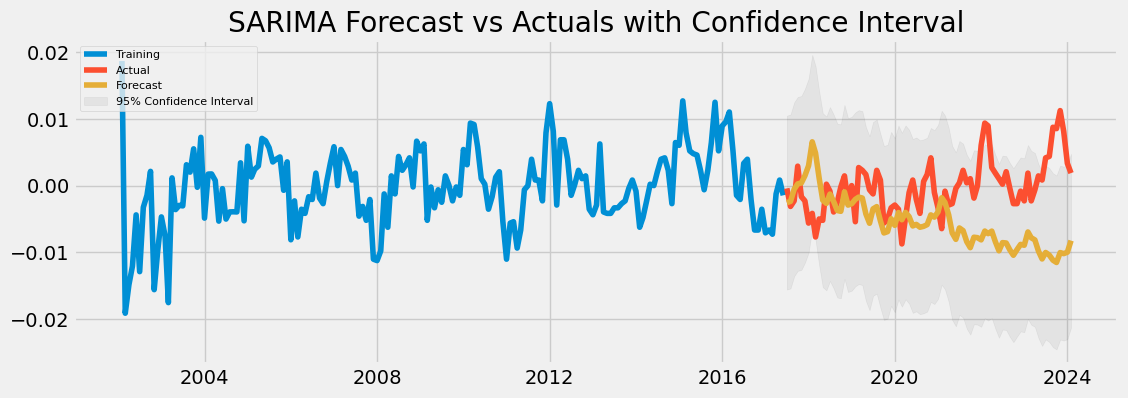

In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import norm

# Fit SARIMA model
sarima_model = SARIMAX(train_set['Anomaly Moving Average'], order=(3, 1, 0), seasonal_order=(2, 1, 0, 12))
sarima_fitted = sarima_model.fit()

# Print model summary
print(sarima_fitted.summary())

# Forecast
forecast_values = sarima_fitted.forecast(steps=len(test_set))

# Calculate standard deviation of residuals
residuals = sarima_fitted.resid
std_dev = np.std(residuals)

# Calculate confidence interval
alpha = 0.05  # 95% confidence interval
z_score = norm.ppf(1 - alpha / 2)  # Z-score for two-tailed test
margin_of_error = z_score * std_dev
lower_bound = forecast_values - margin_of_error
upper_bound = forecast_values + margin_of_error

# Convert forecast values and confidence interval to pandas Series
fc_series = pd.Series(forecast_values, index=test_set.index)
lower_series = pd.Series(lower_bound, index=test_set.index)
upper_series = pd.Series(upper_bound, index=test_set.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train_set['Anomaly Moving Average'], label='Training')
plt.plot(test_set.index, test_set['Anomaly Moving Average'], label='Actual')
plt.plot(test_set.index, fc_series, label='Forecast')
plt.fill_between(test_set.index, lower_series, upper_series, color='k', alpha=0.05, label='95% Confidence Interval')
plt.title('SARIMA Forecast vs Actuals with Confidence Interval')
plt.legend(loc='upper left', fontsize=8)
plt.show()